# MountainCar v0
description : https://github.com/openai/gym/wiki/MountainCar-v0

In [1]:
import gym
import numpy as np
import renom as rm

import matplotlib.pyplot as plt

from renom_rl.discrete.double_dqn import DoubleDQN
from renom_rl.environ.env import BaseEnv
from renom_rl.utility.filter import EpsilonEIFilter
from renom_rl.utility import Animation

from renom.cuda import set_cuda_active
set_cuda_active(True)

/Users/koyaohashi/ReNom/renom/cuda/__init__.py:32: UserWarning: Couldn't find cuda modules.
  warnings.warn("Couldn't find cuda modules.")


In [2]:
class MountainCar(BaseEnv):
    
    def __init__(self):
        self.env = gym.make('MountainCar-v0') 
        self.action_shape = (self.env.action_space.n,)
        self.state_shape = self.env.observation_space.shape
        print("Env Space : ", self.state_shape)
        print("Action Space : ", self.action_shape)
        
        self.animation = Animation()
        self.test_mode = False
    
    def reset(self):
        return self.env.reset()
    
    def sample(self):
        return self.env.action_space.sample()
    
    def step(self, action):
        state, _, terminal, _ = self.env.step(int(action))
        reward = 0
        
        if terminal:
            if state[0] > 0.5:
                reward = 1
            else:
                reward = state[0] + 0.5
         
        return state, reward, terminal
    
    def test_start(self):
        self.animation.reset()
        self.env.reset()
    
    def test_epoch_step(self):
        self.animation.store(self.env.render(mode="rgb_array"))
    
    def test_close(self):
        #self.env.close() 
        self.env.viewer = None
                
env = MountainCar()

q_network = rm.Sequential([ rm.Dense(30),
                                                   rm.Relu(),
                                                   rm.Dense(30),
                                                   rm.Relu(),
                                                   rm.Dense(env.action_shape[0])
                                                ])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Env Space :  (2,)
Action Space :  (3,)


In [3]:
fil = EpsilonEIFilter(min=0, max=1.0, alpha=0.3)
agent = DoubleDQN(env, q_network)
result = agent.fit(epoch=1, 
          epoch_step=20000, 
          batch_size=400, 
          update_period=40, 
          action_filter=fil,
          random_step=1)

epoch 0001 epsilon 1.0000 loss 0.0000 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:   0%|          | 53/20000 [00:00<01:07, 294.69it/s]

Run random 1 step for storing experiences


epoch 001 avg_loss:0.0001 total reward in epoch: [train:15.738 test:4.37] avg train reward in episode:0.157 e-greedy:0.032: 100%|██████████| 20000/20000 [04:38<00:00,  2.58s/it]

pass


reward of one episode is  1.0



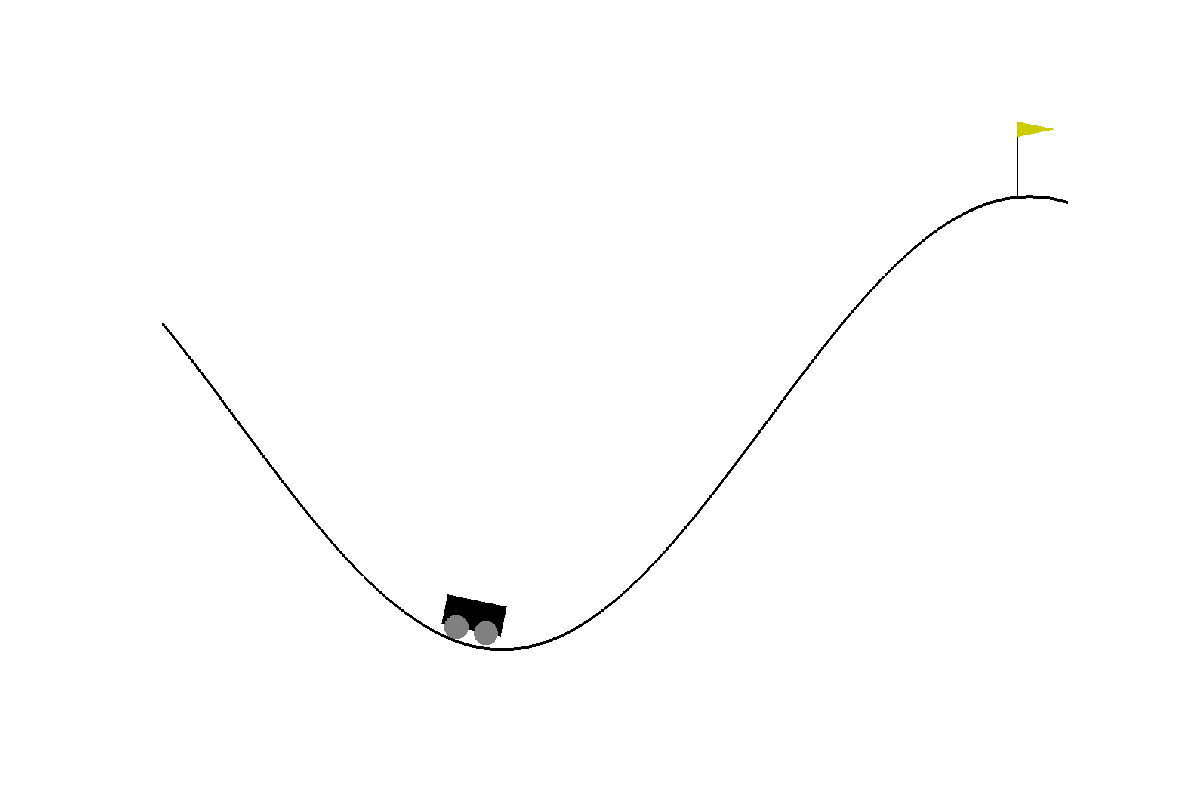
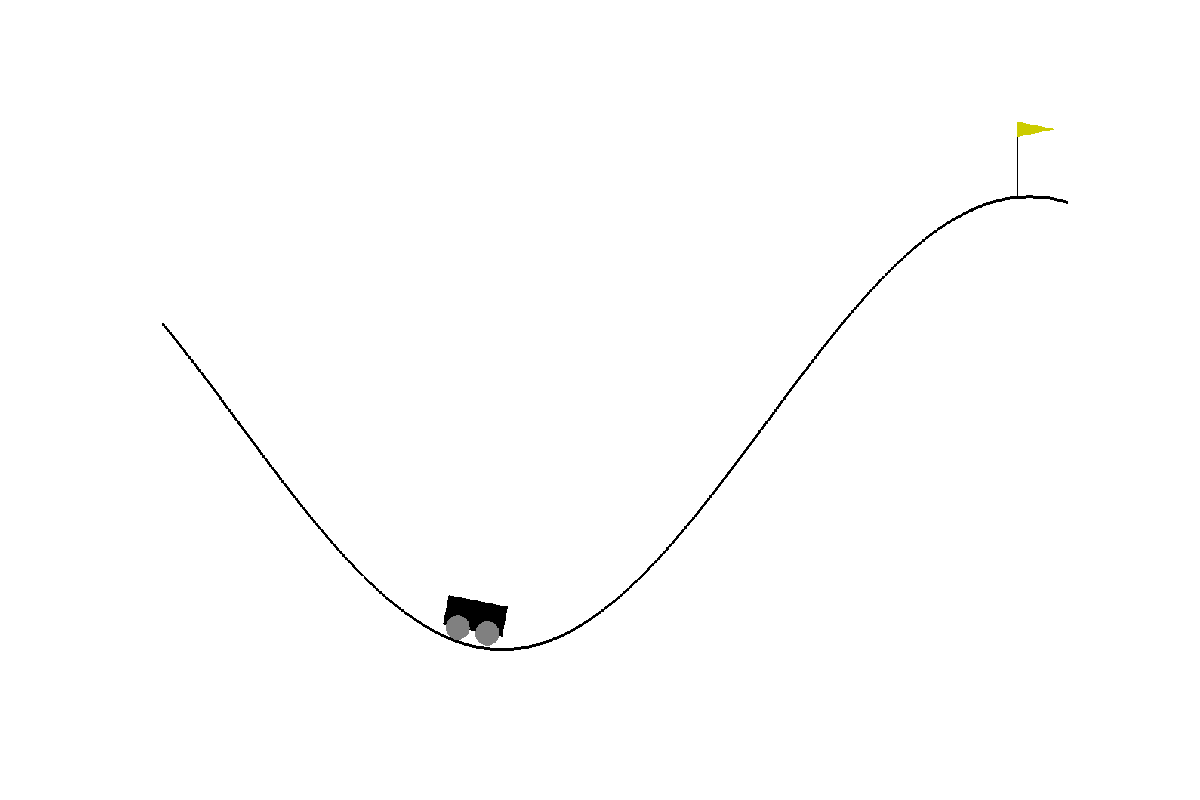
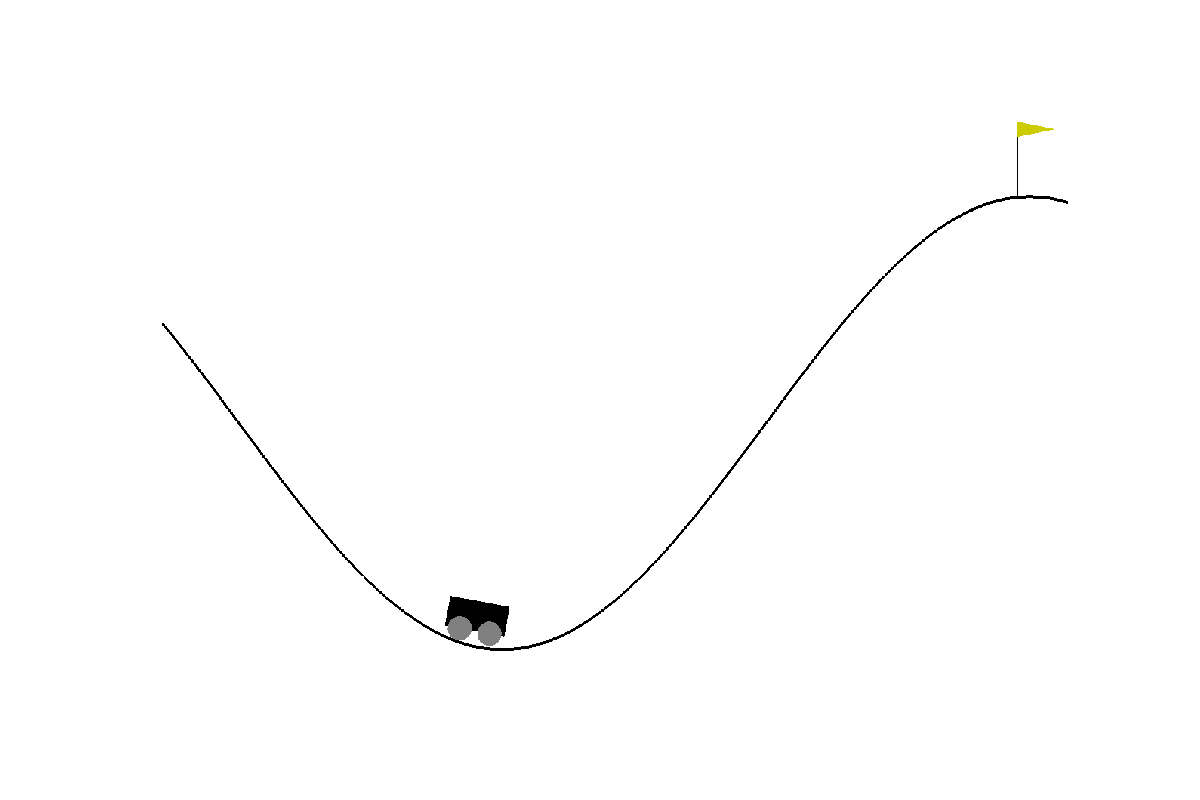
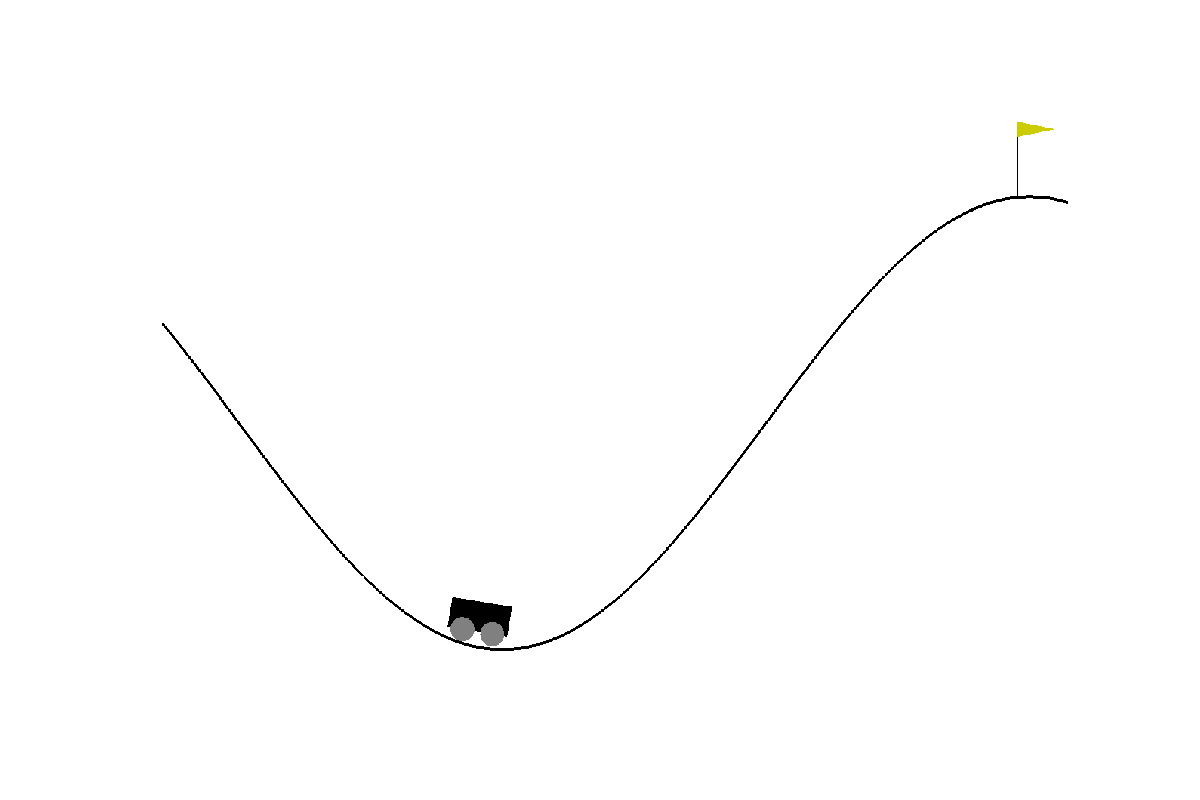
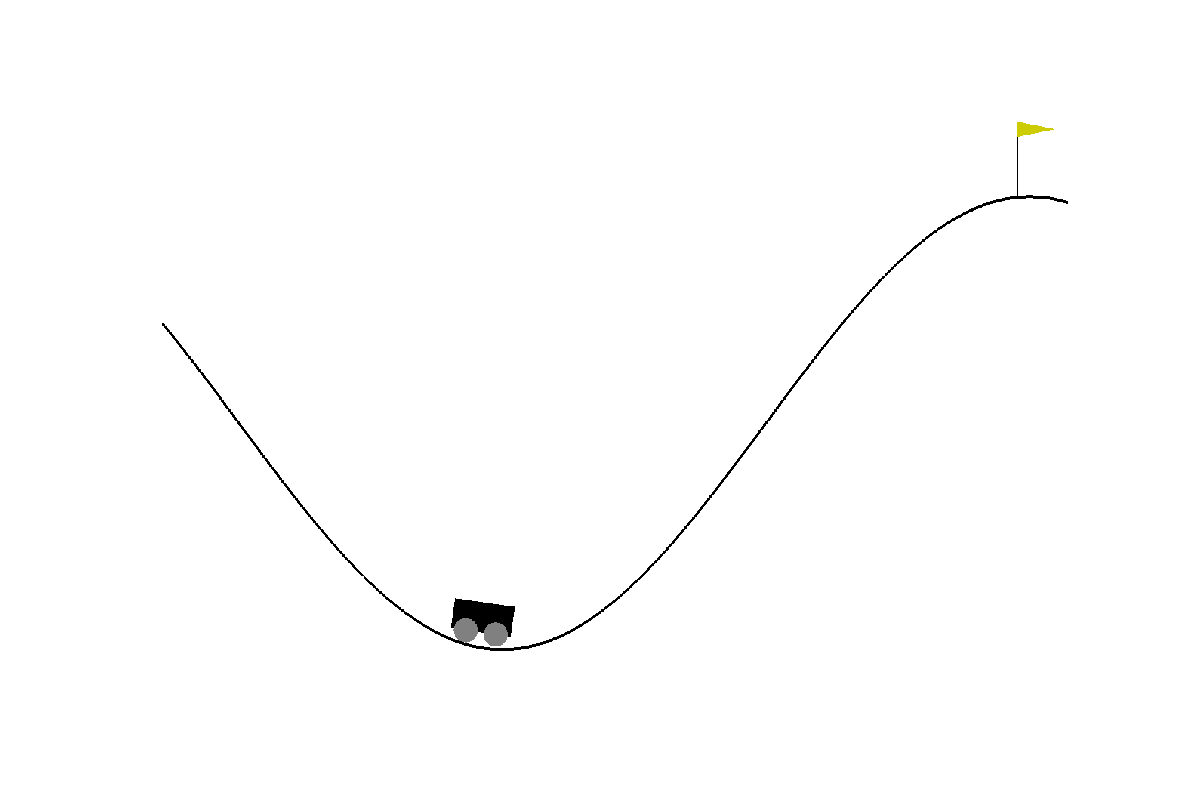
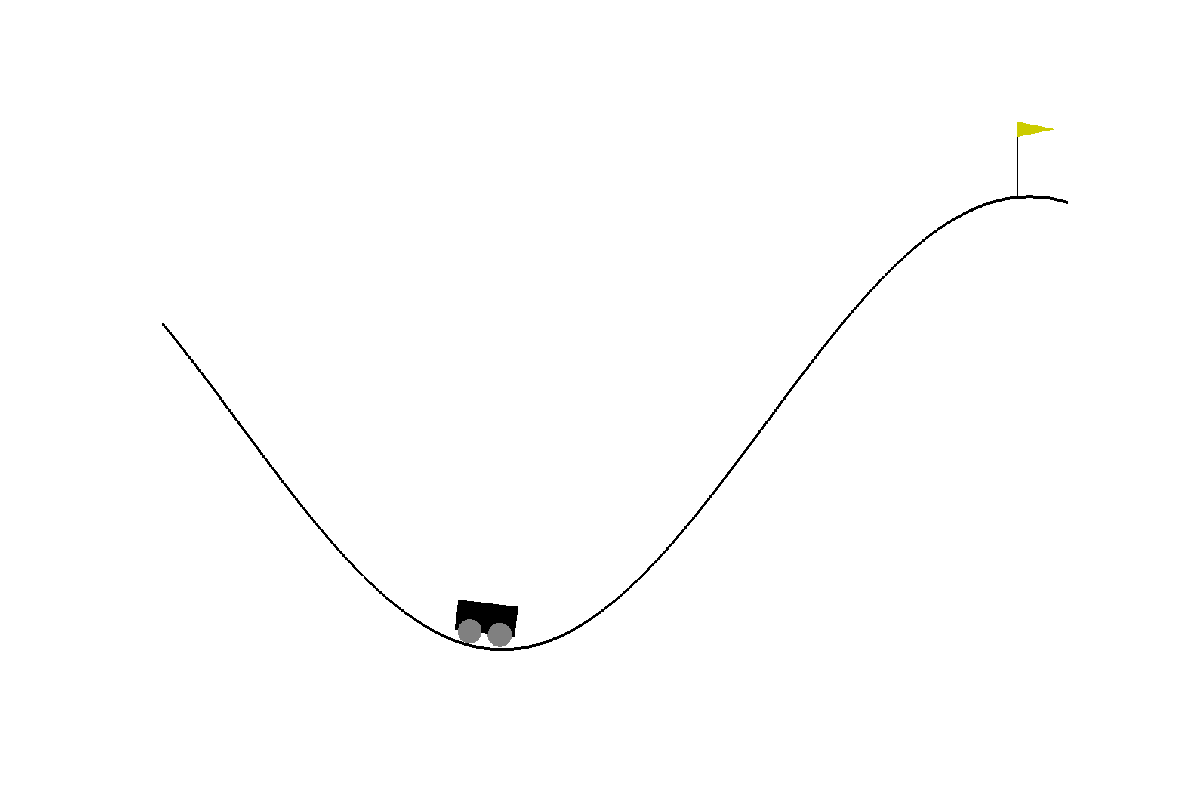
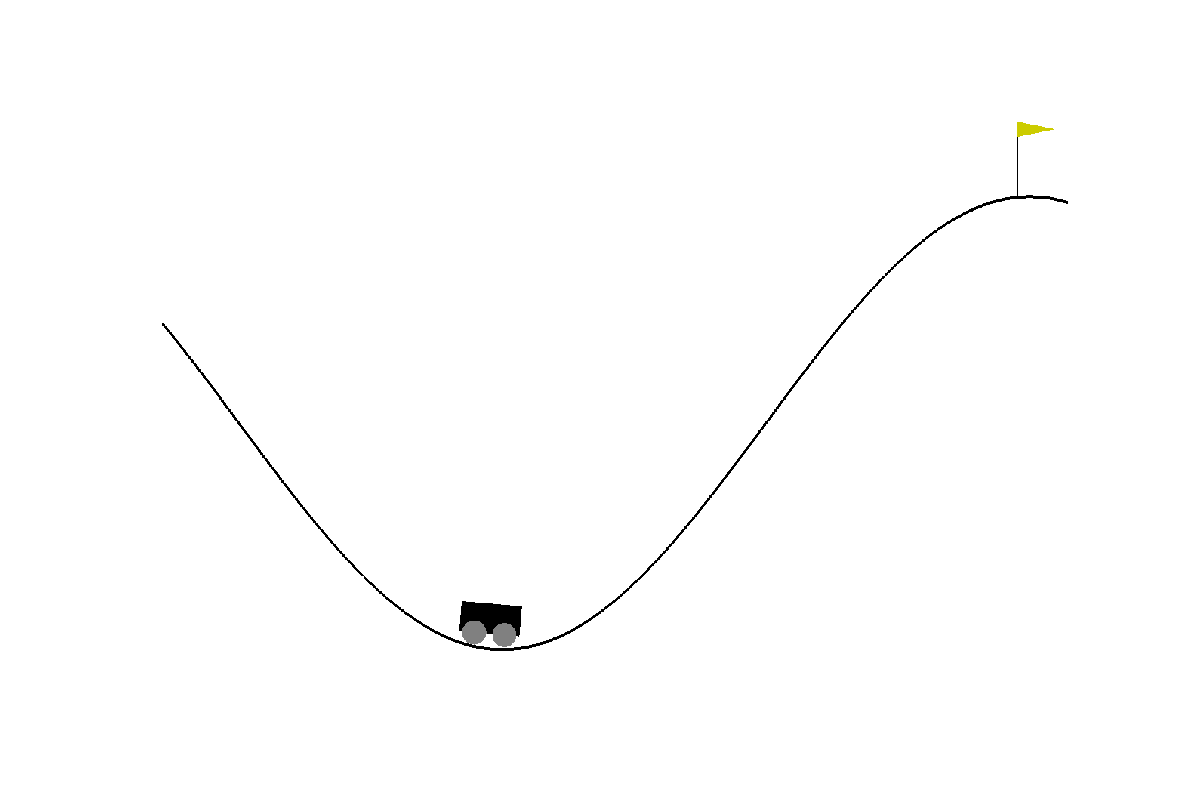
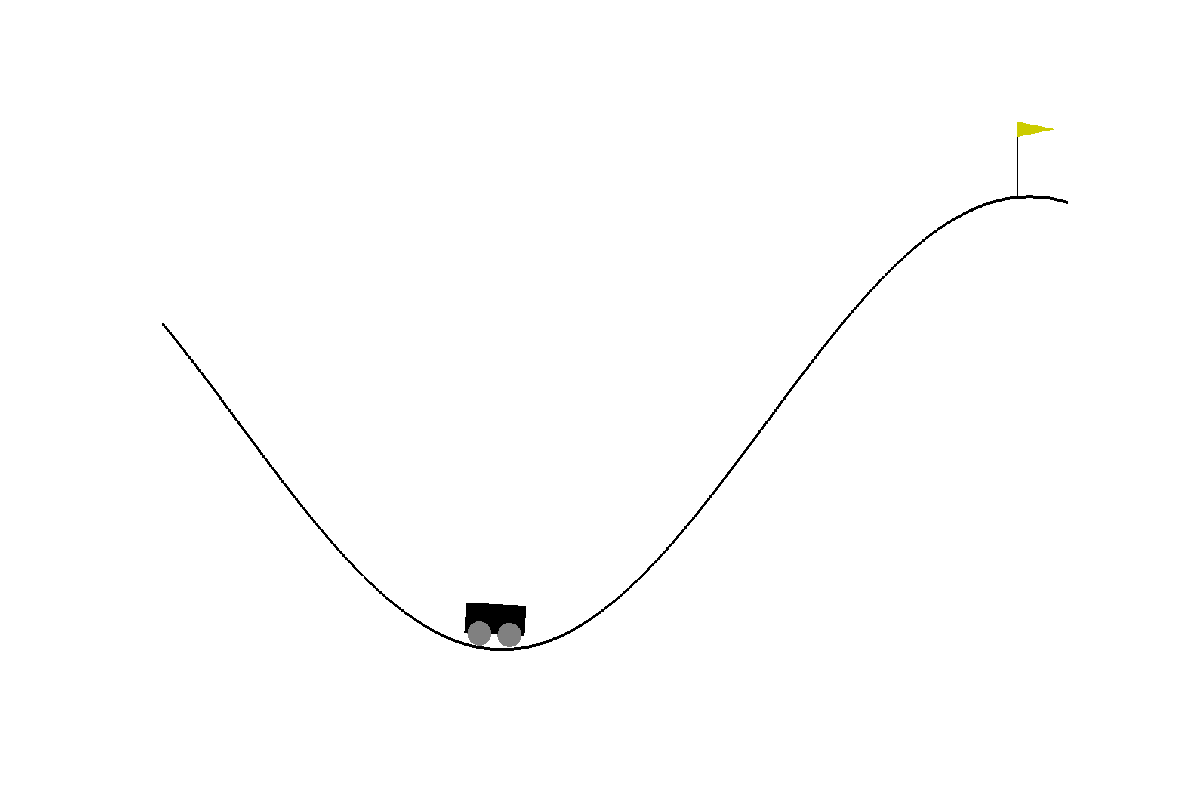
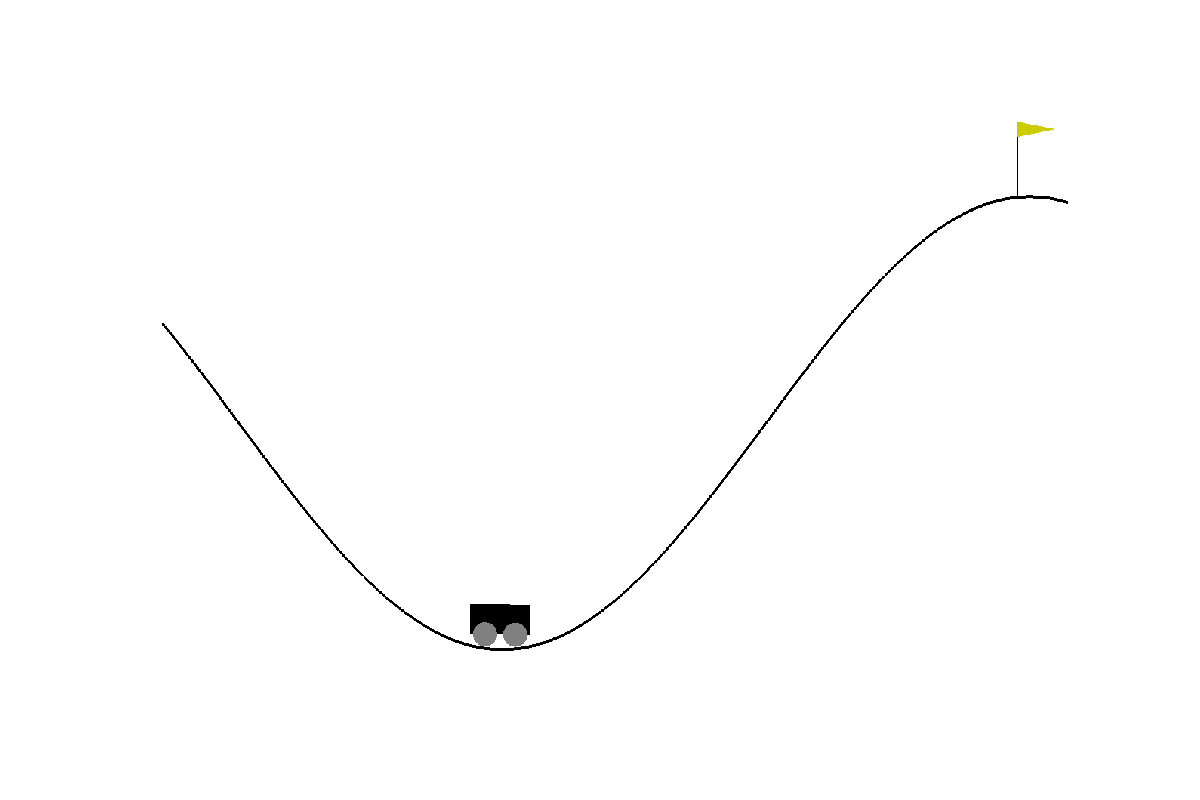
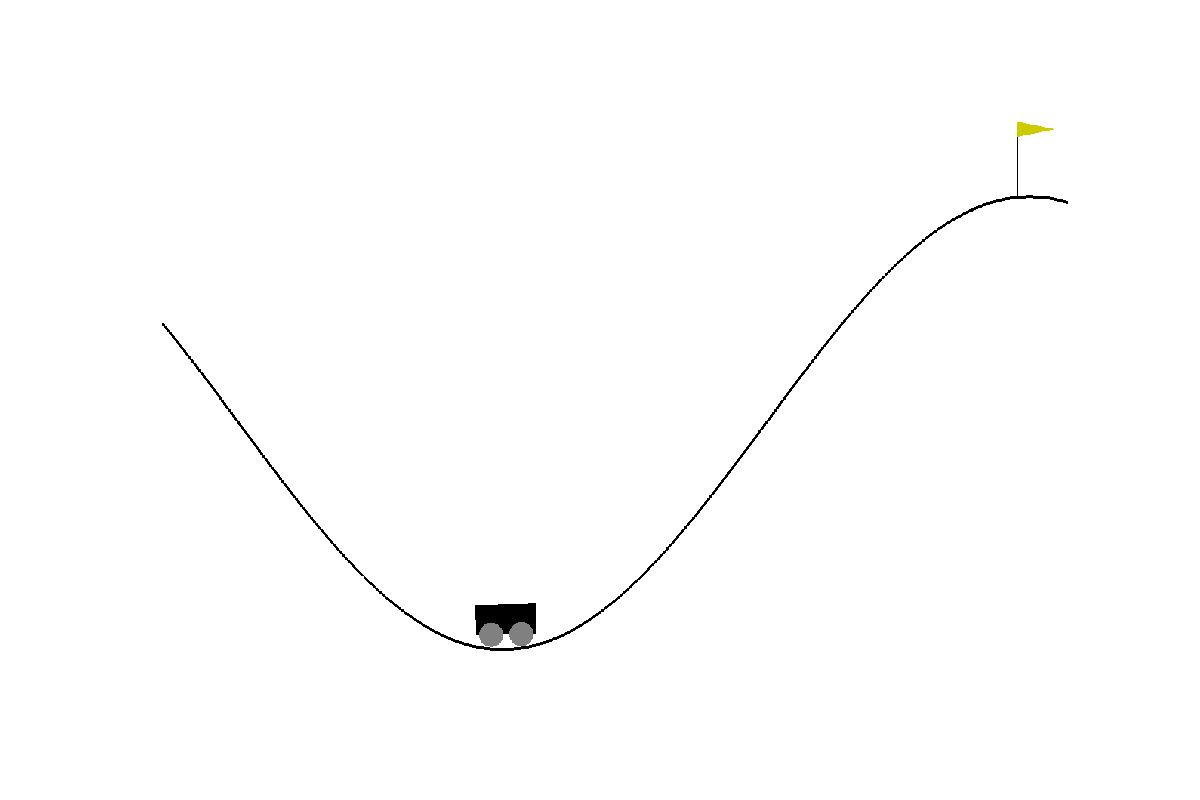
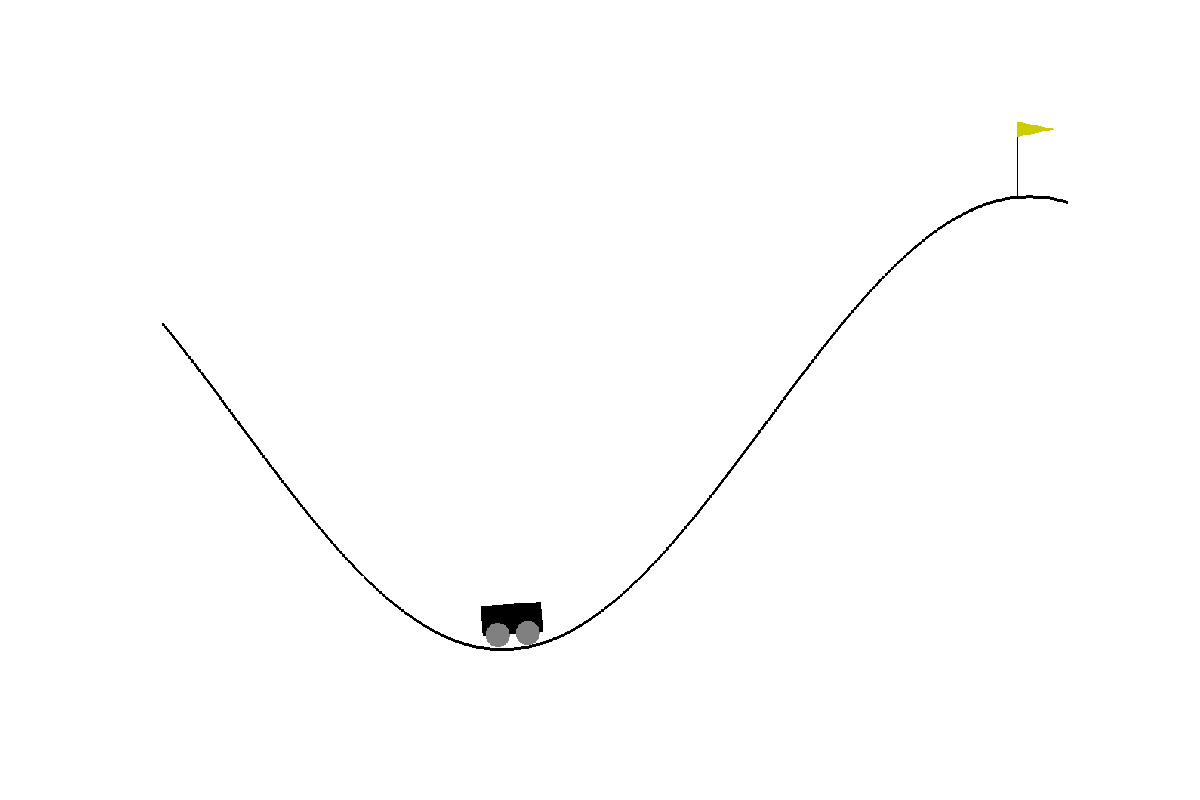
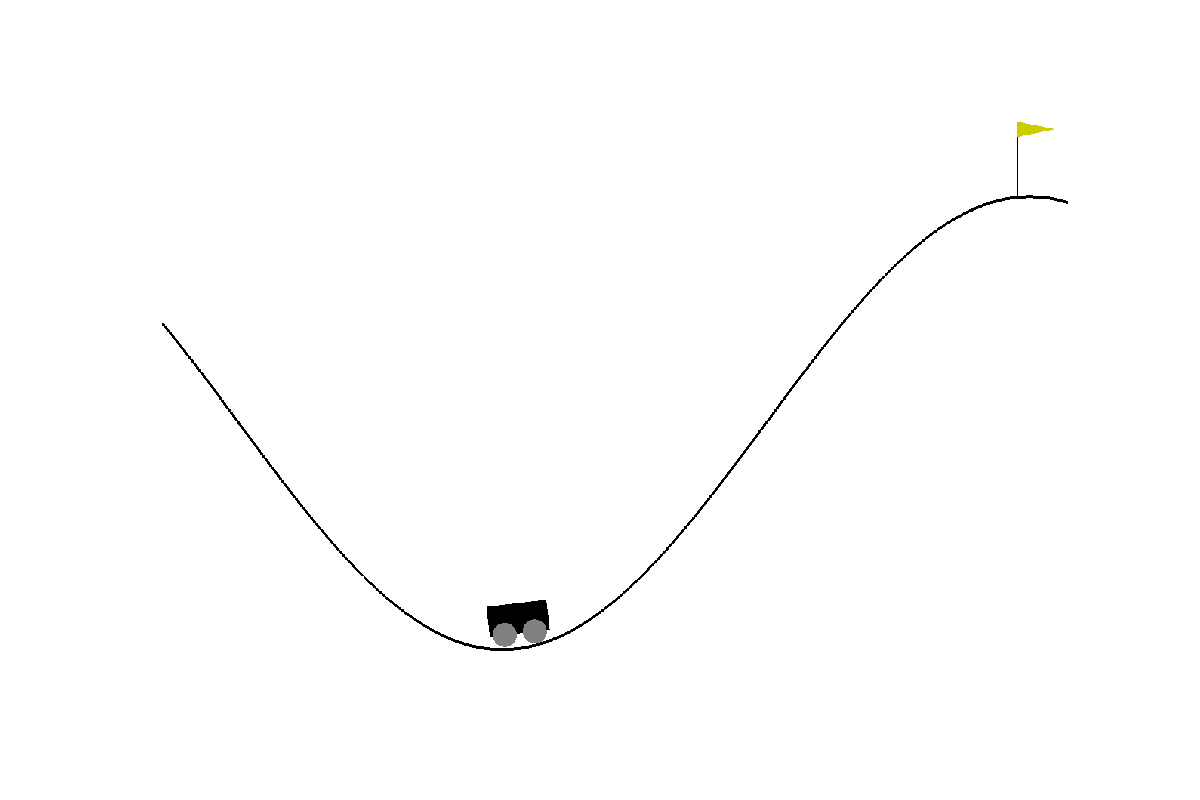
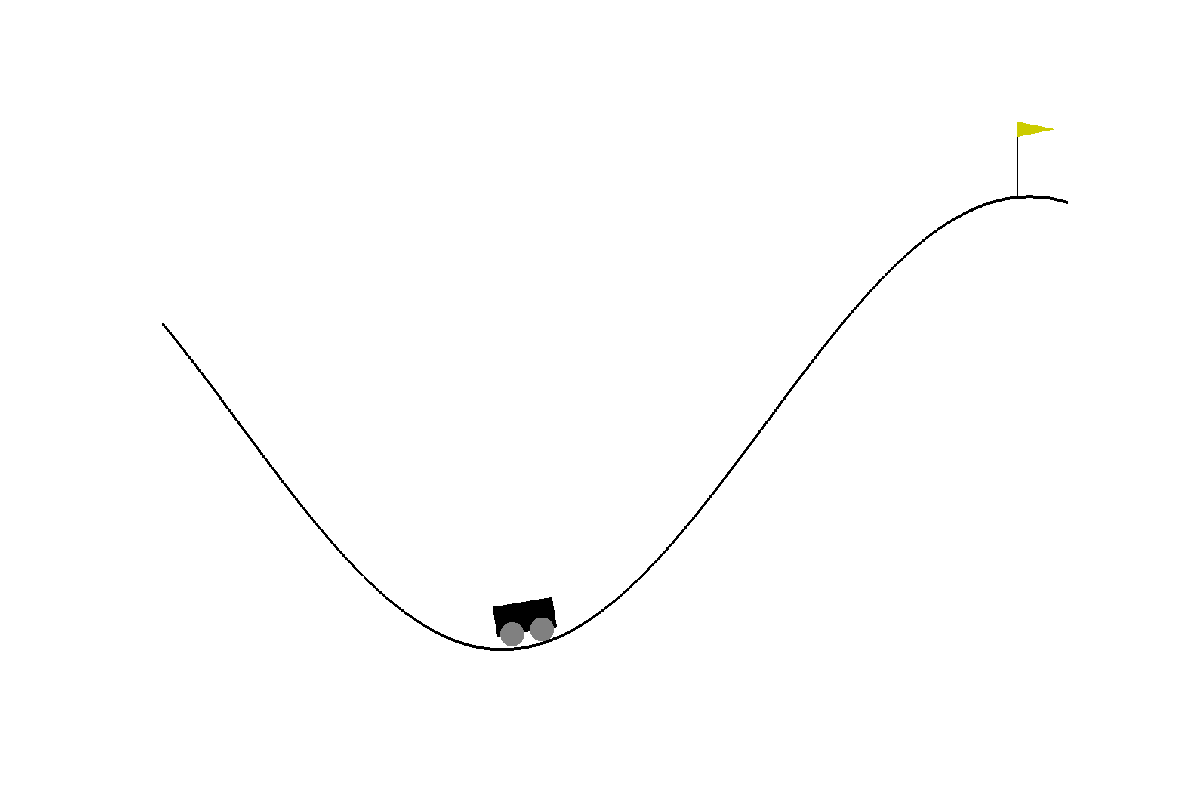
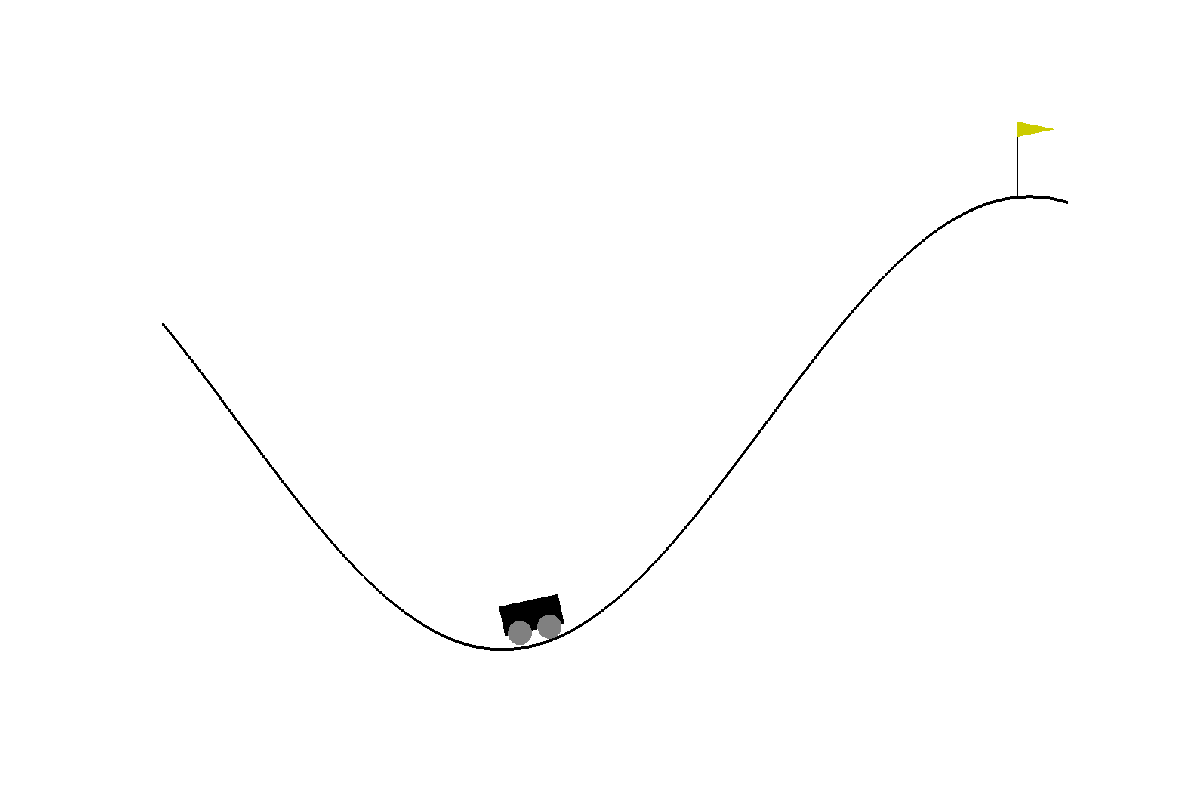
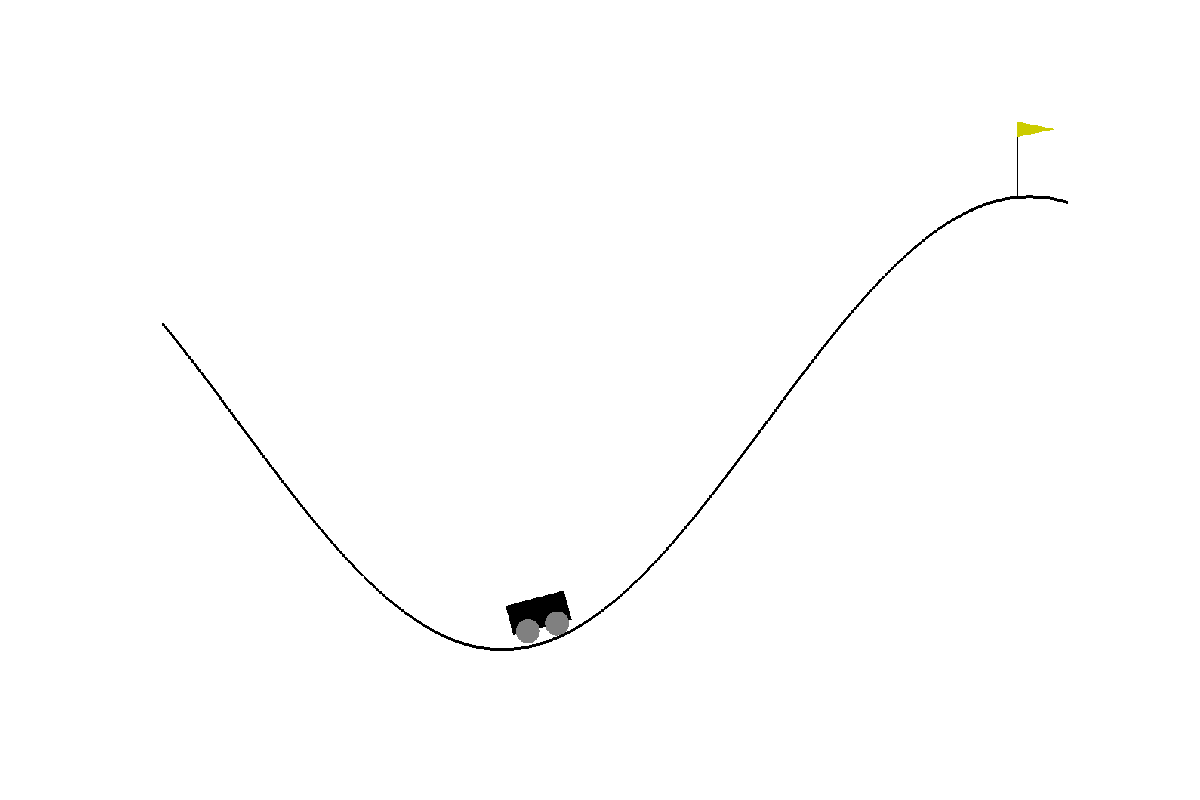
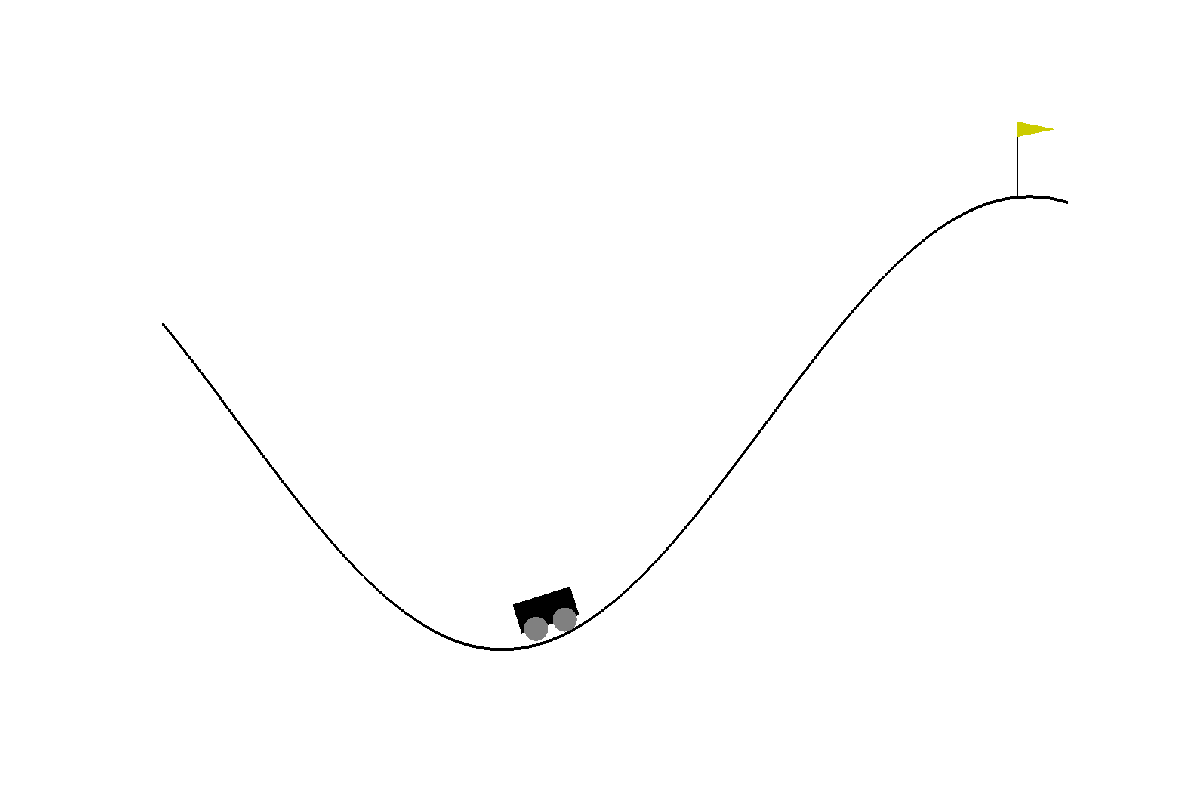
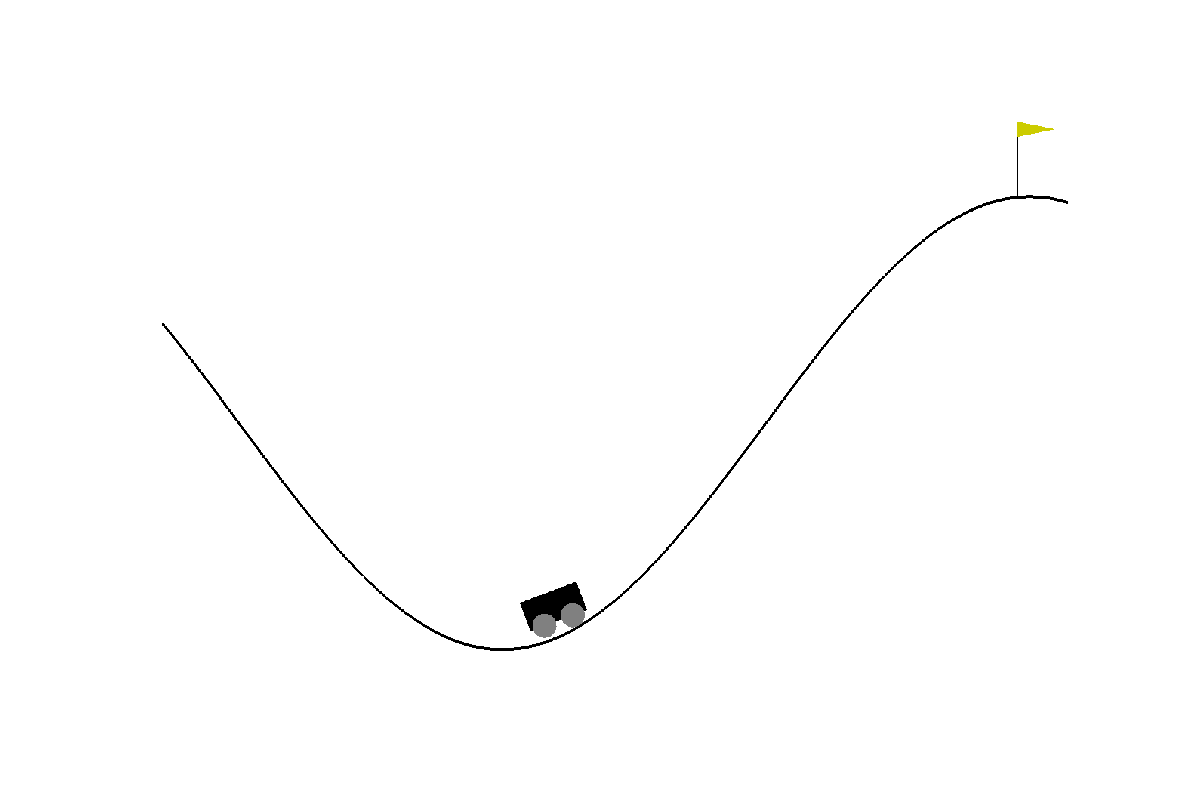
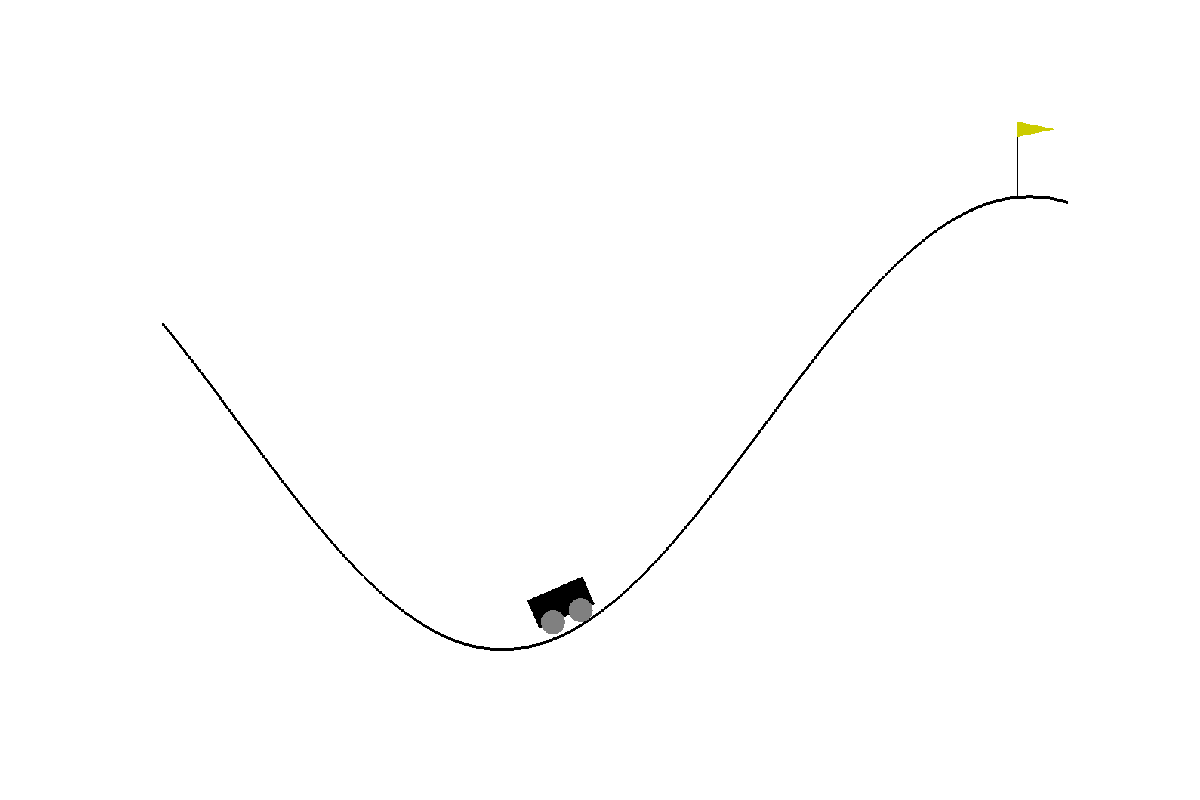
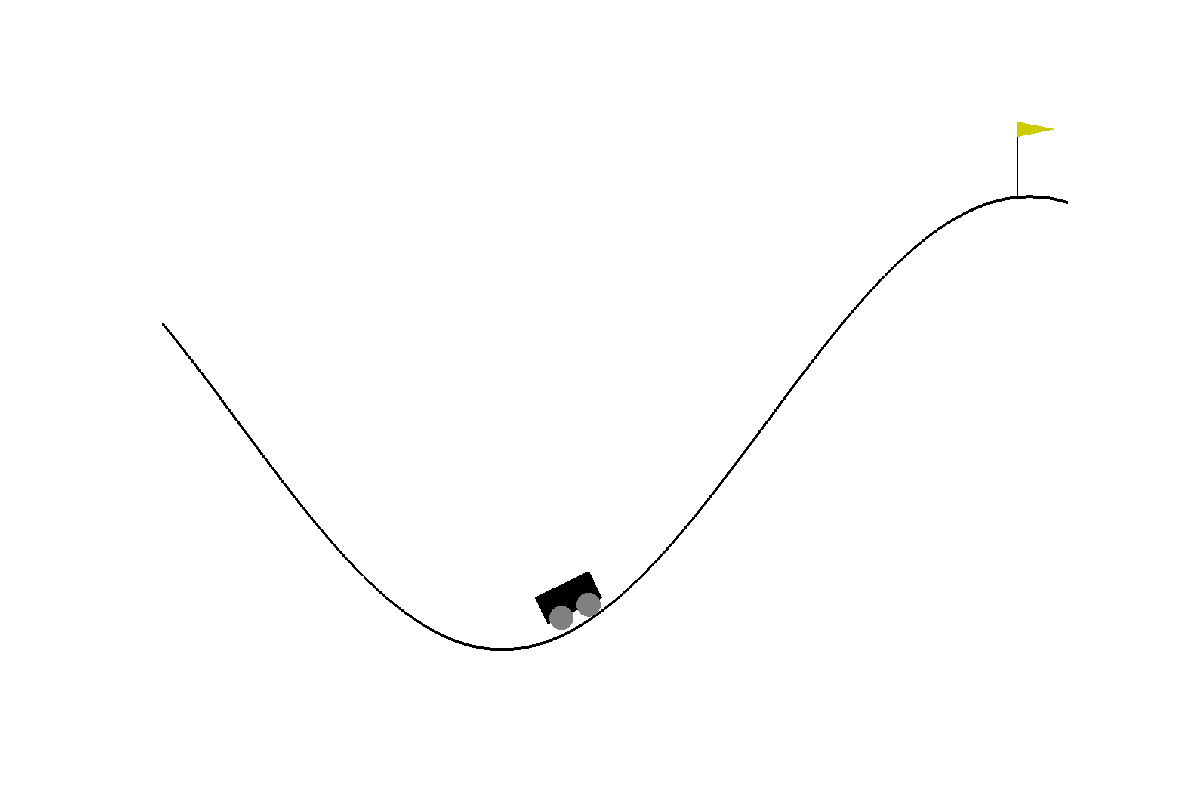
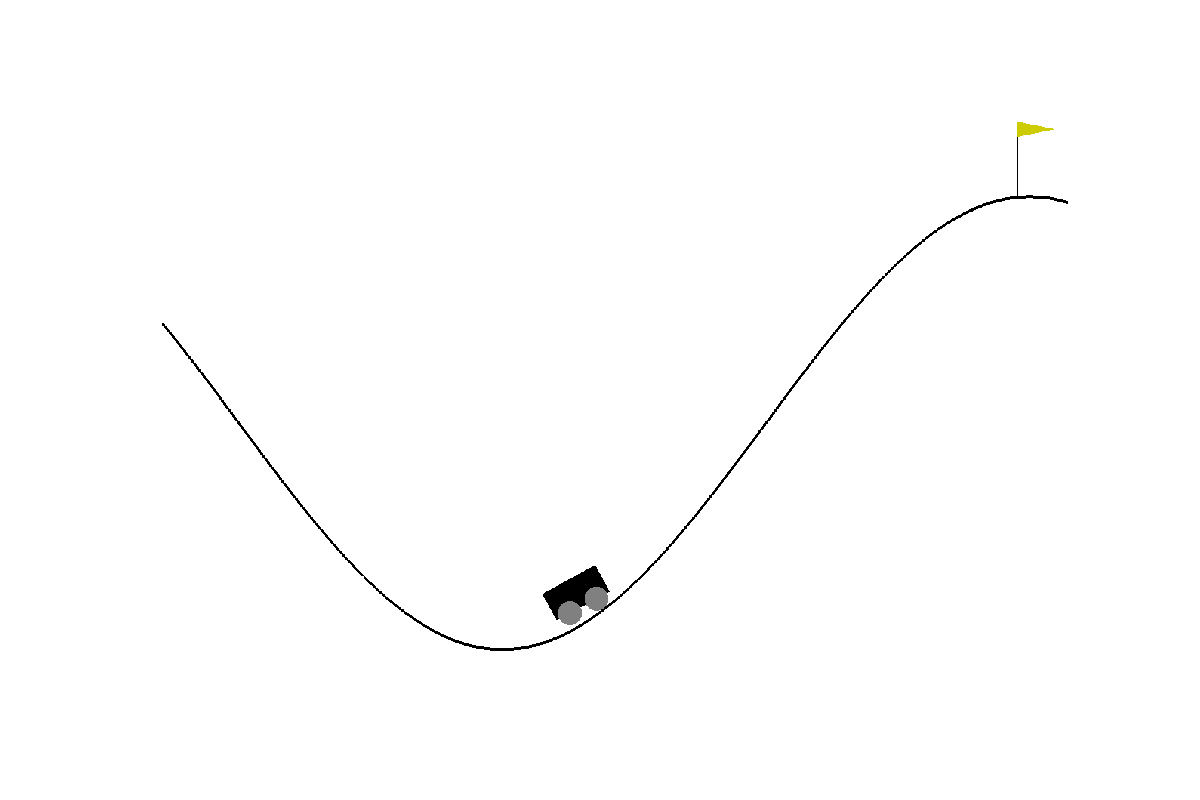
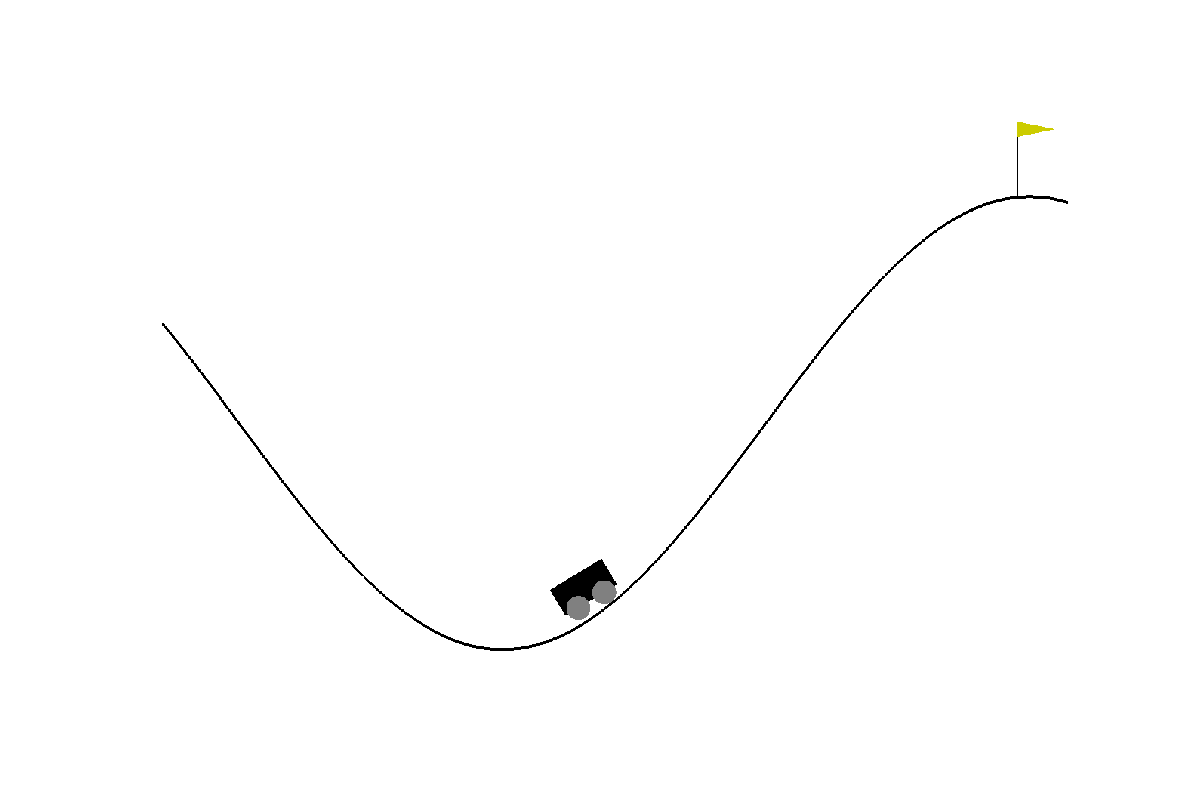
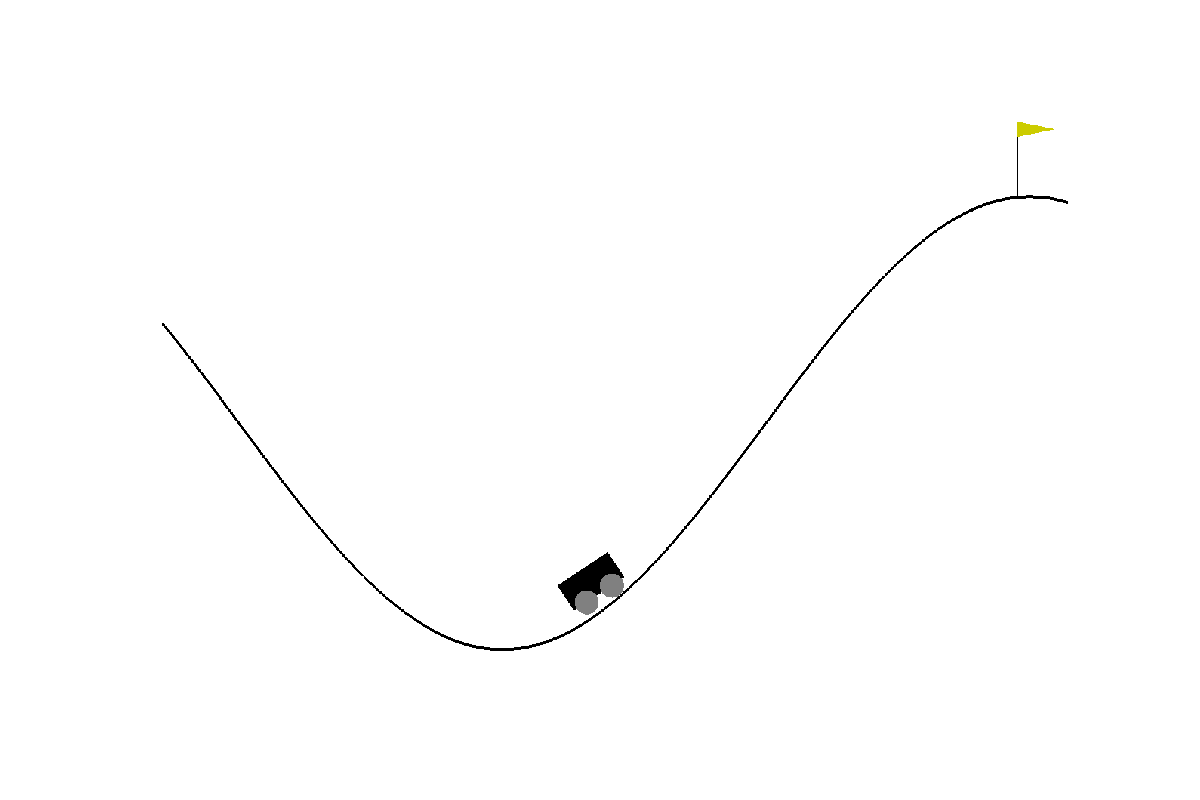
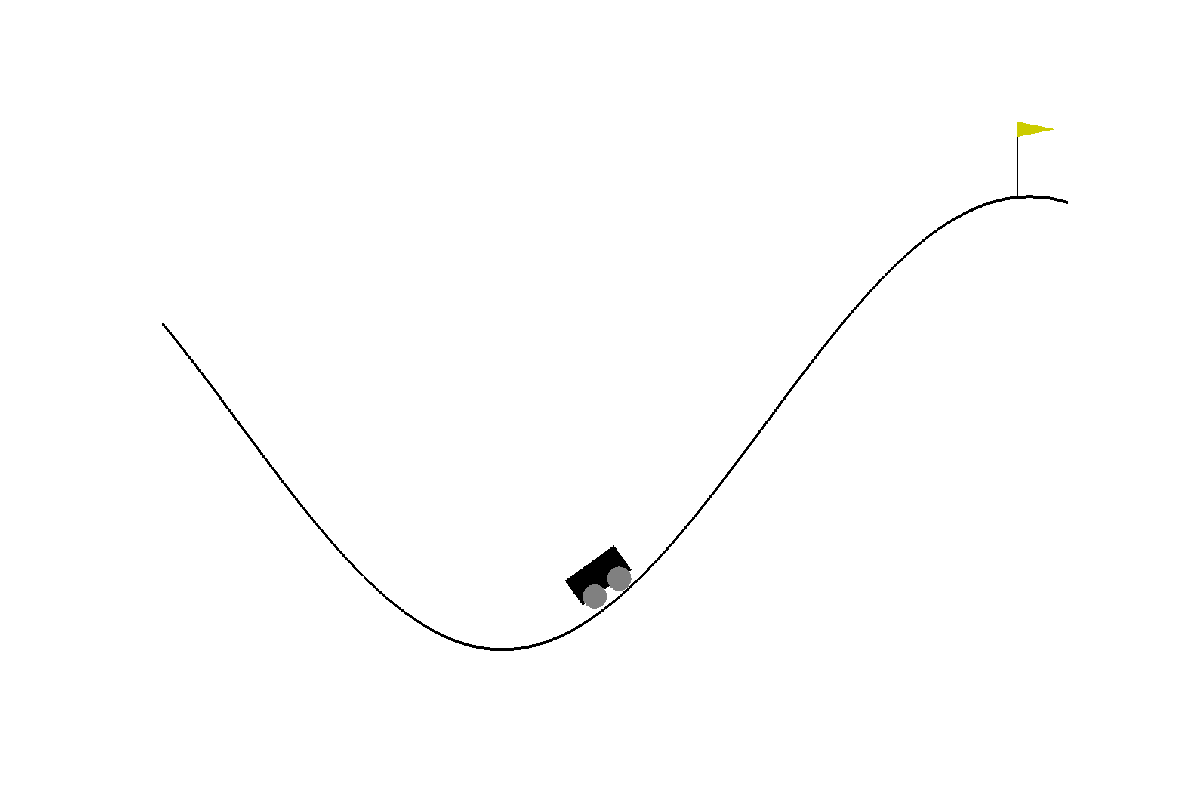
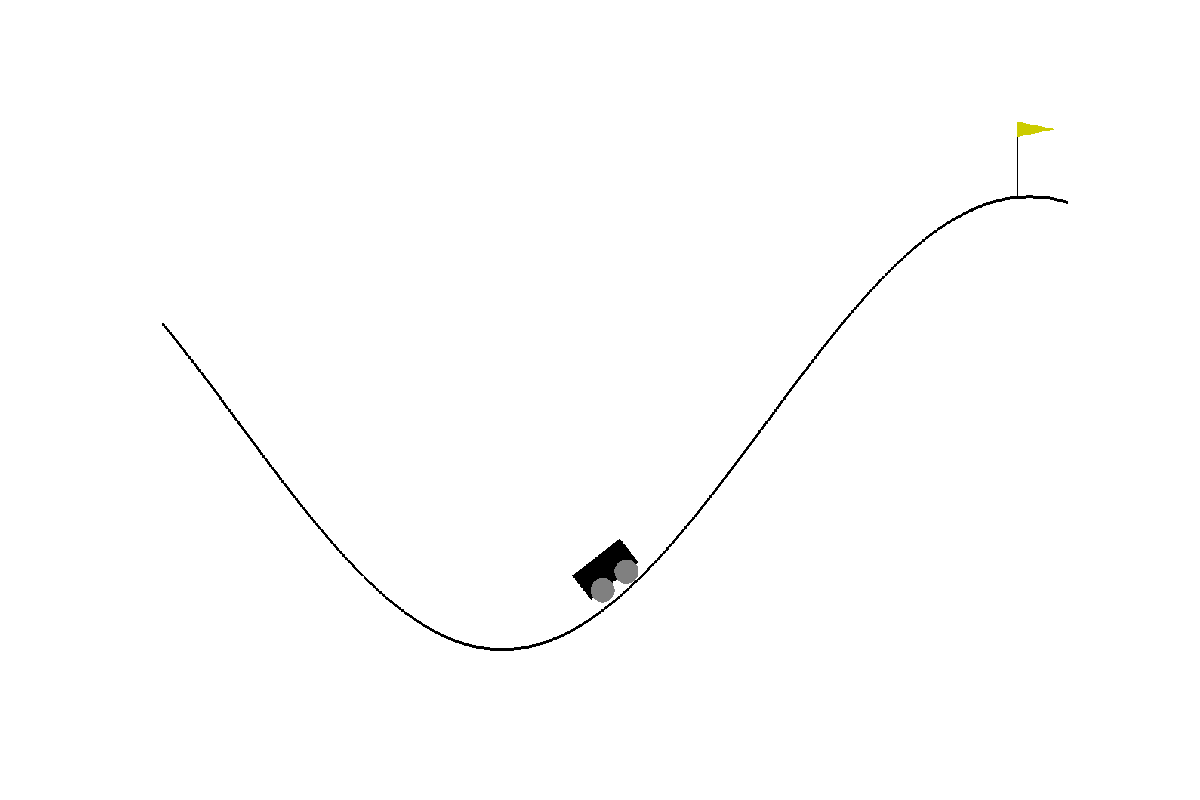
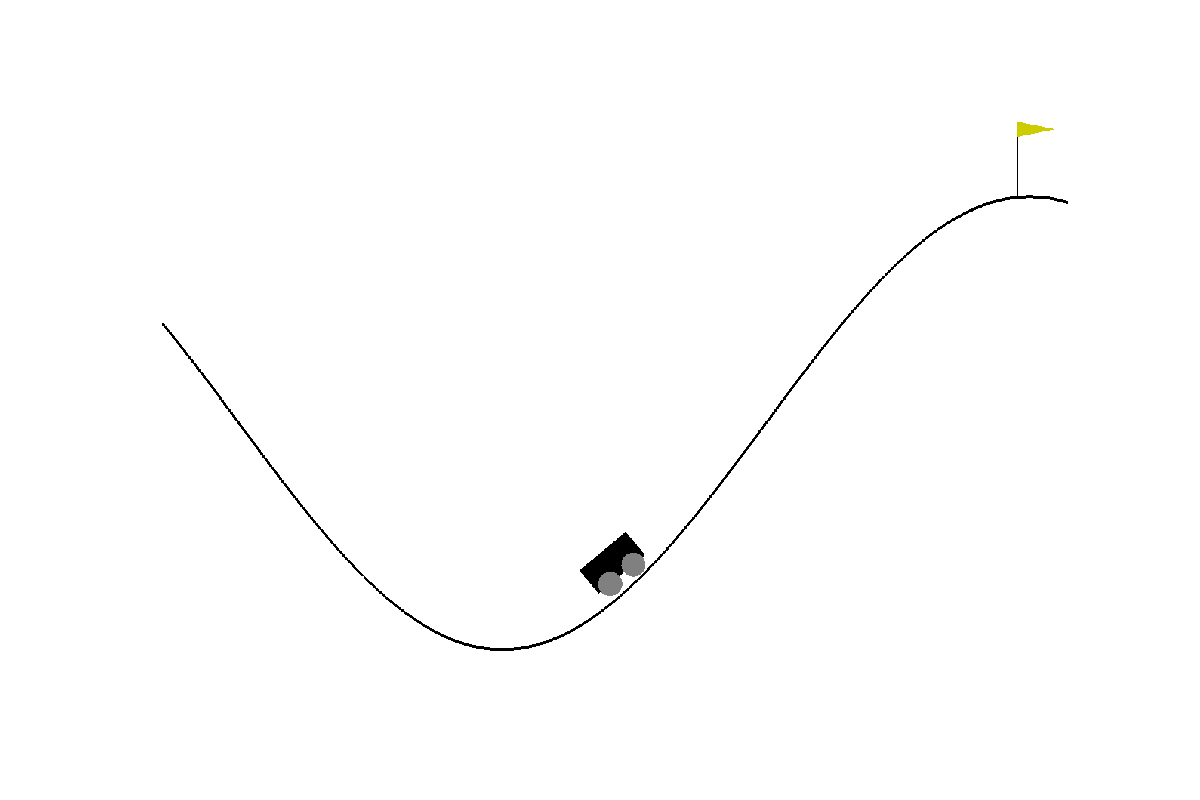
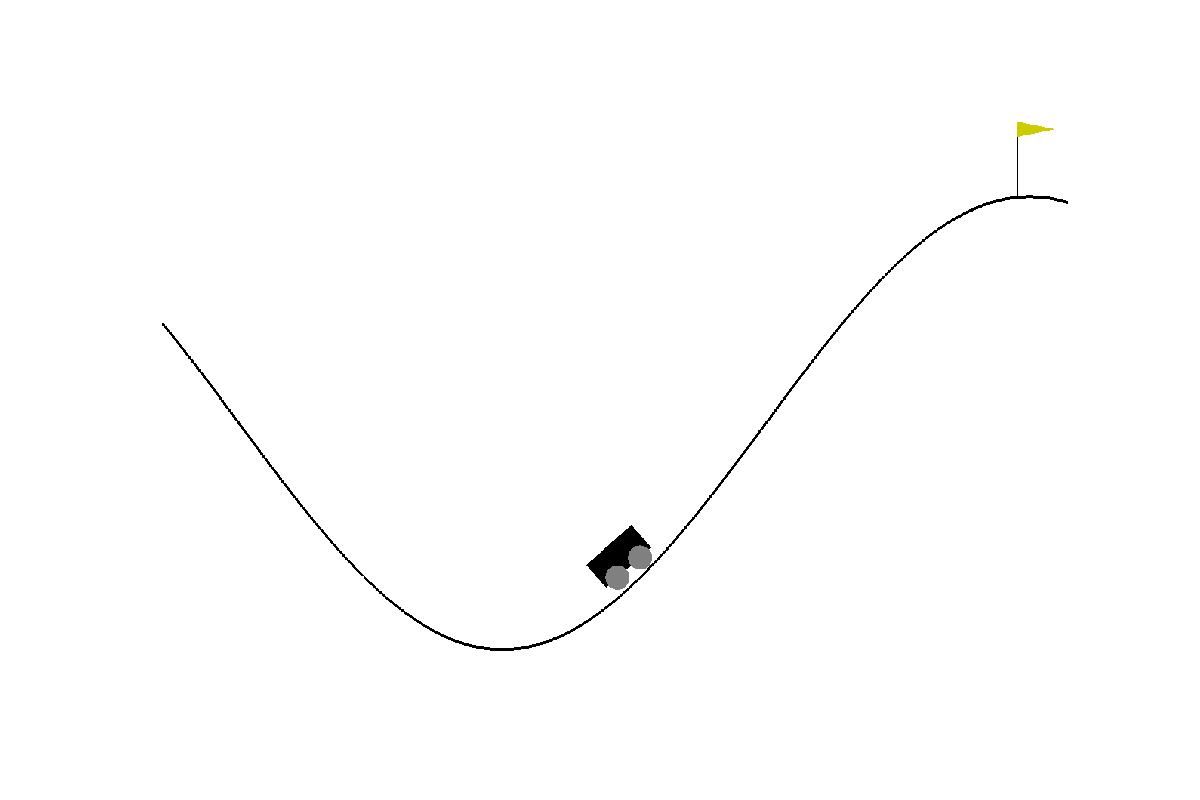
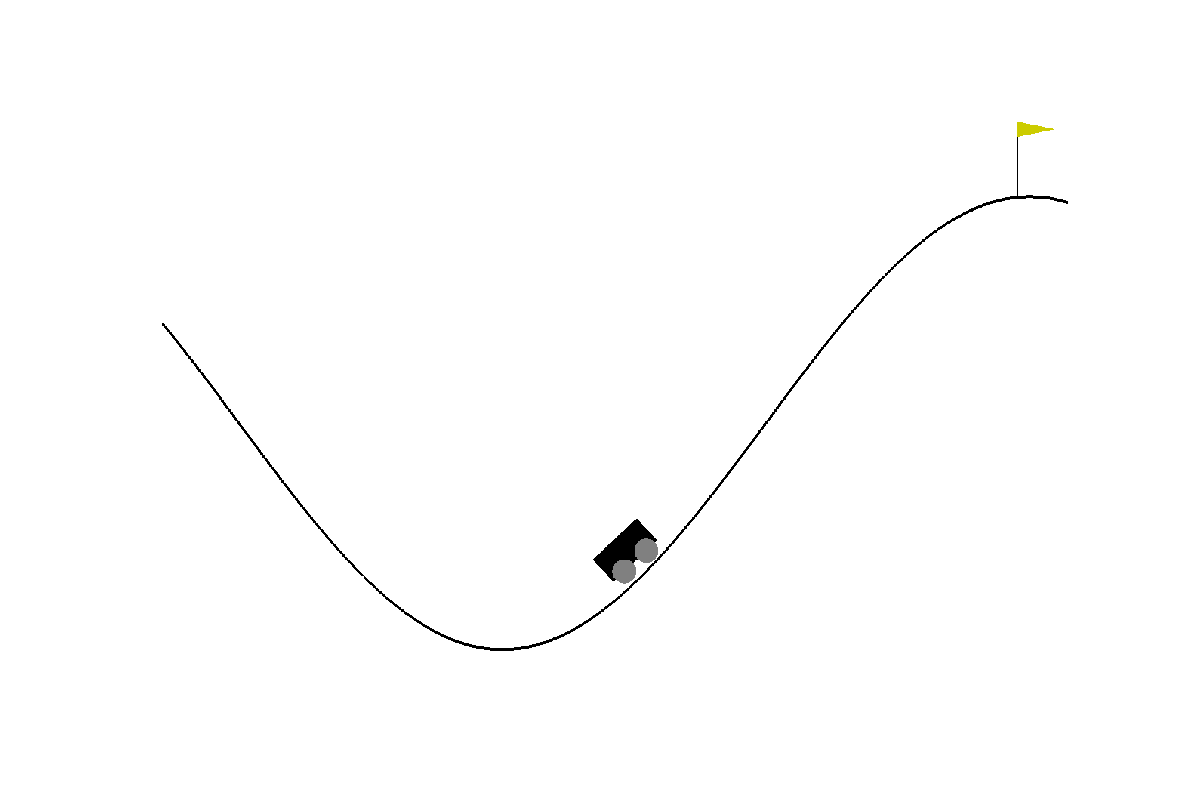
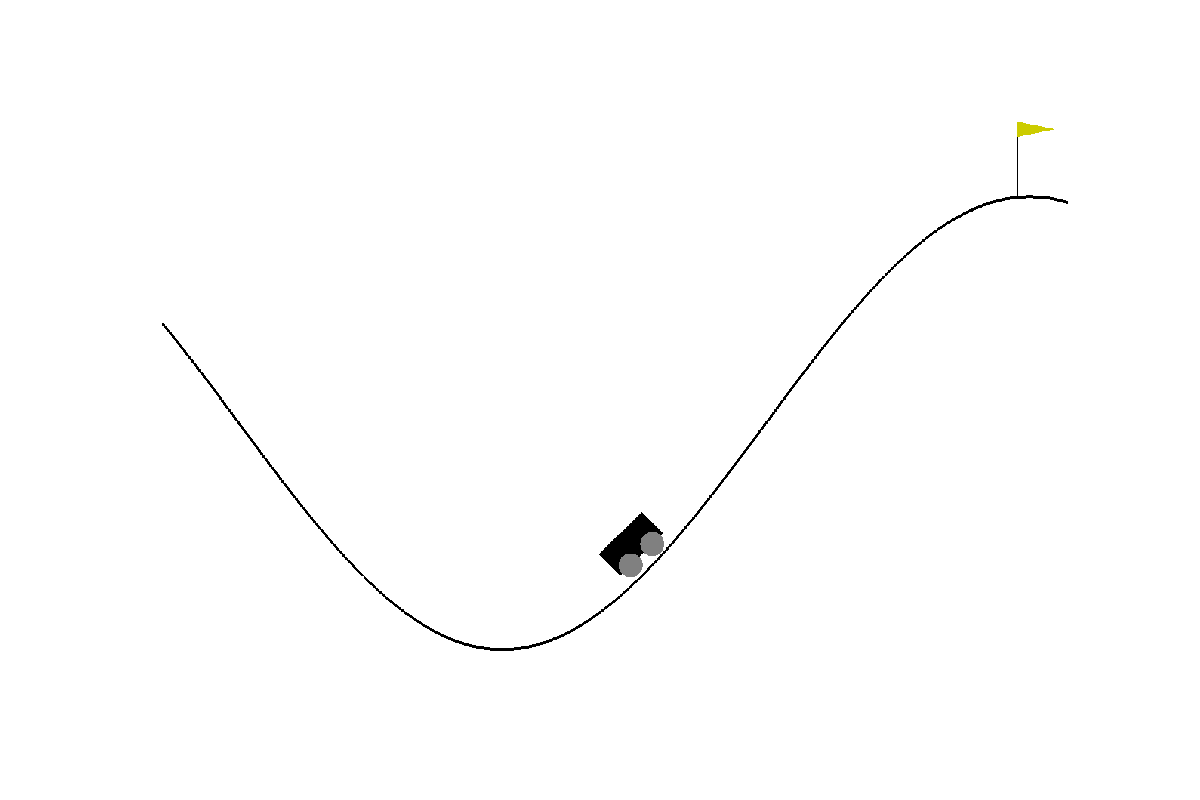
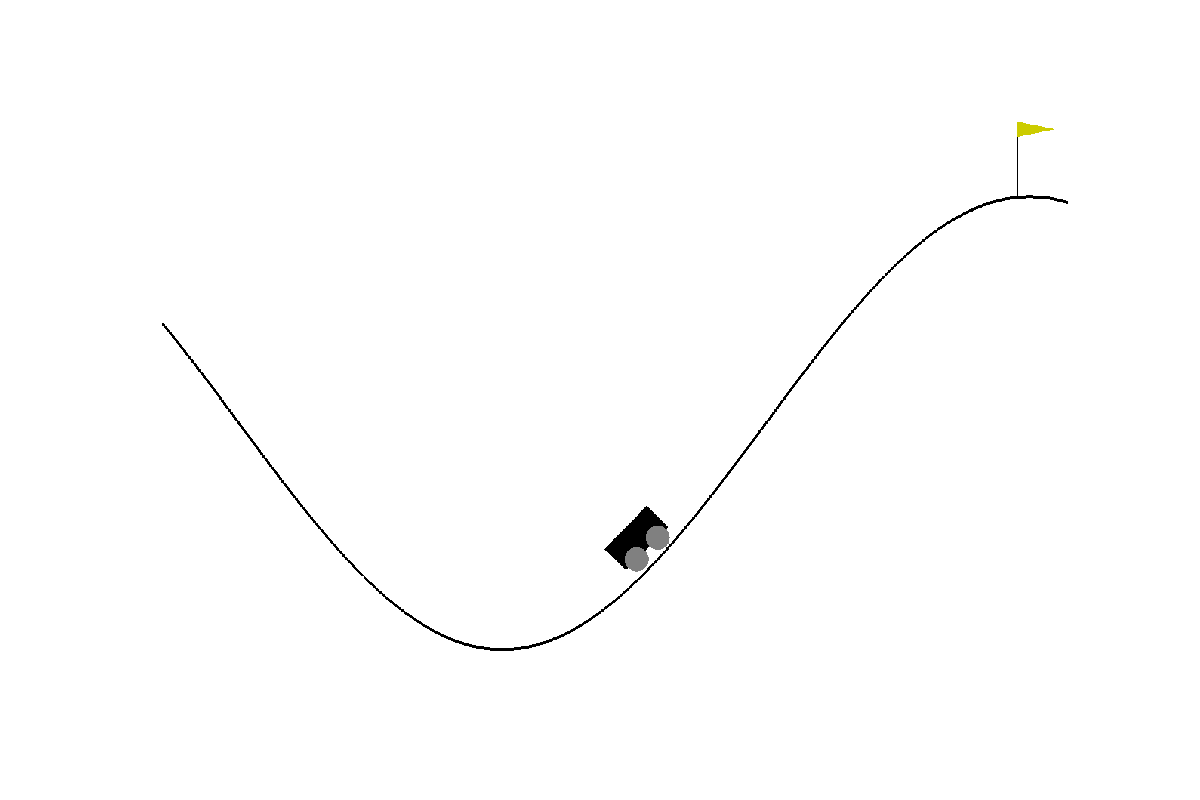
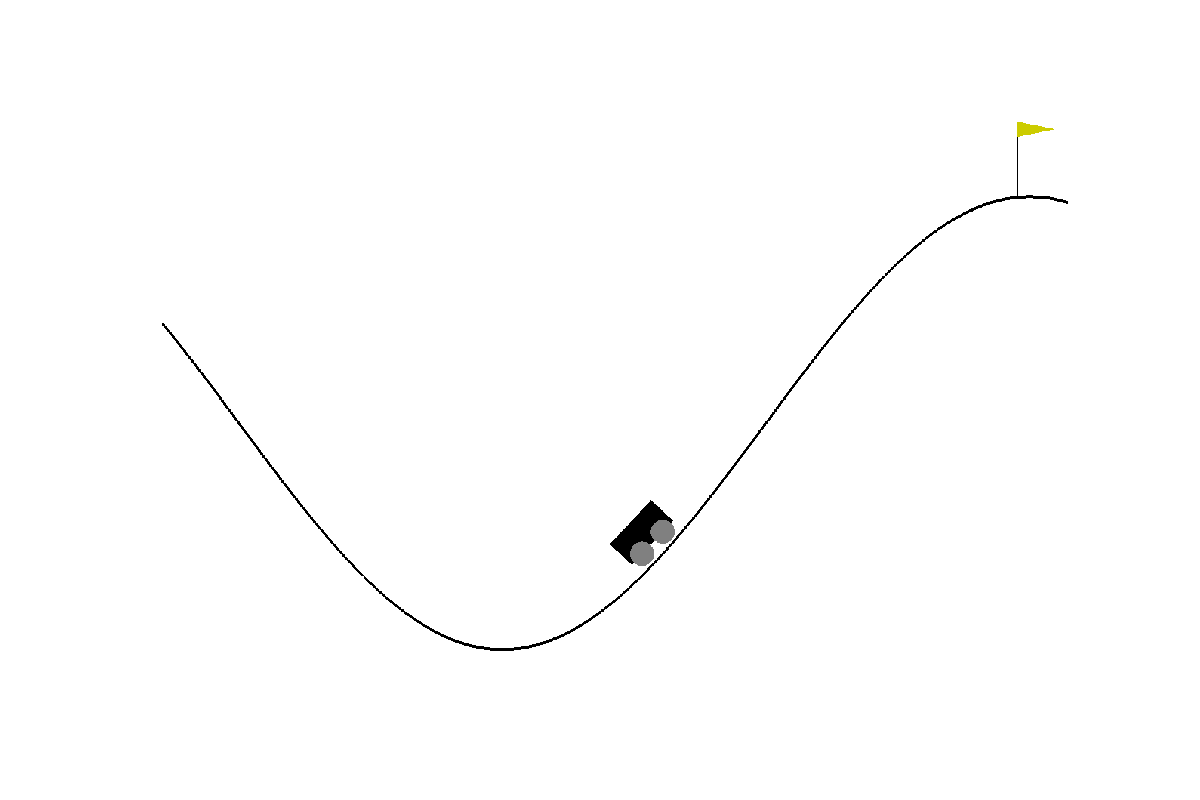
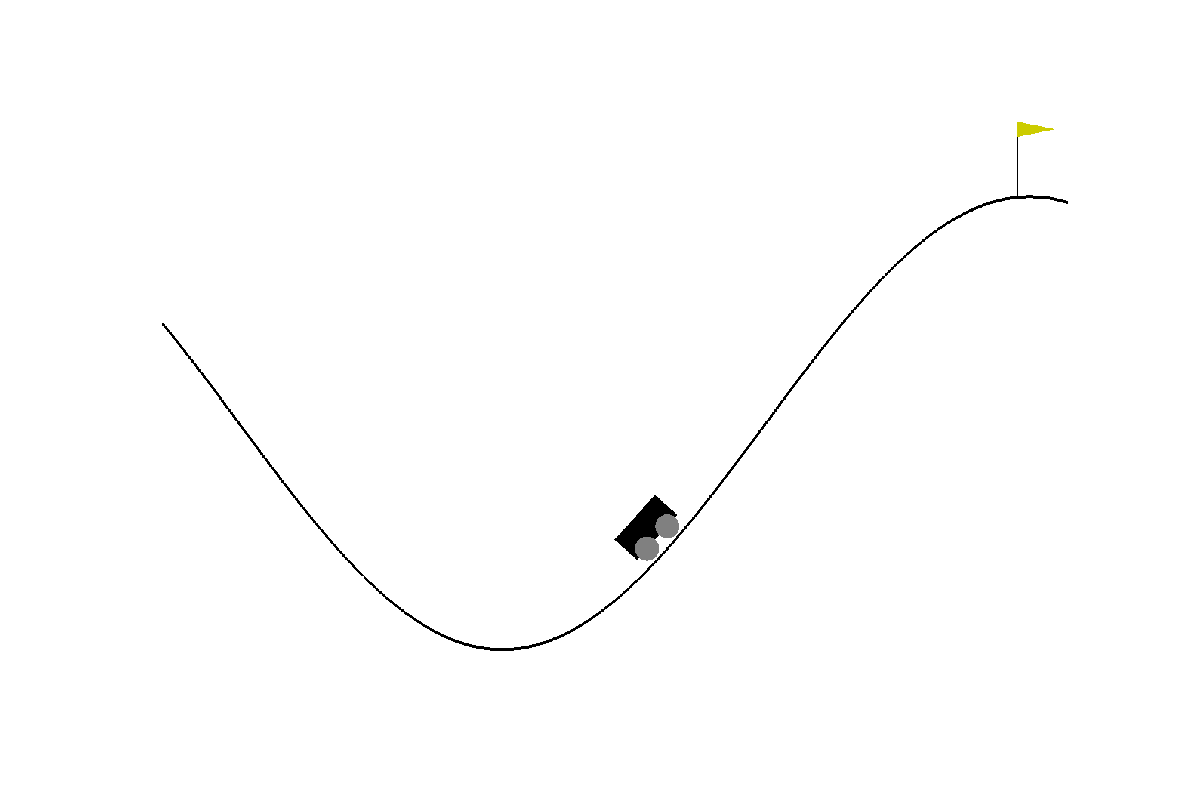
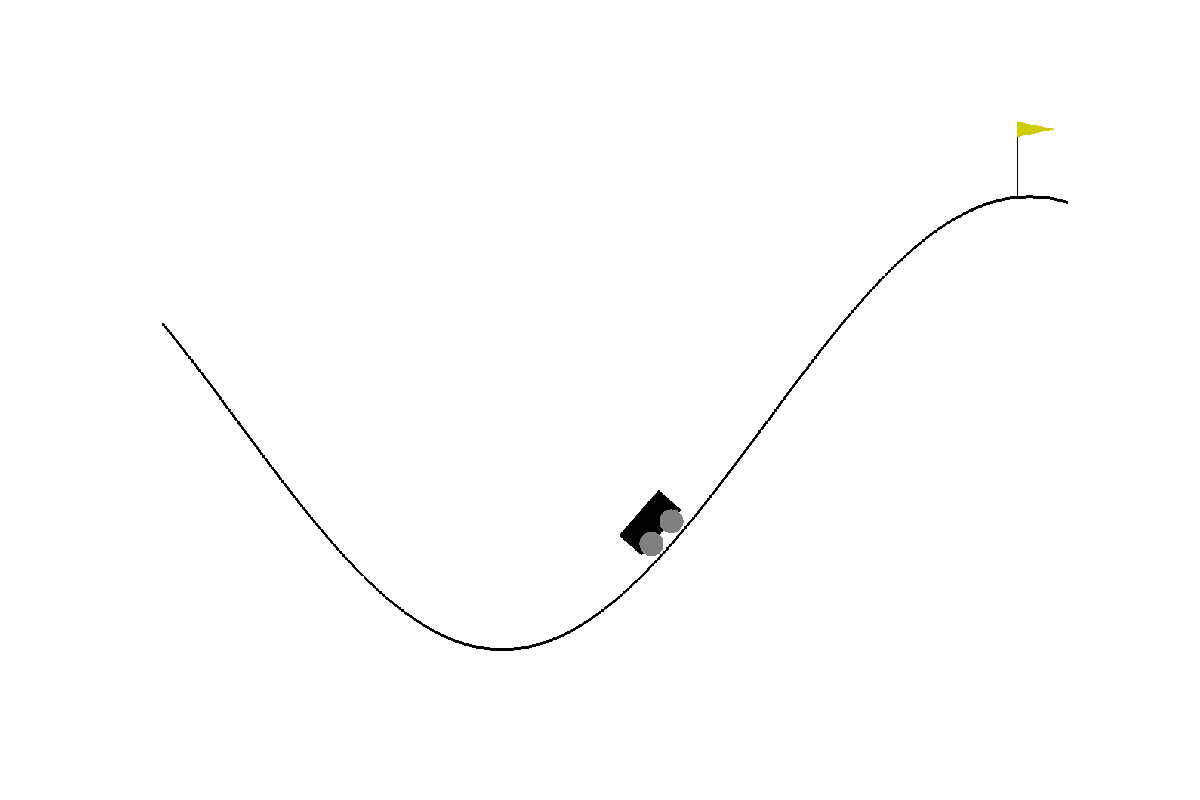
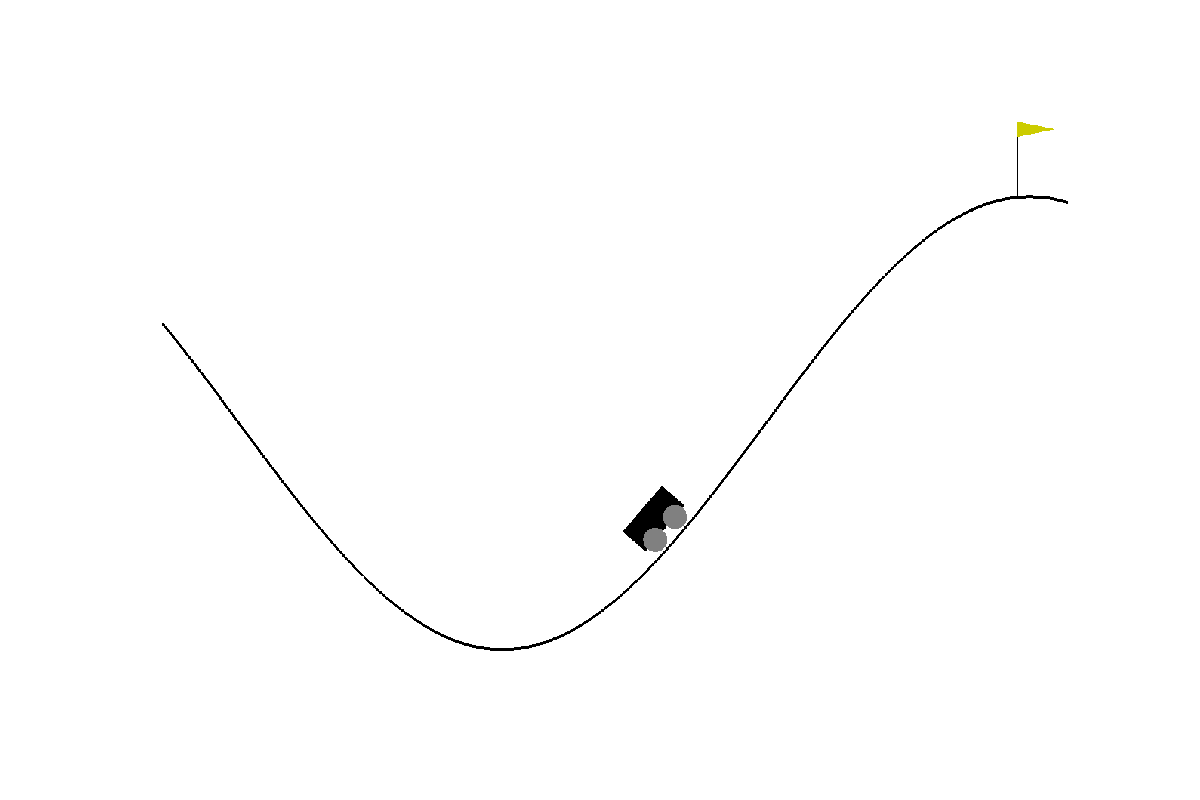
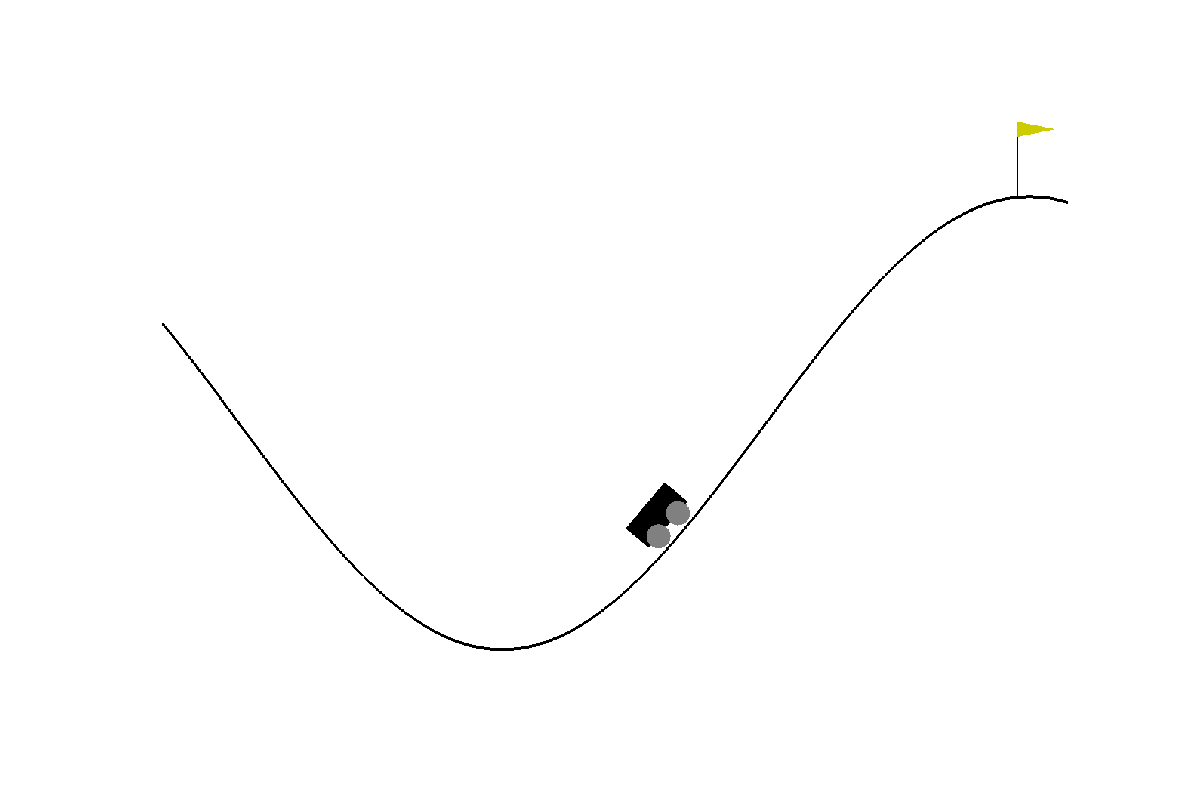
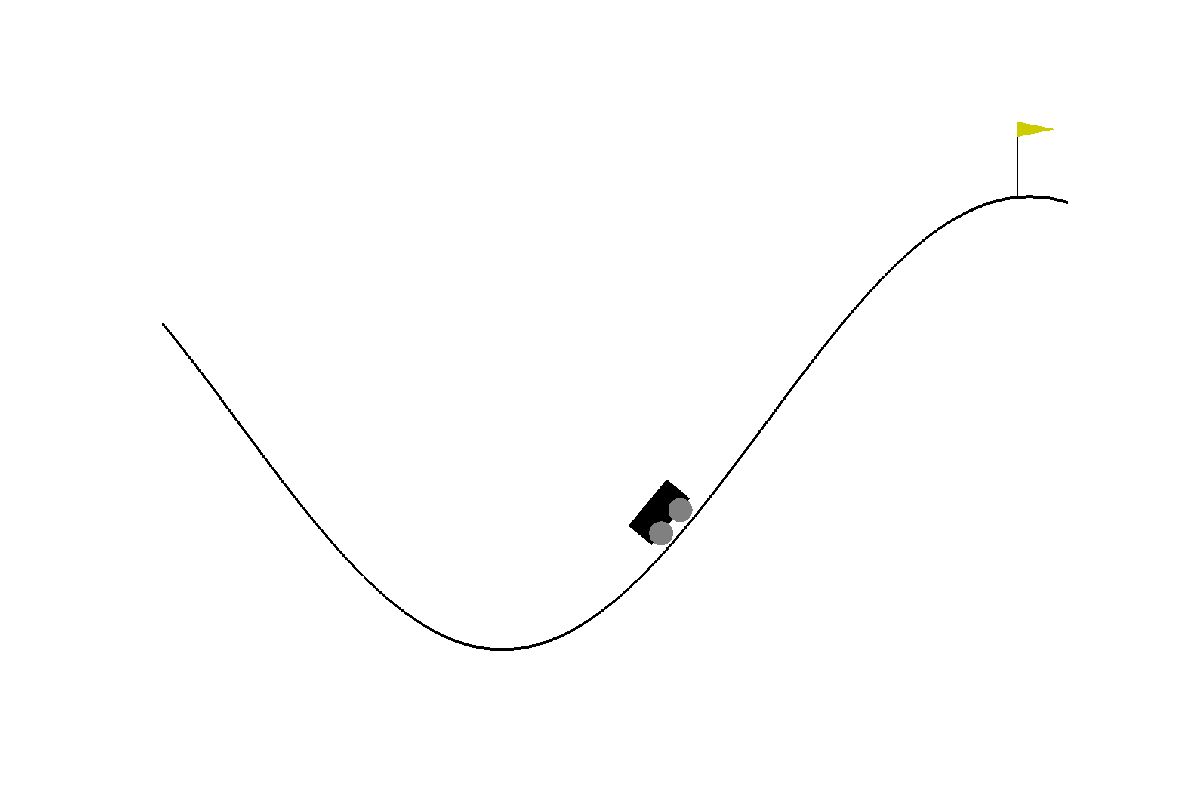
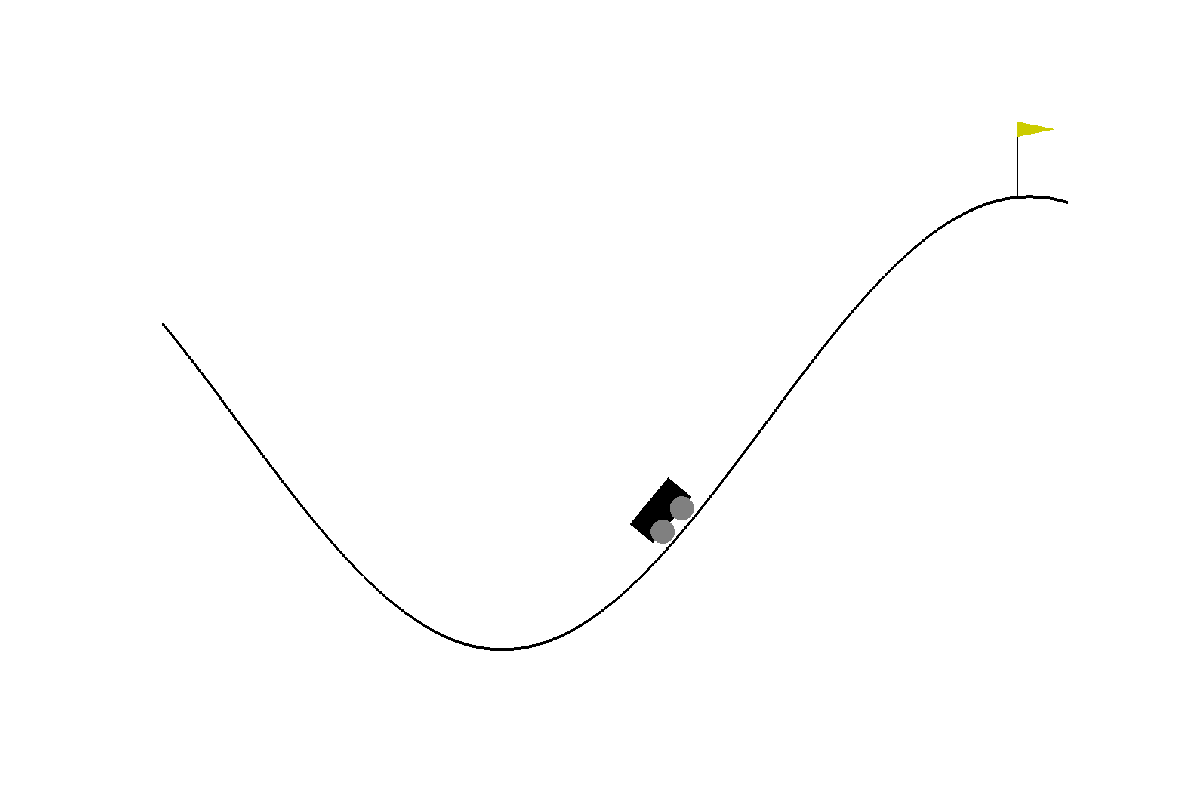
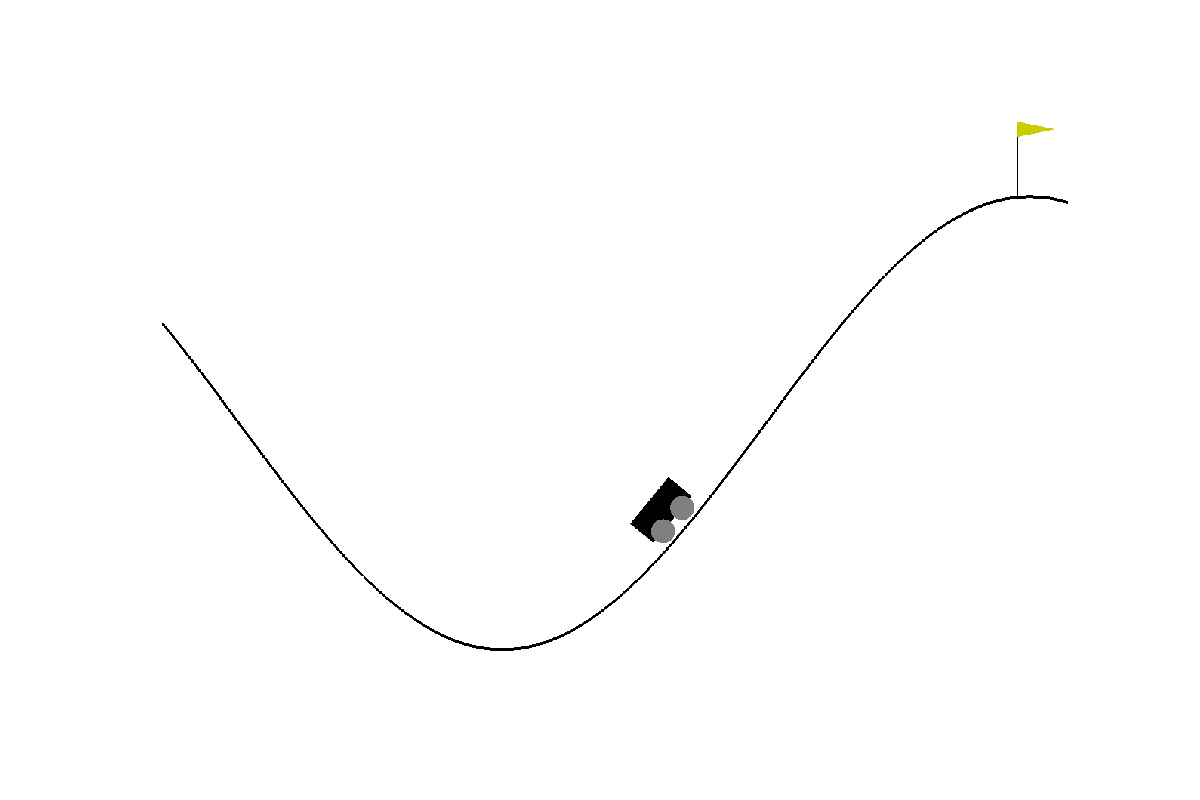
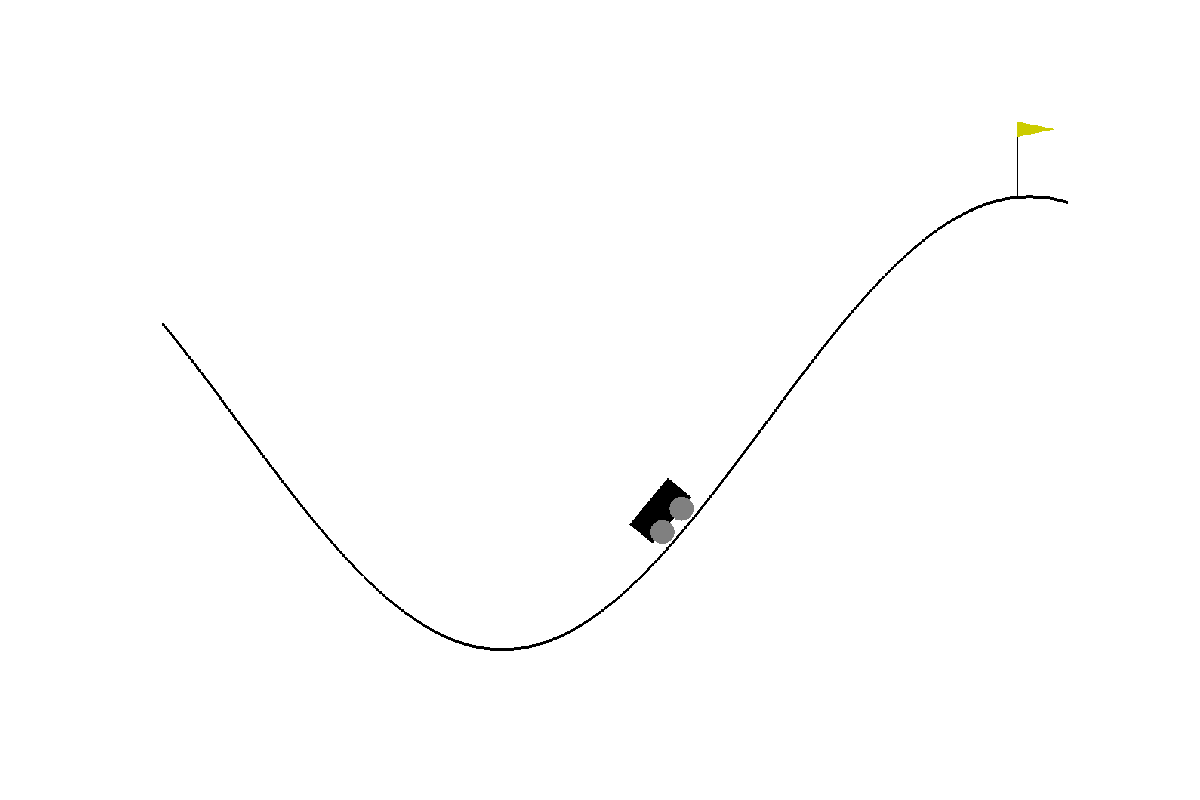
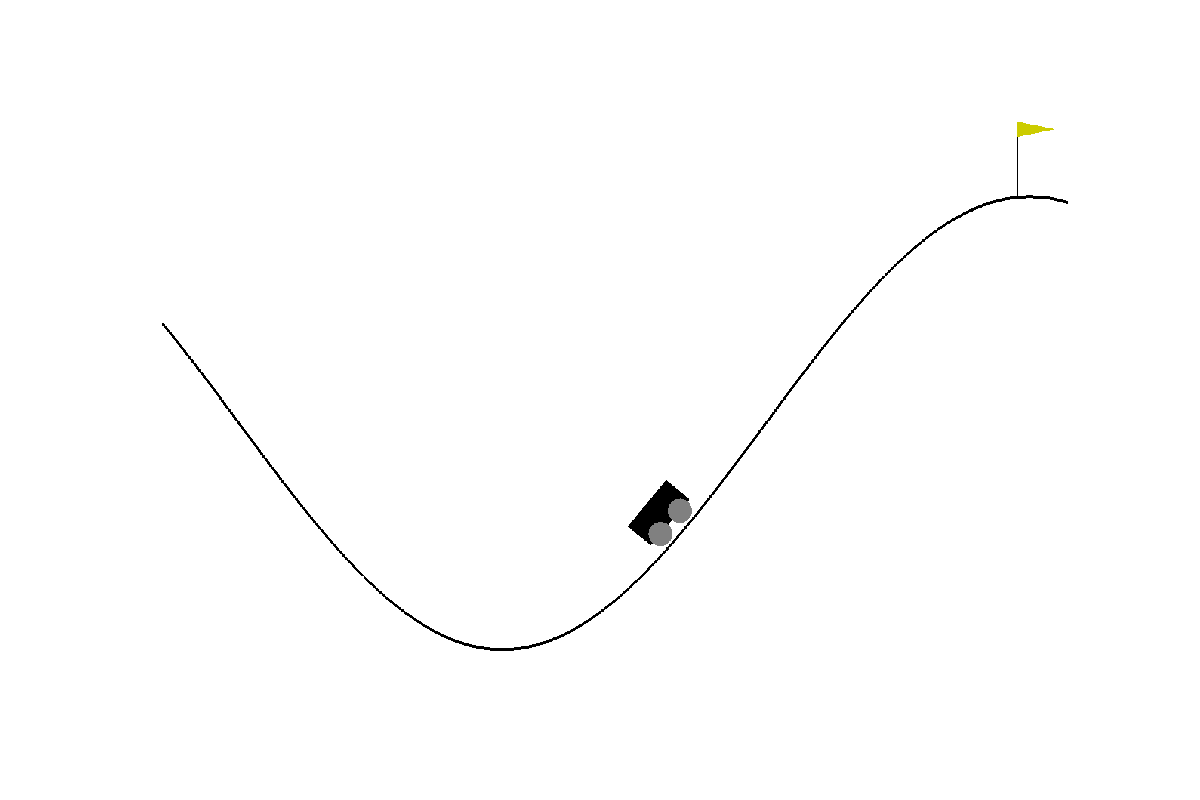
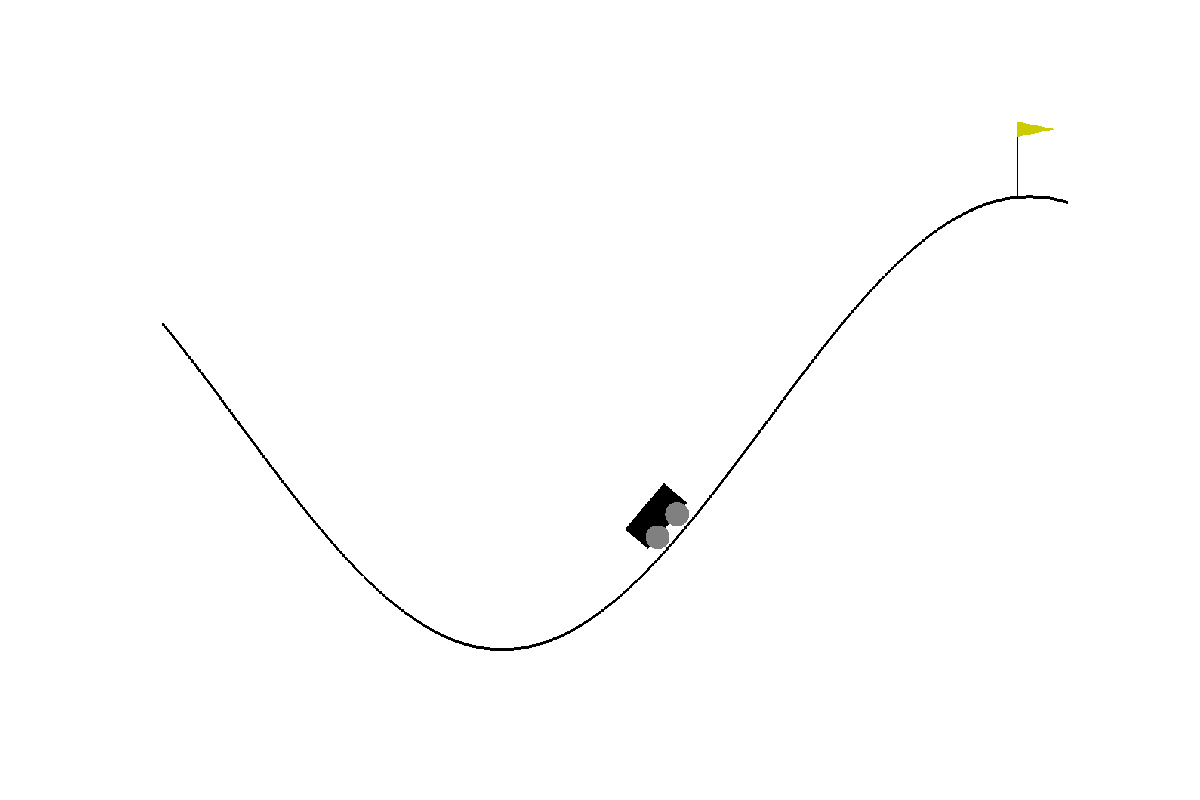
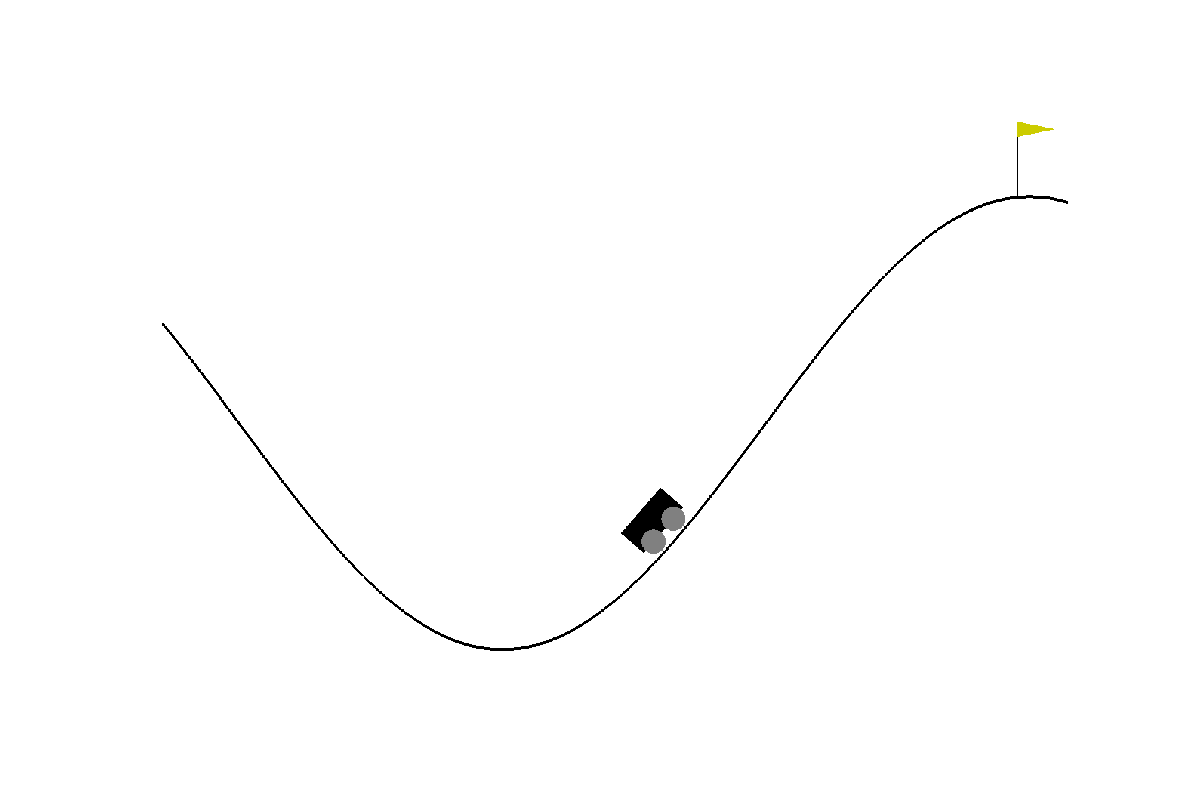
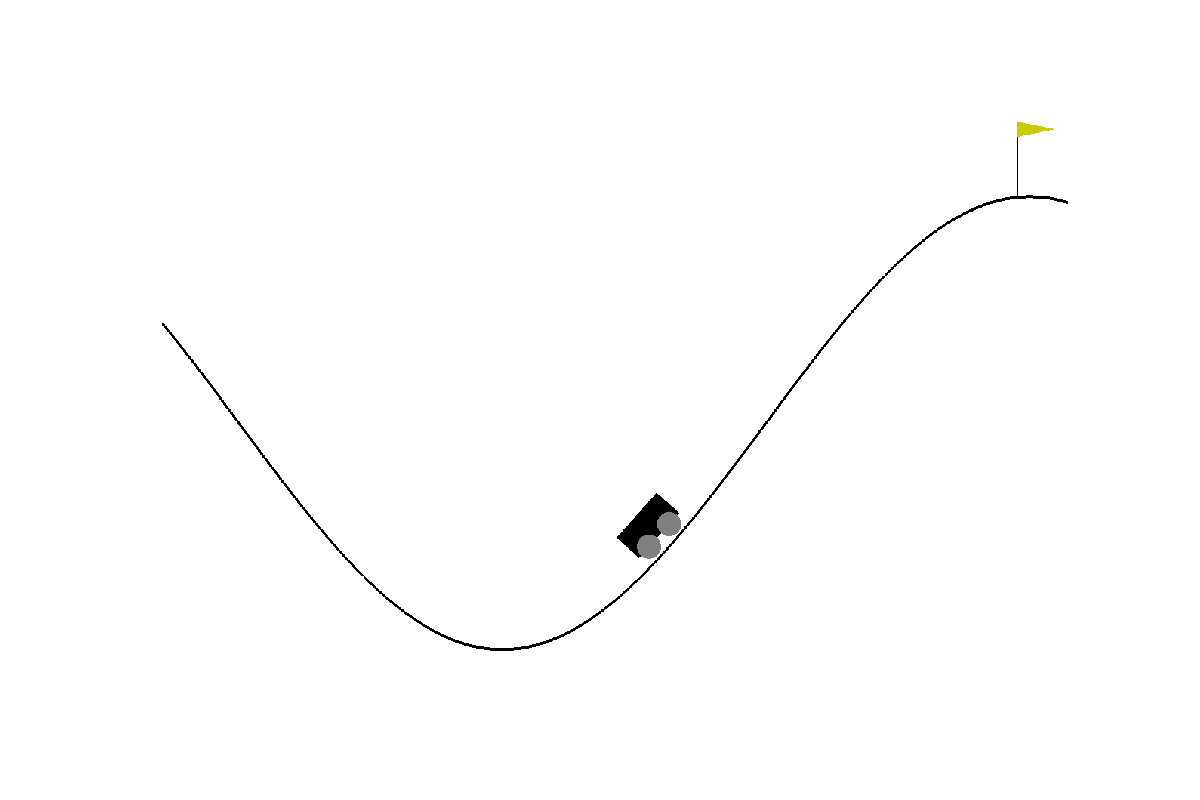
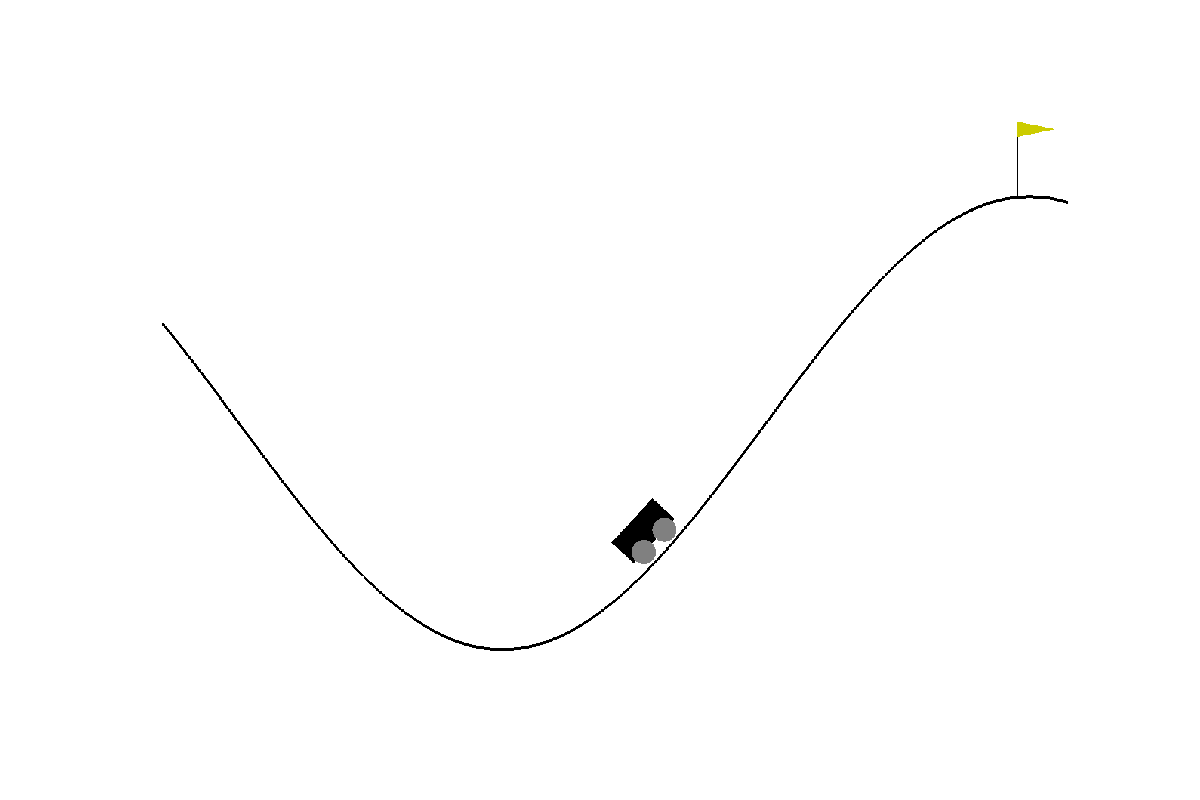
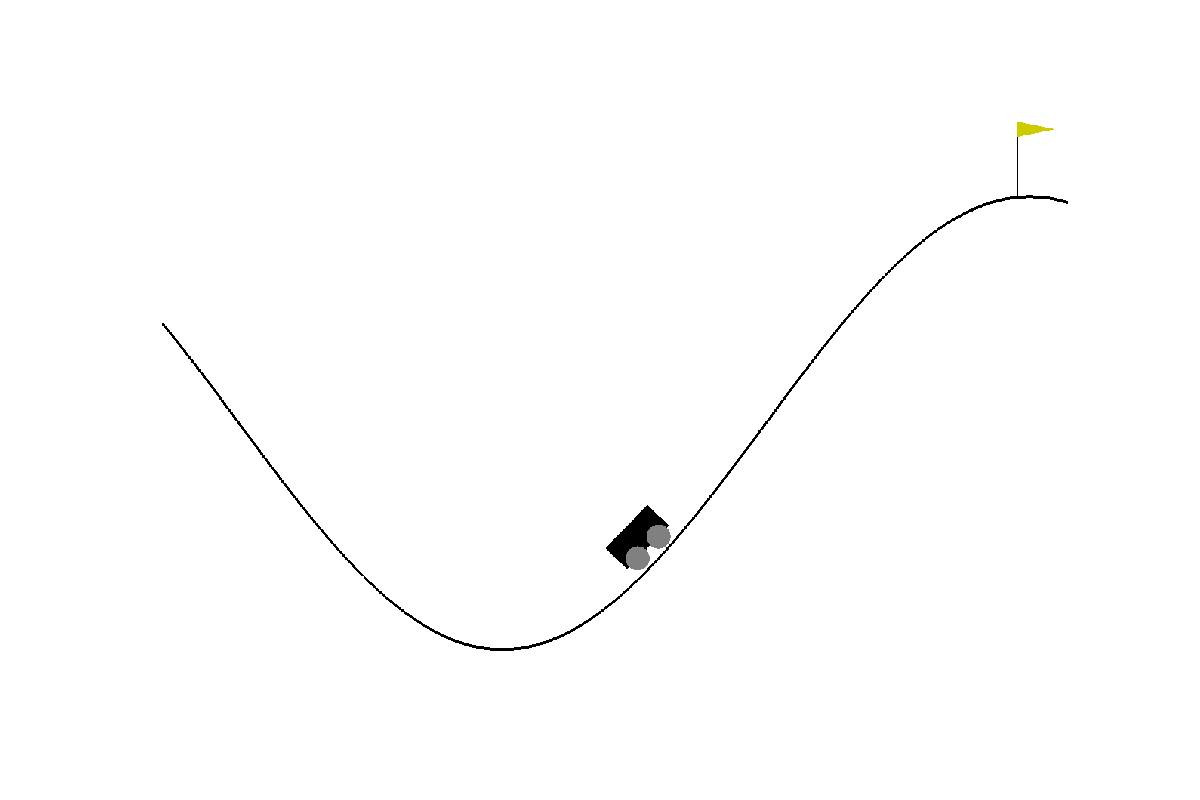
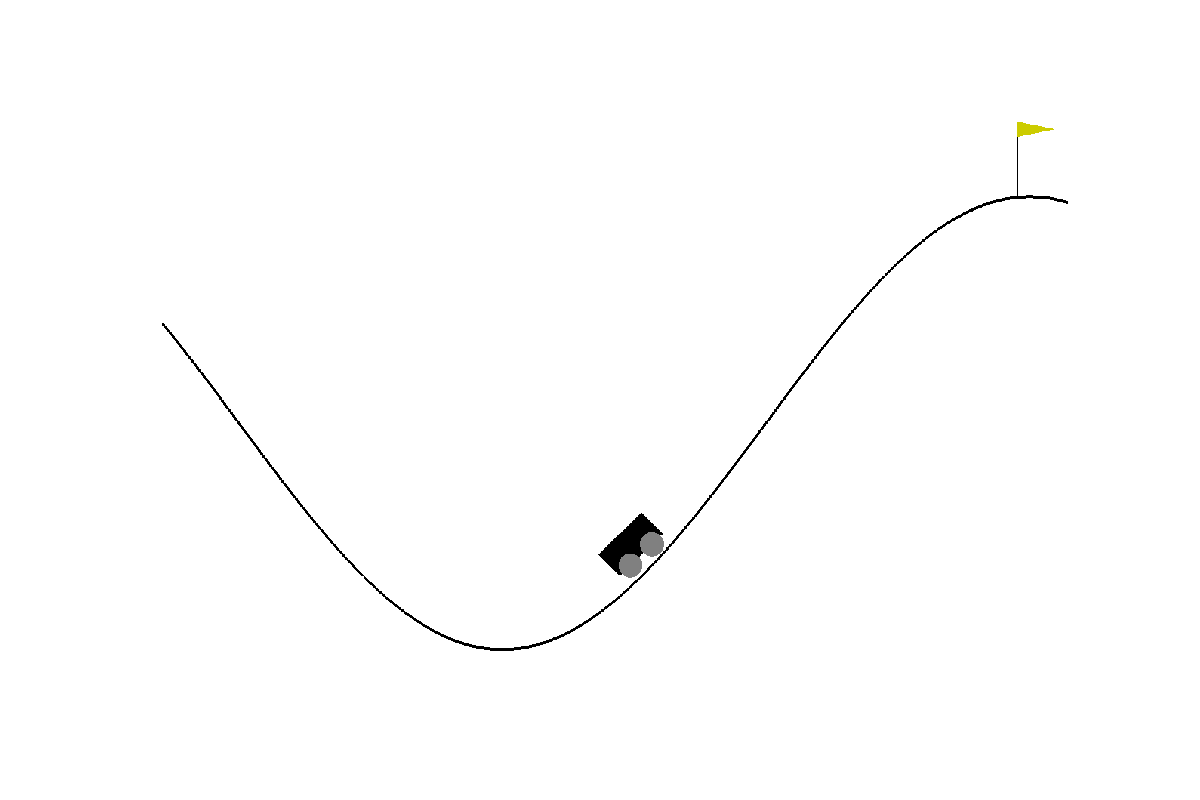
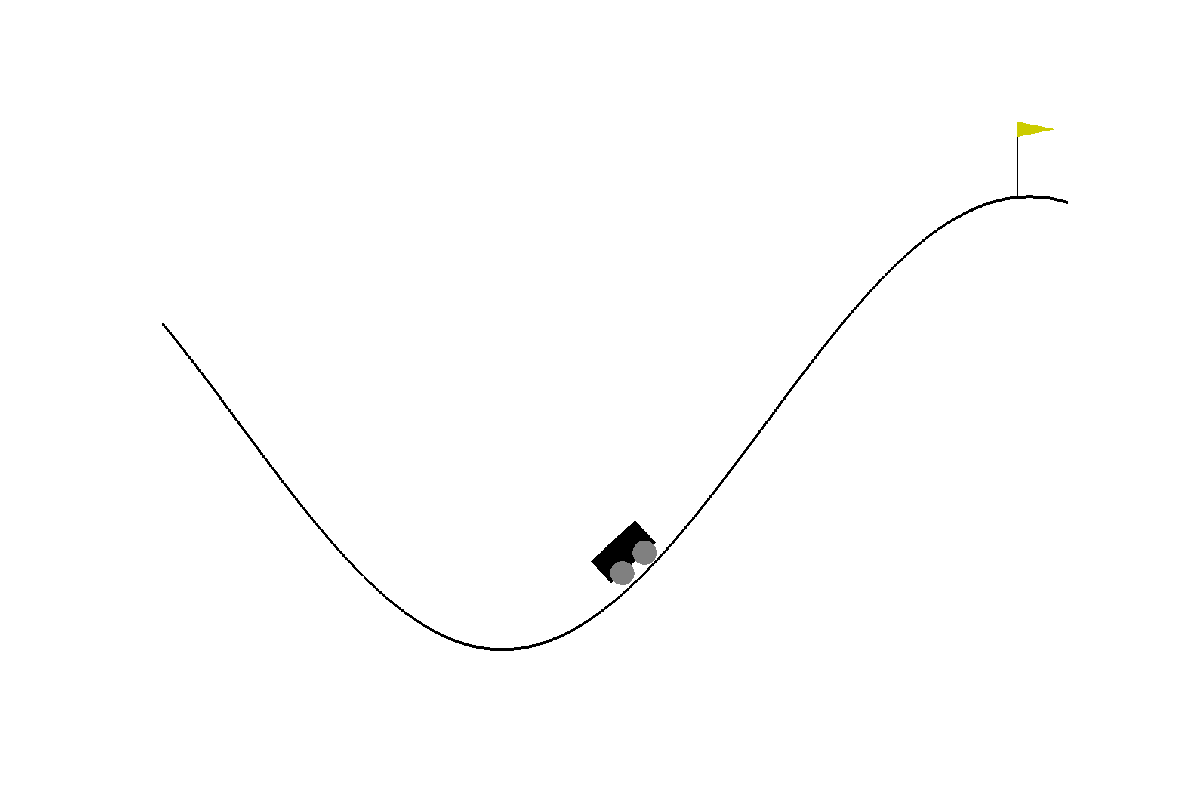
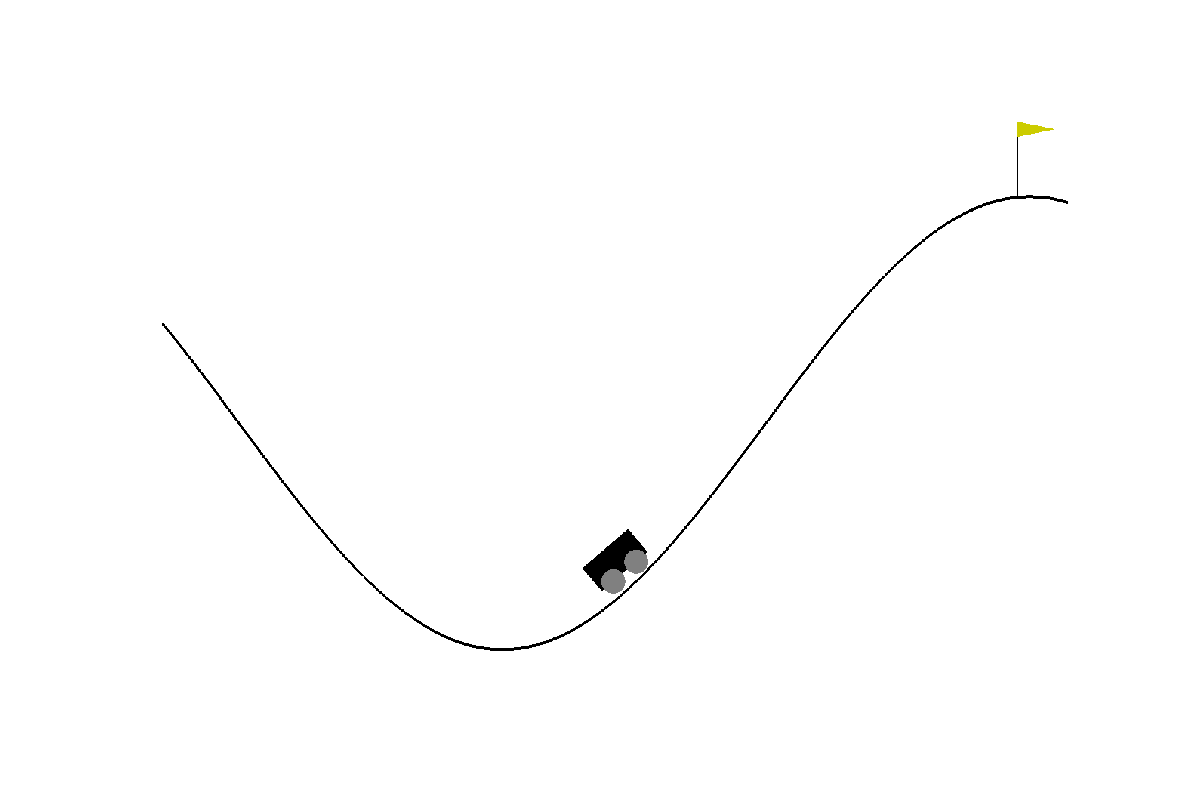
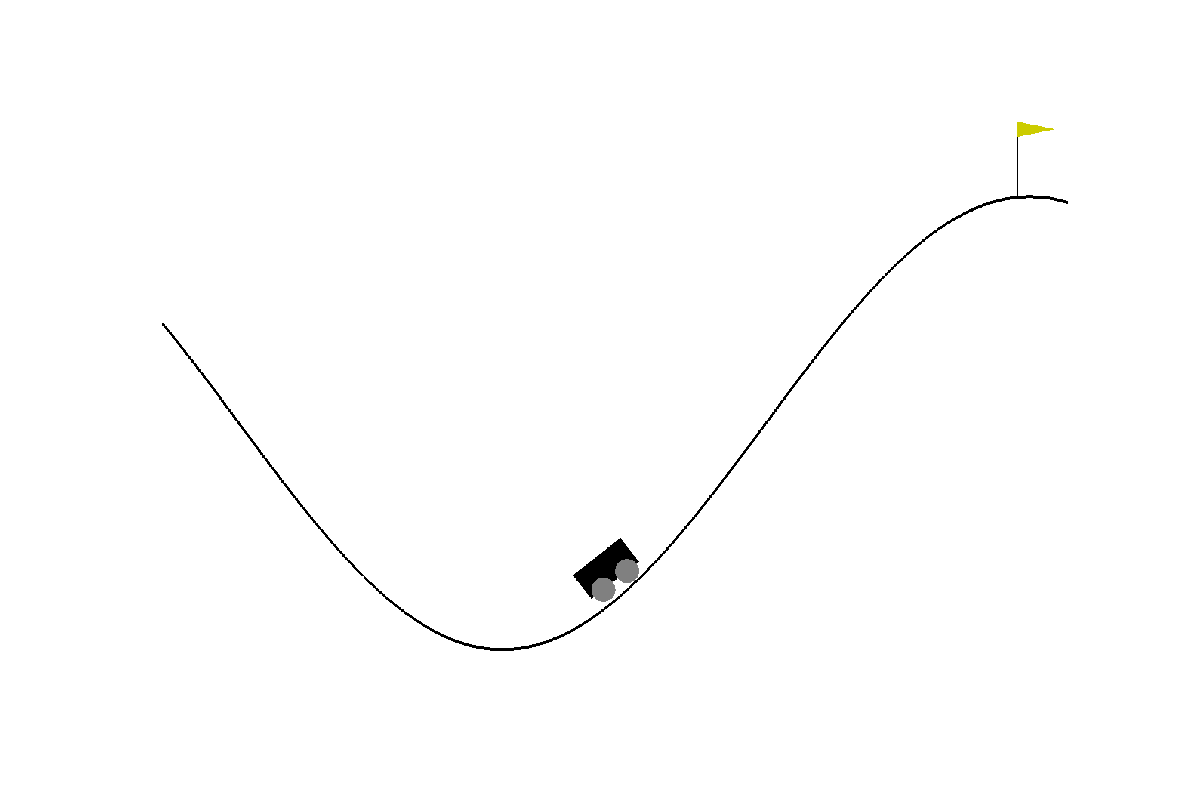
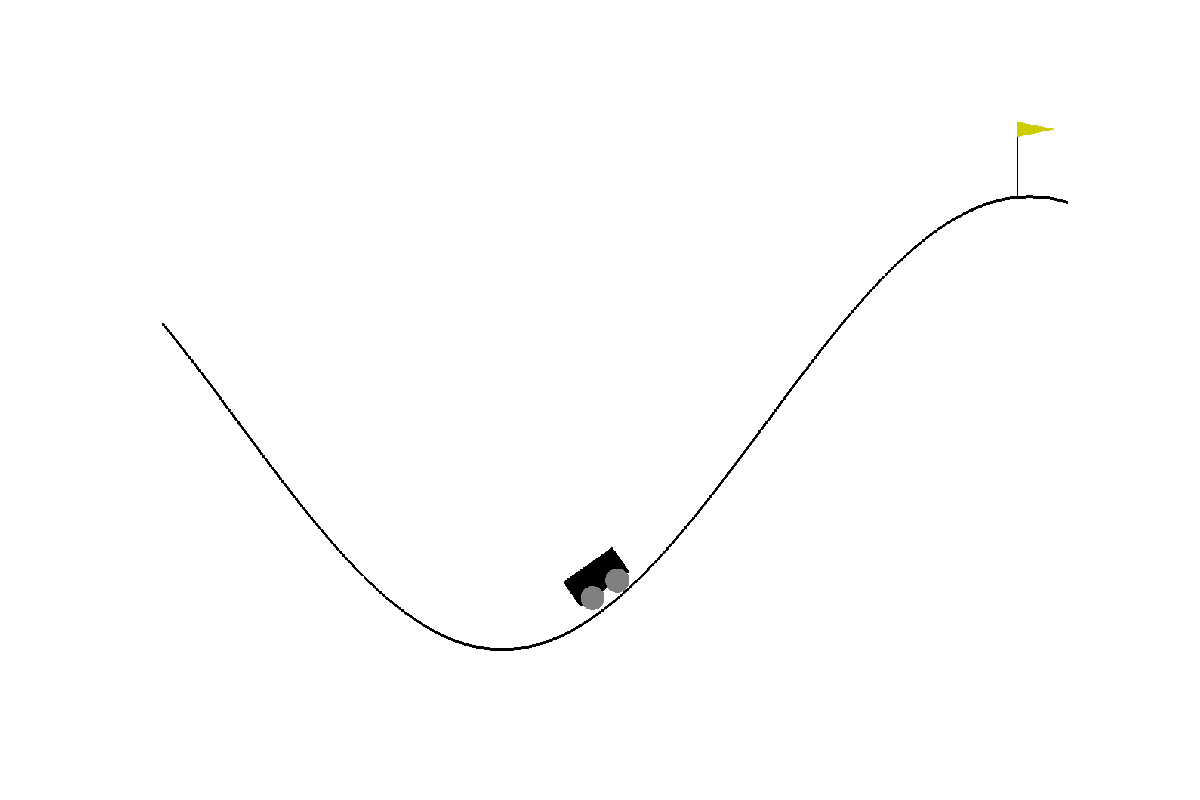
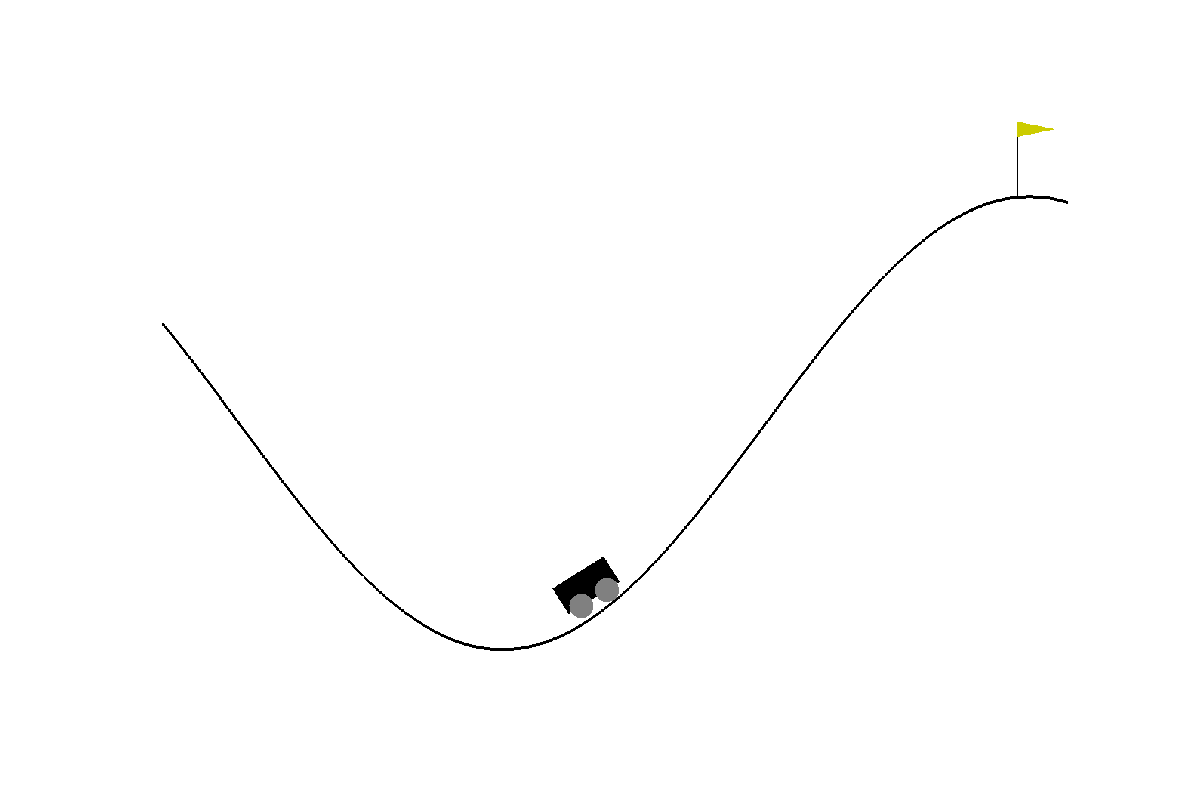
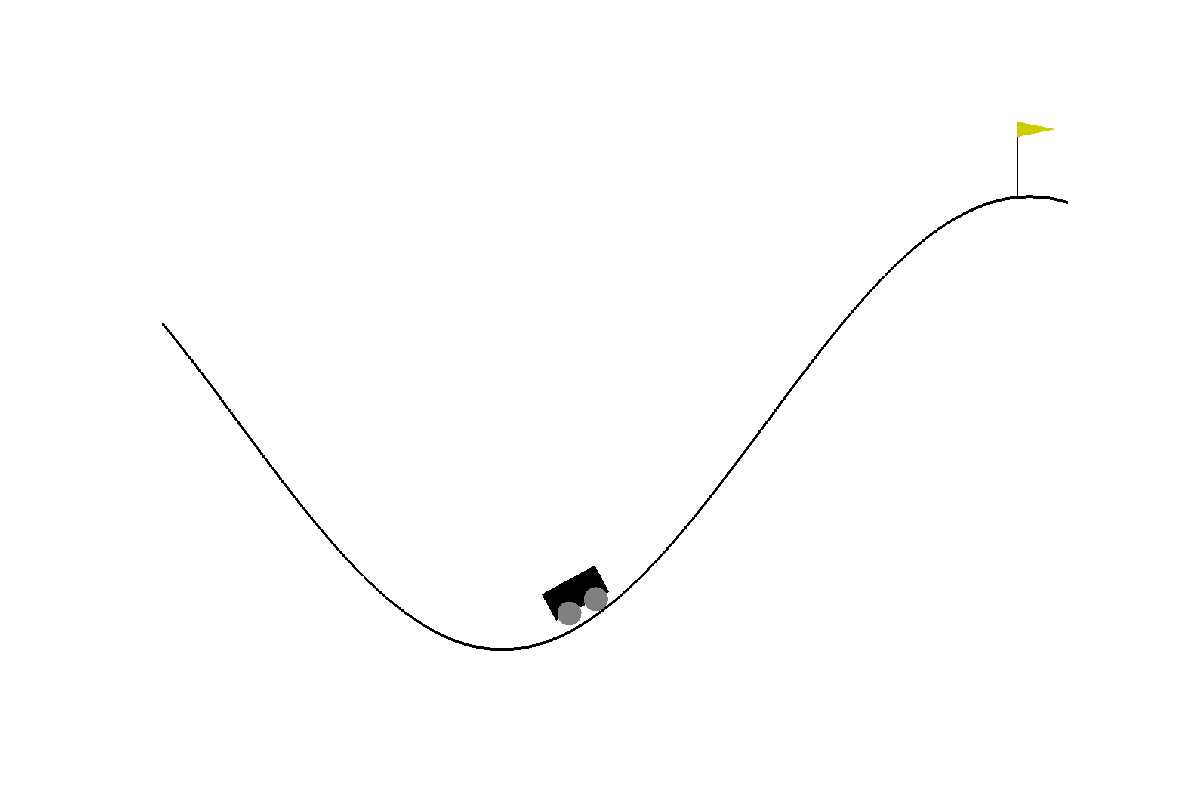
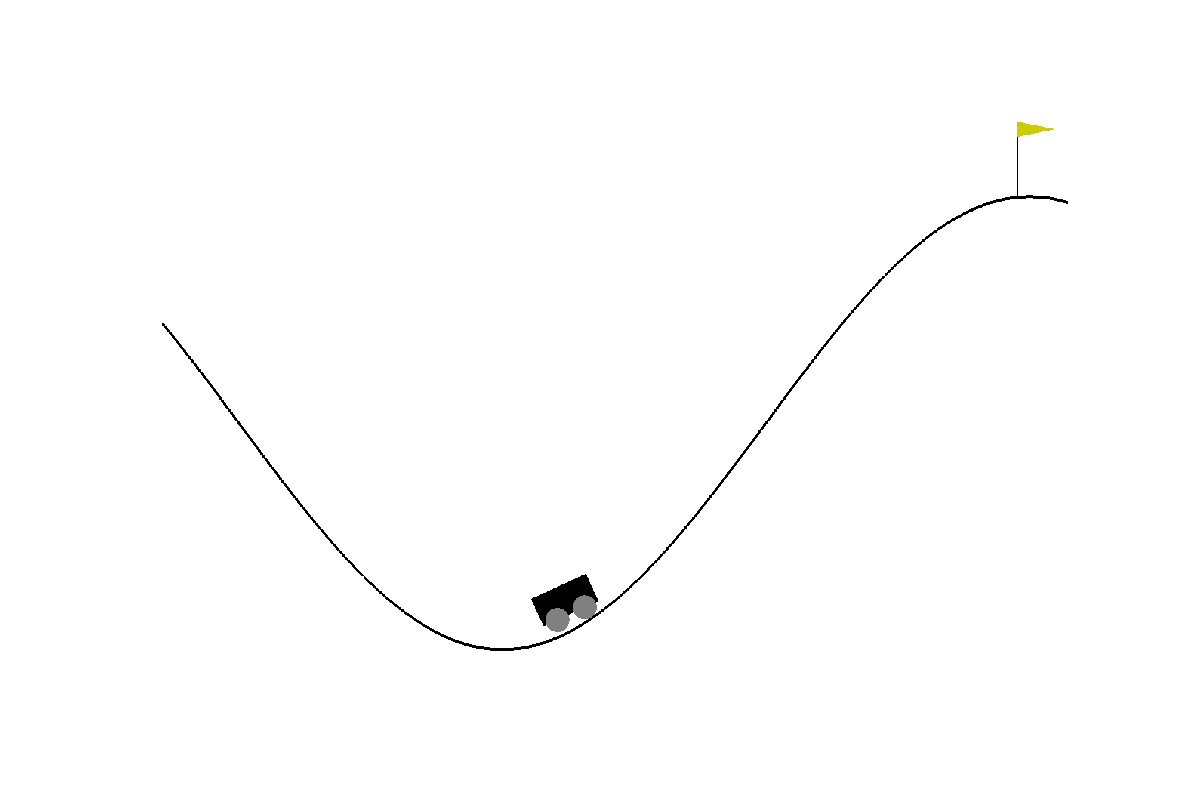
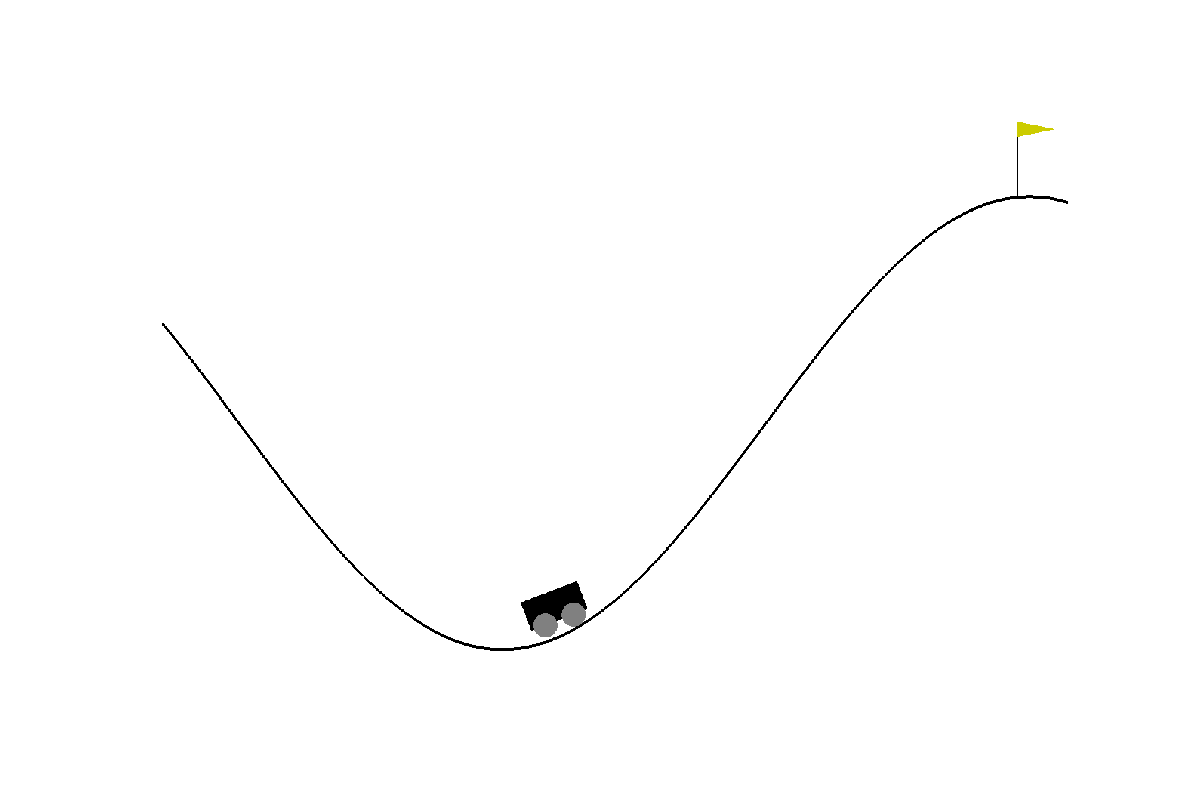
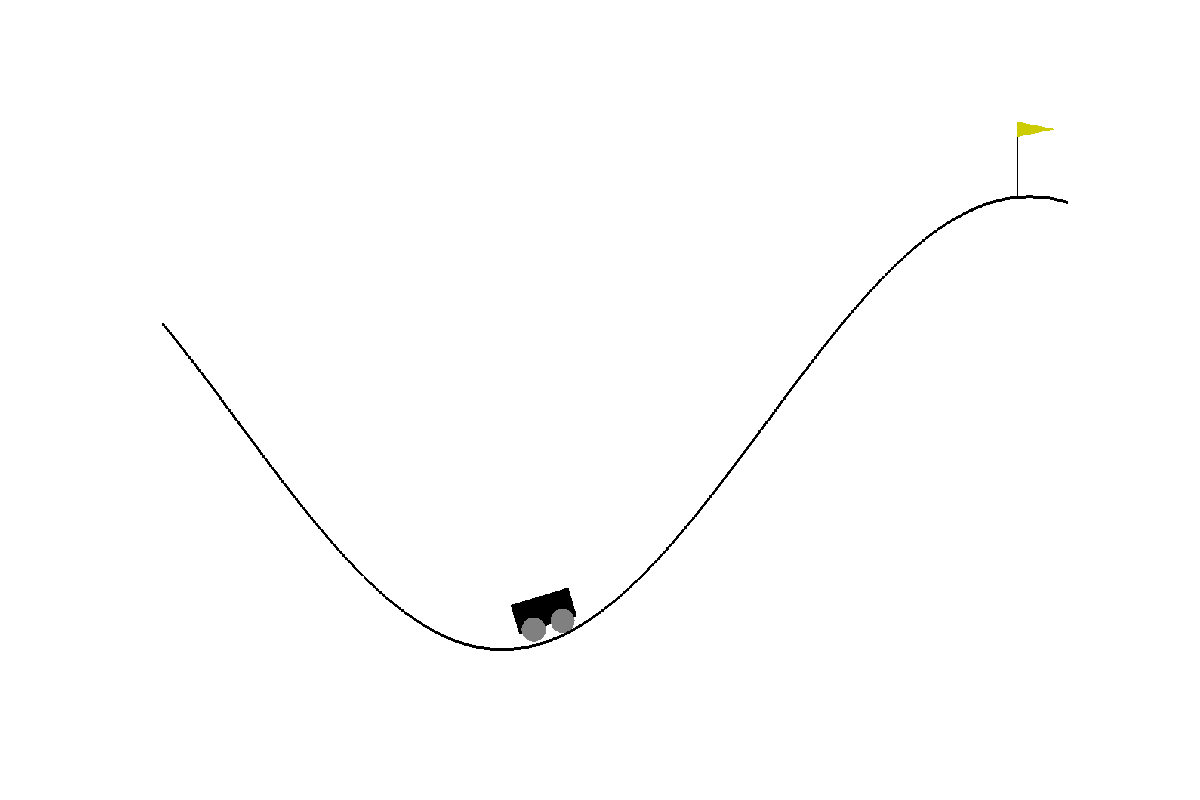
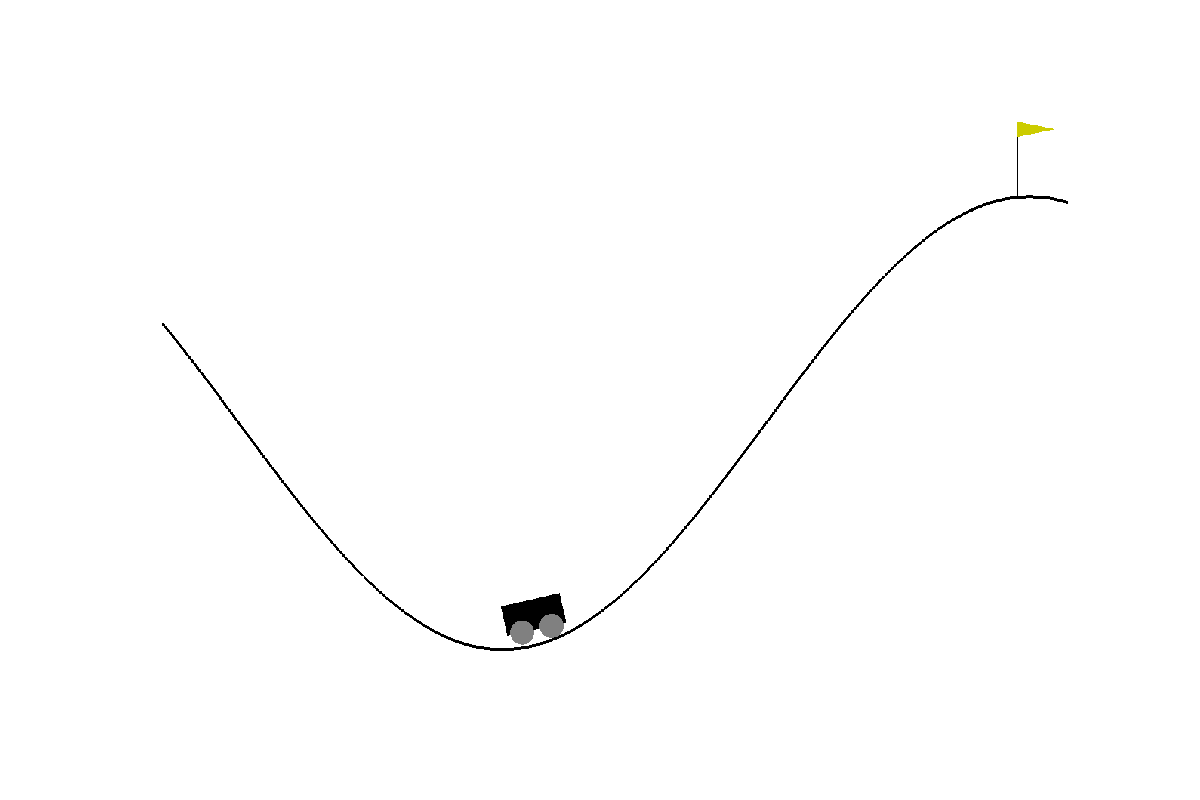
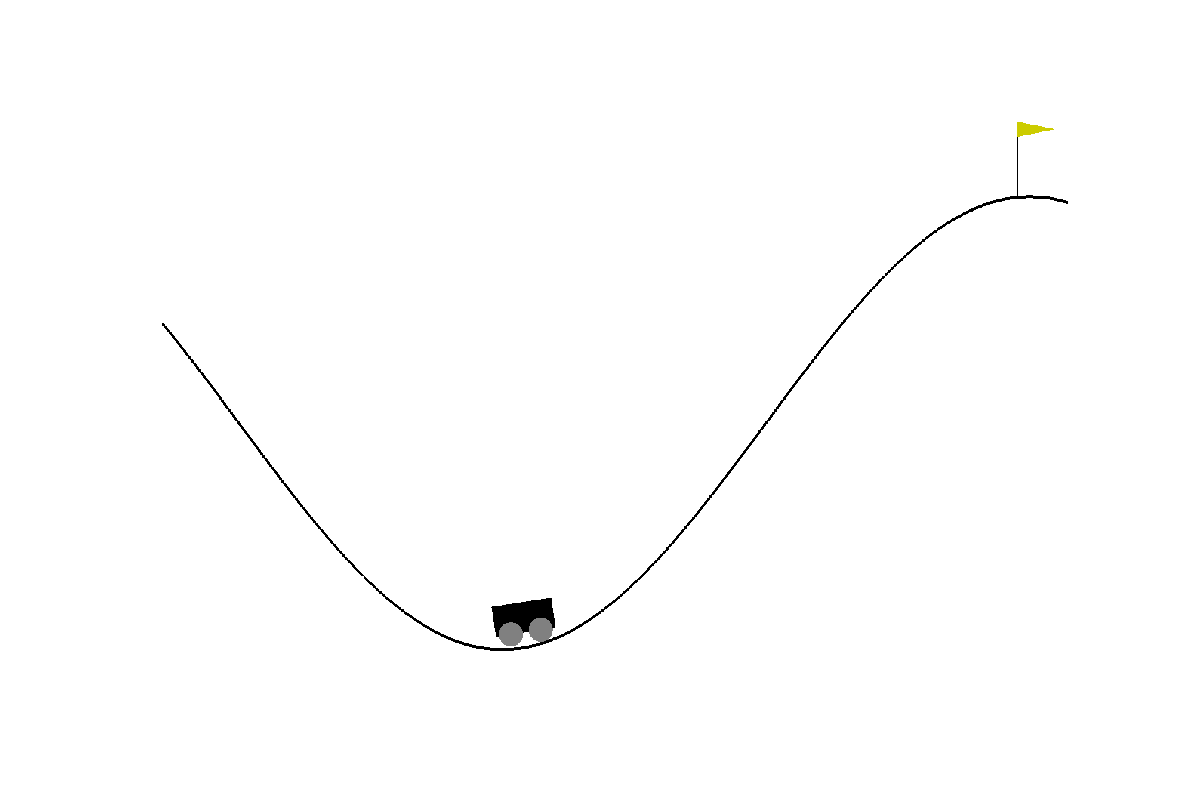
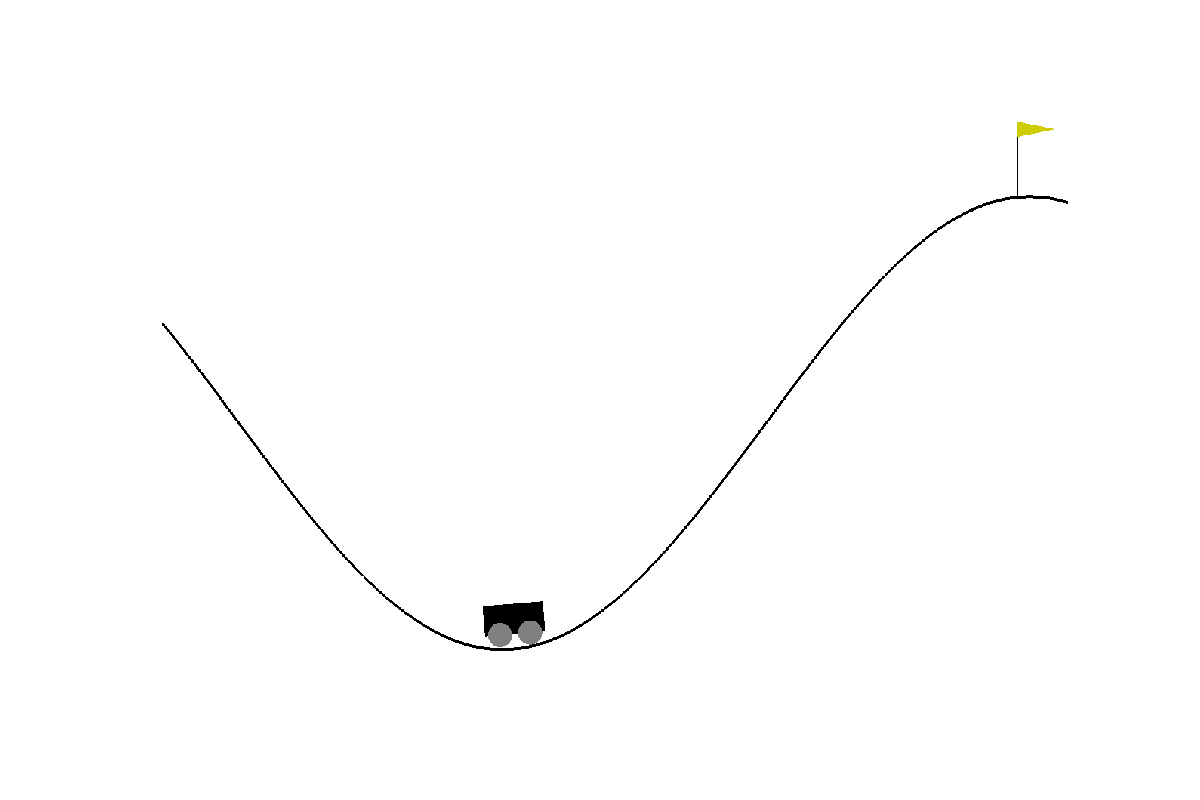
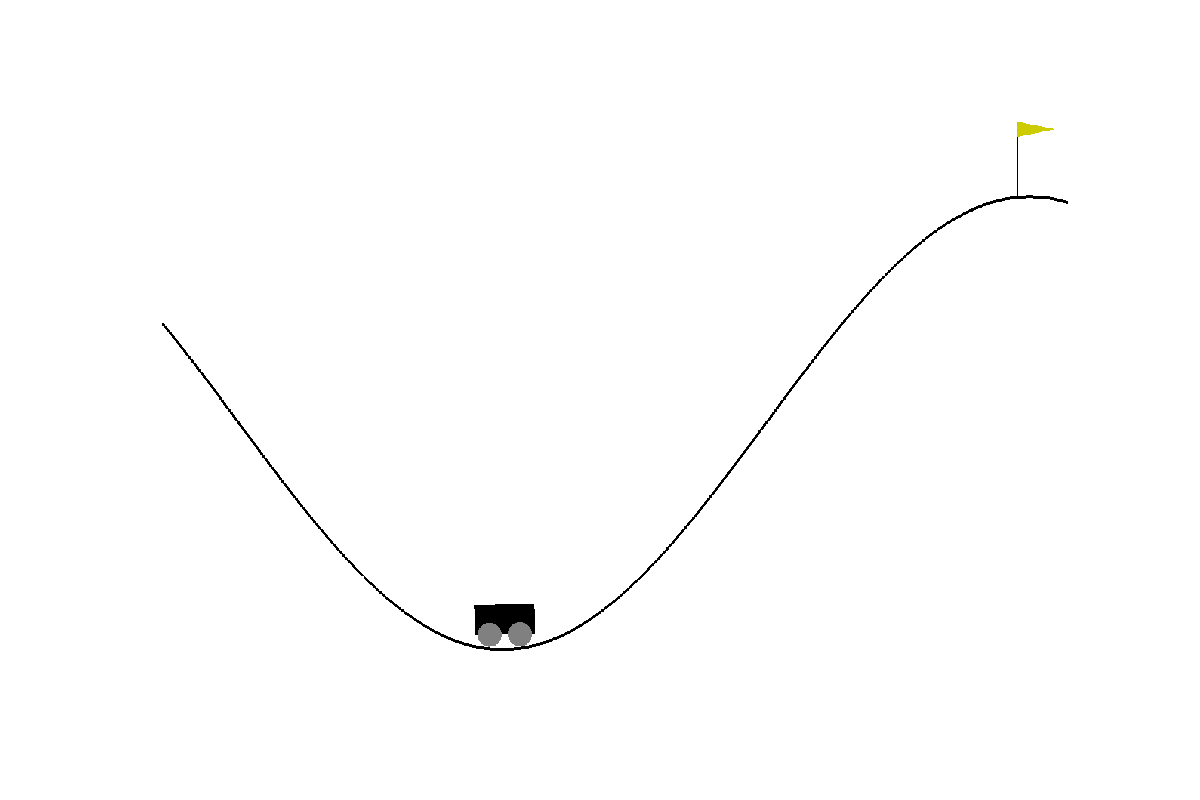
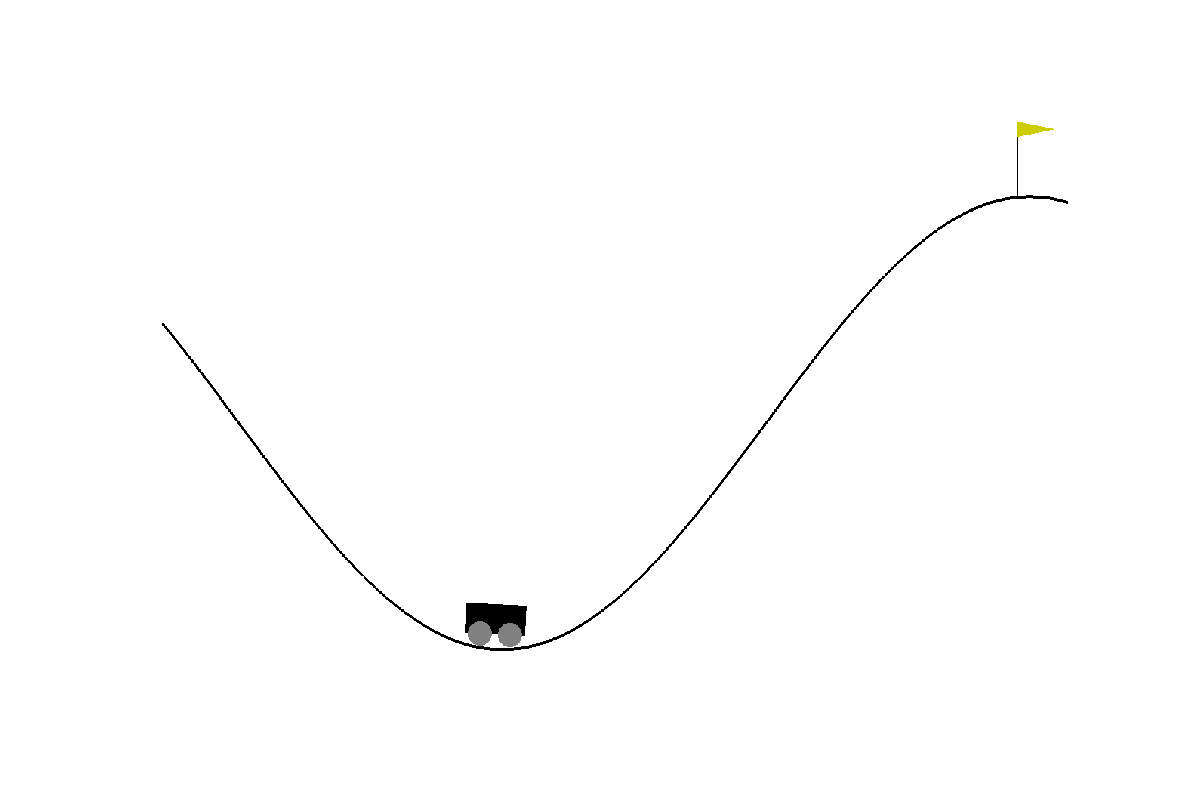
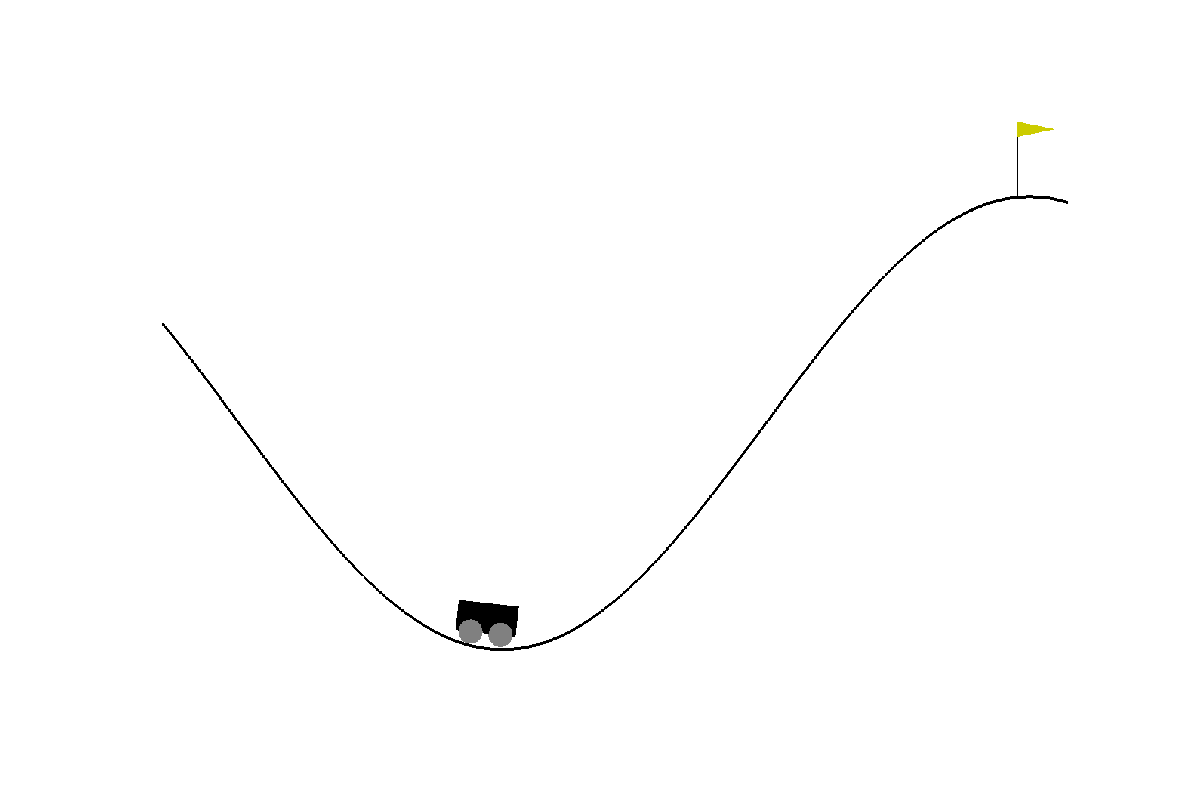
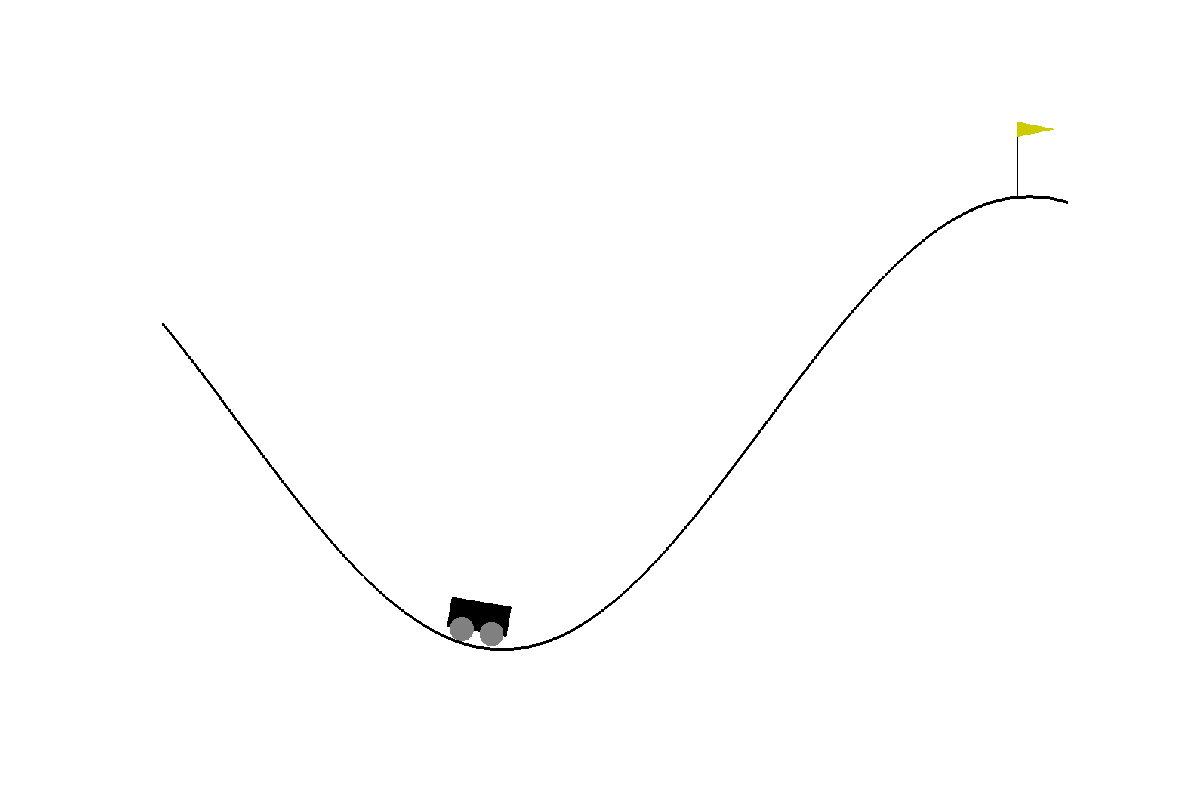
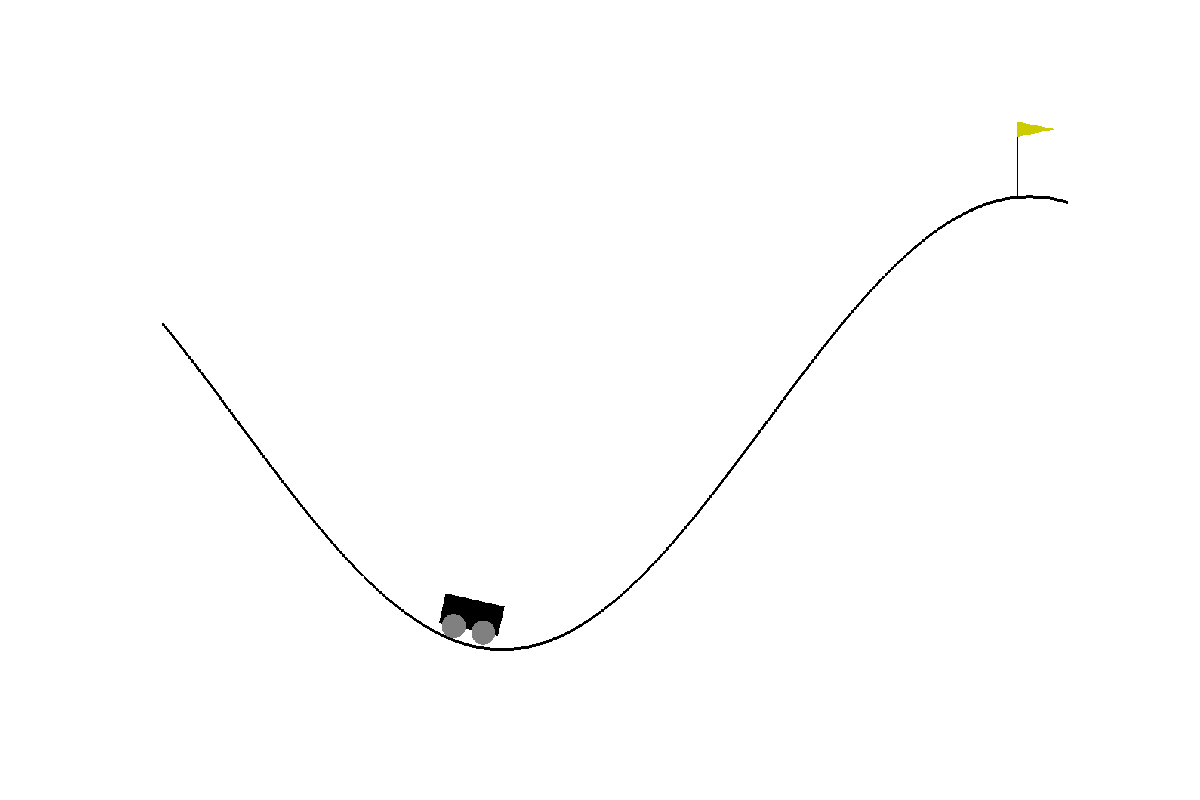
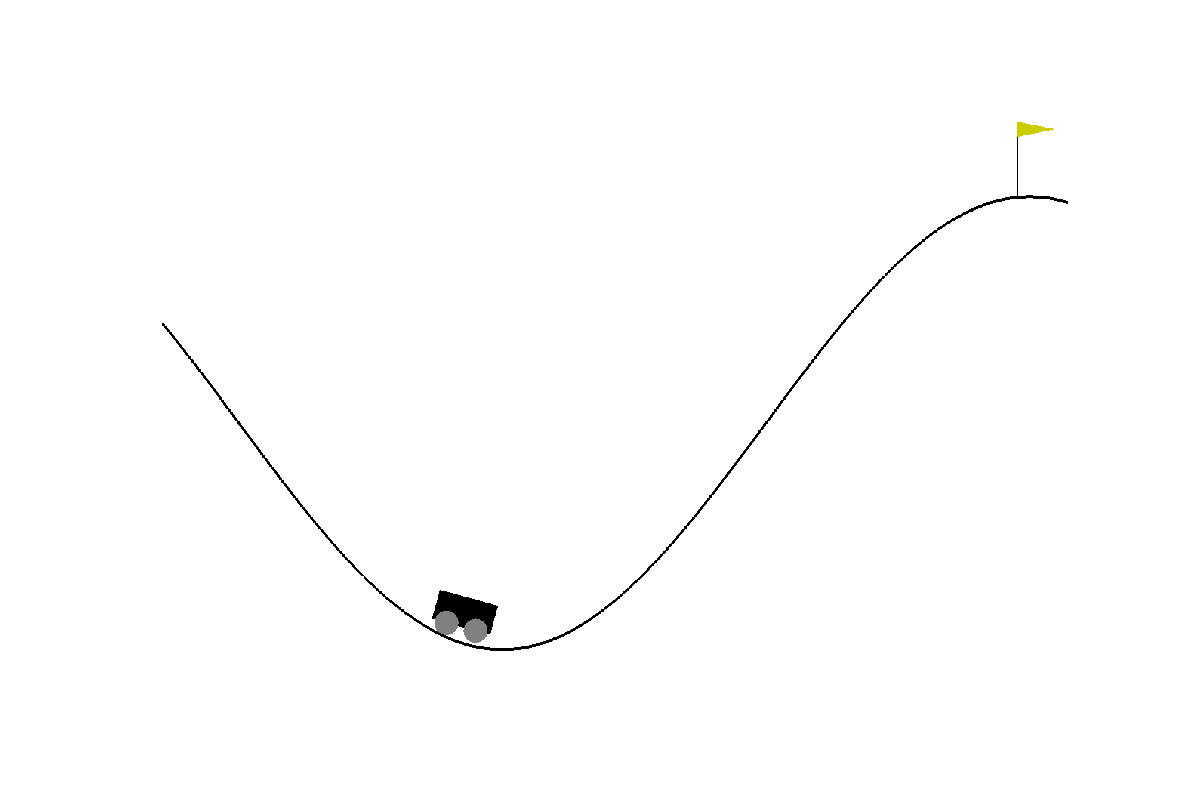
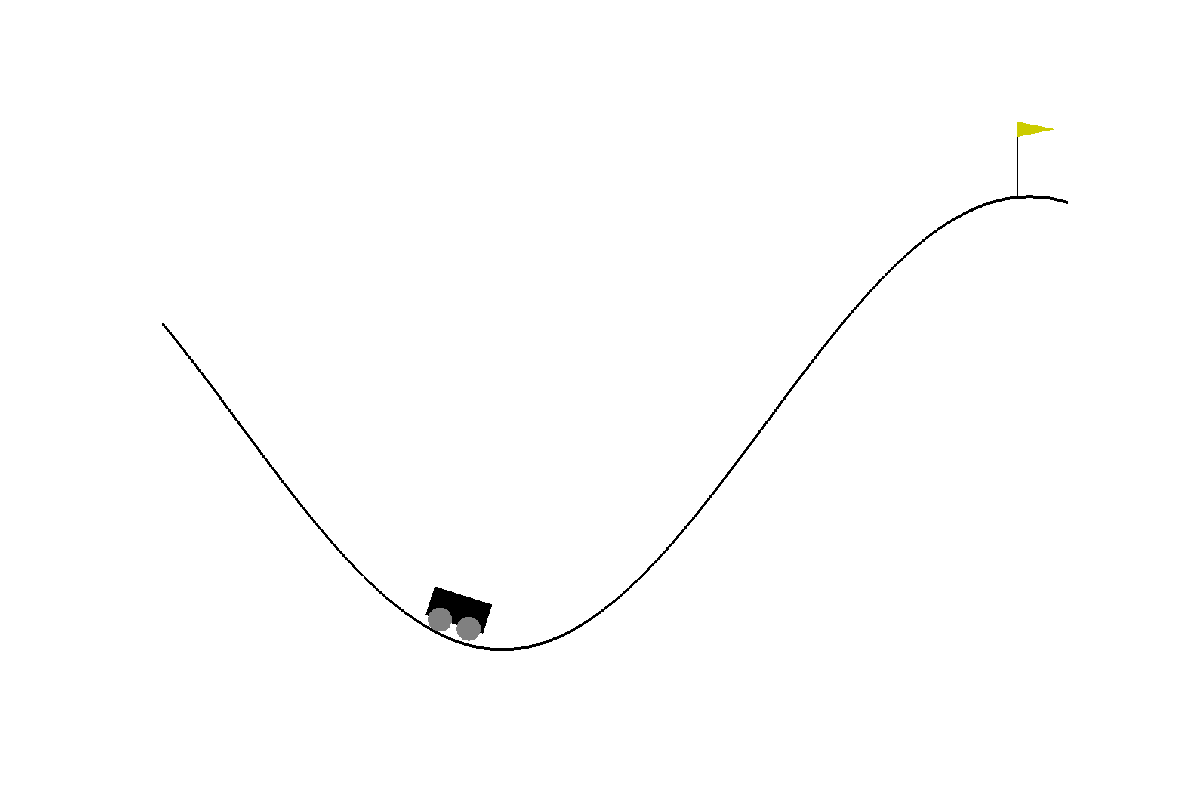
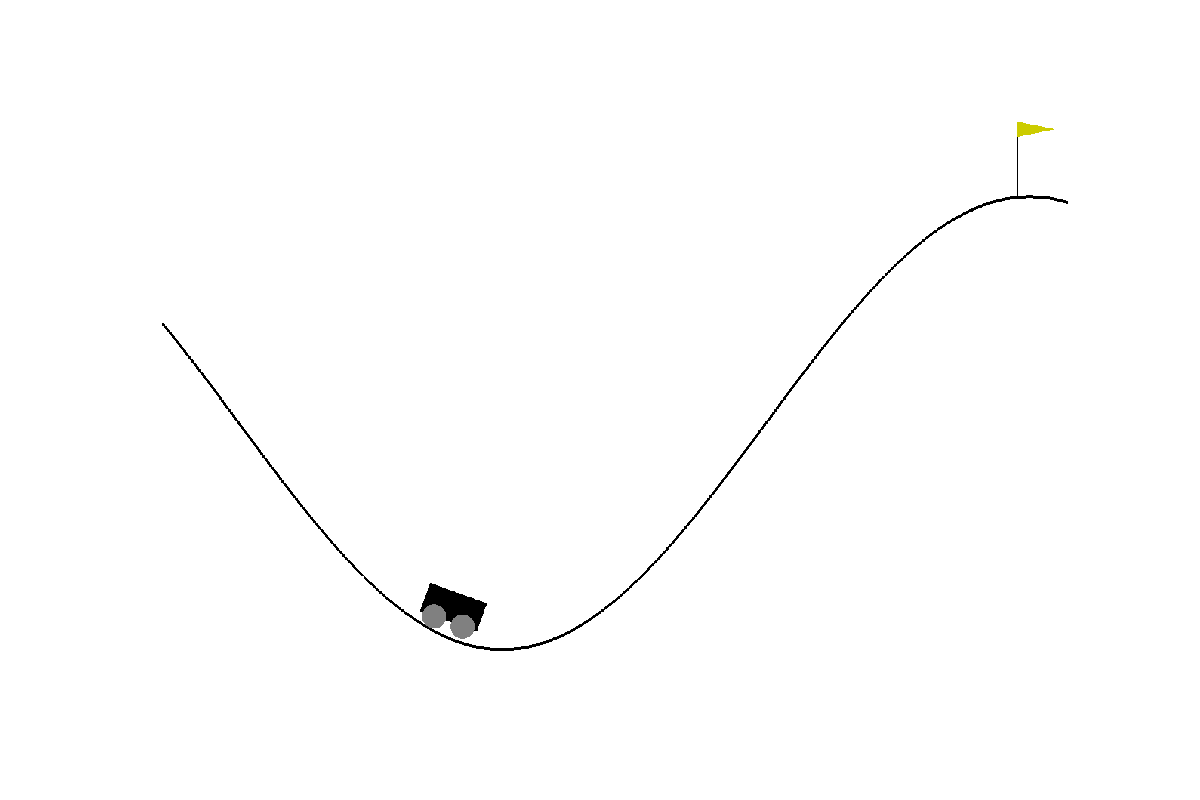
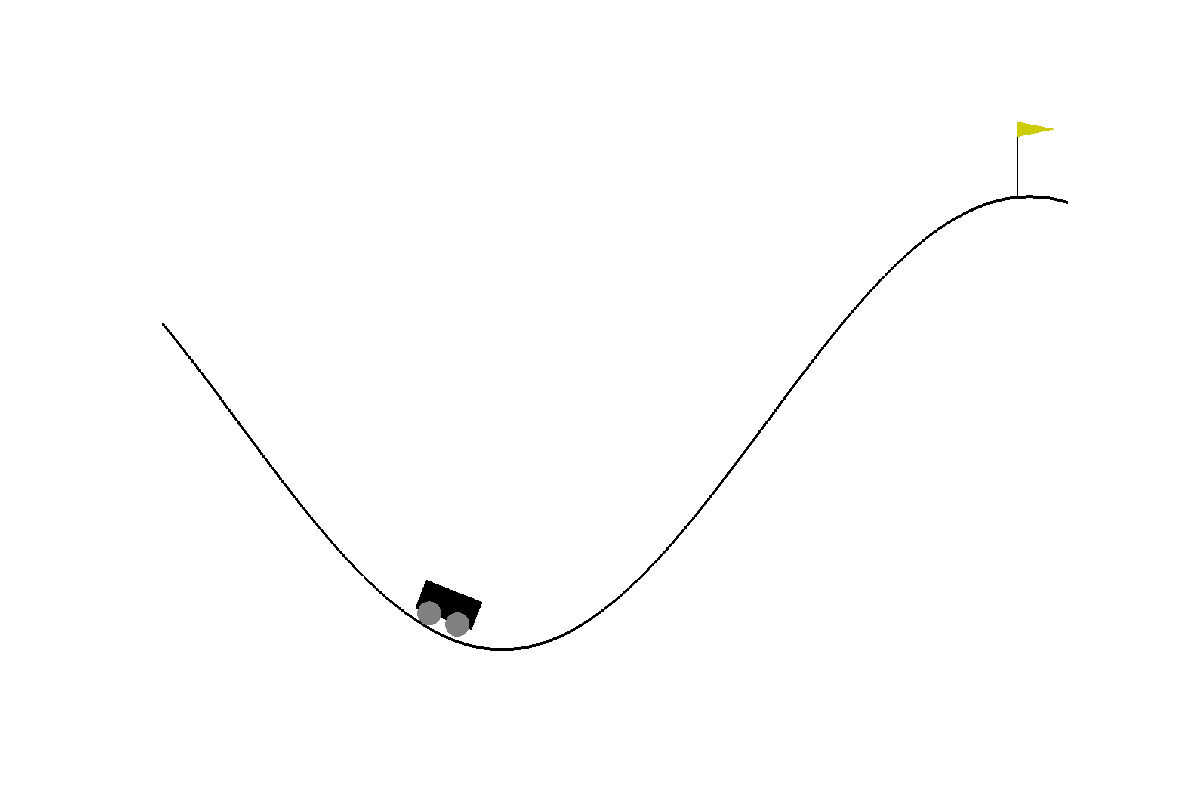
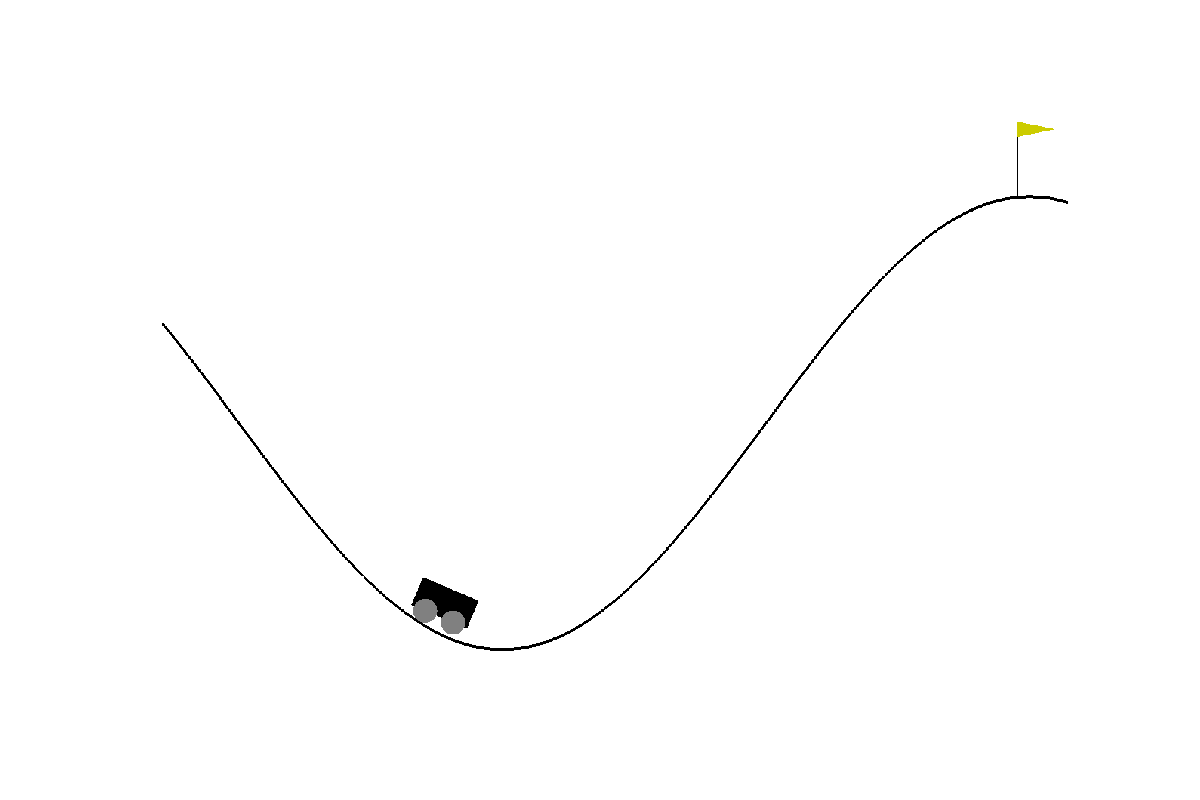
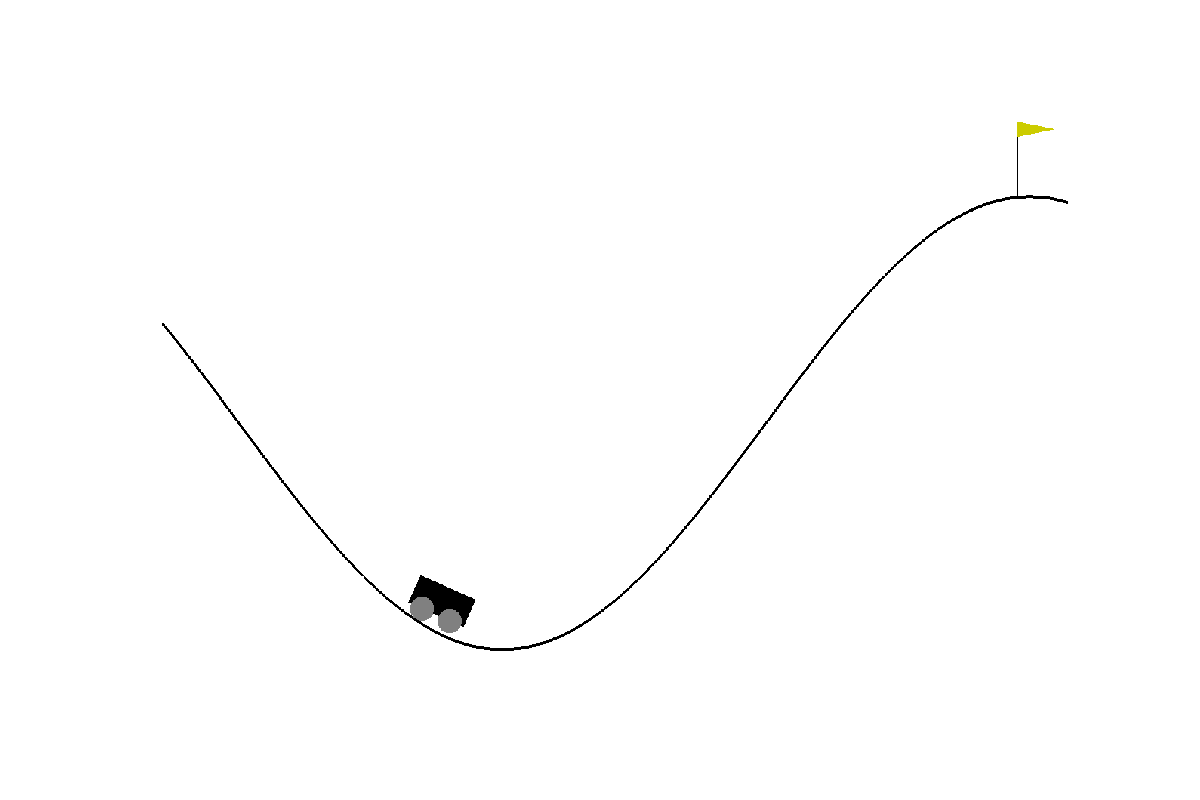
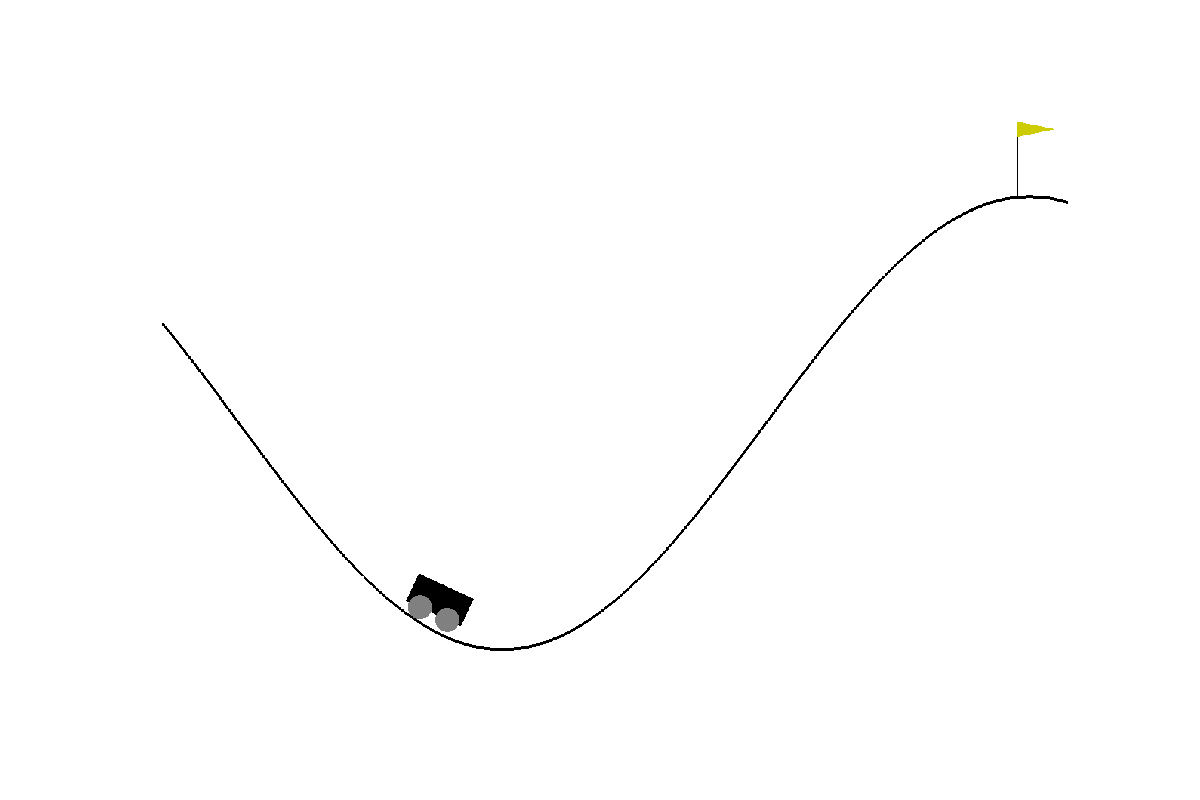
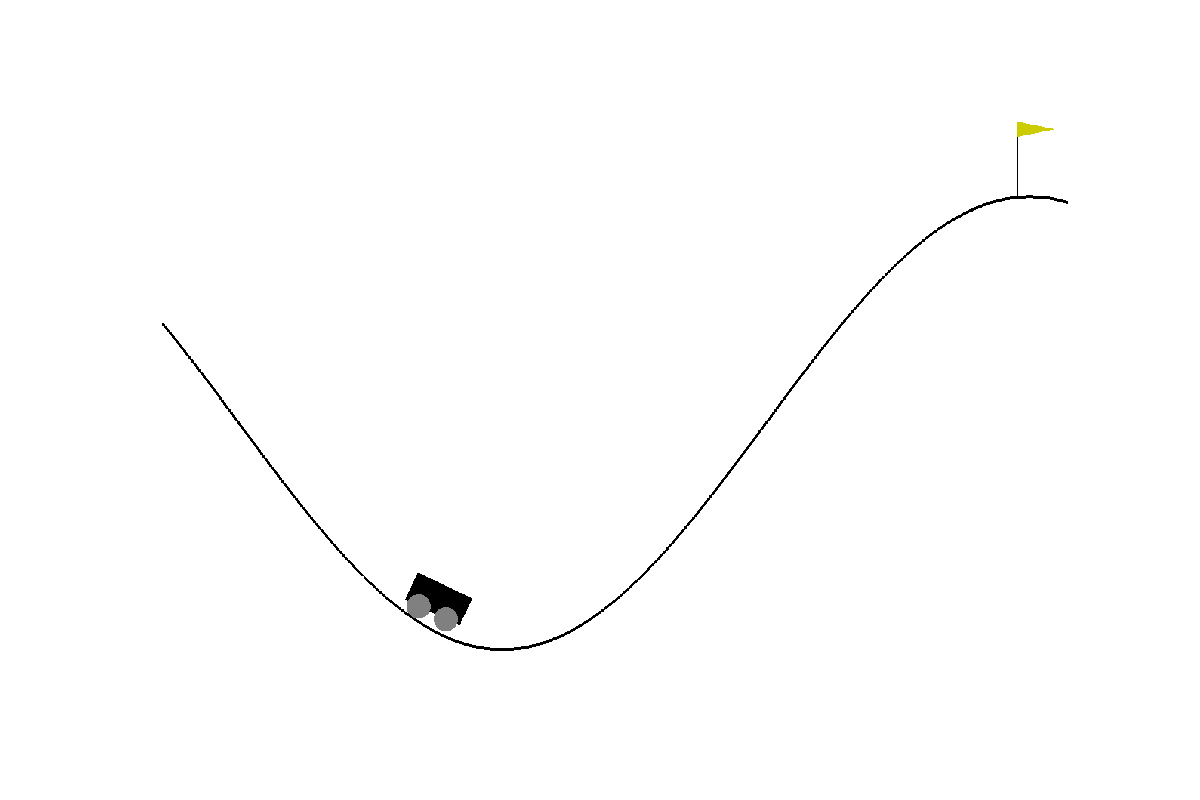
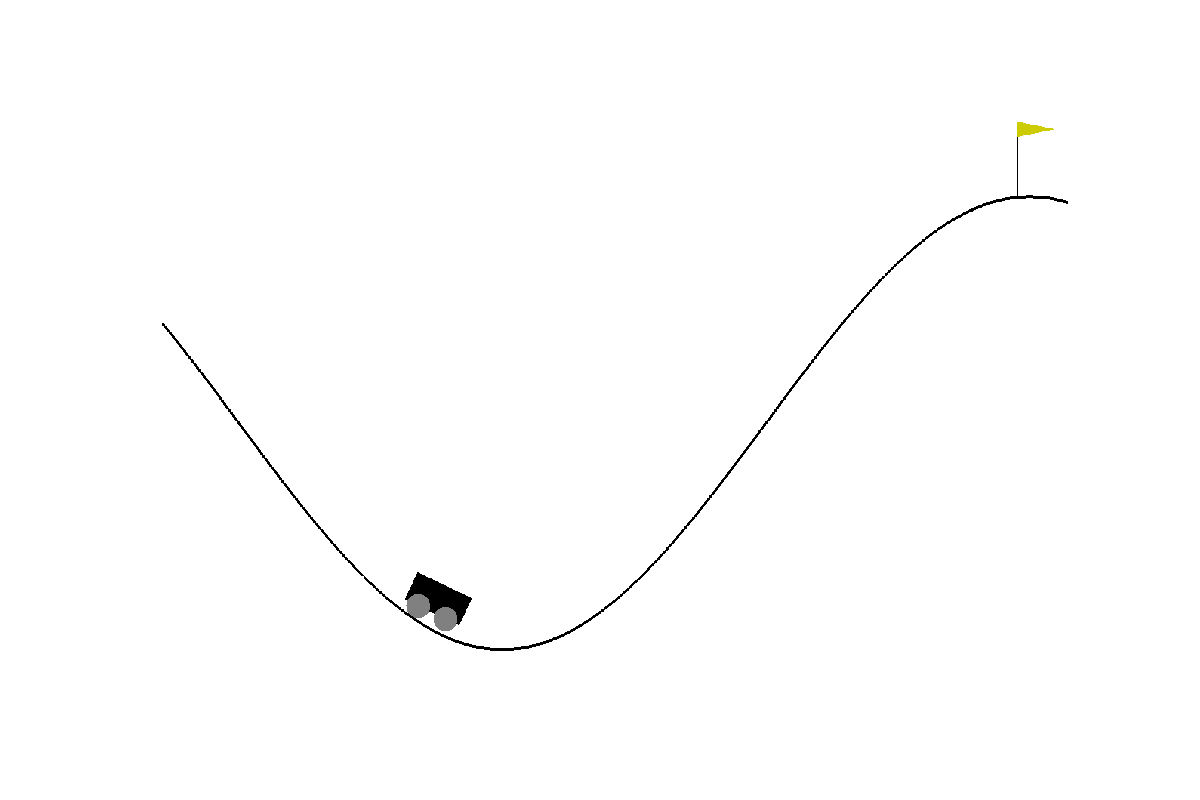
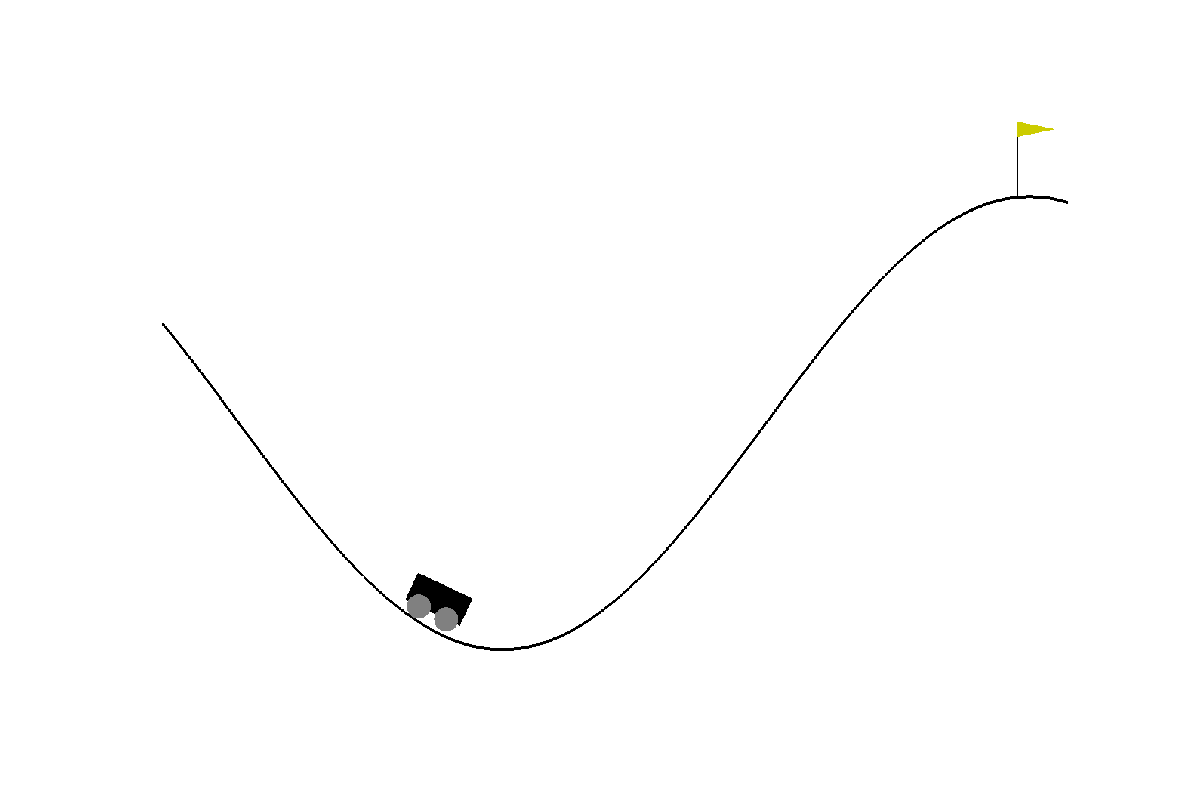
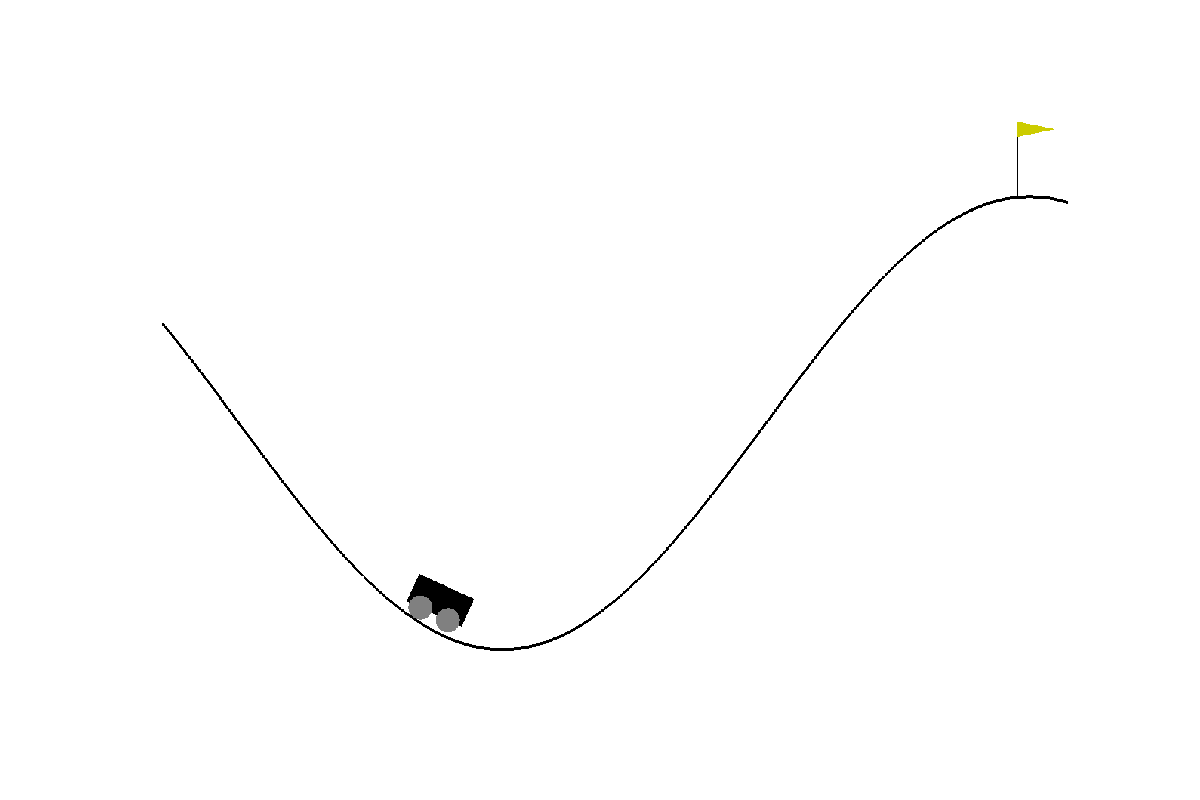
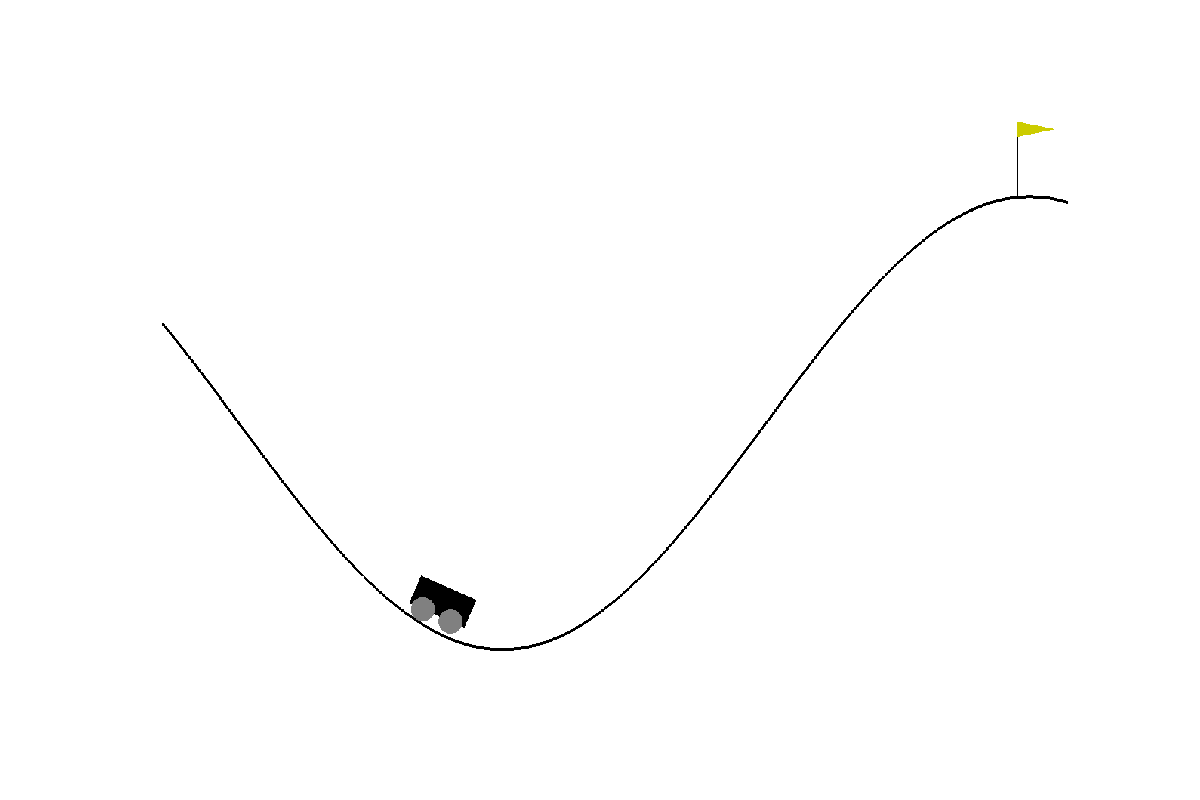
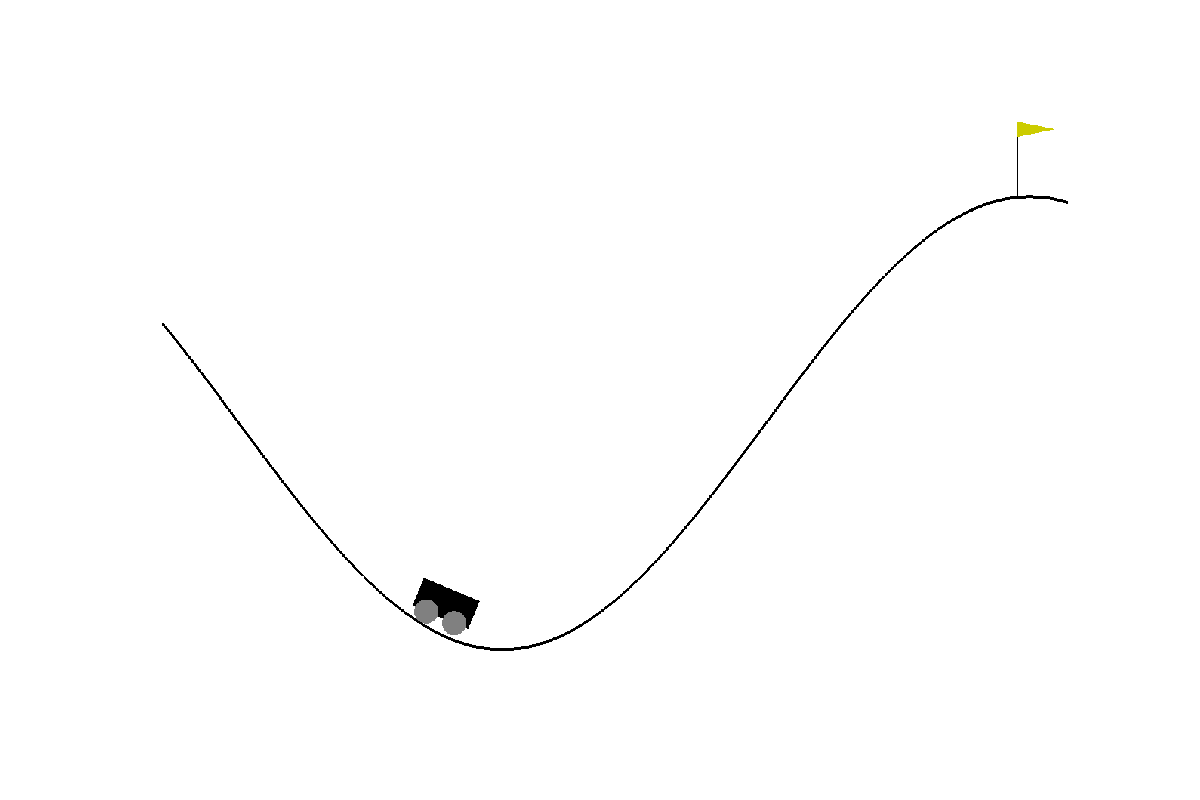
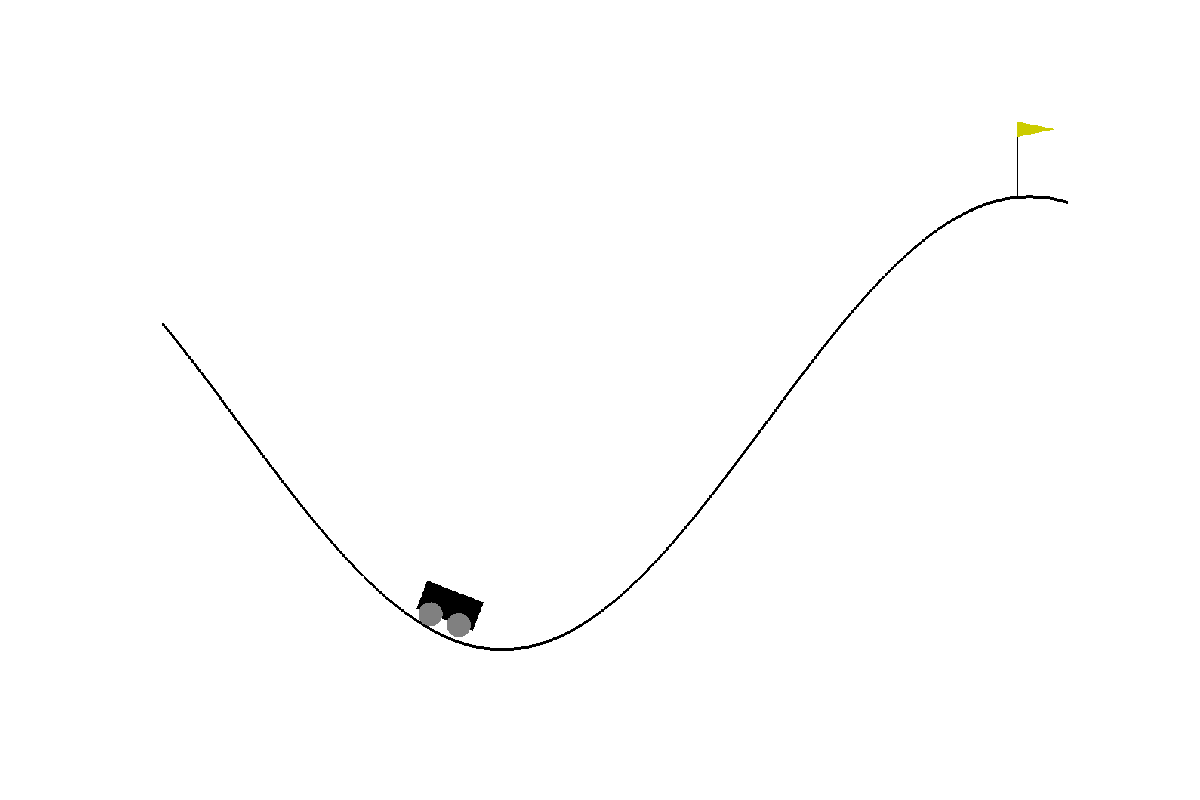
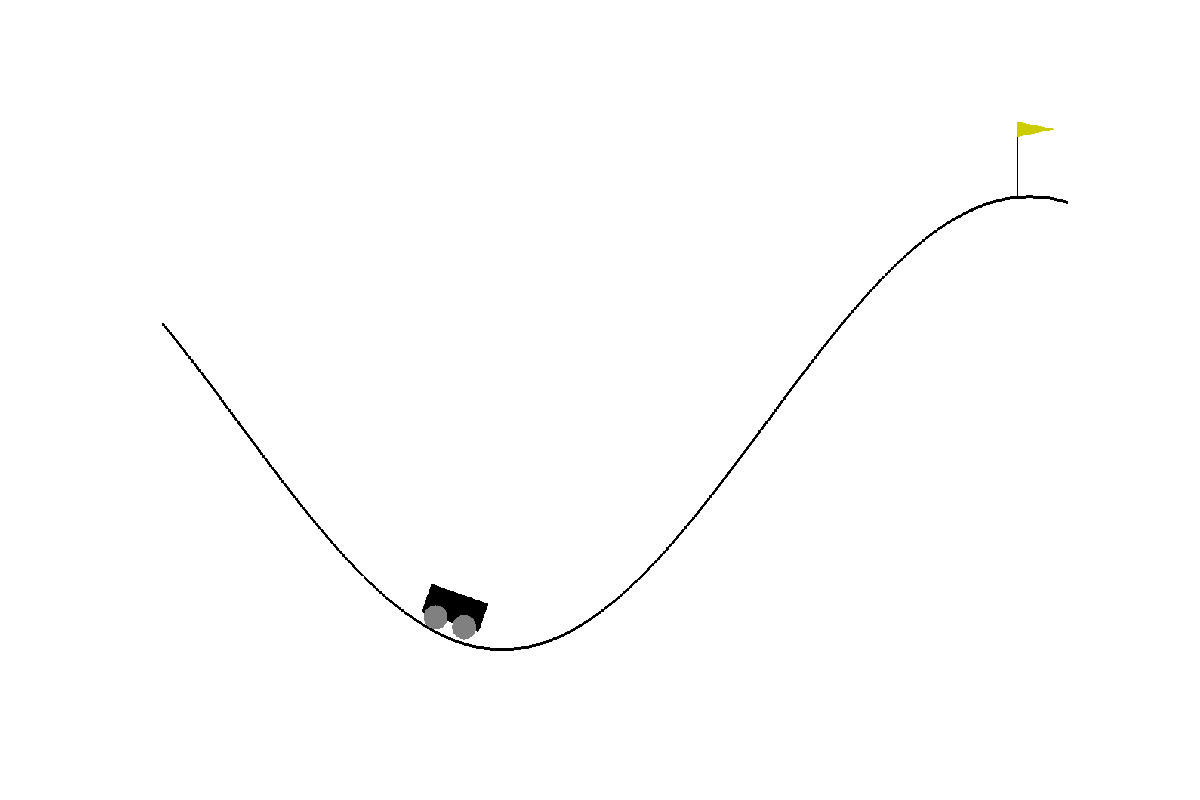
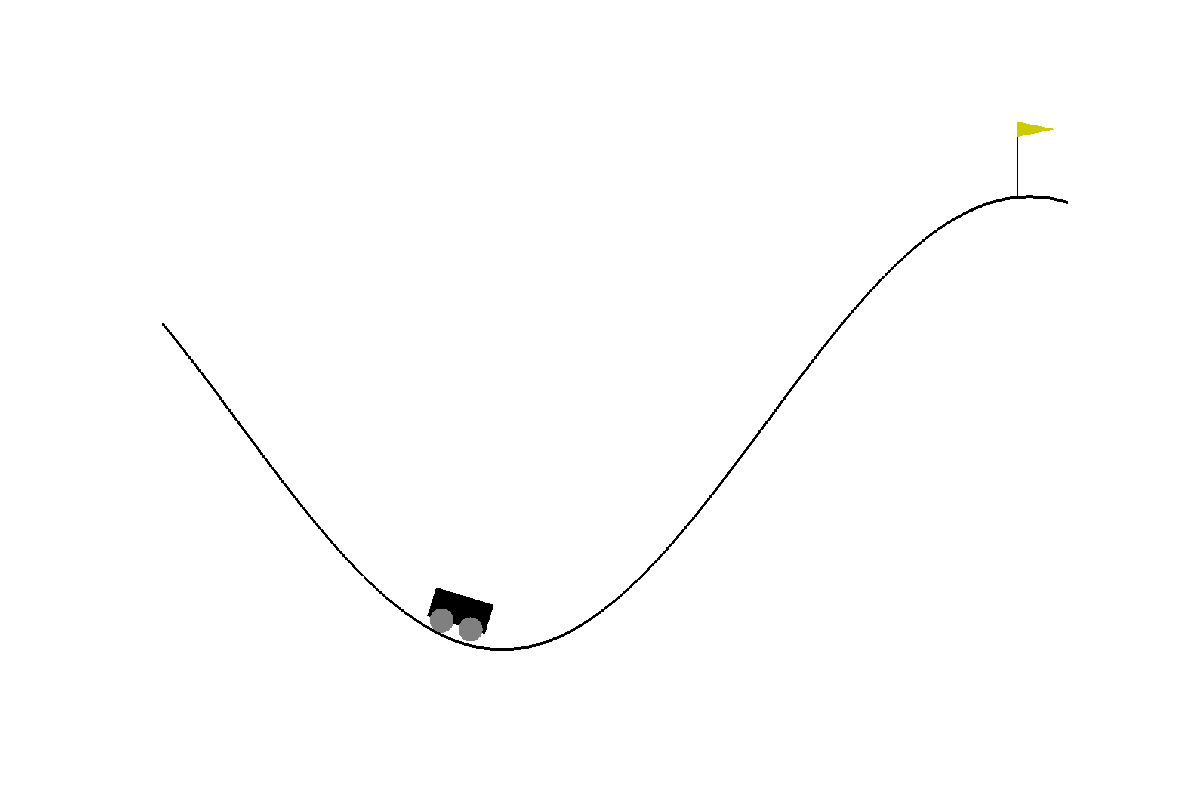
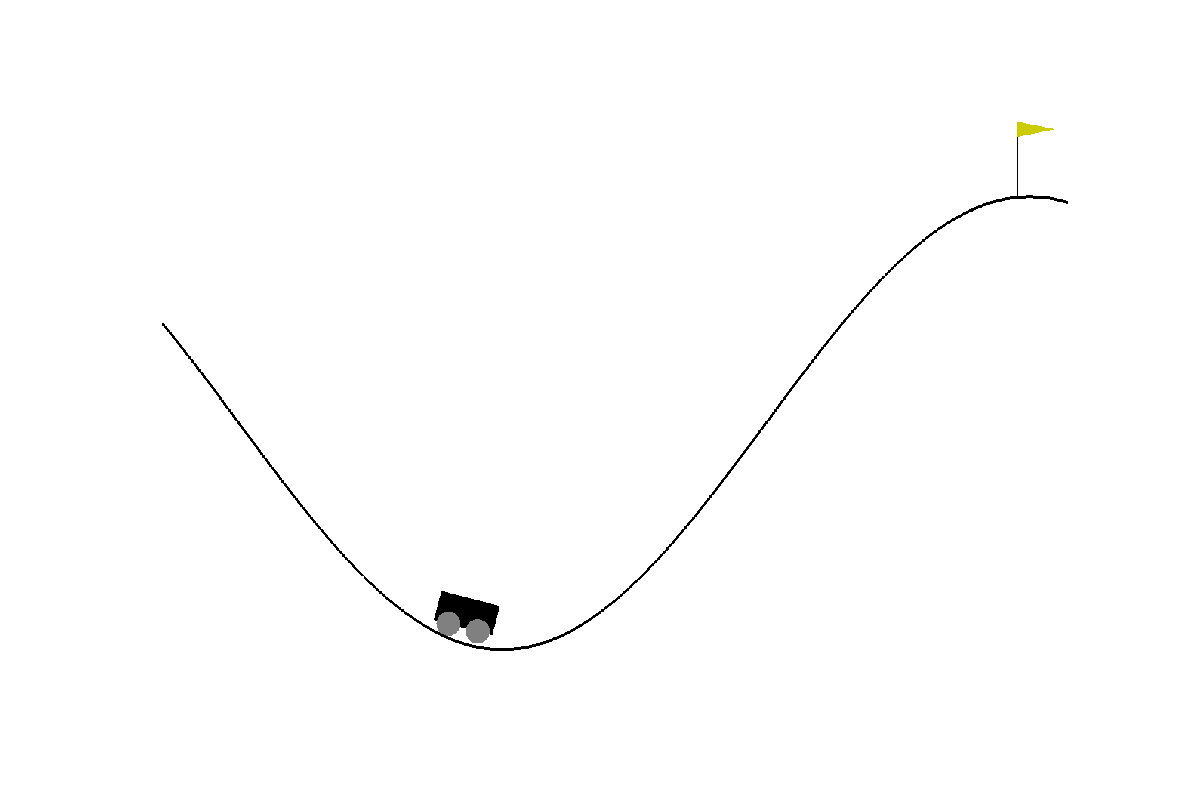
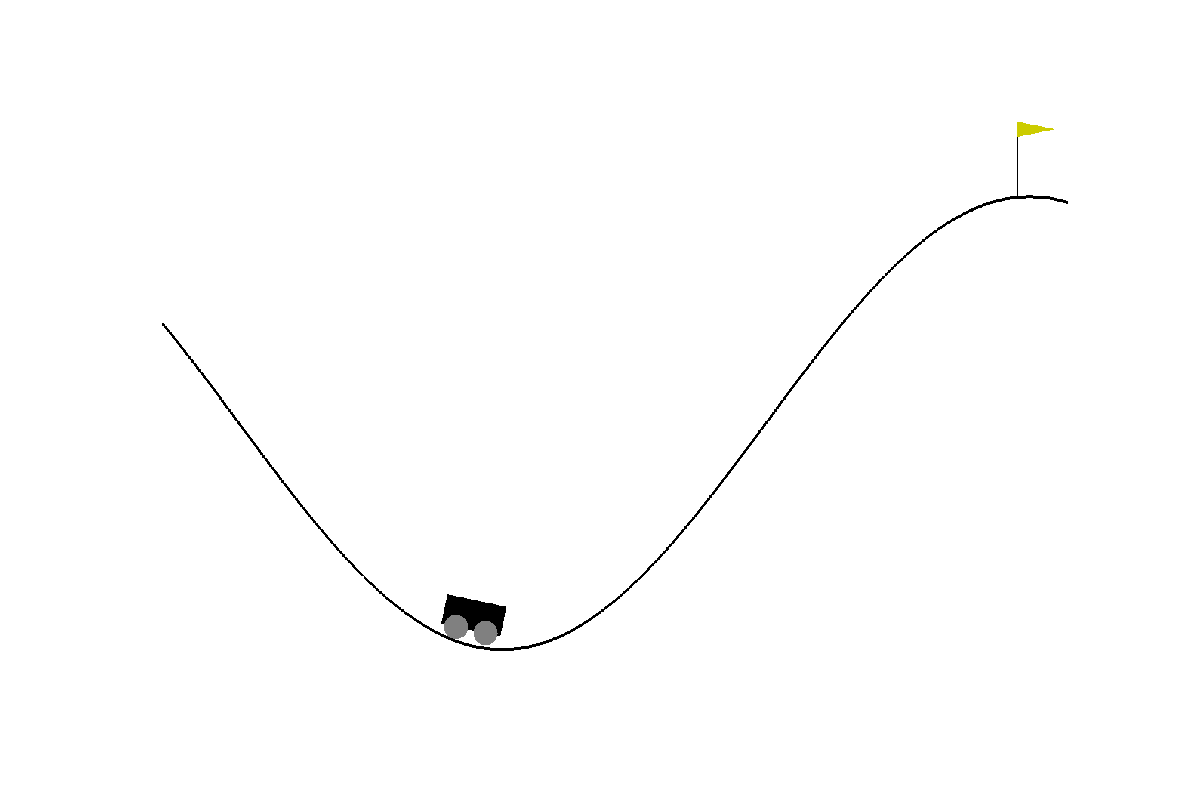
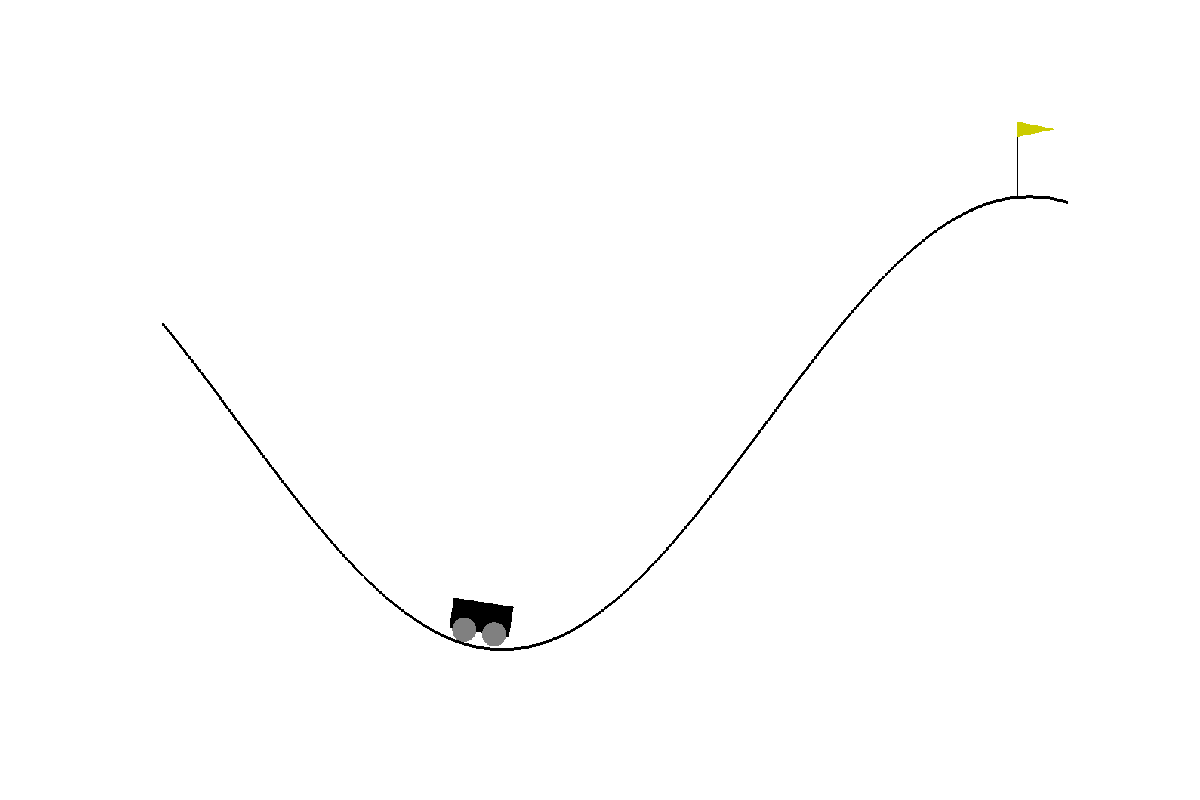
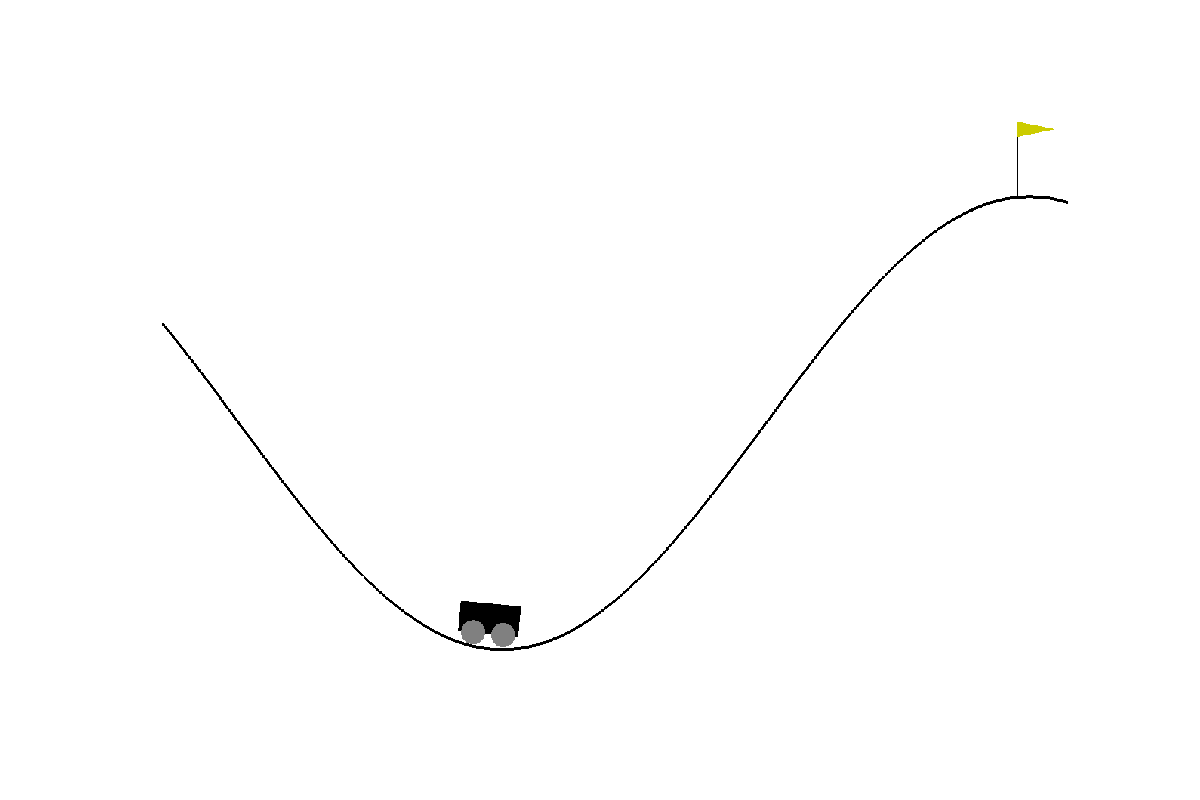
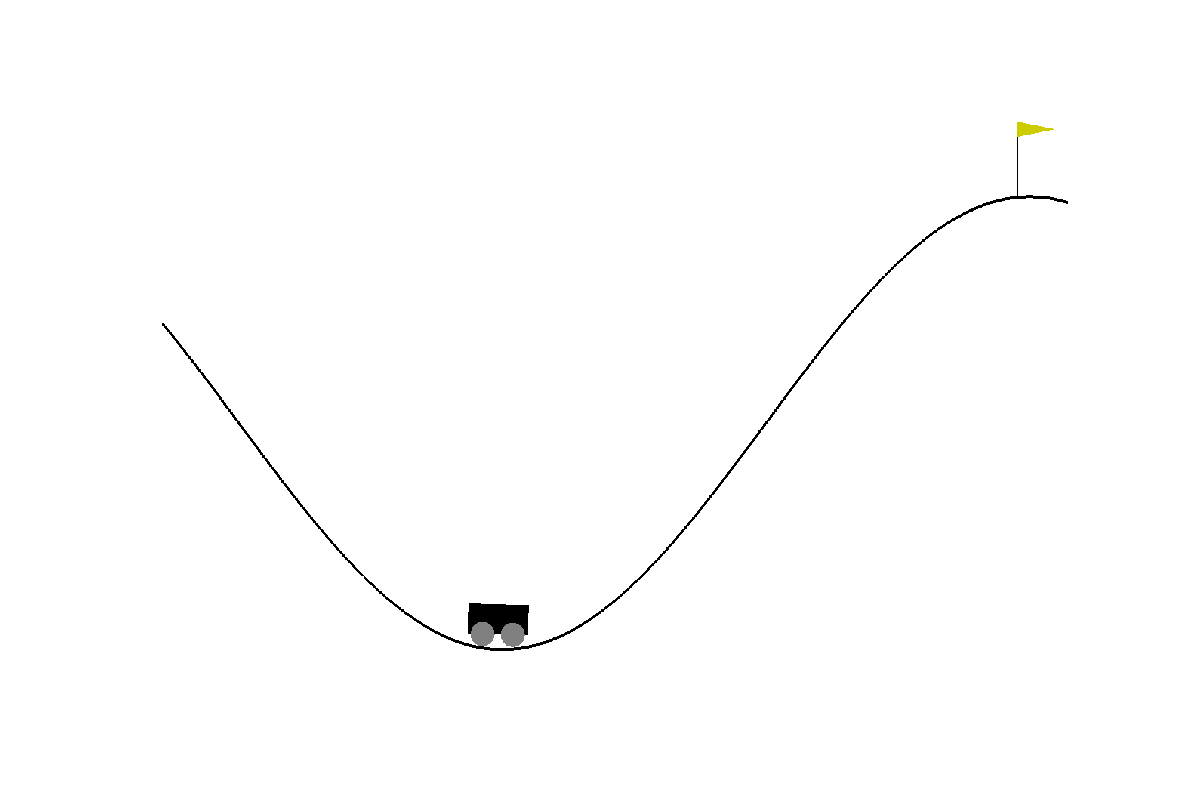
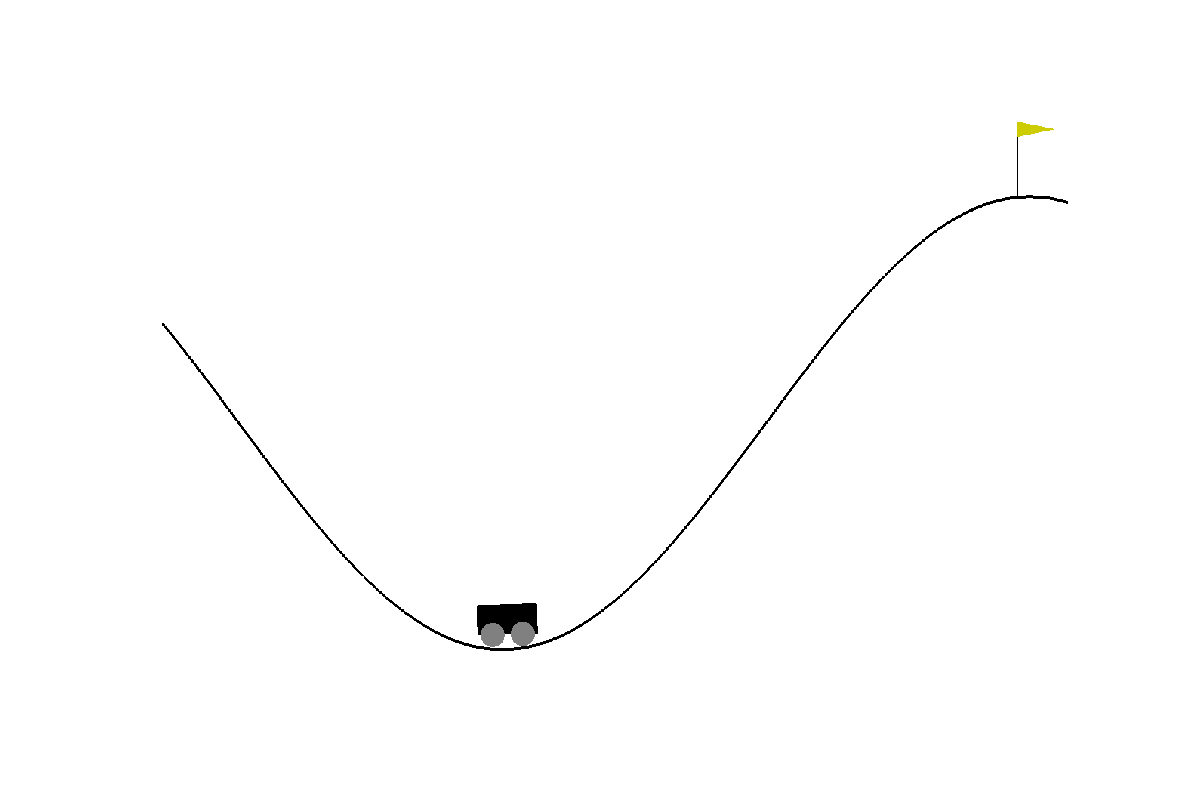
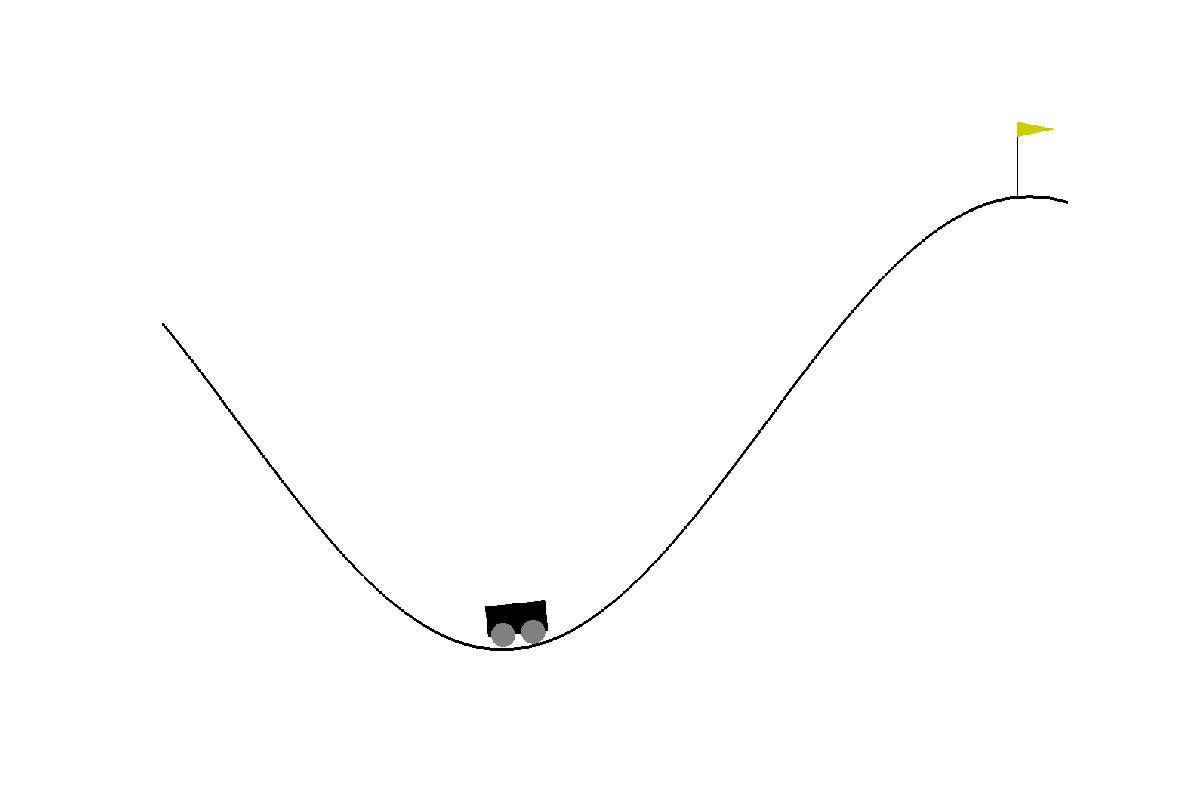
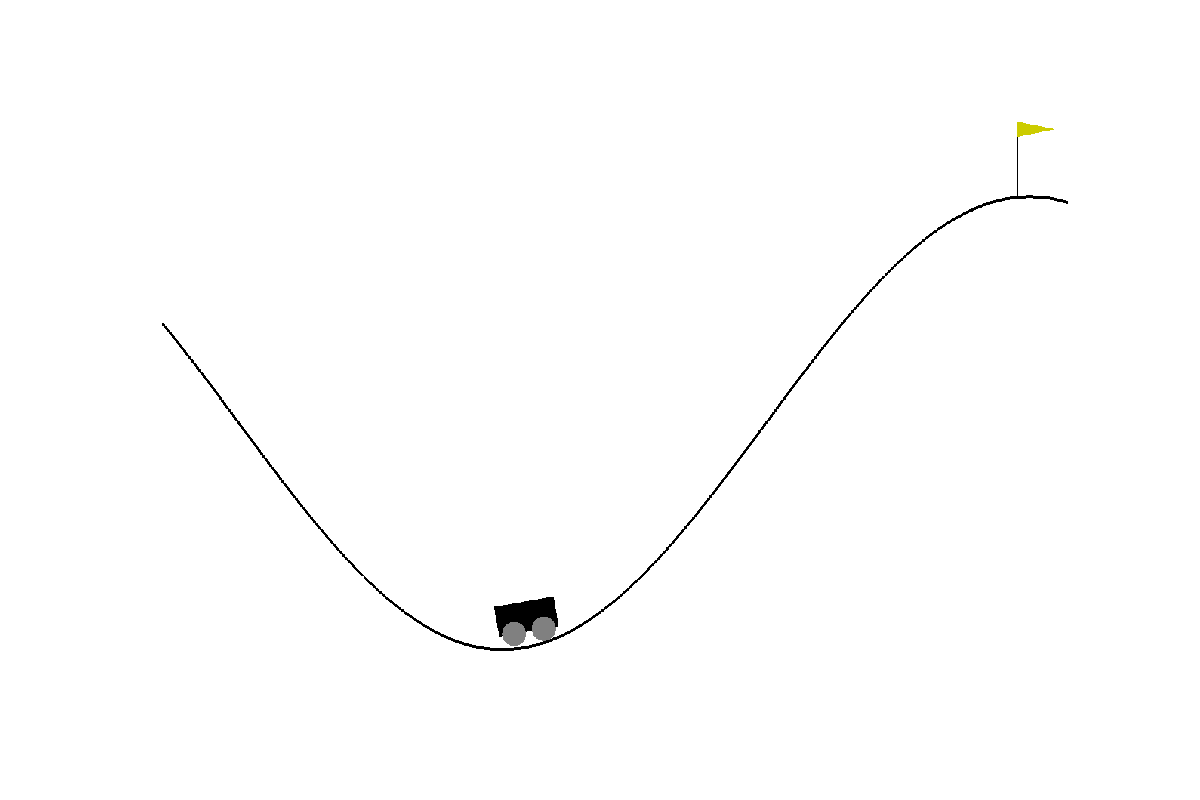
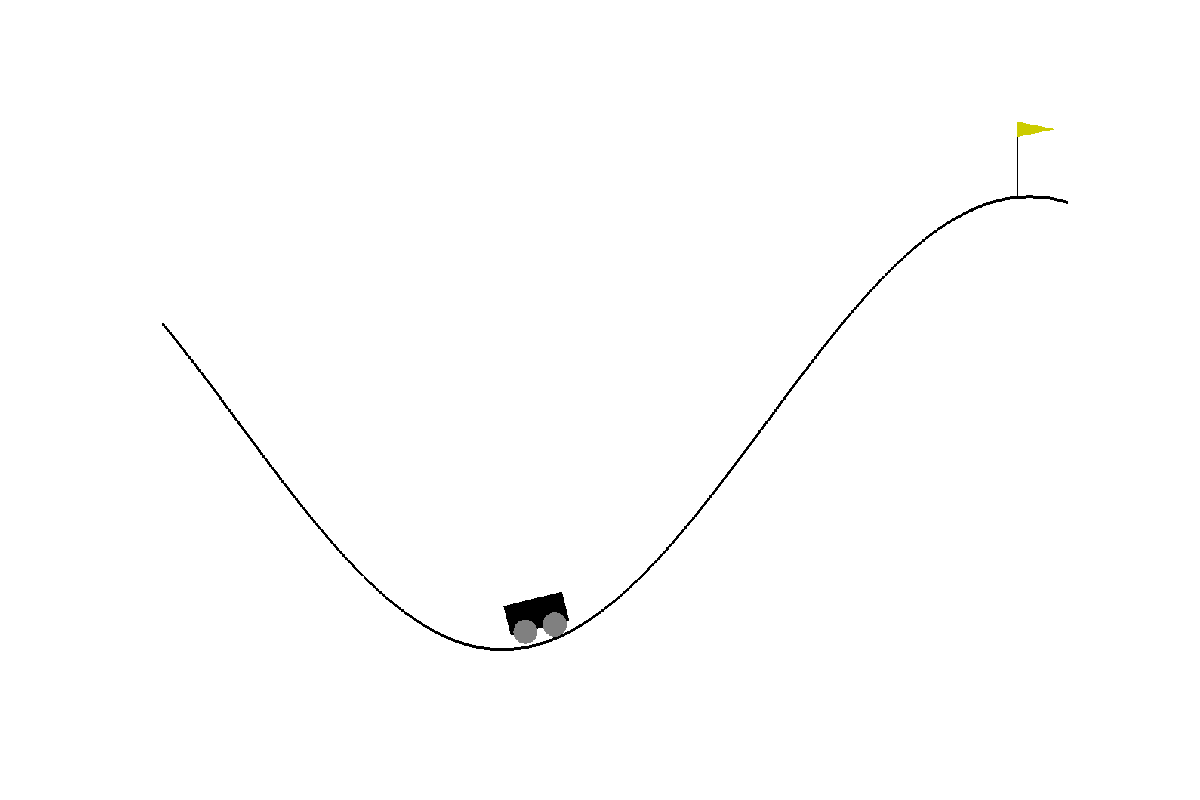
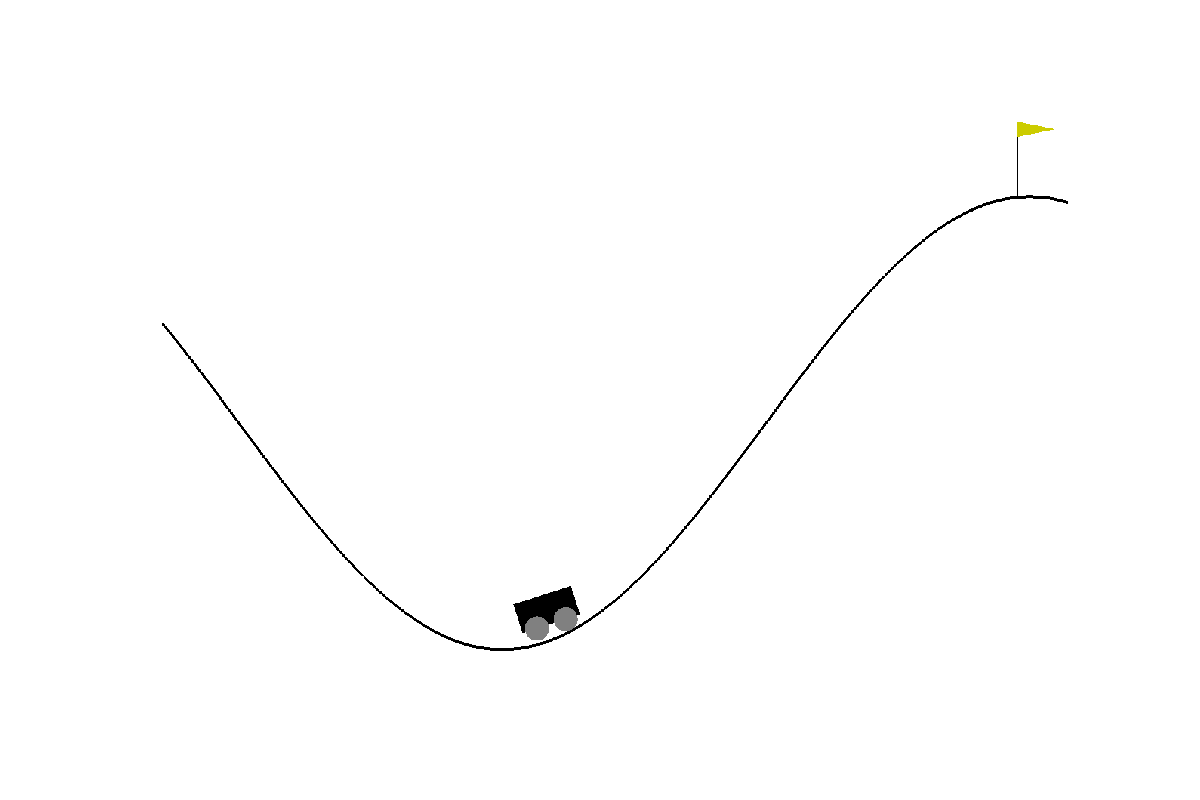
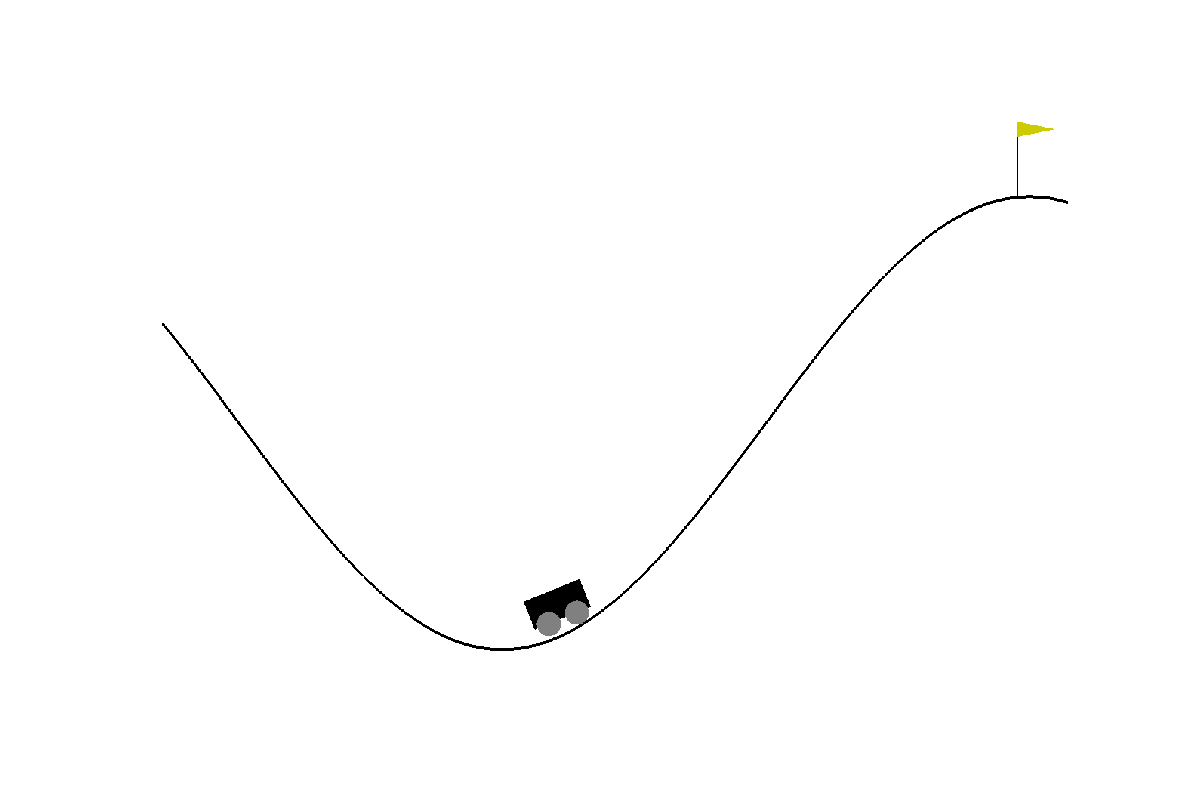
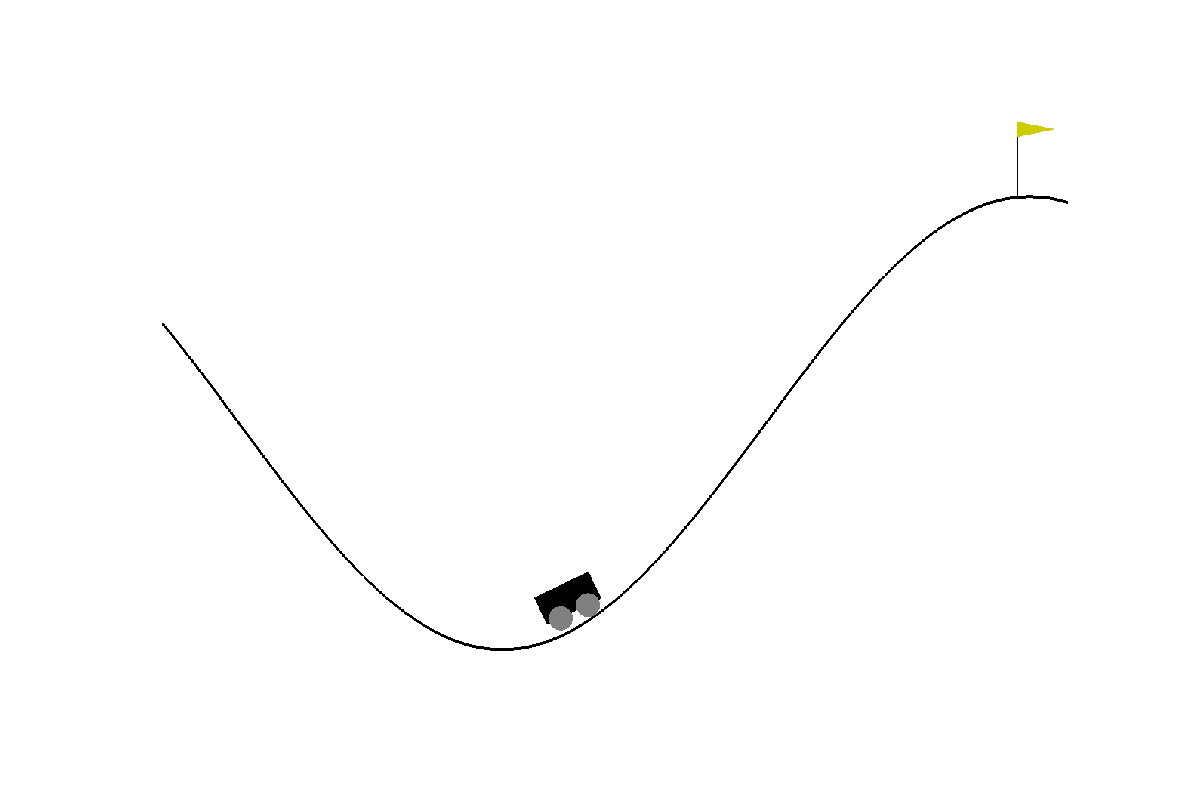
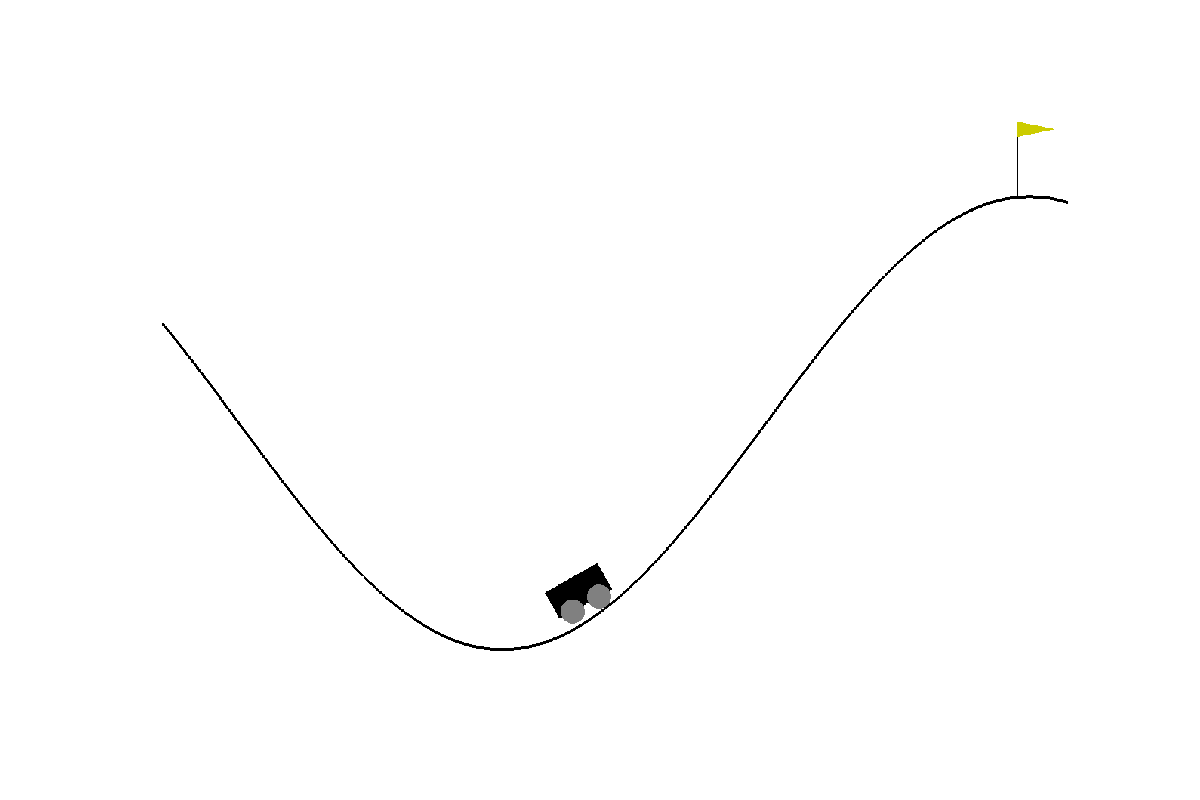
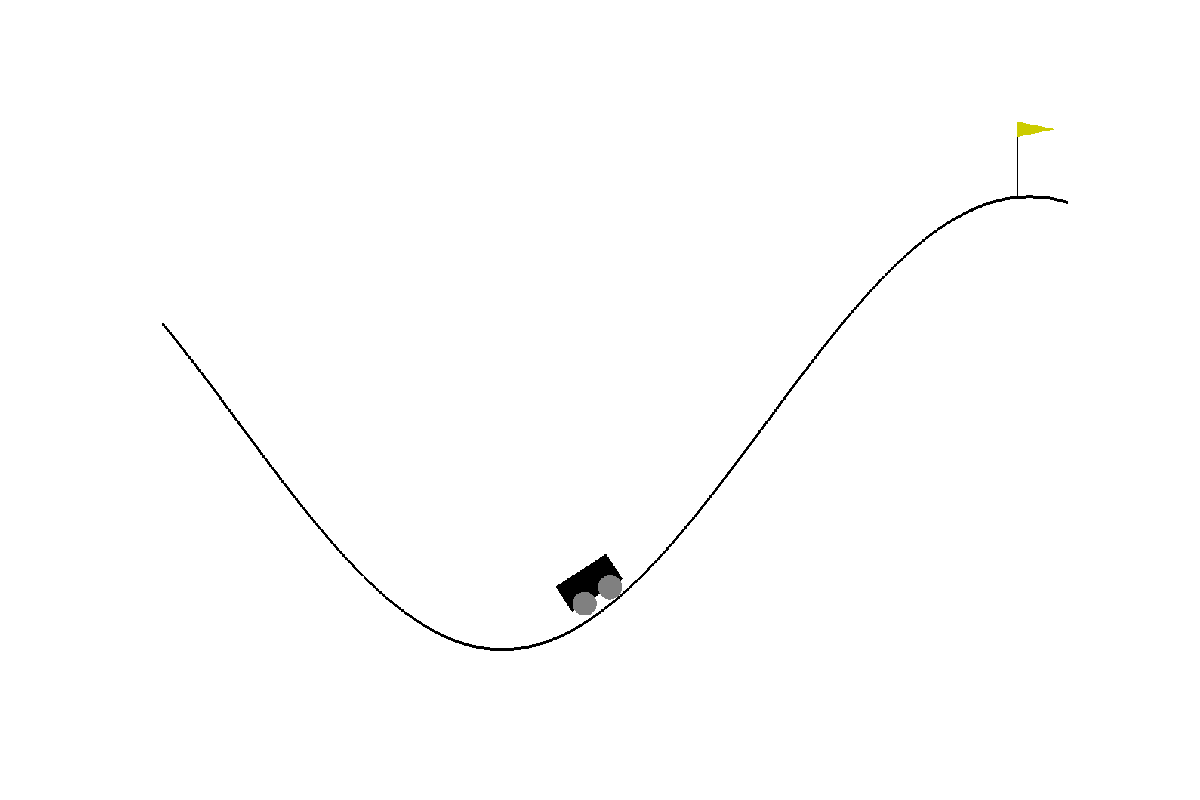
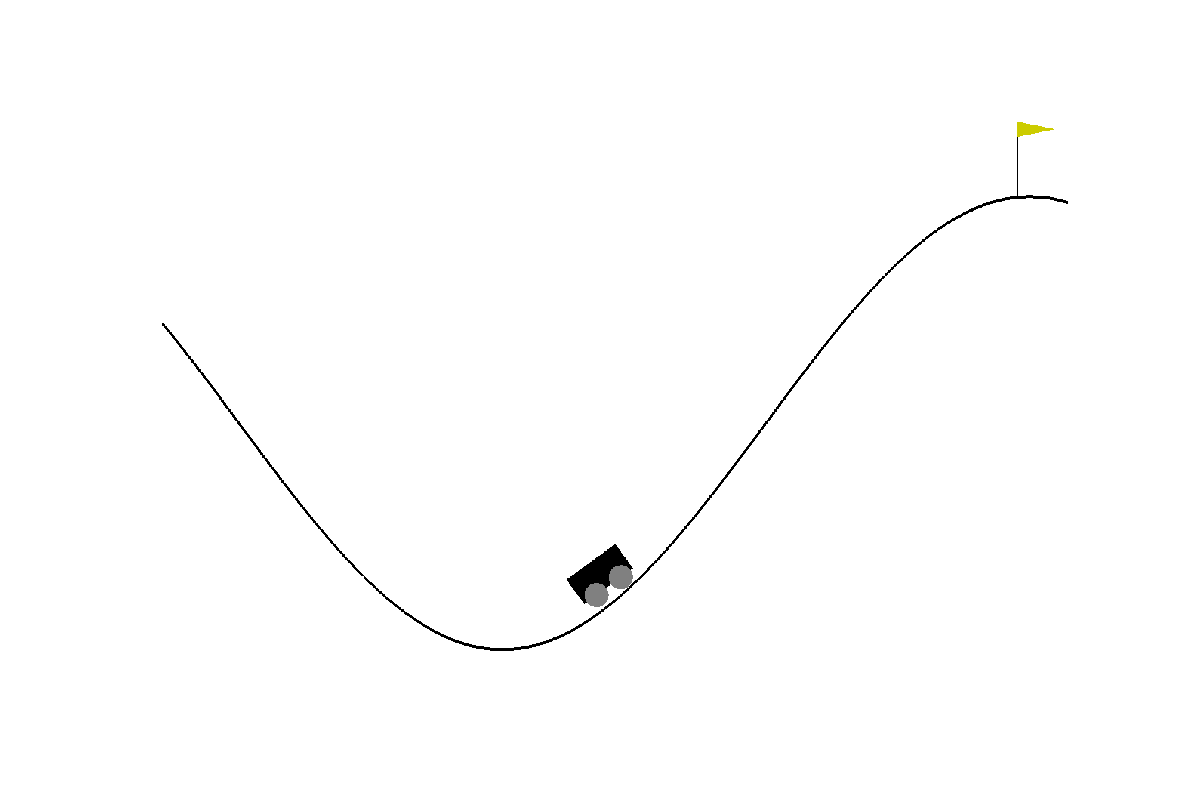
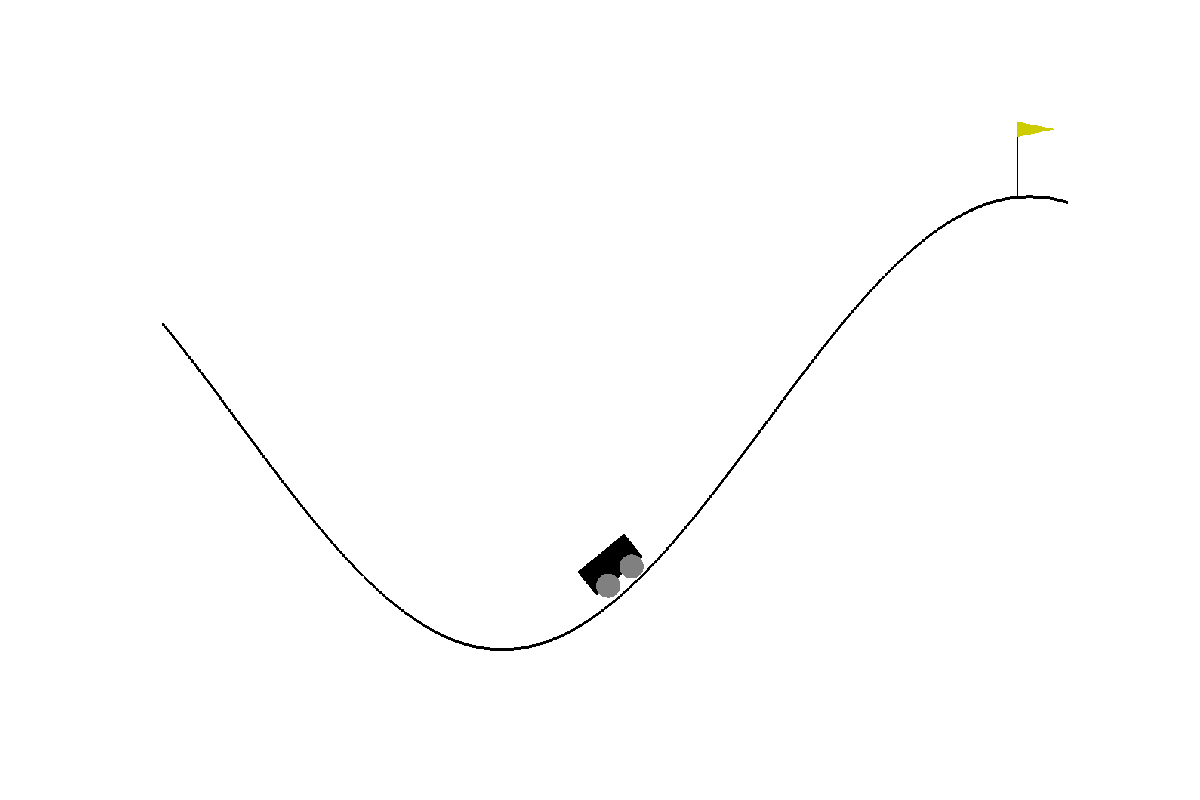
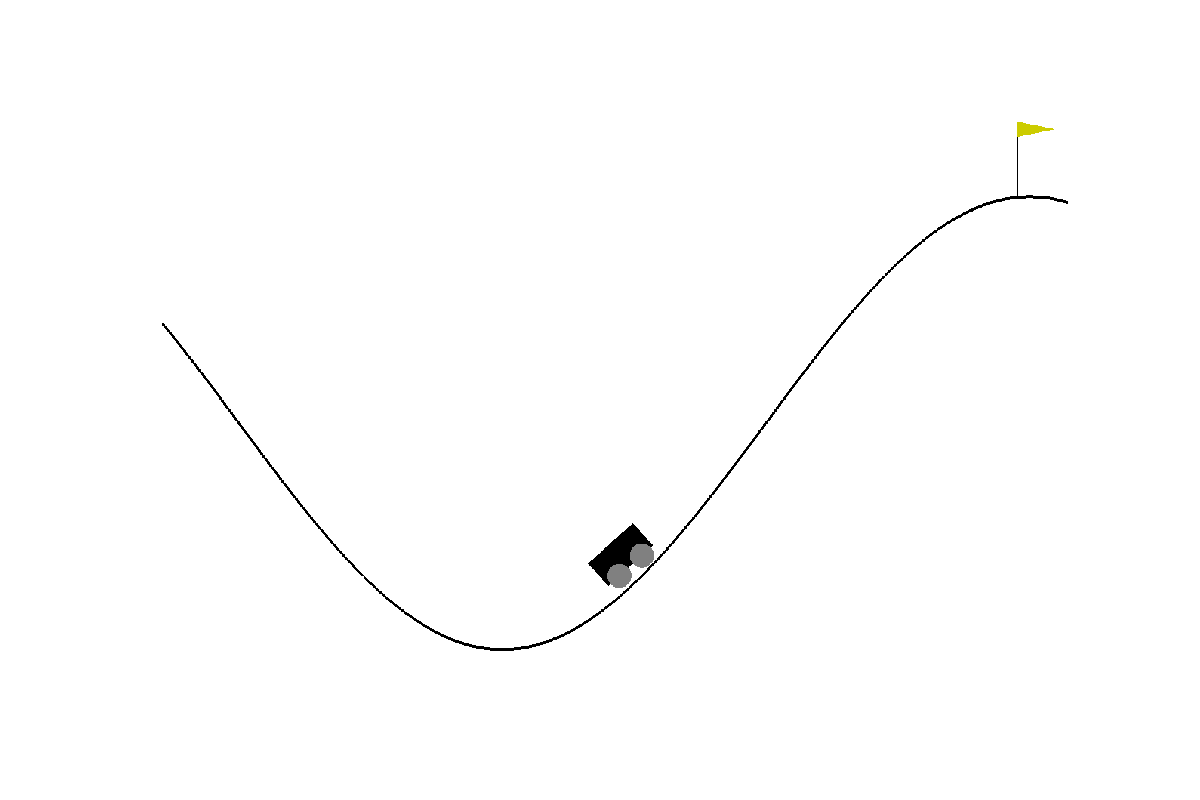
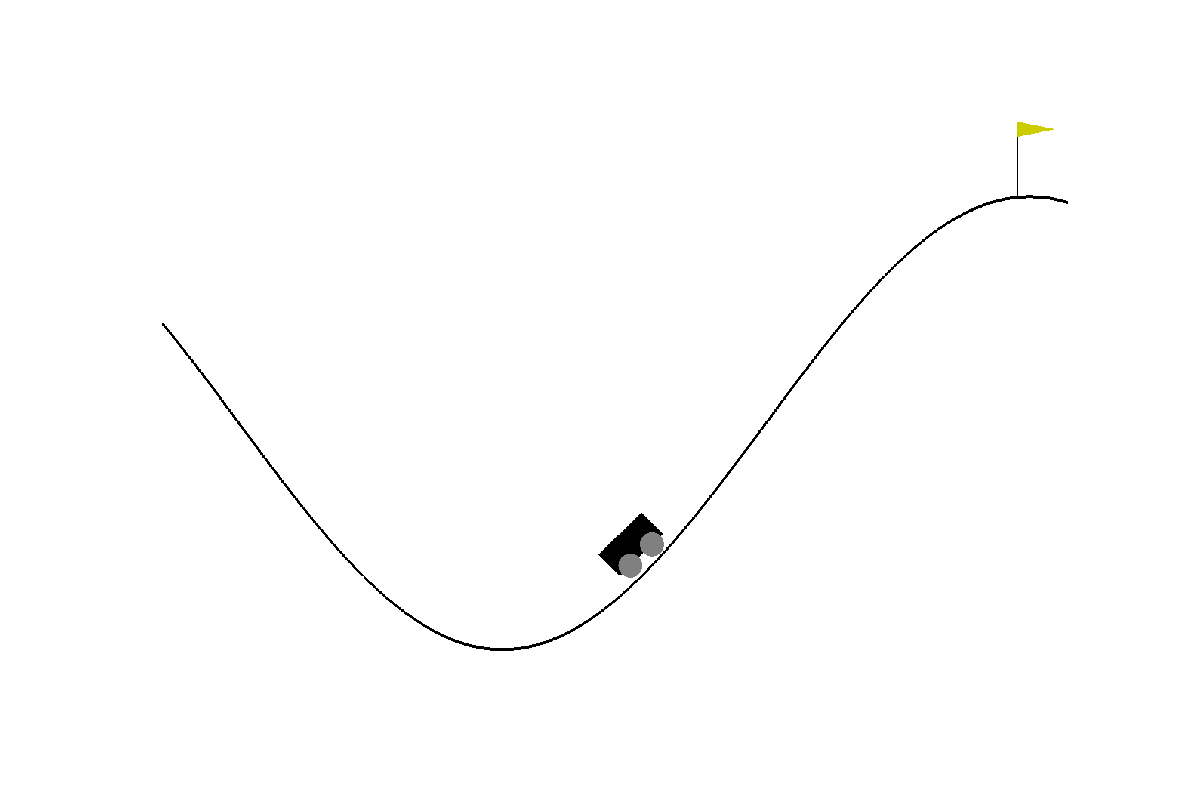
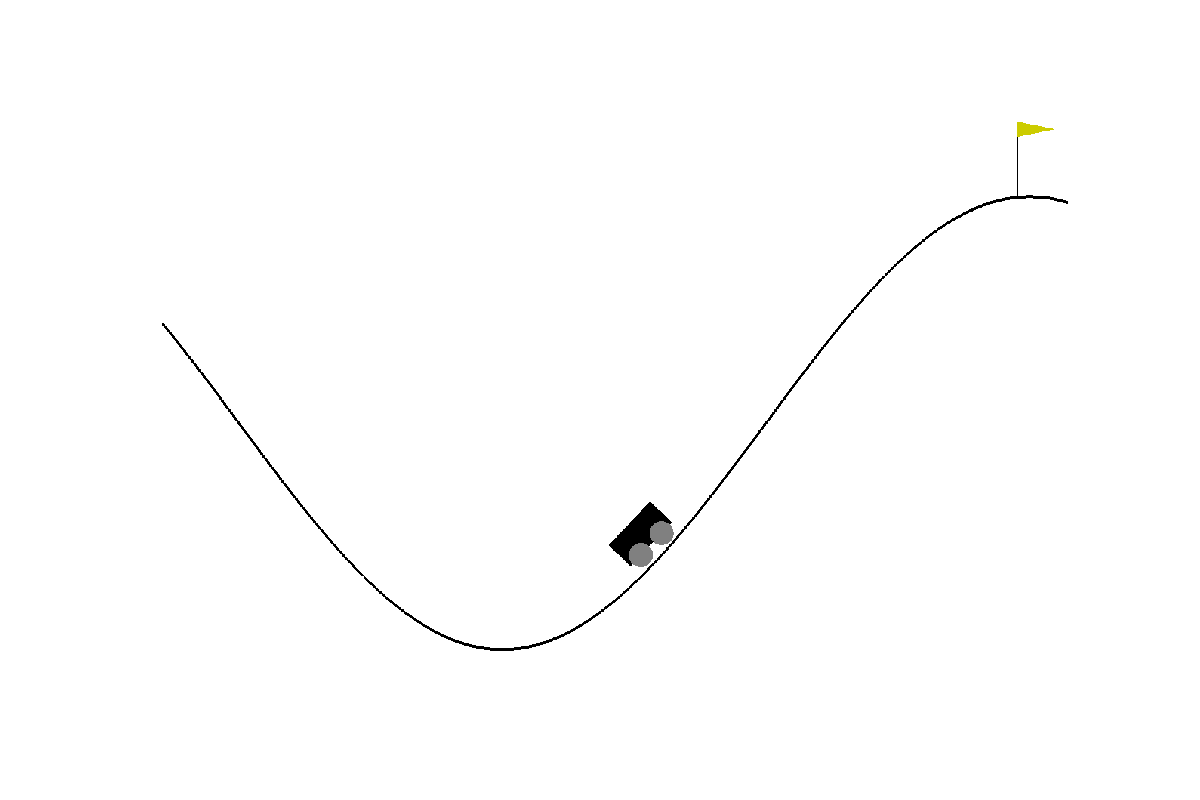
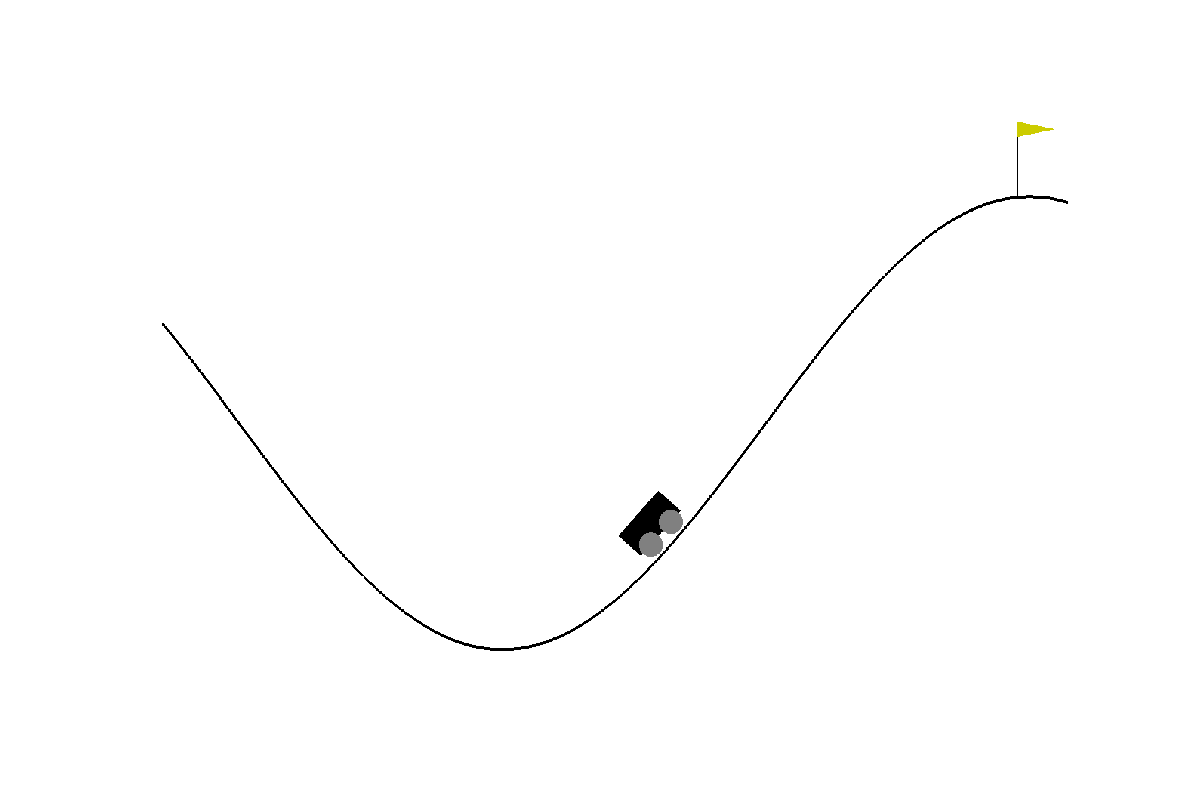
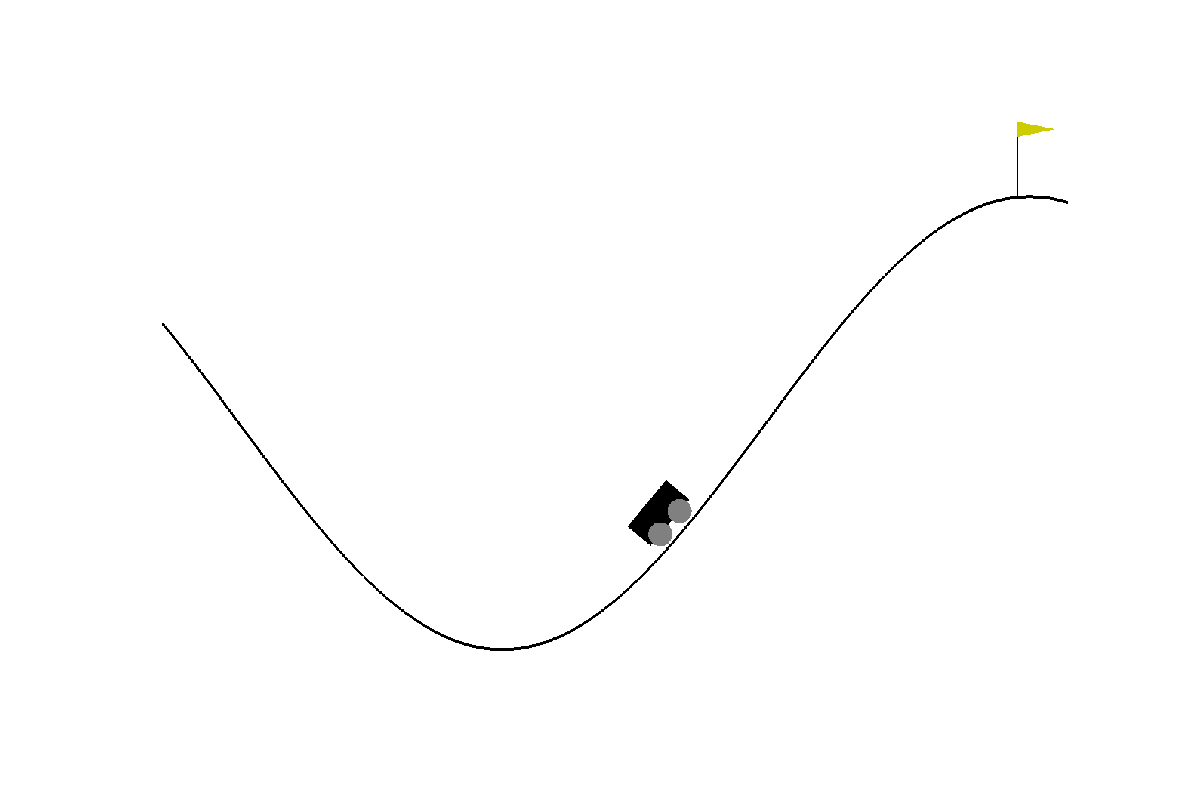
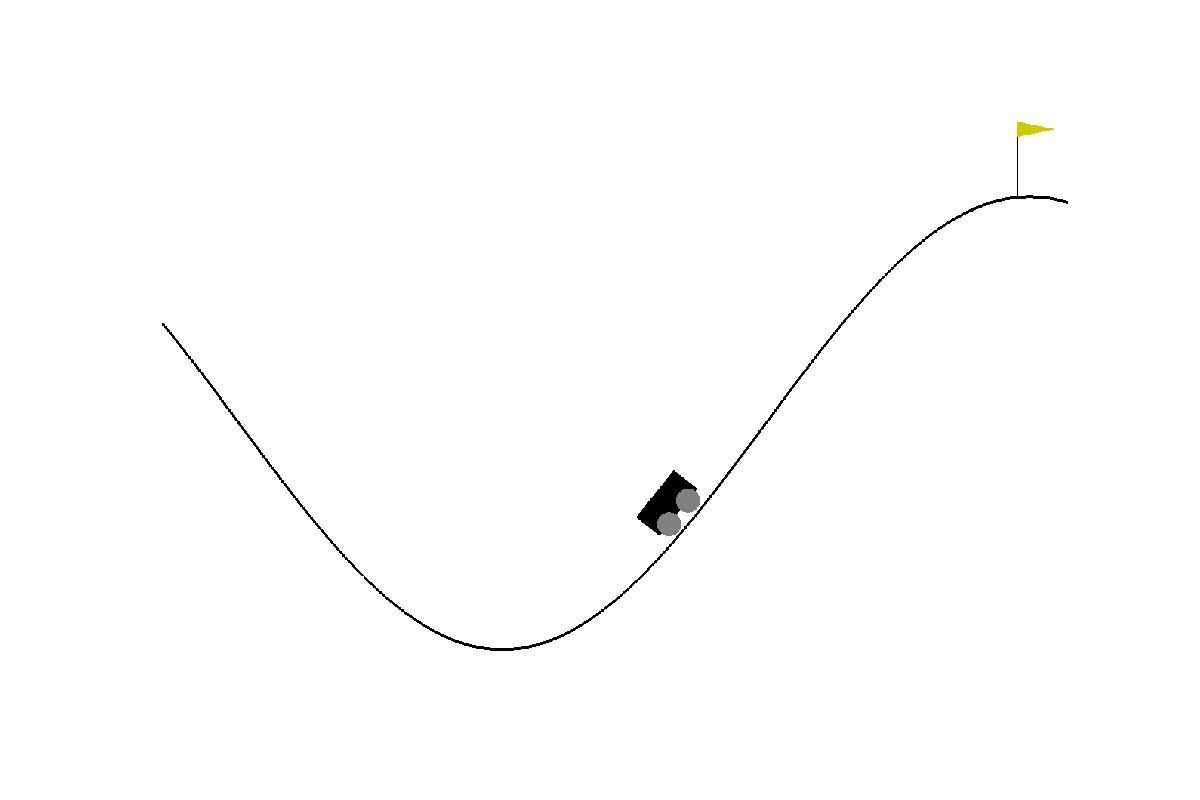
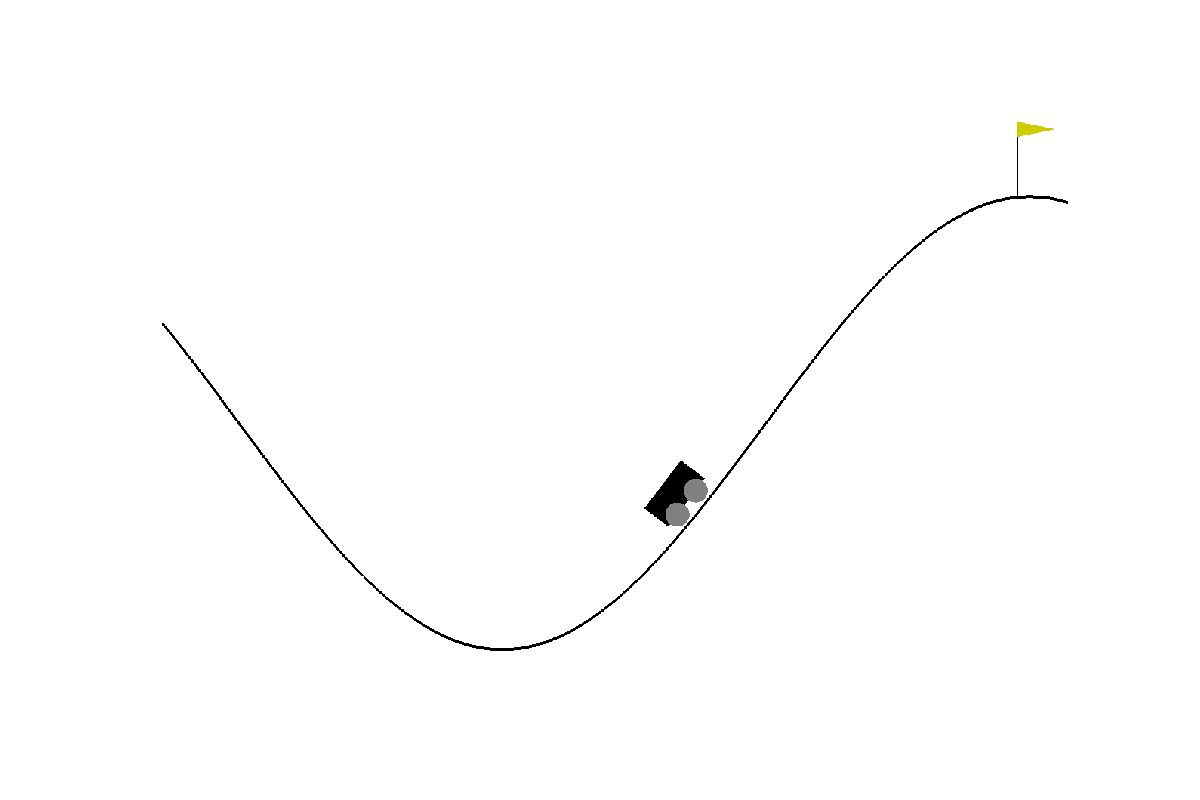
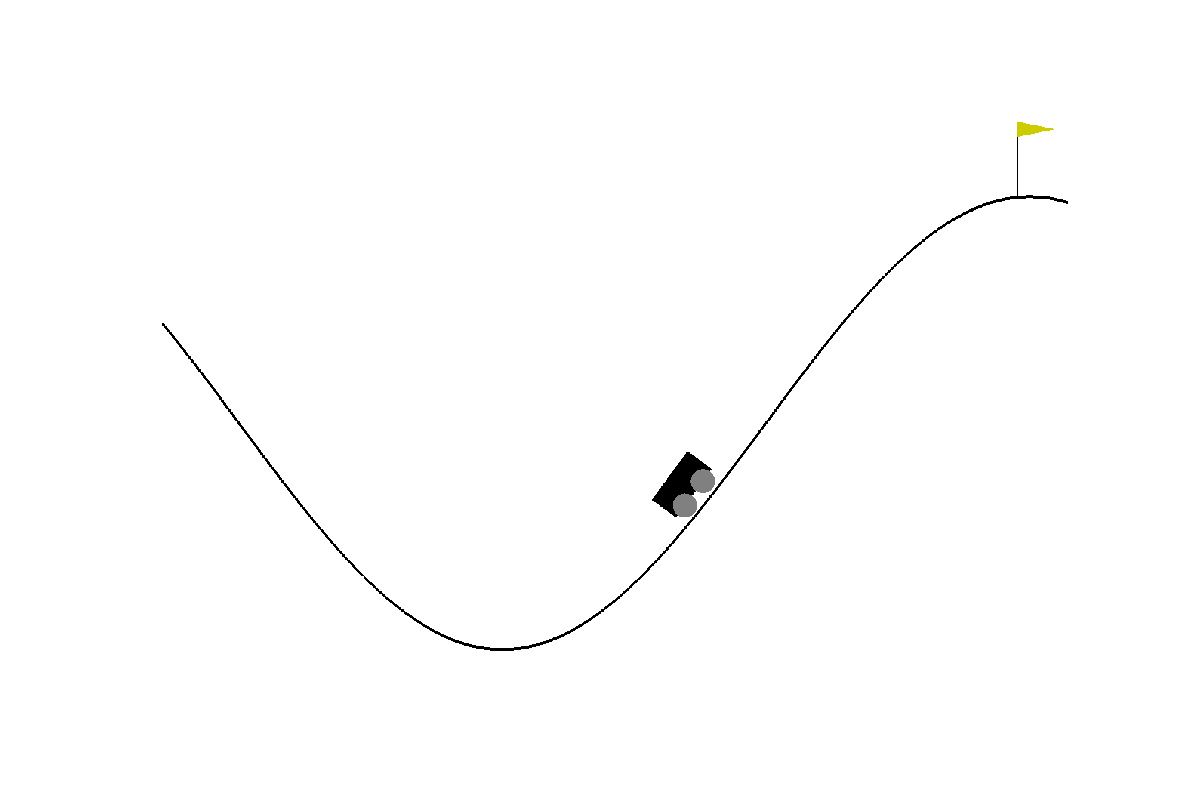
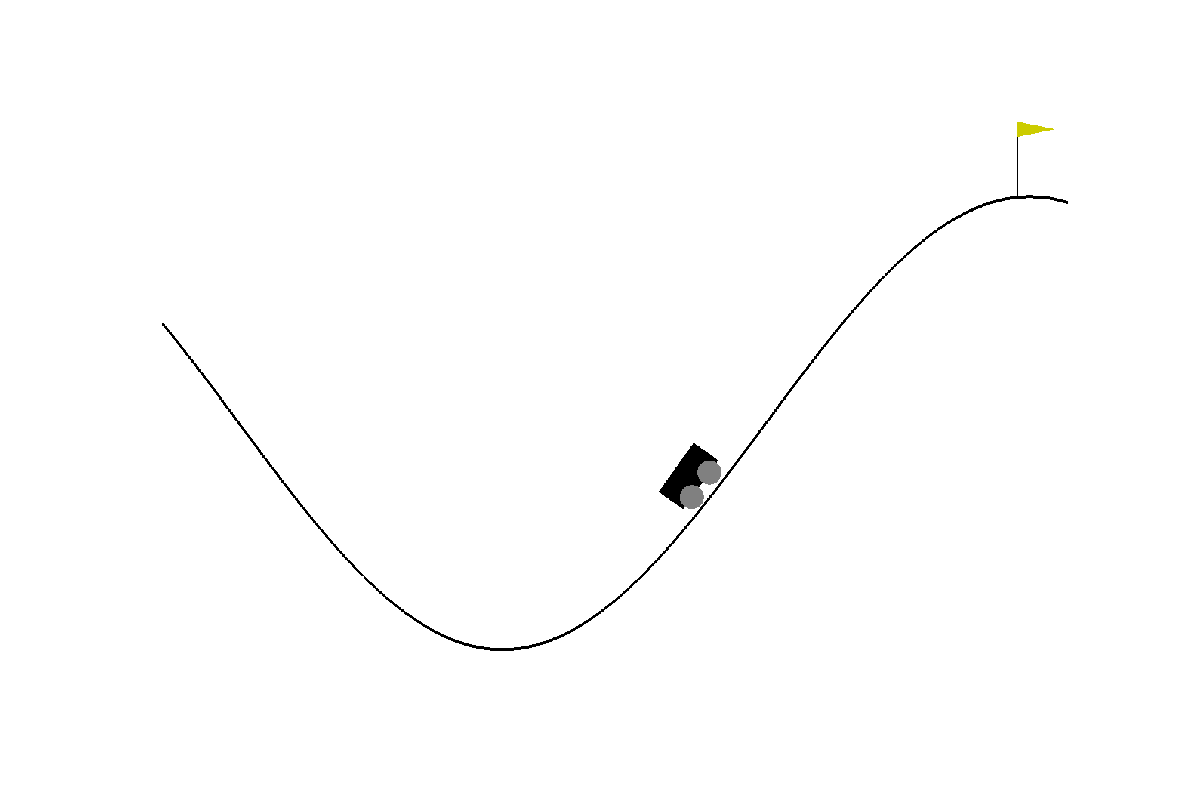
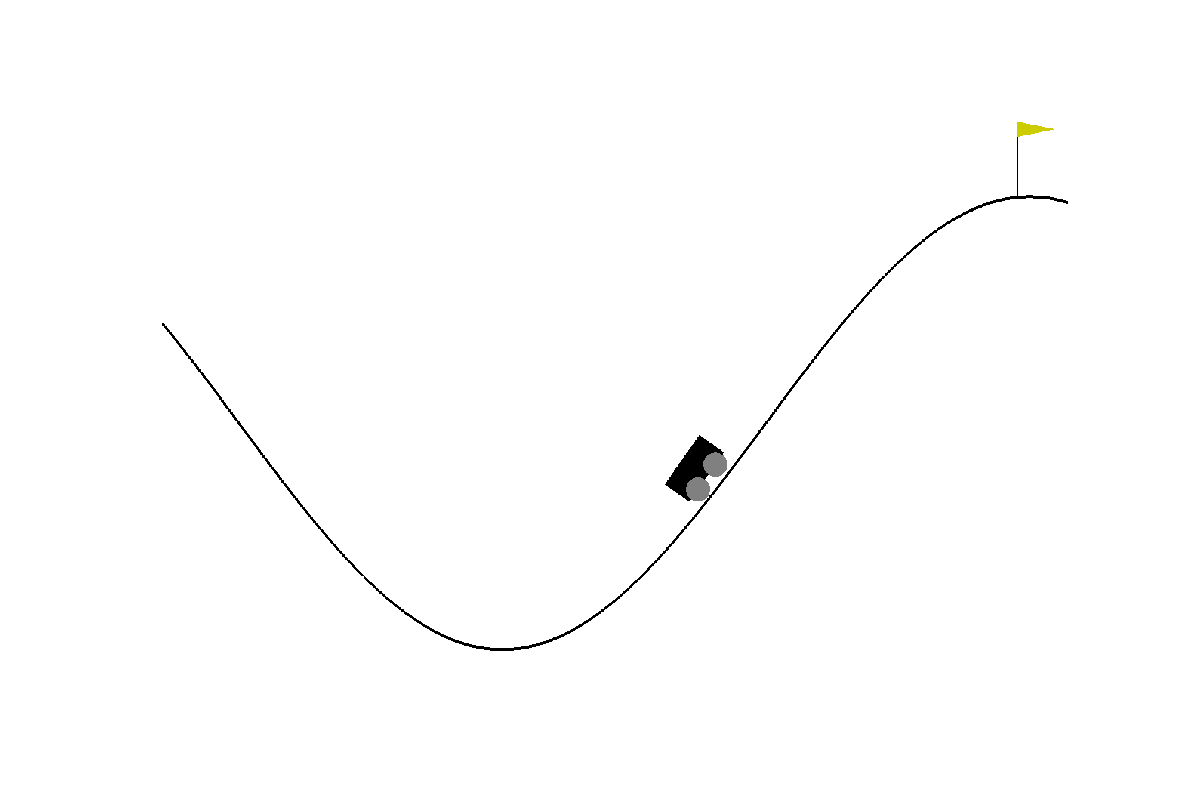
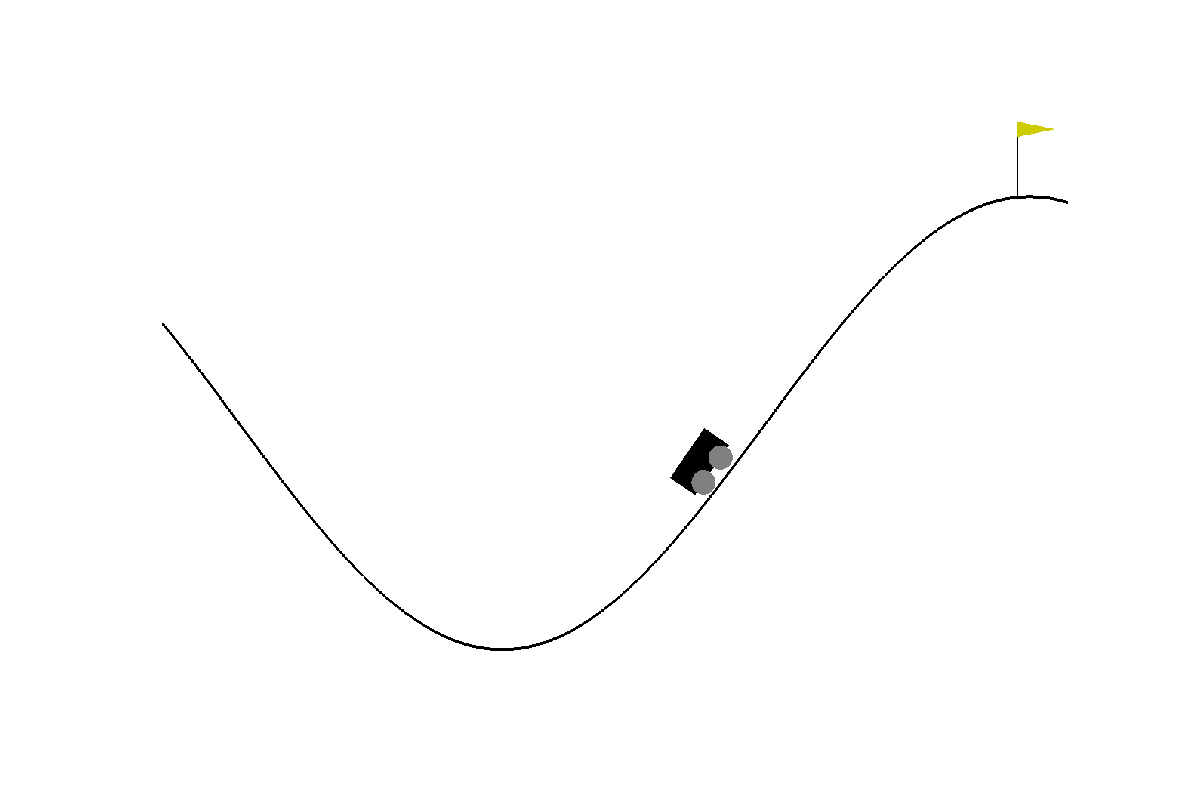
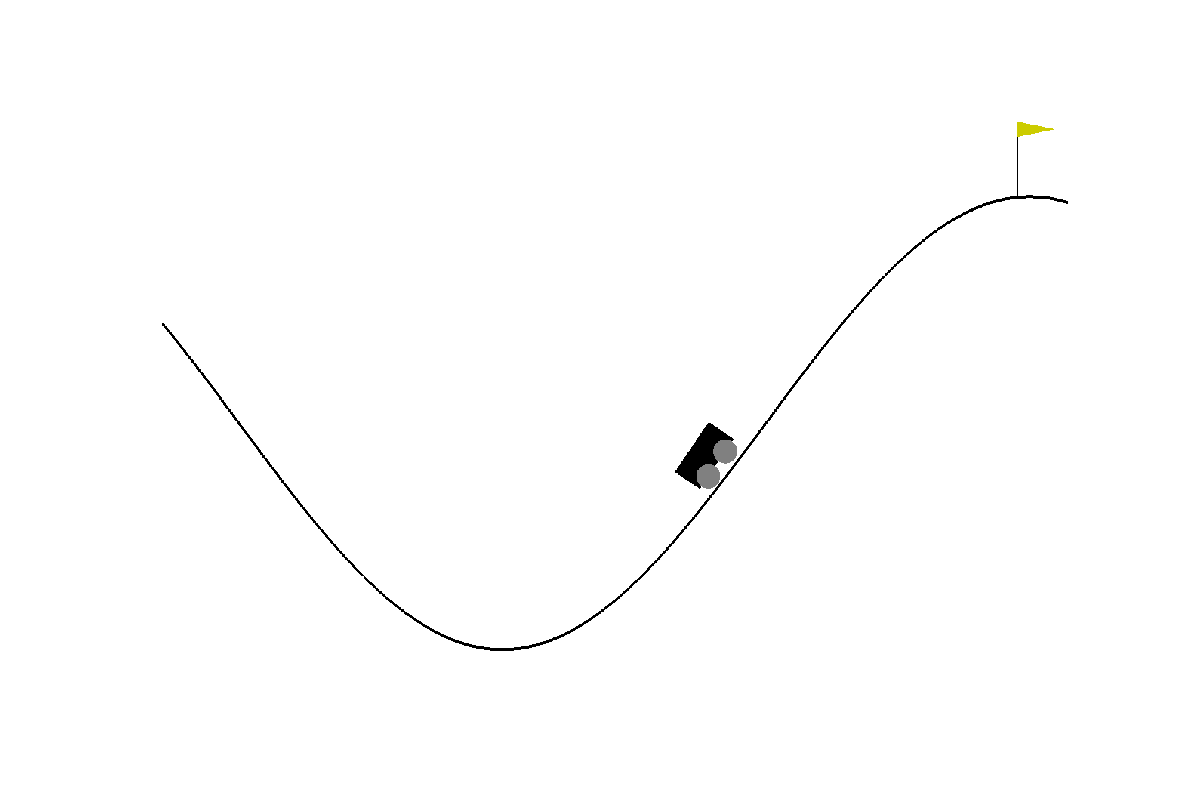
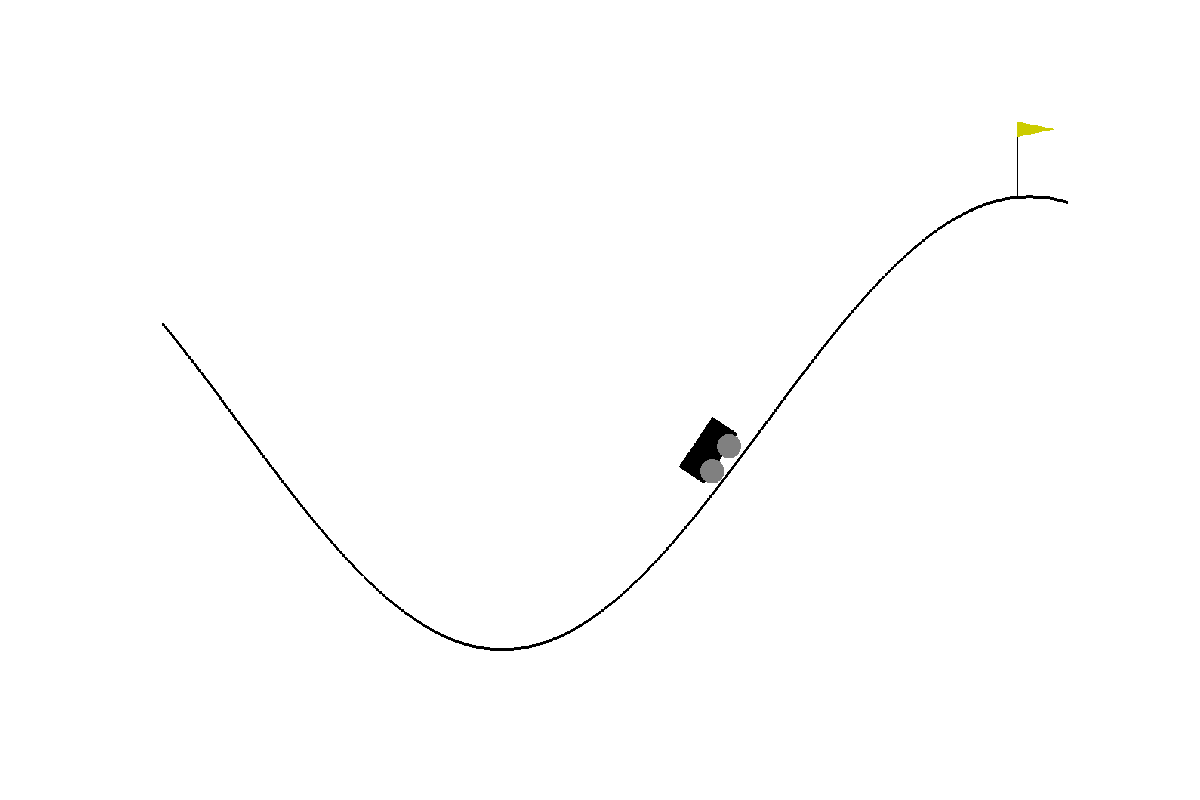
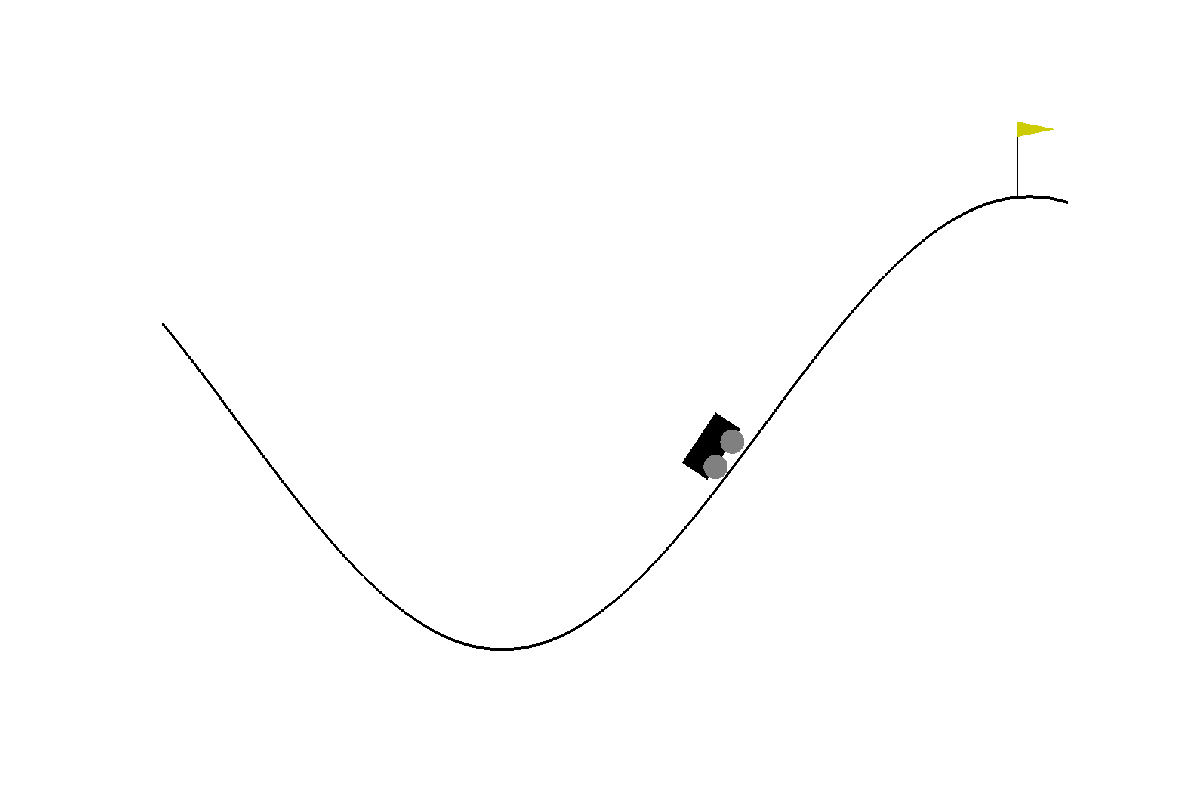
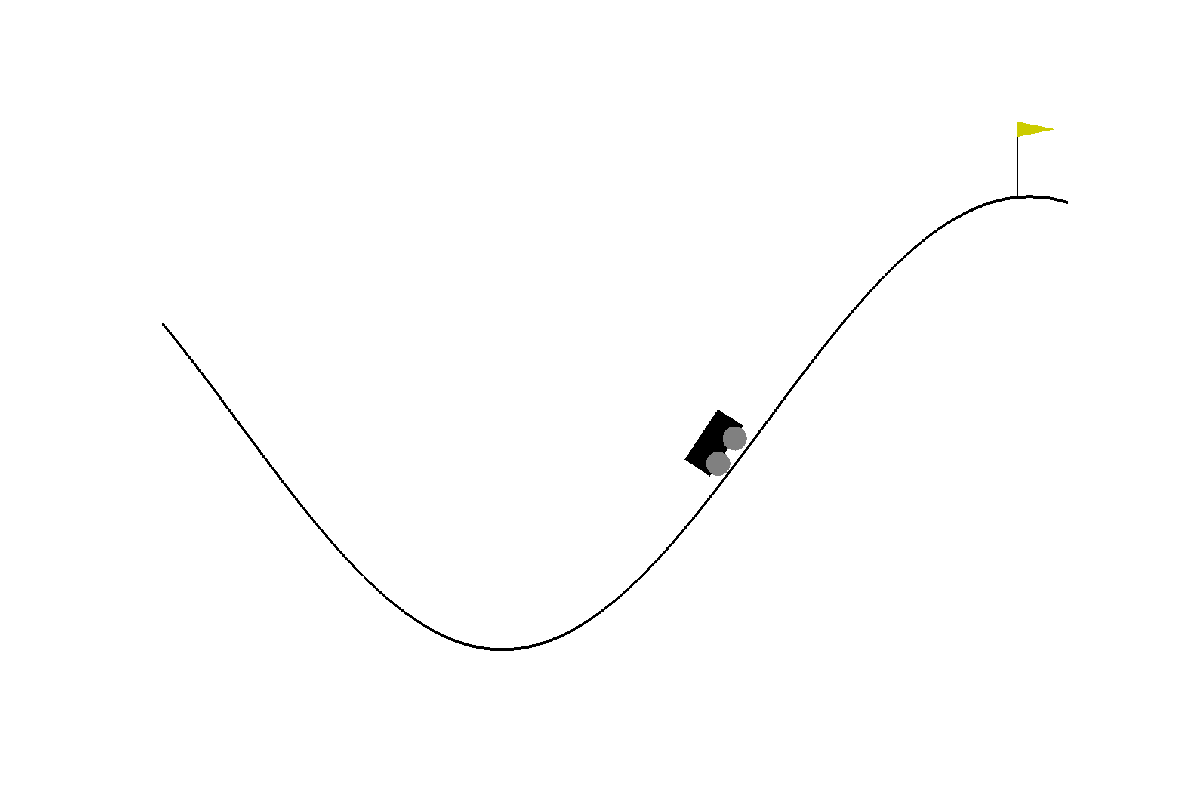
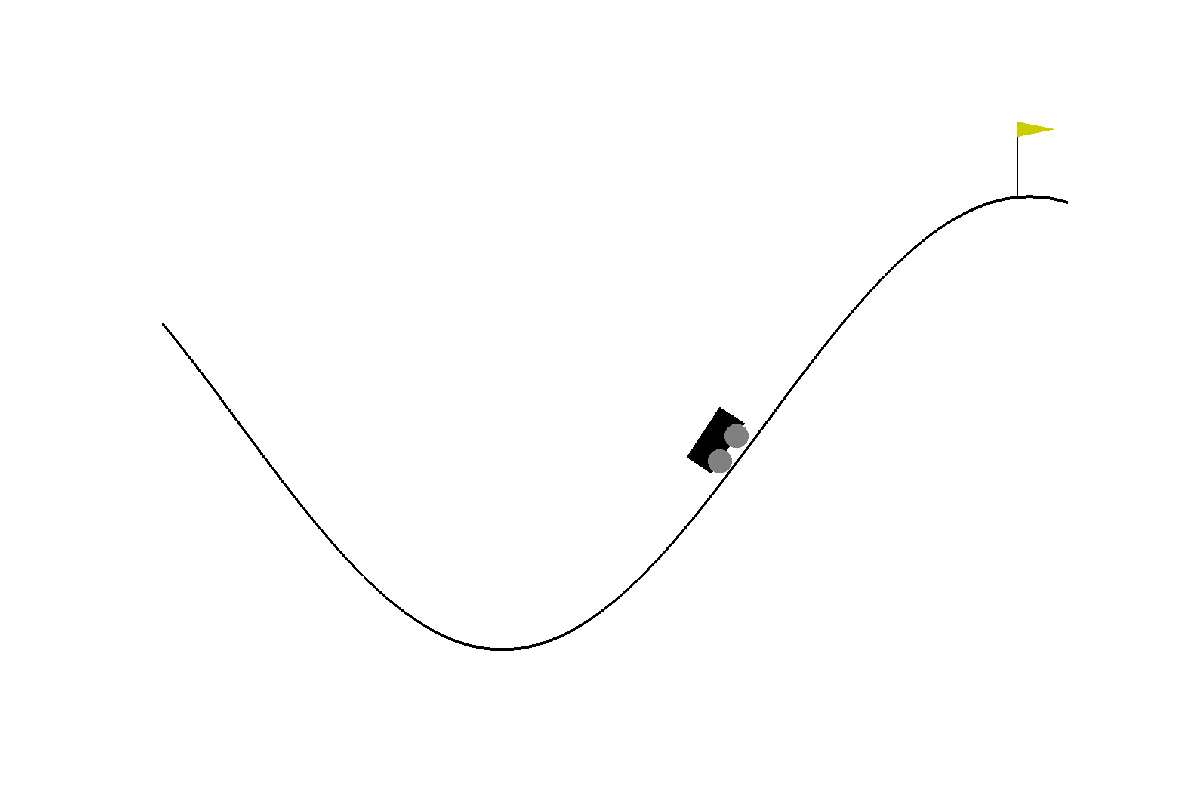
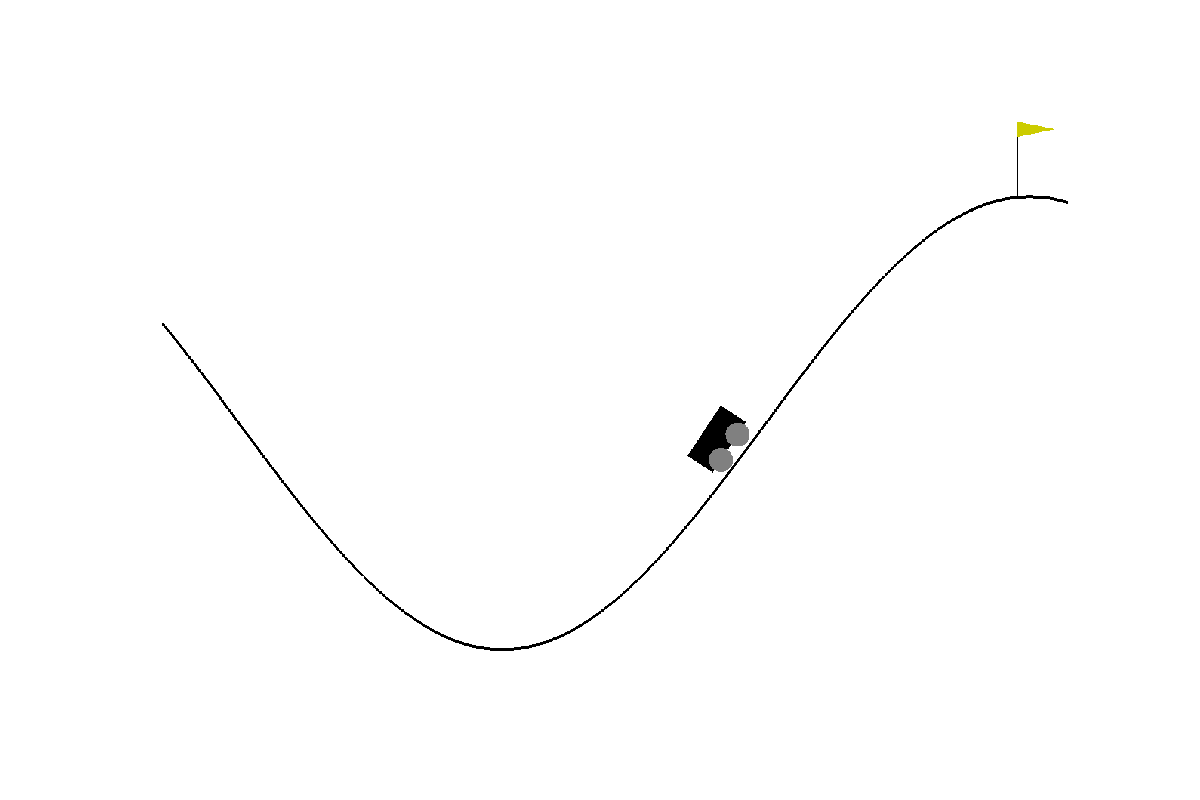
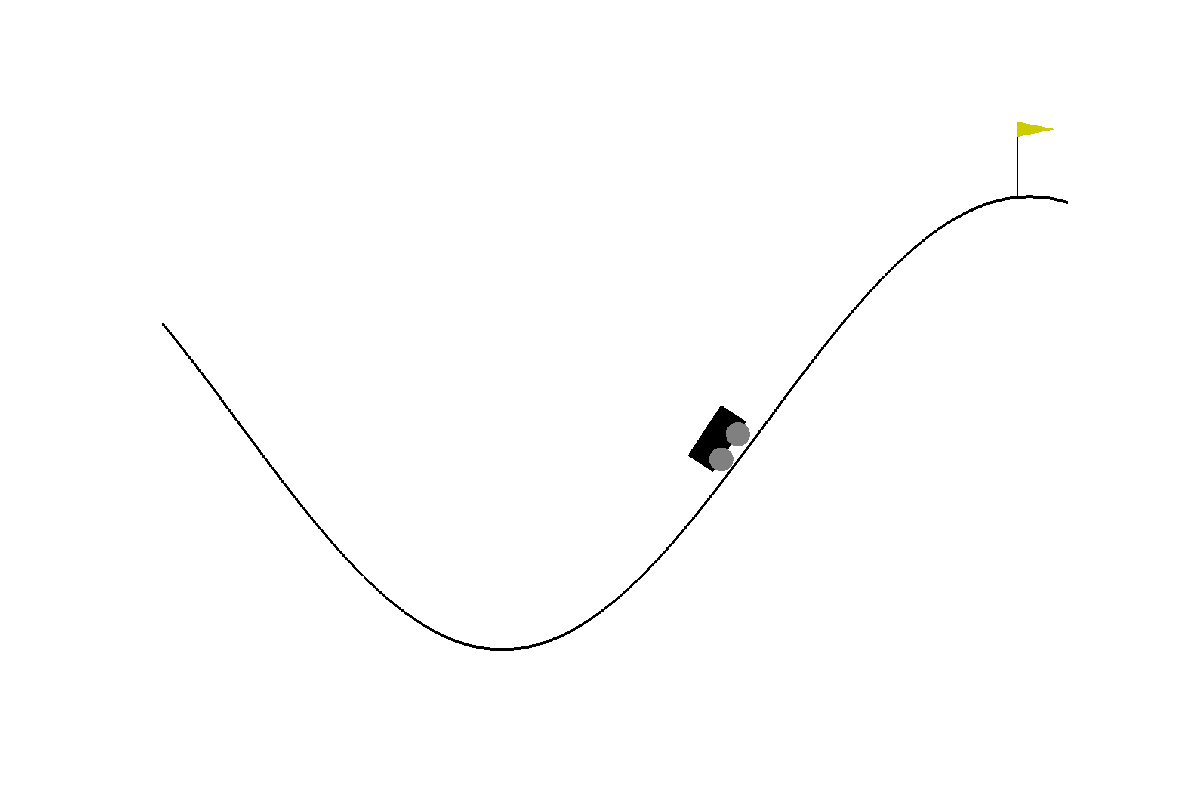
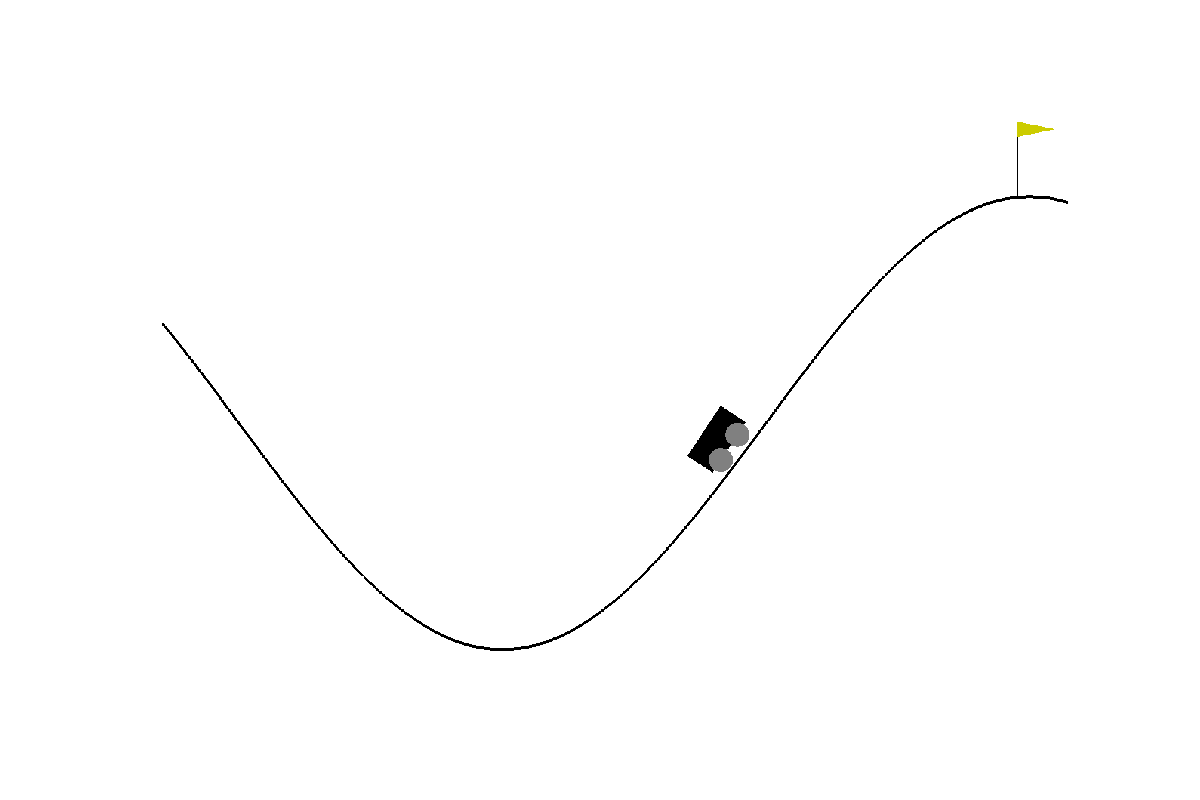
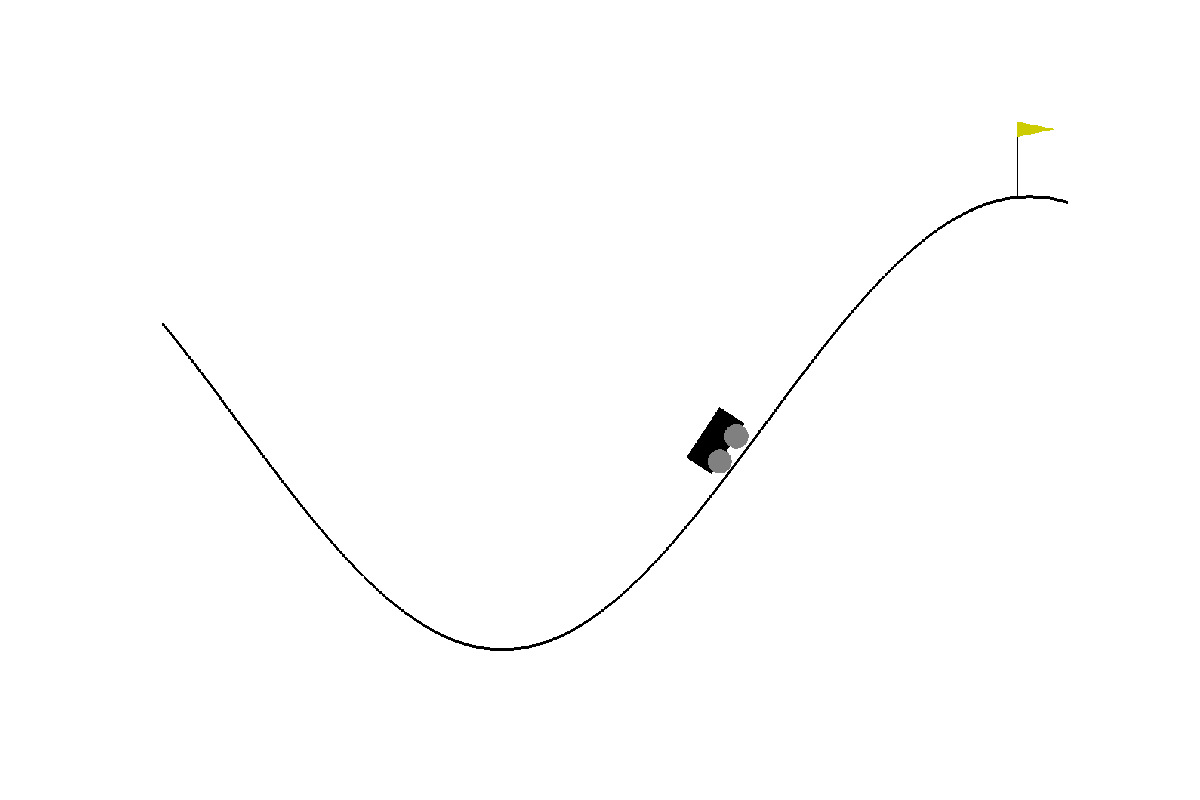
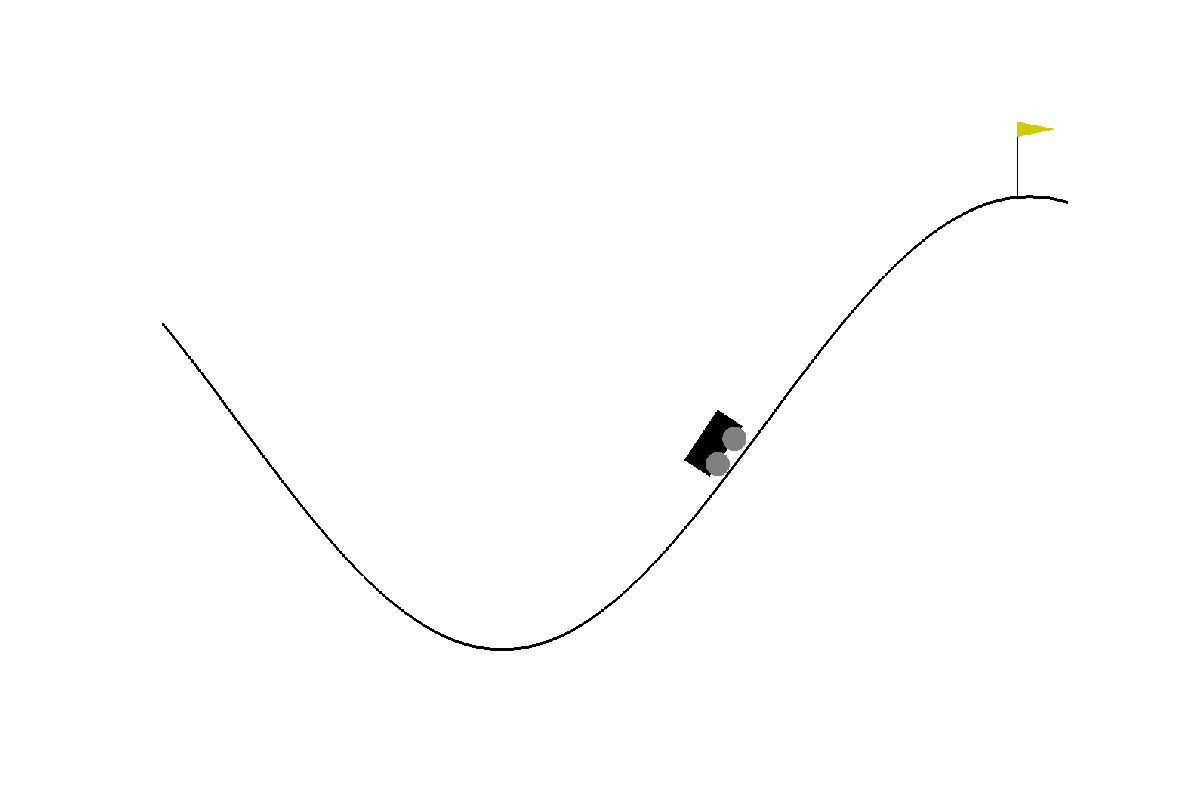
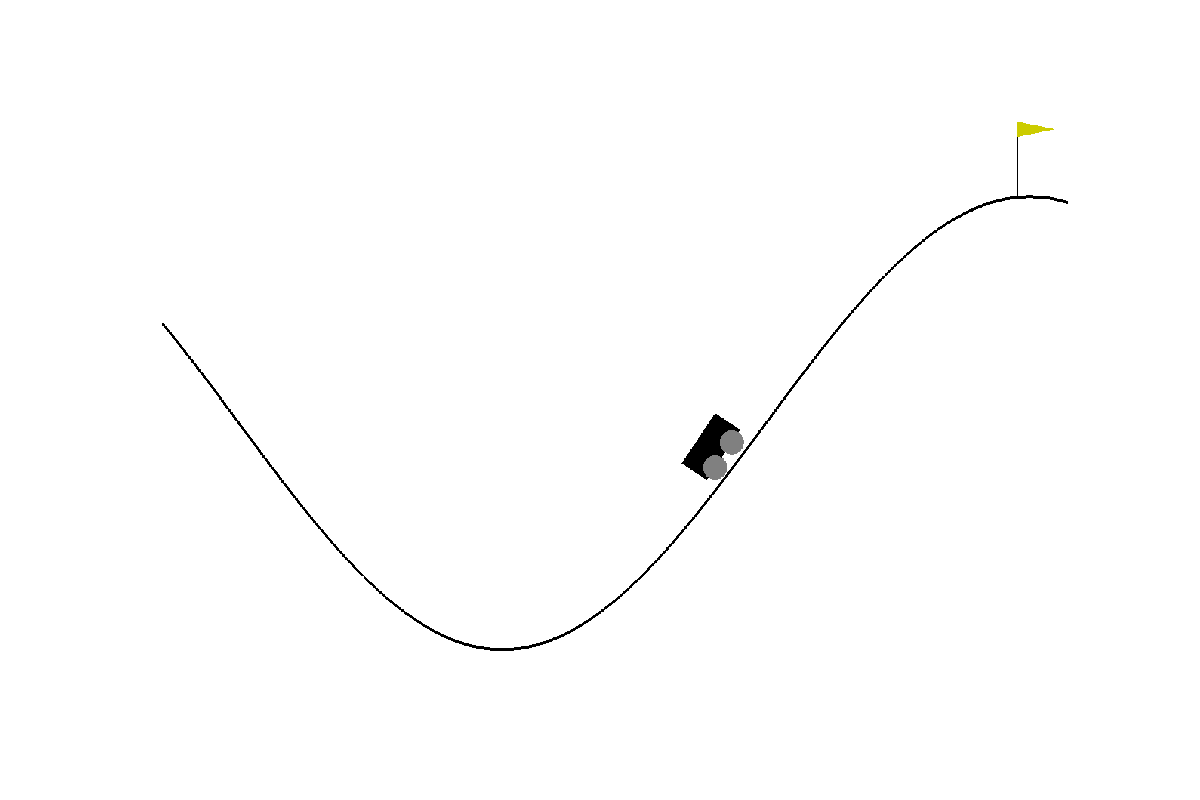
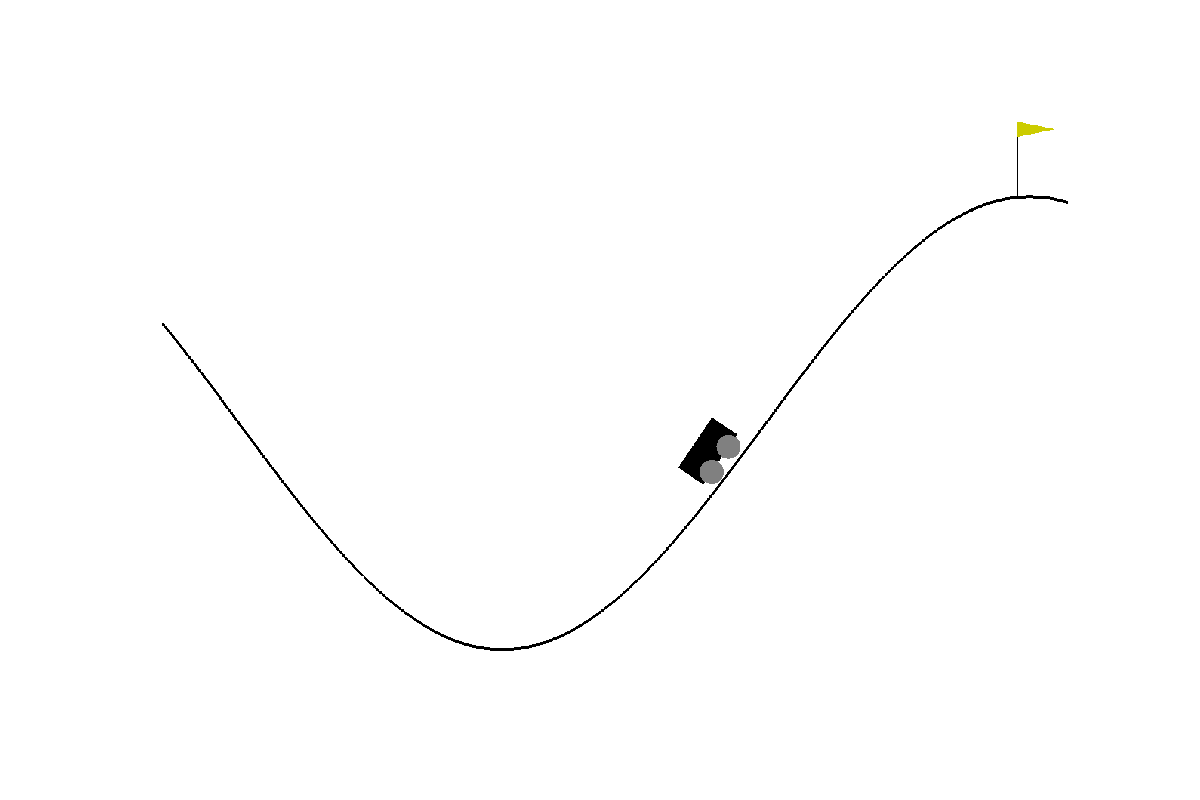
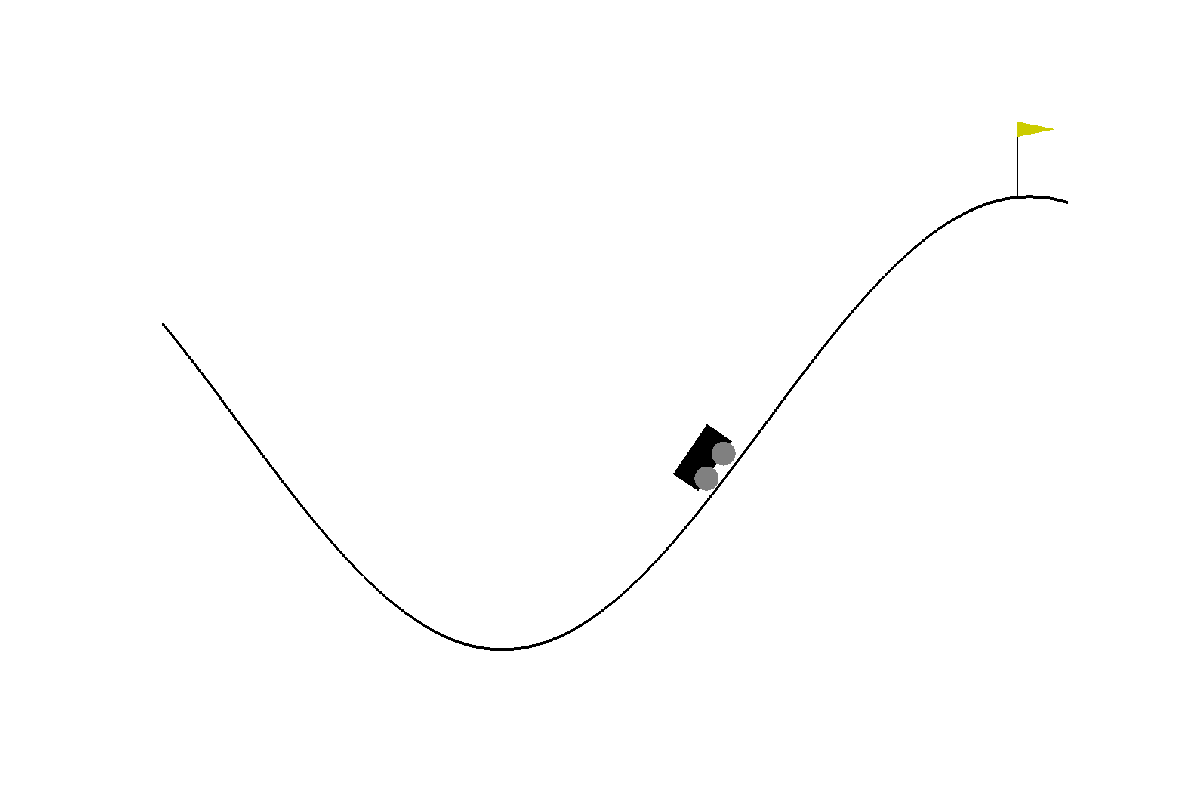
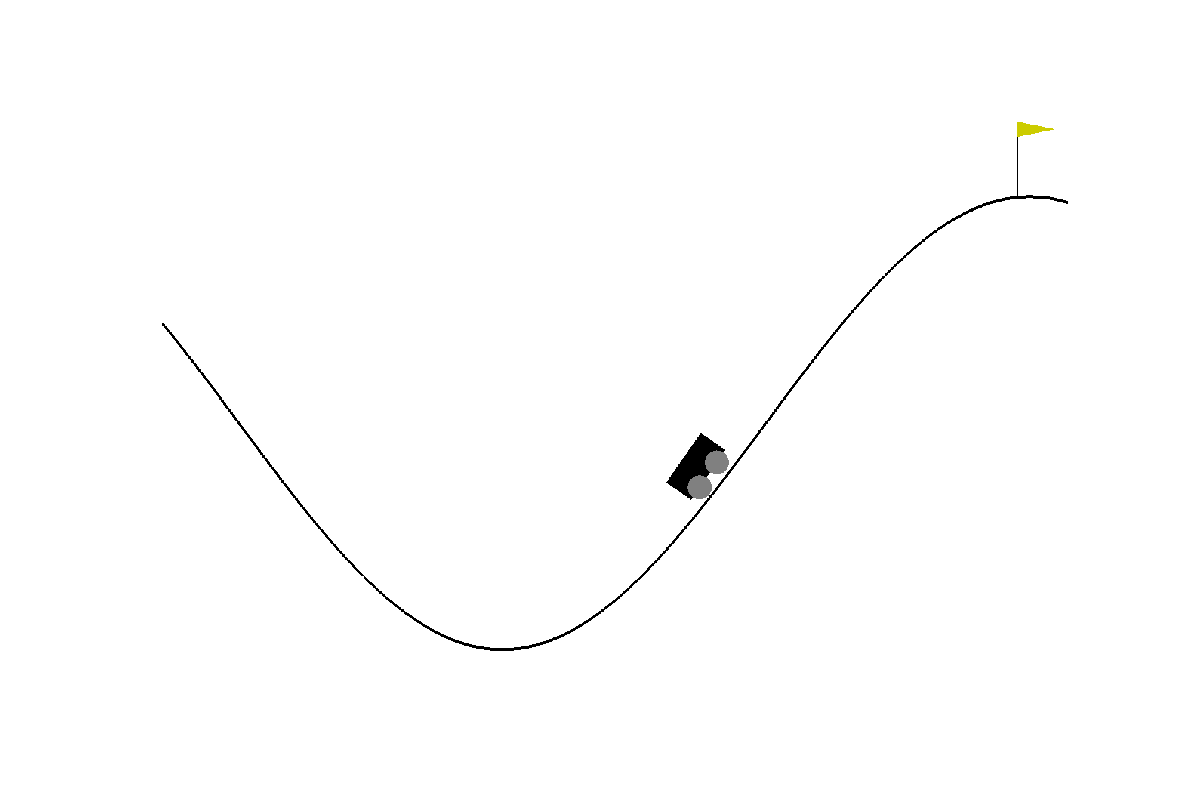
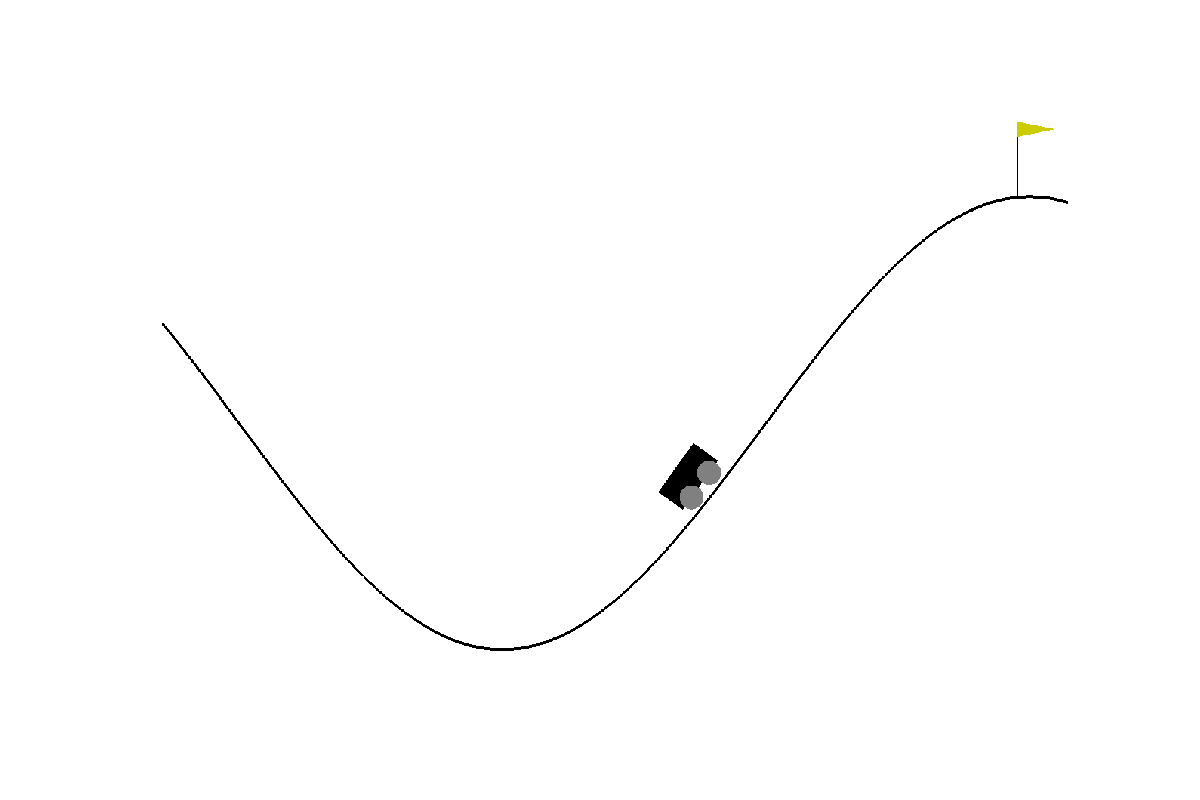
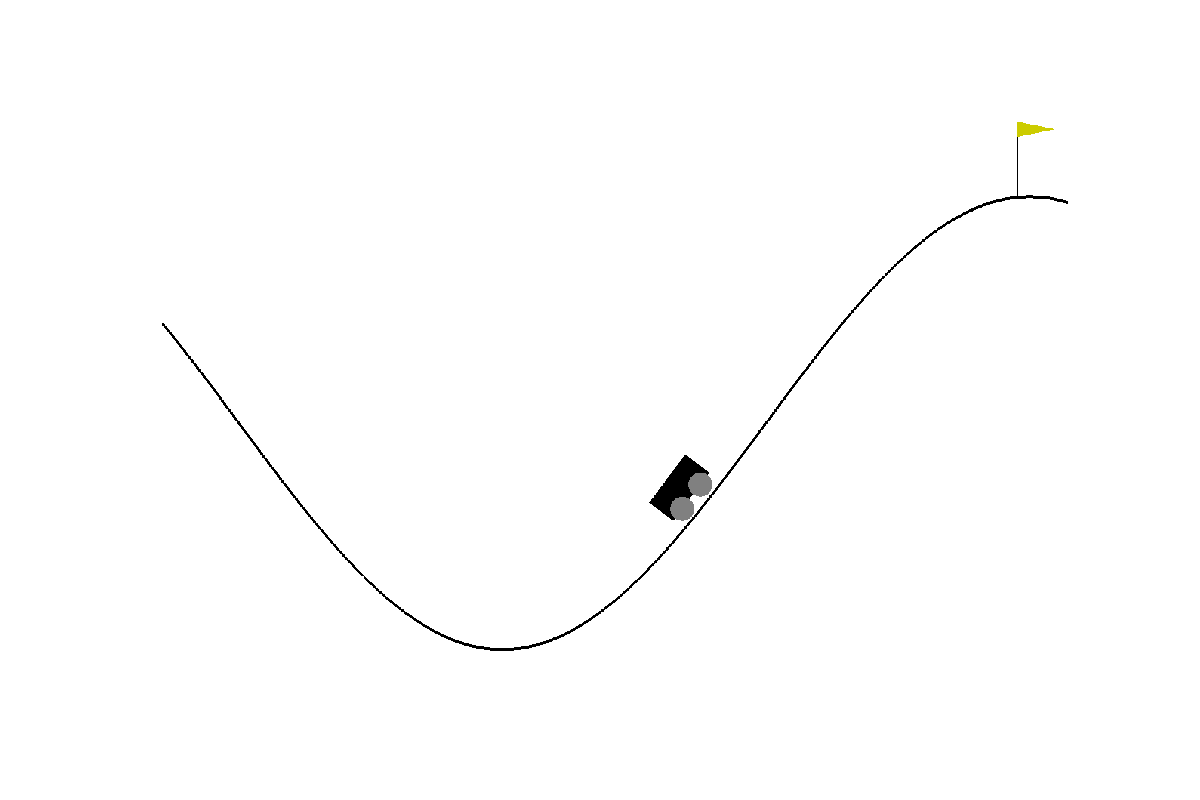
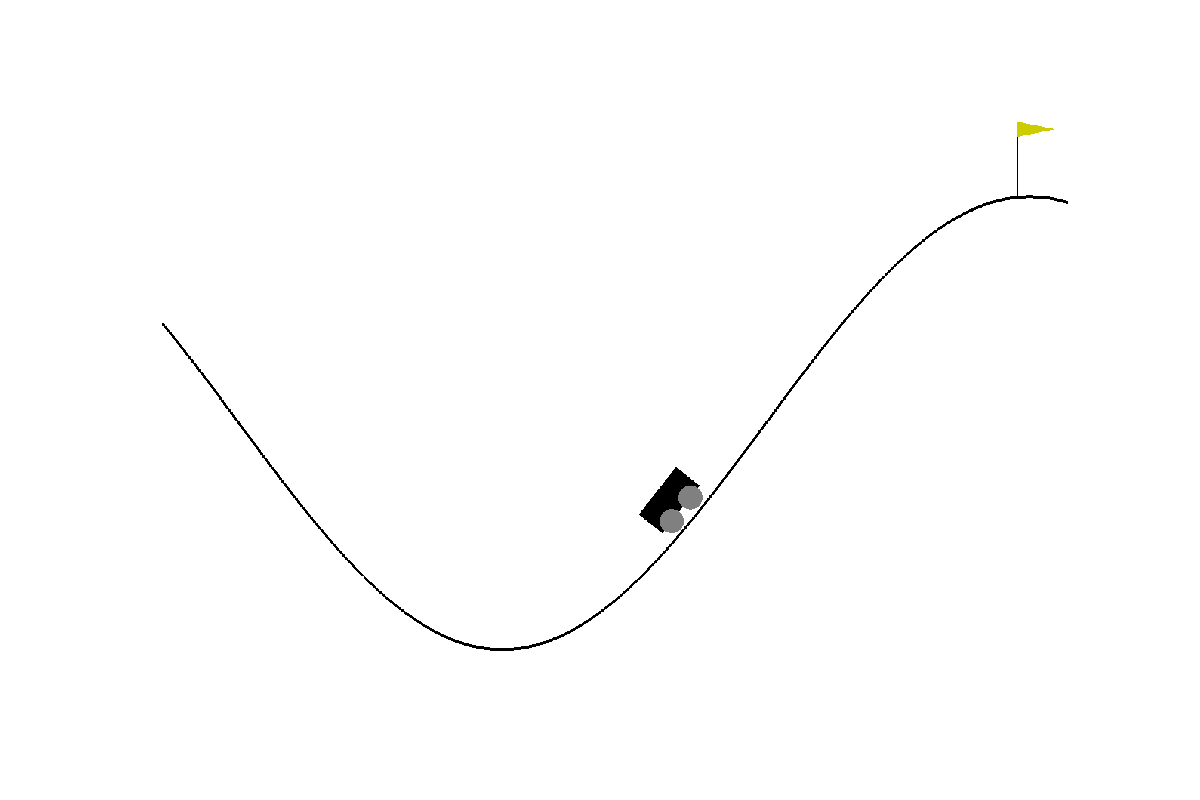
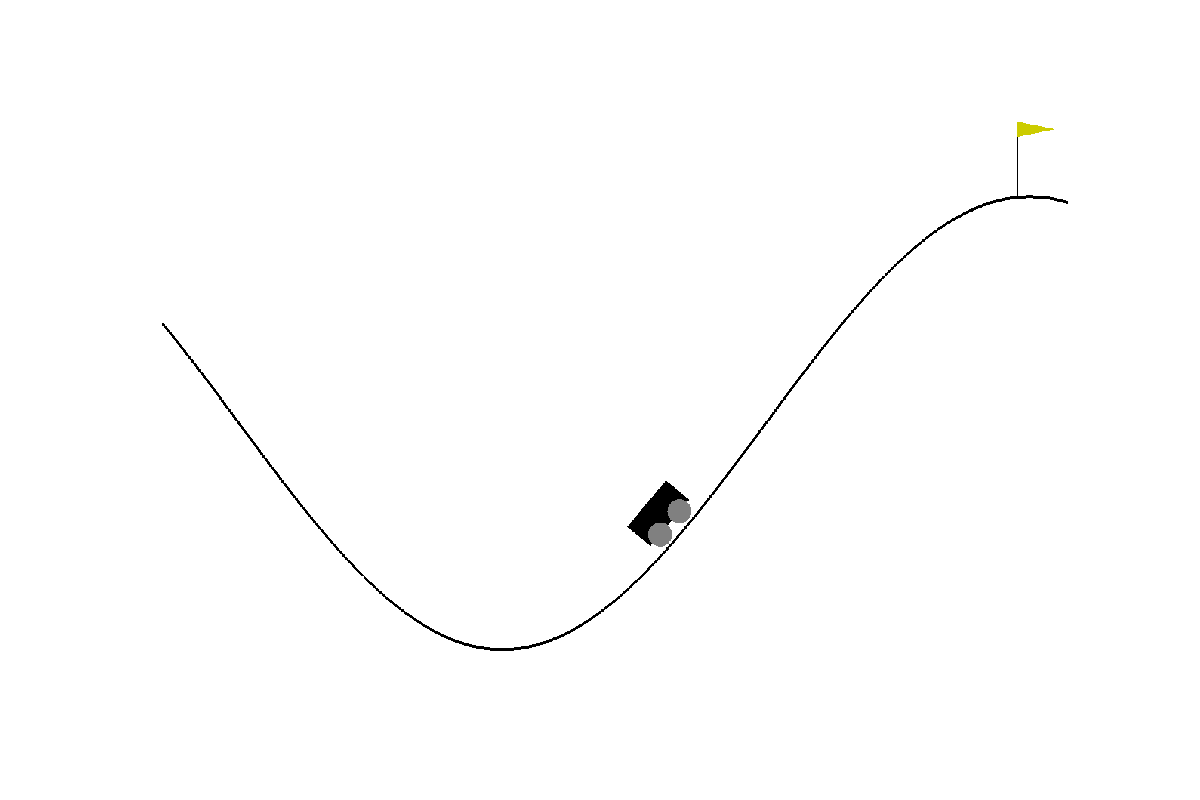
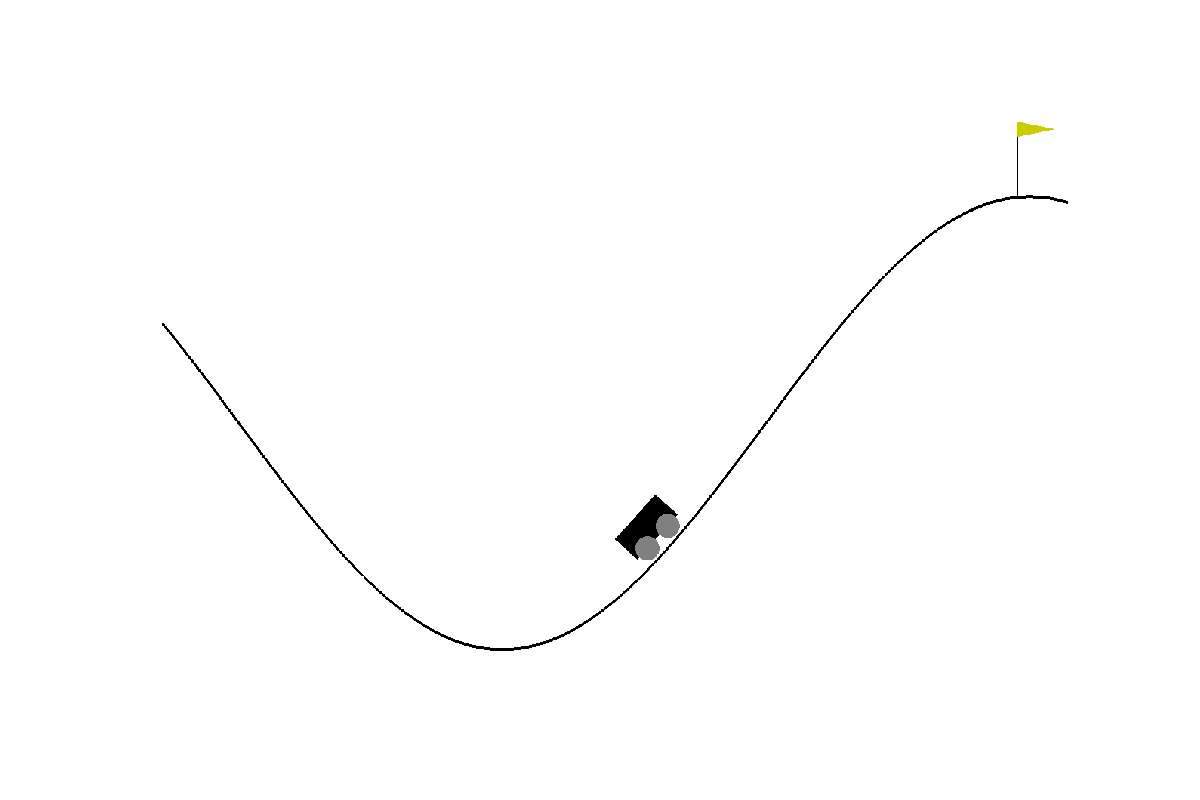
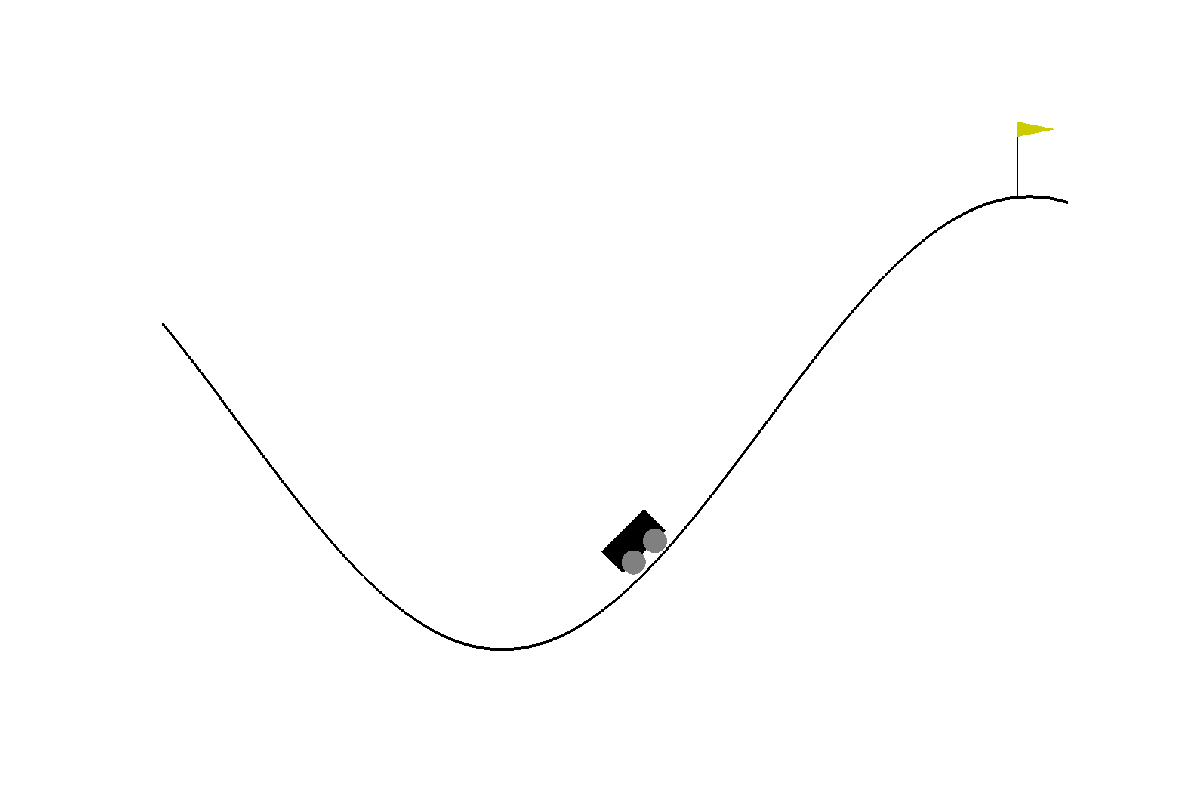
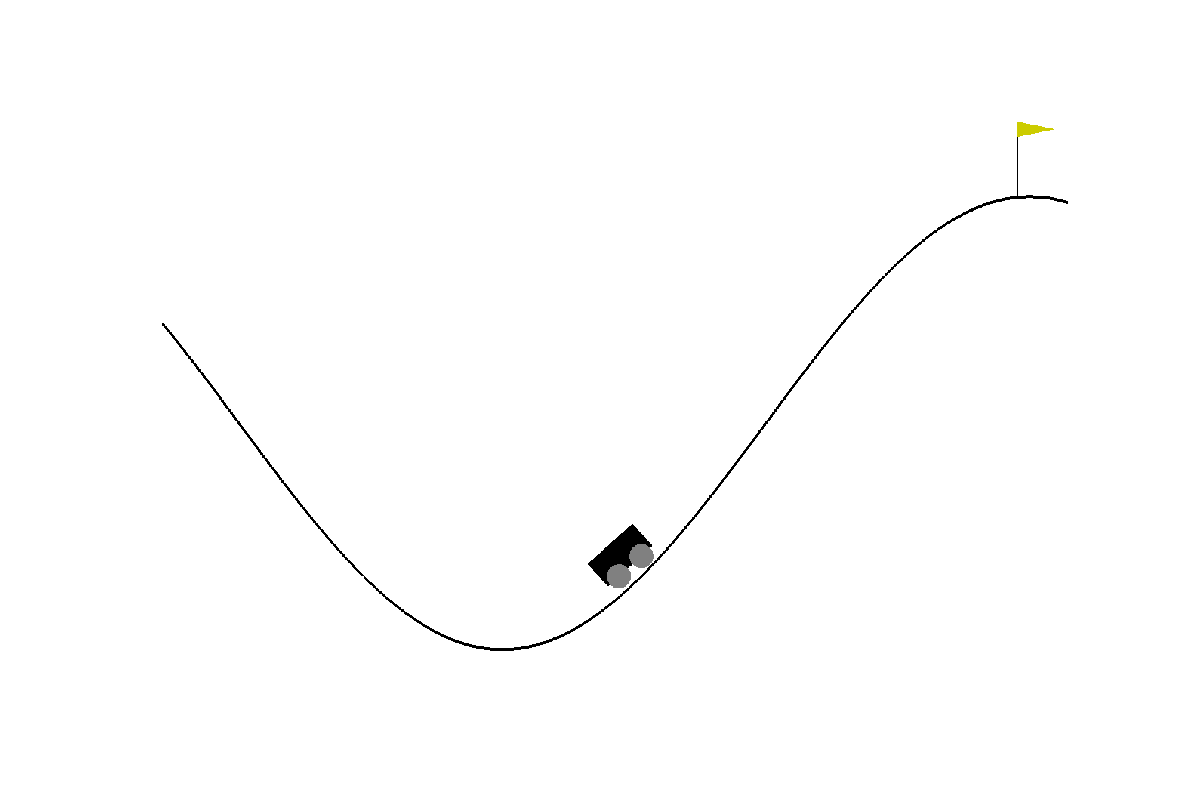
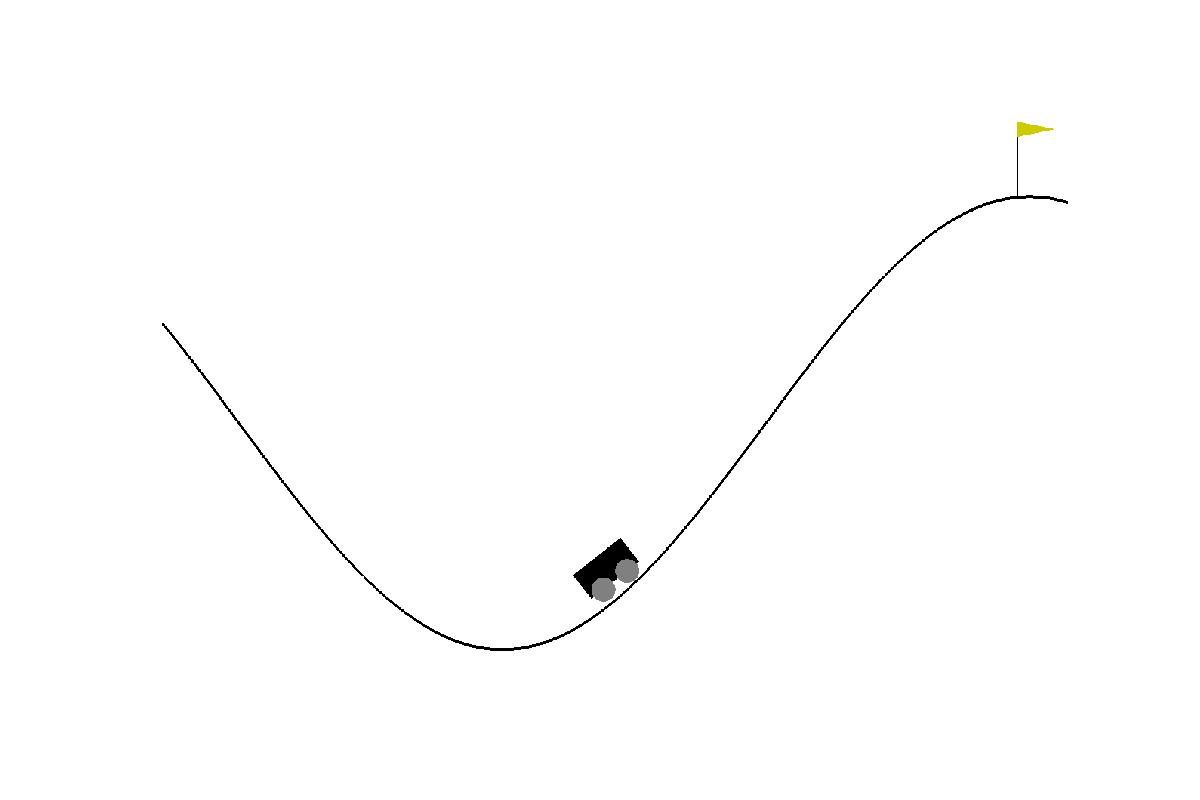
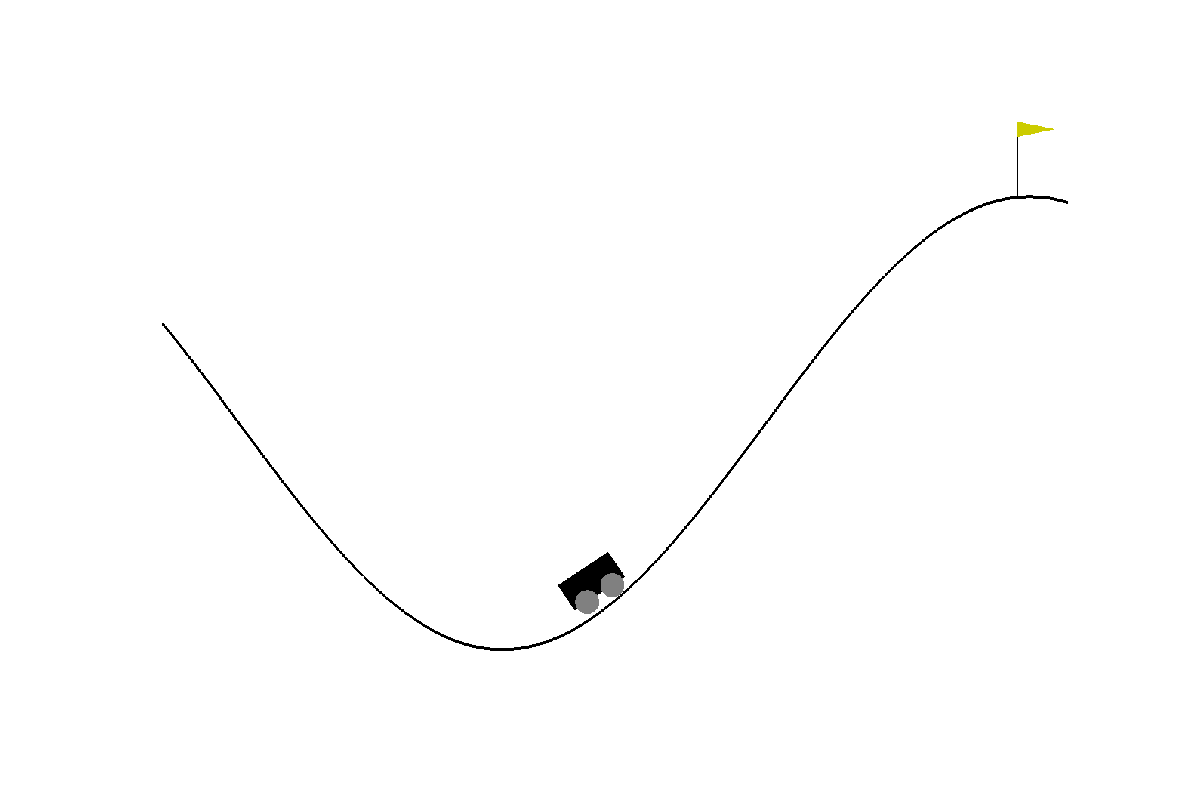
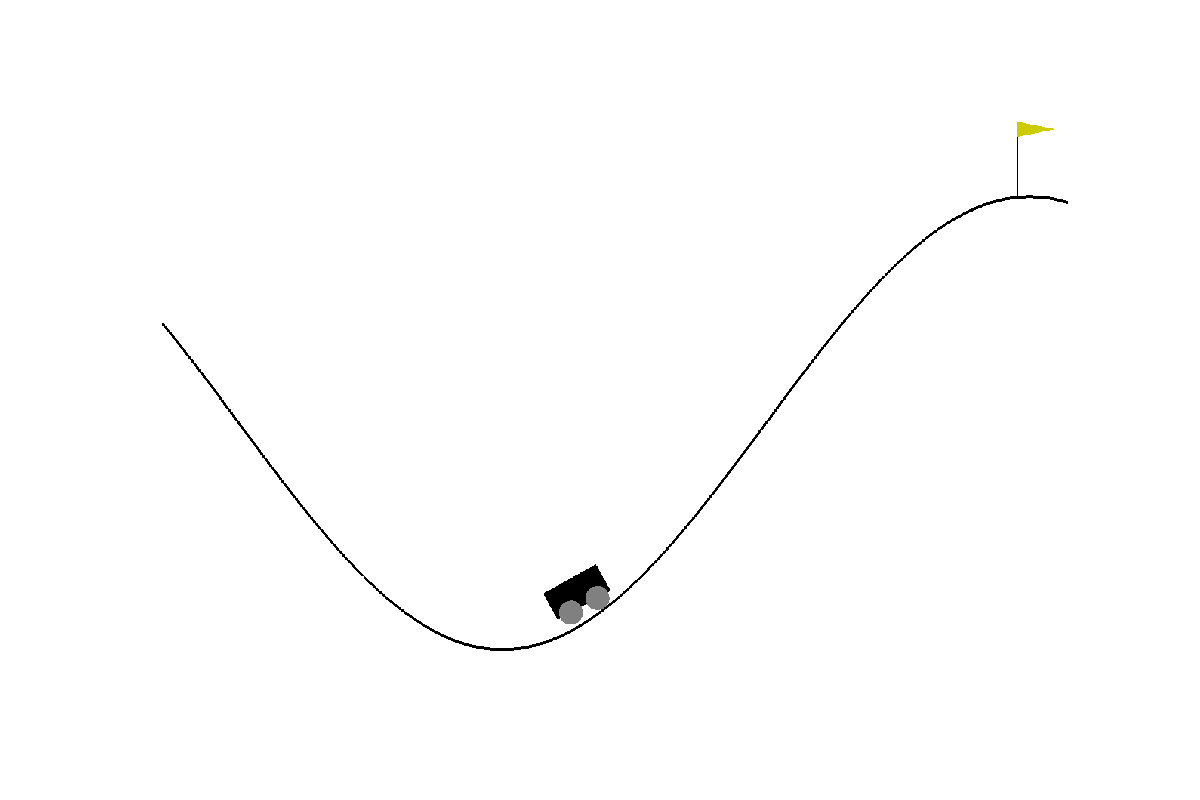
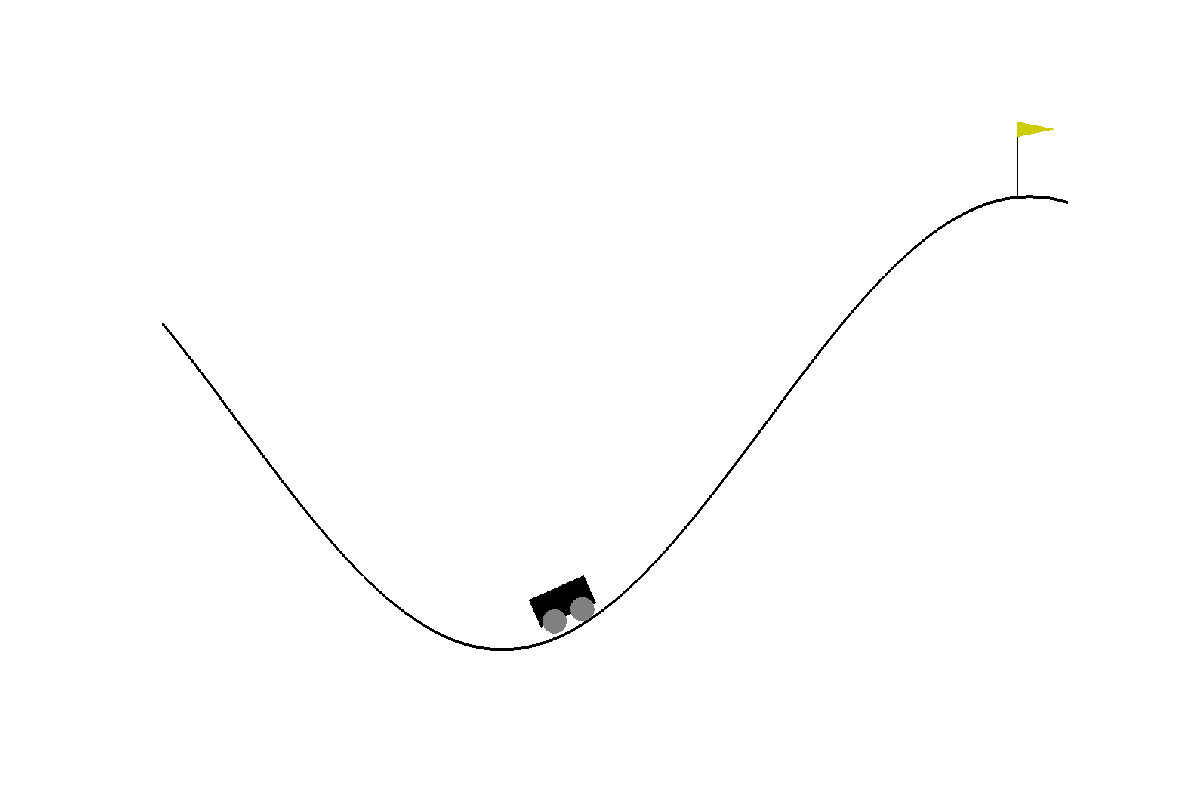
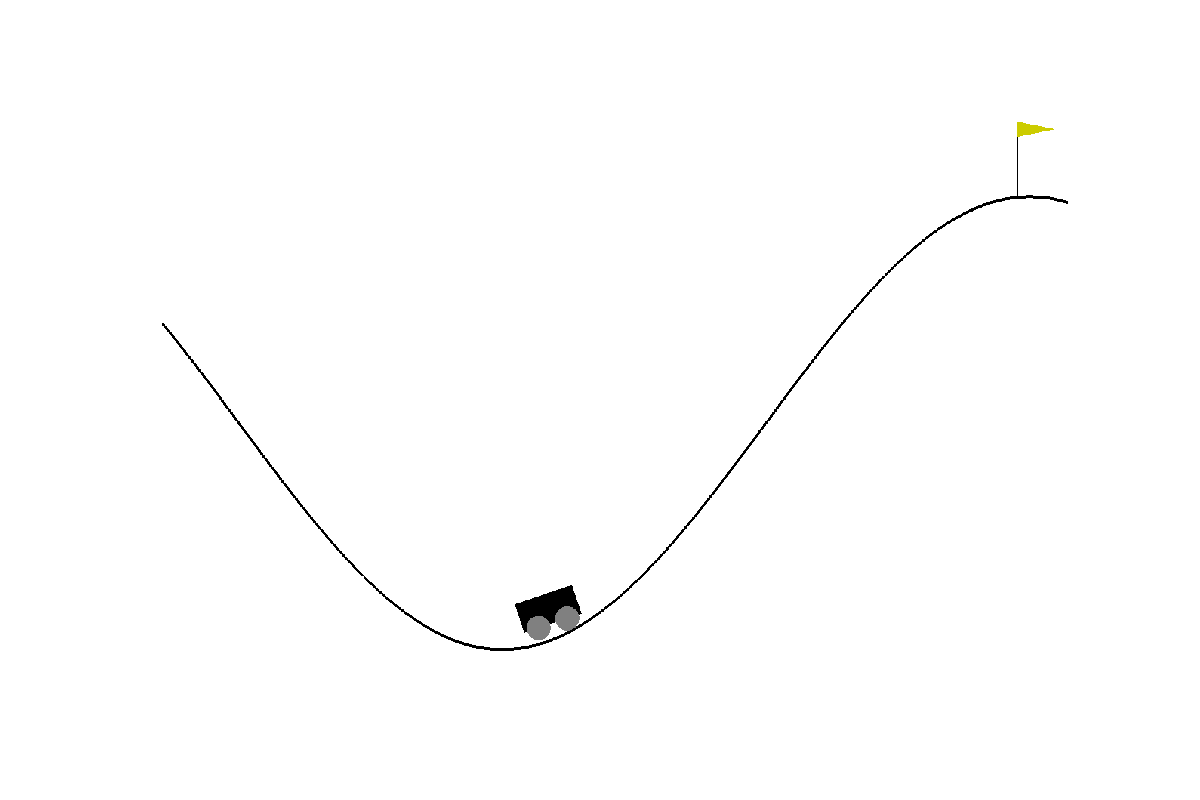
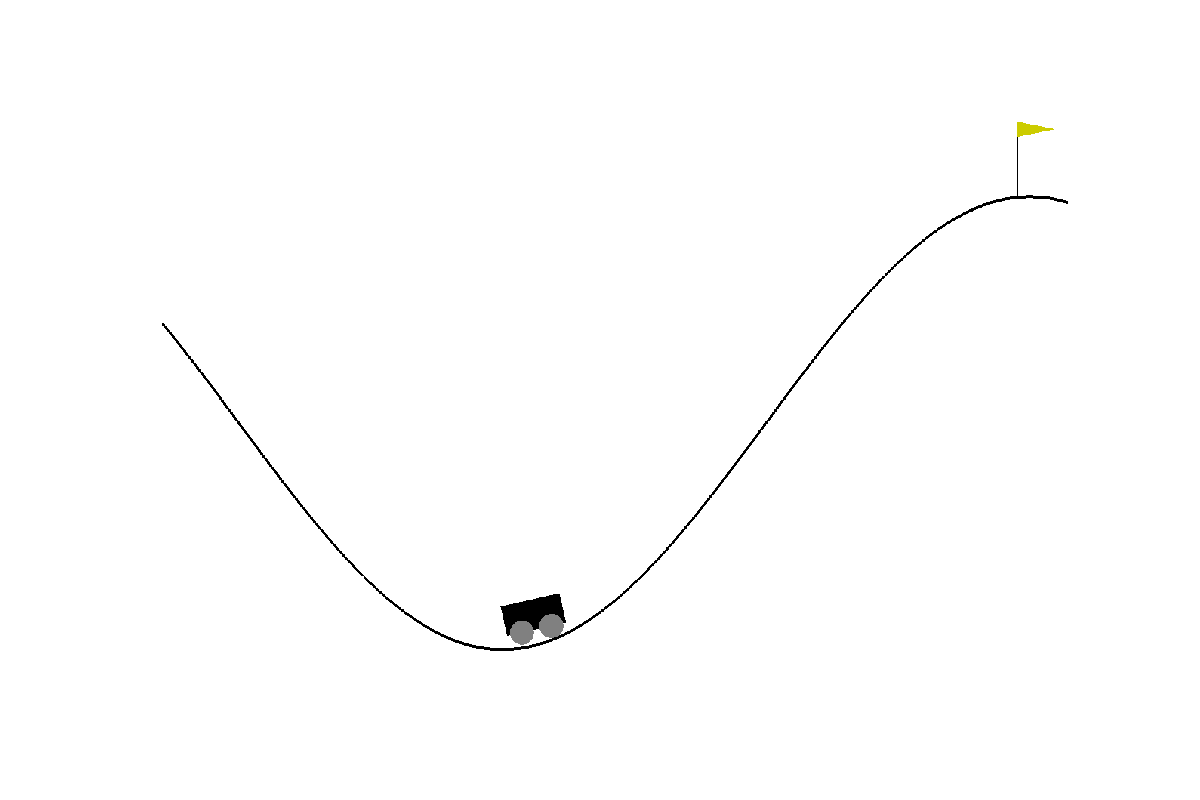
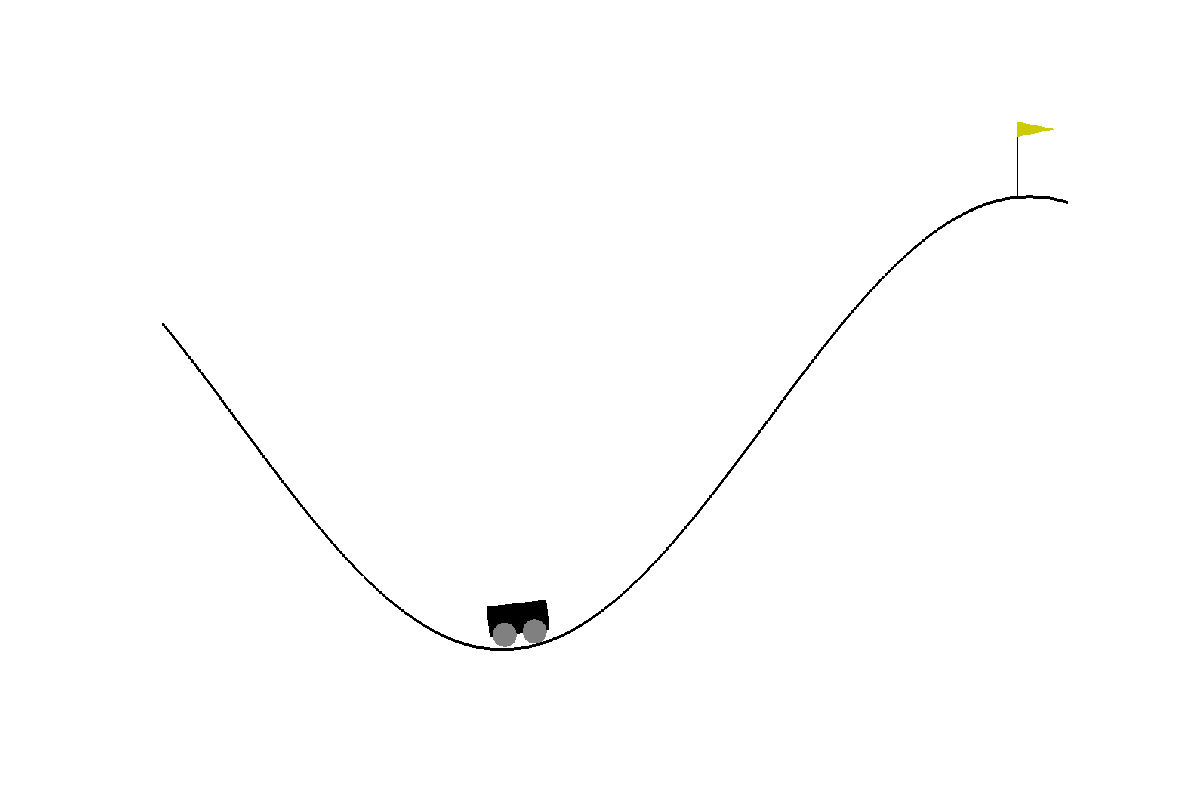
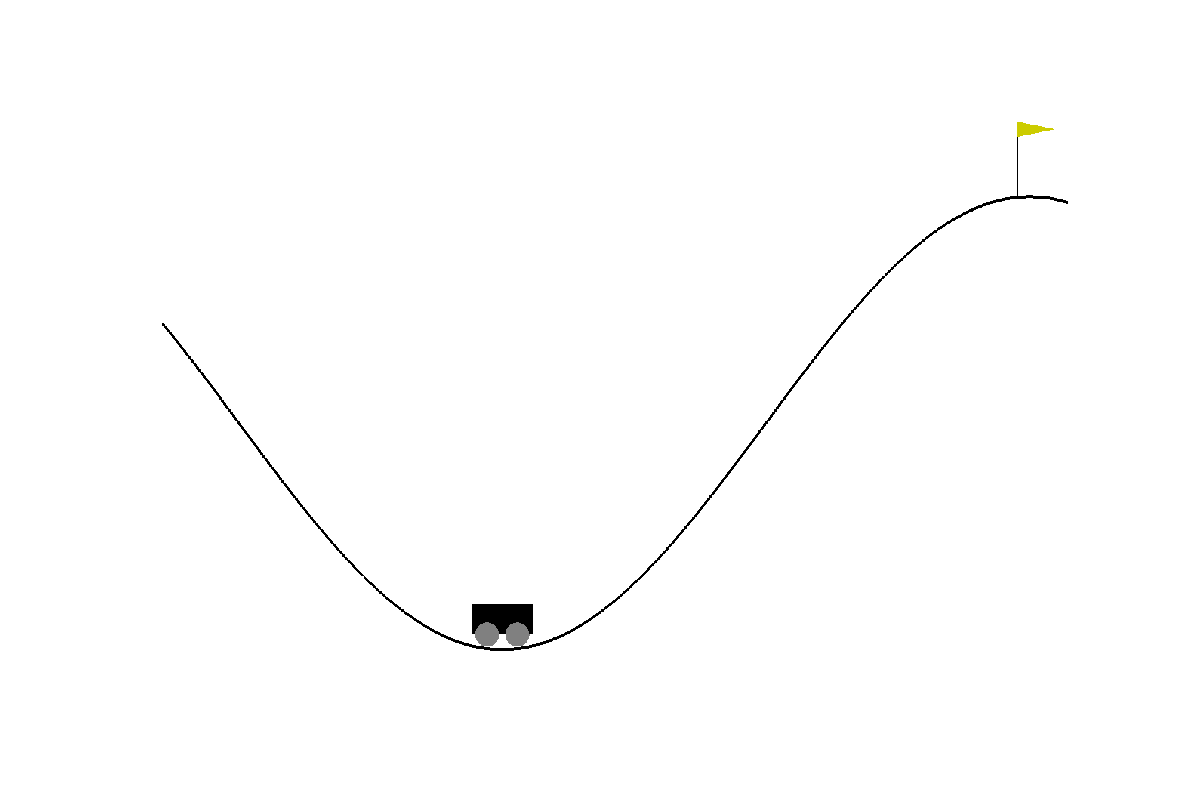
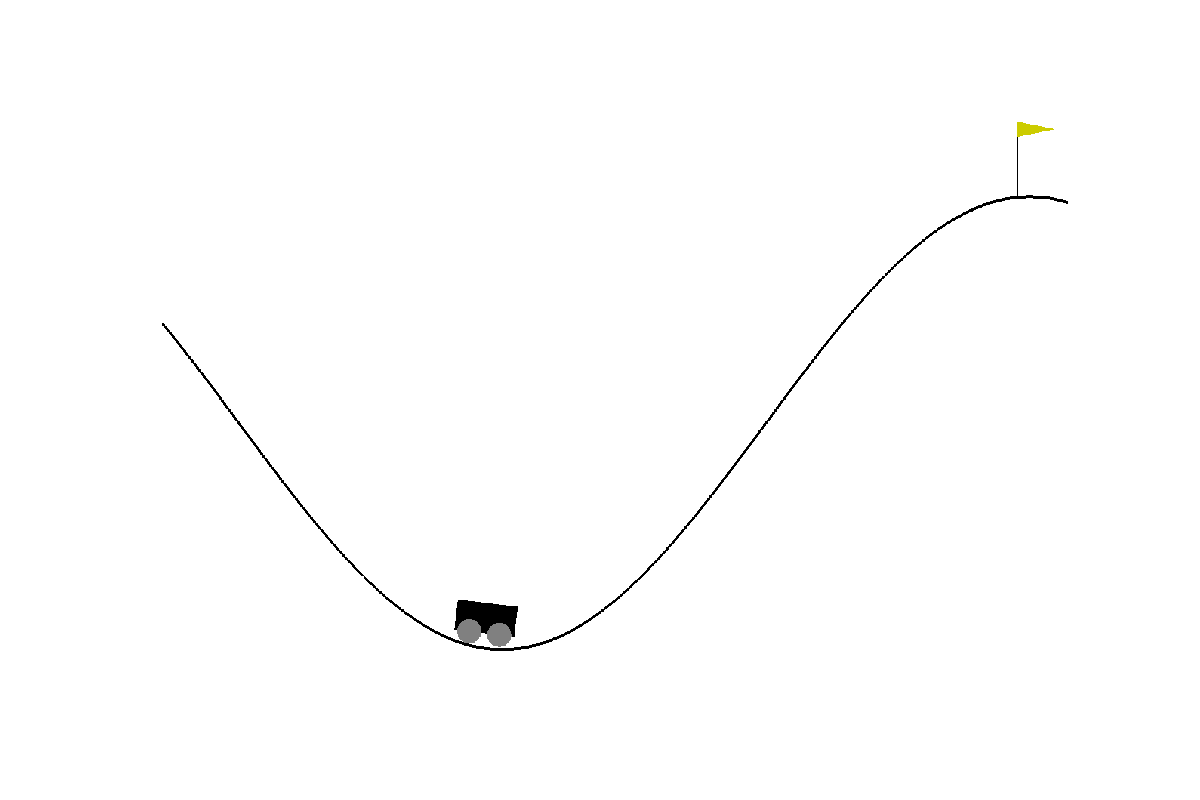
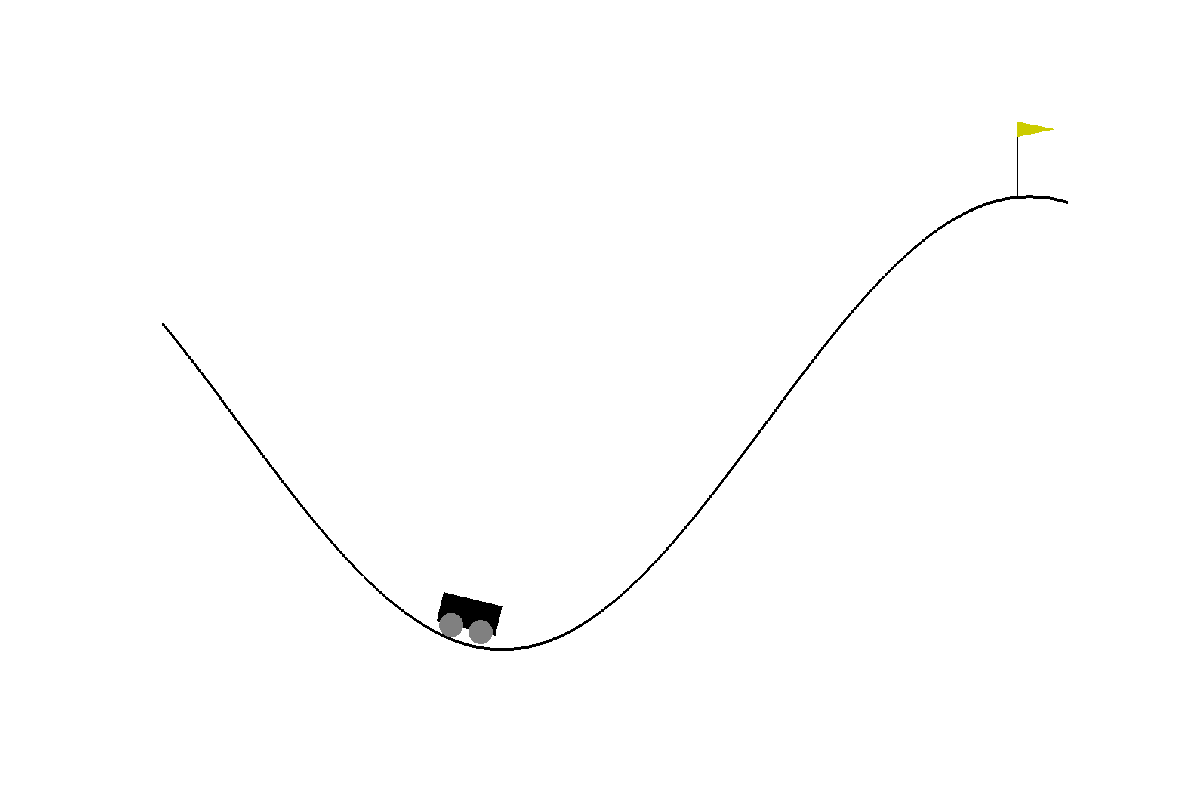
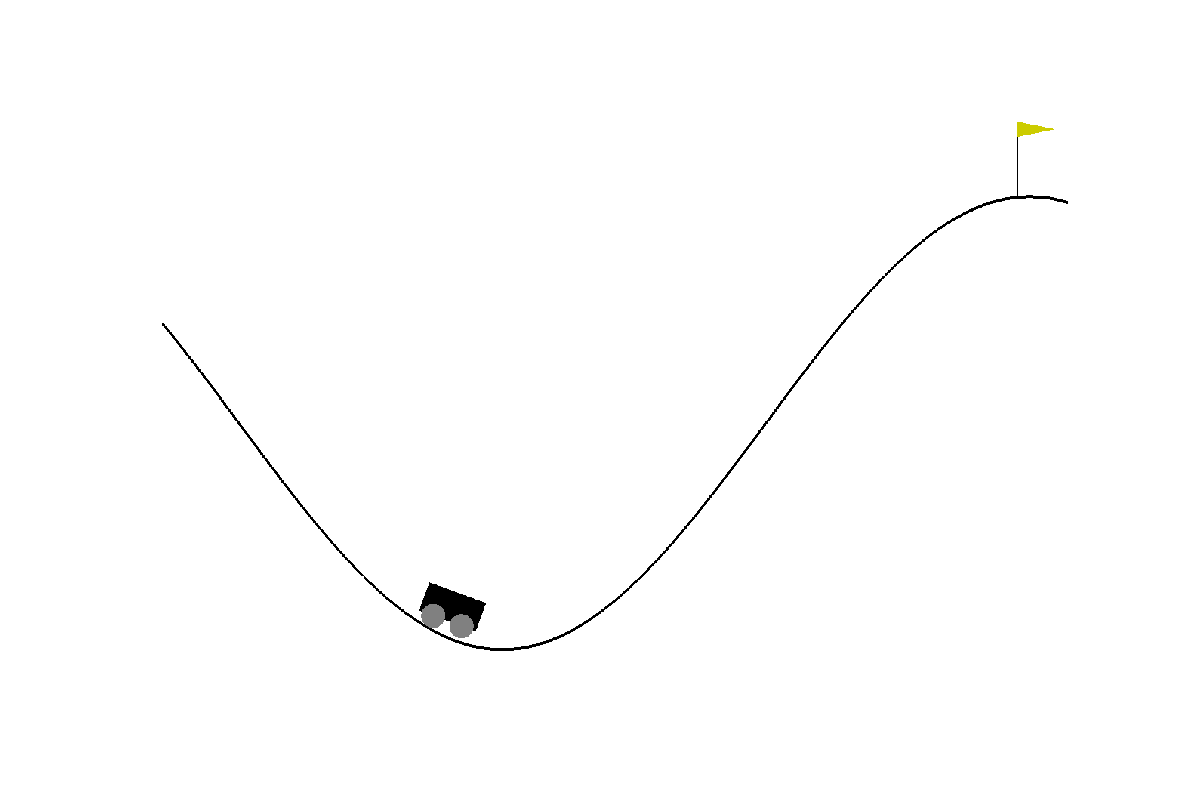
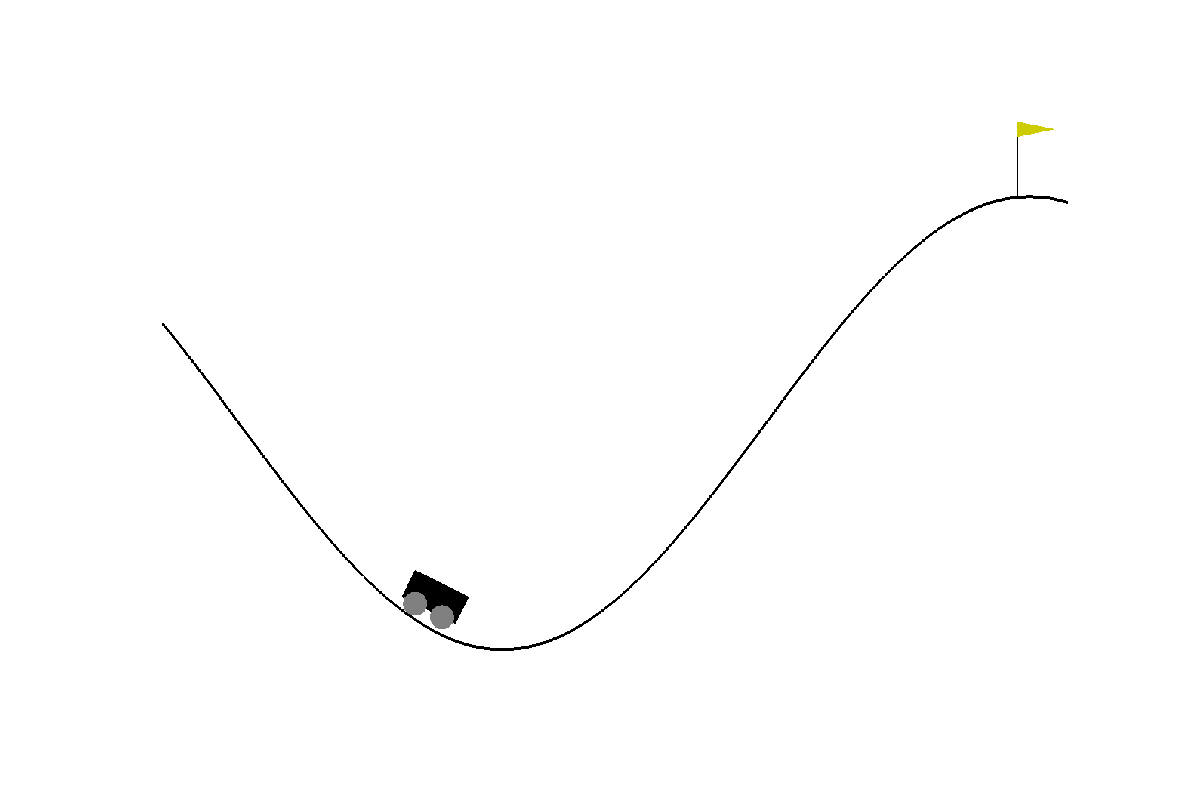
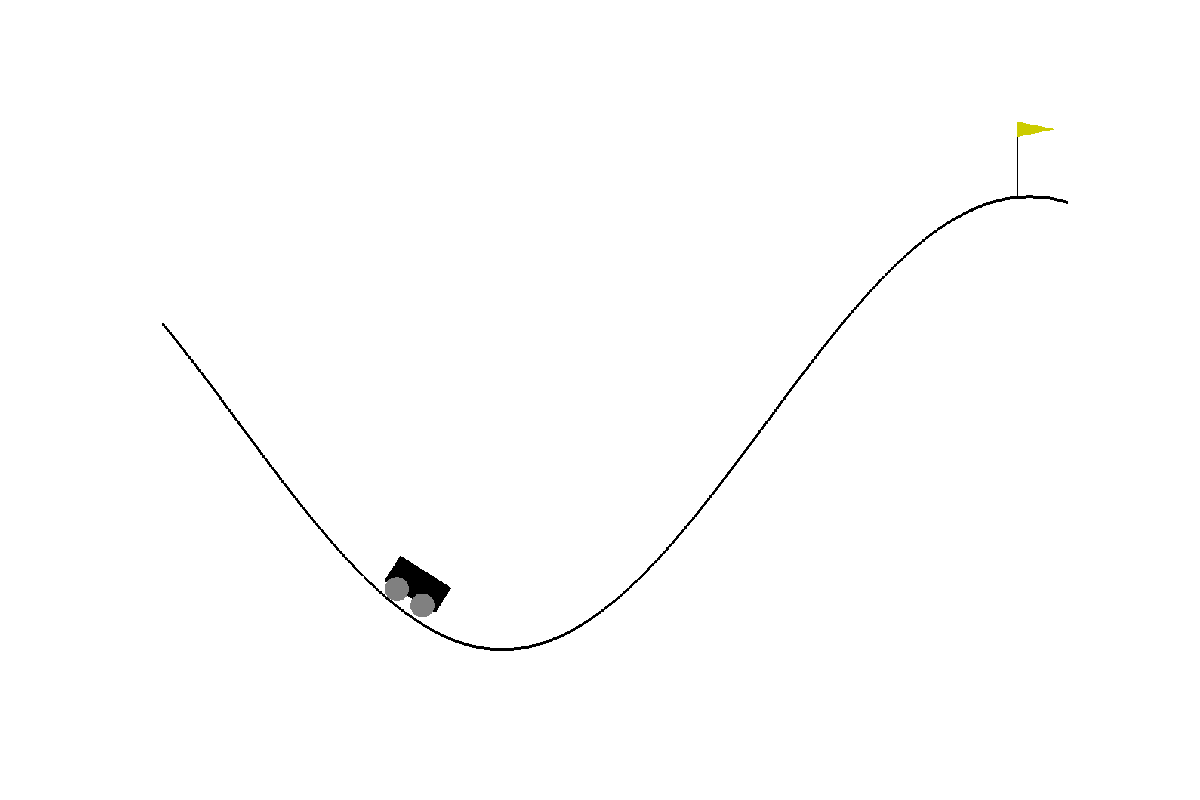
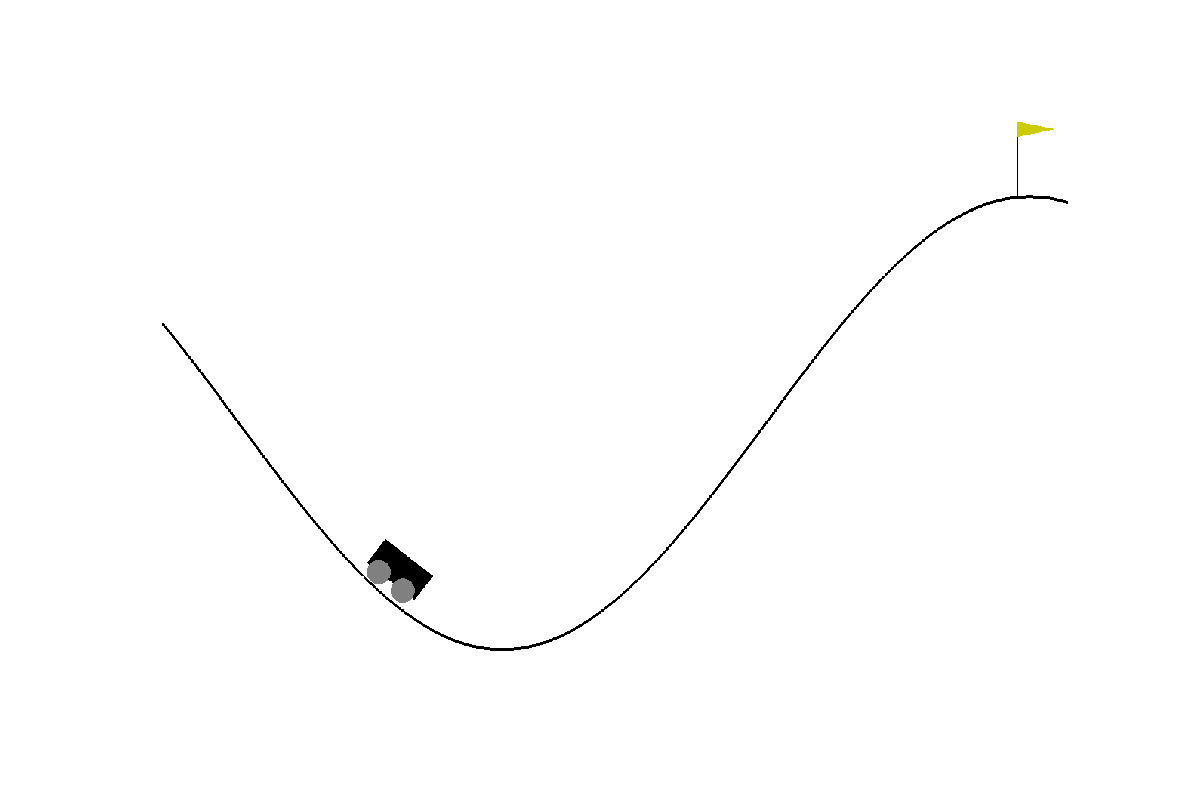
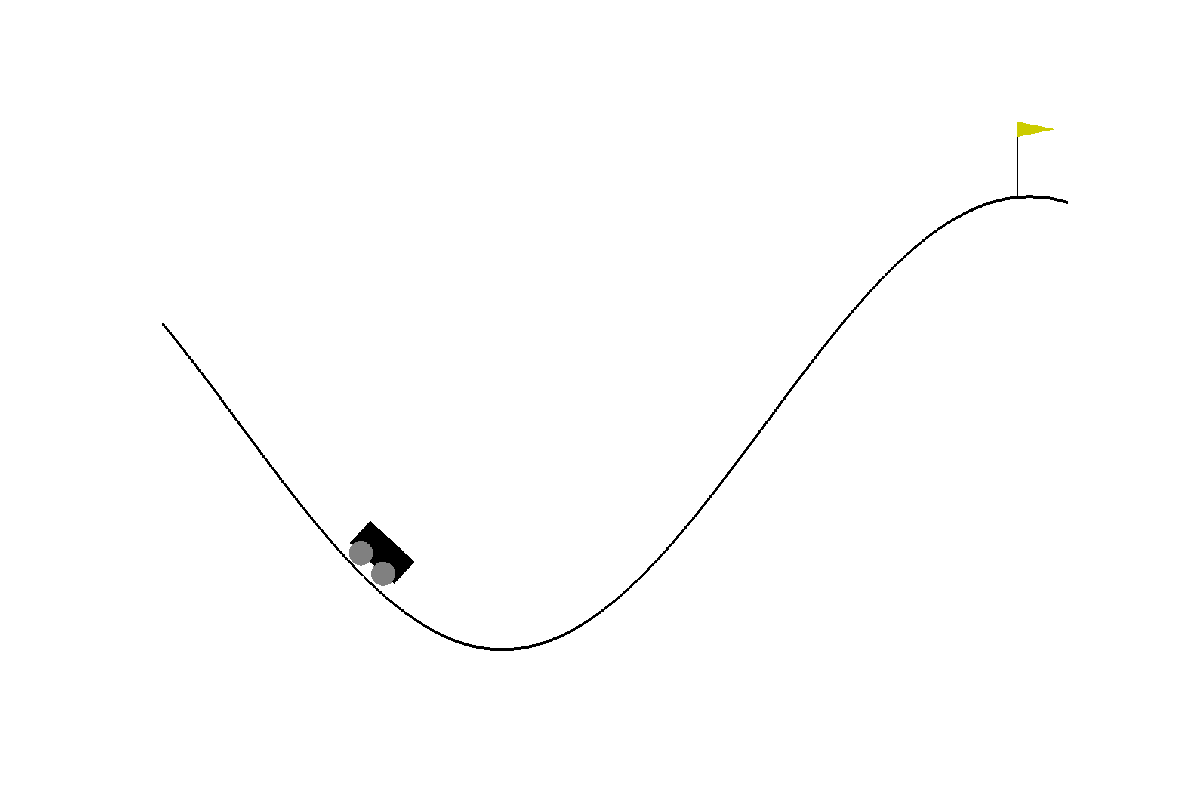
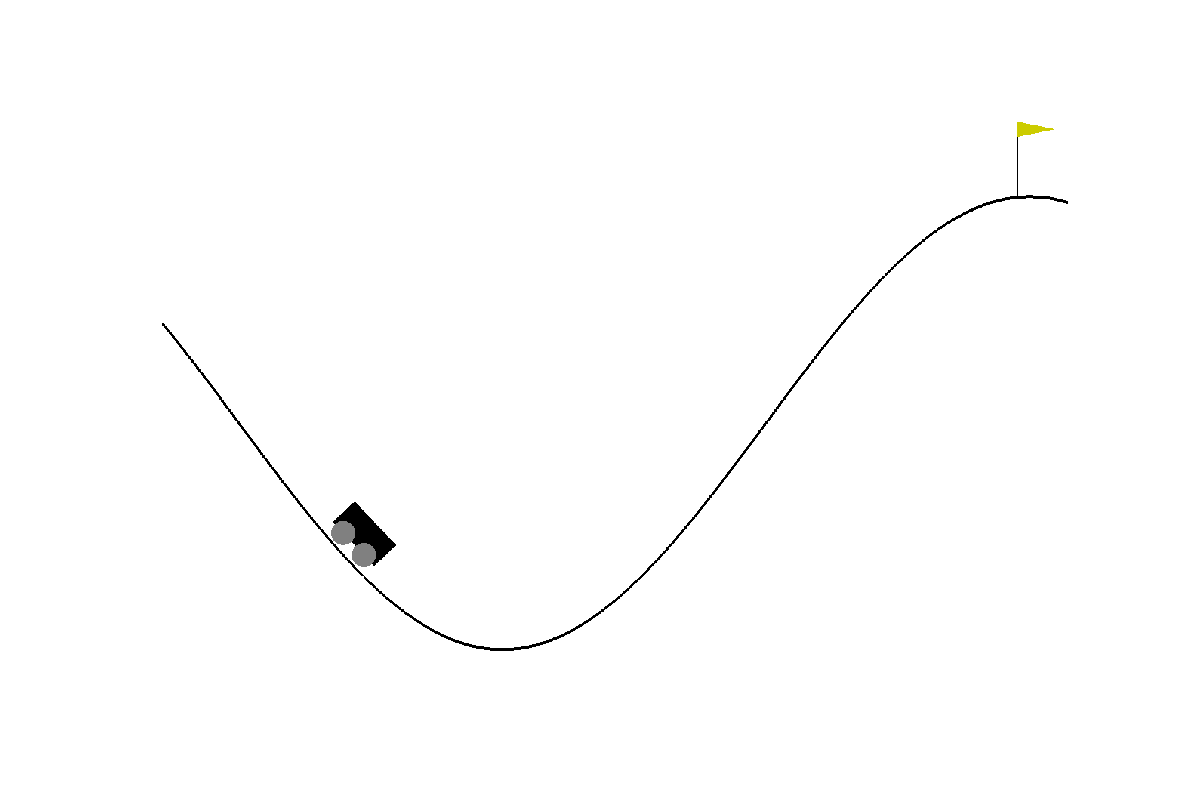
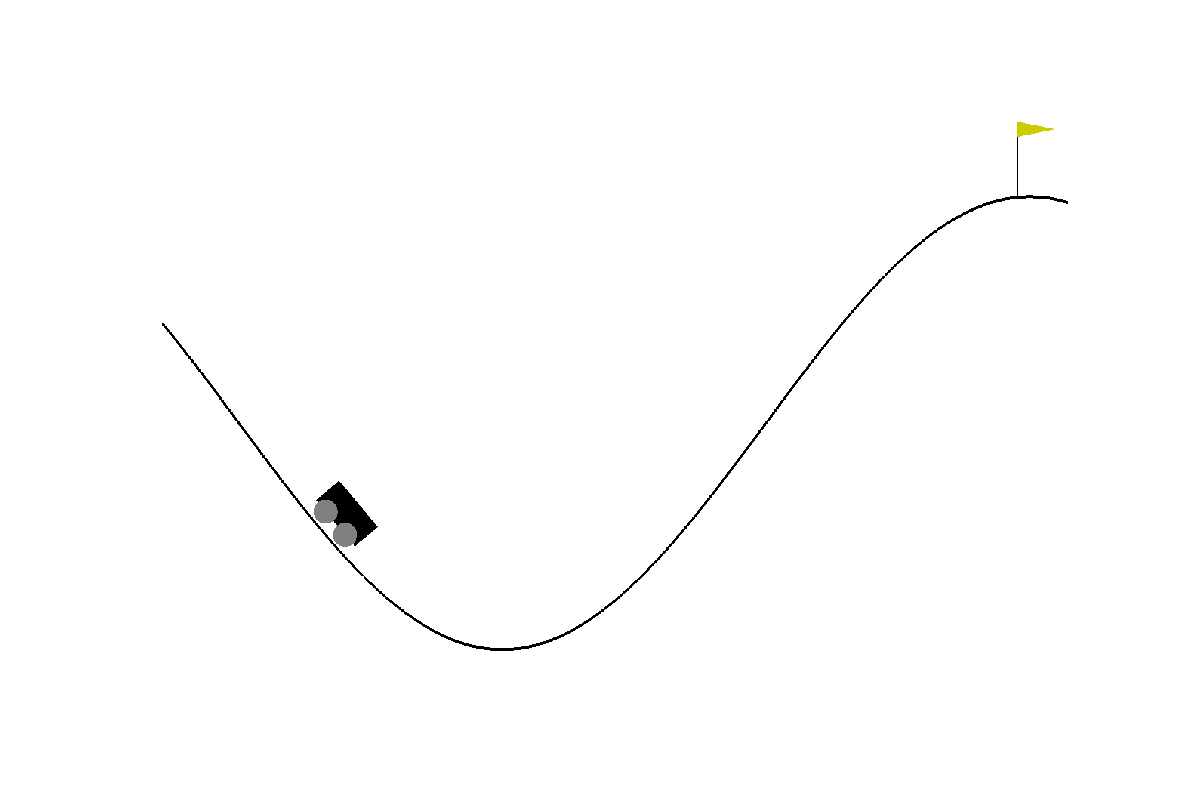
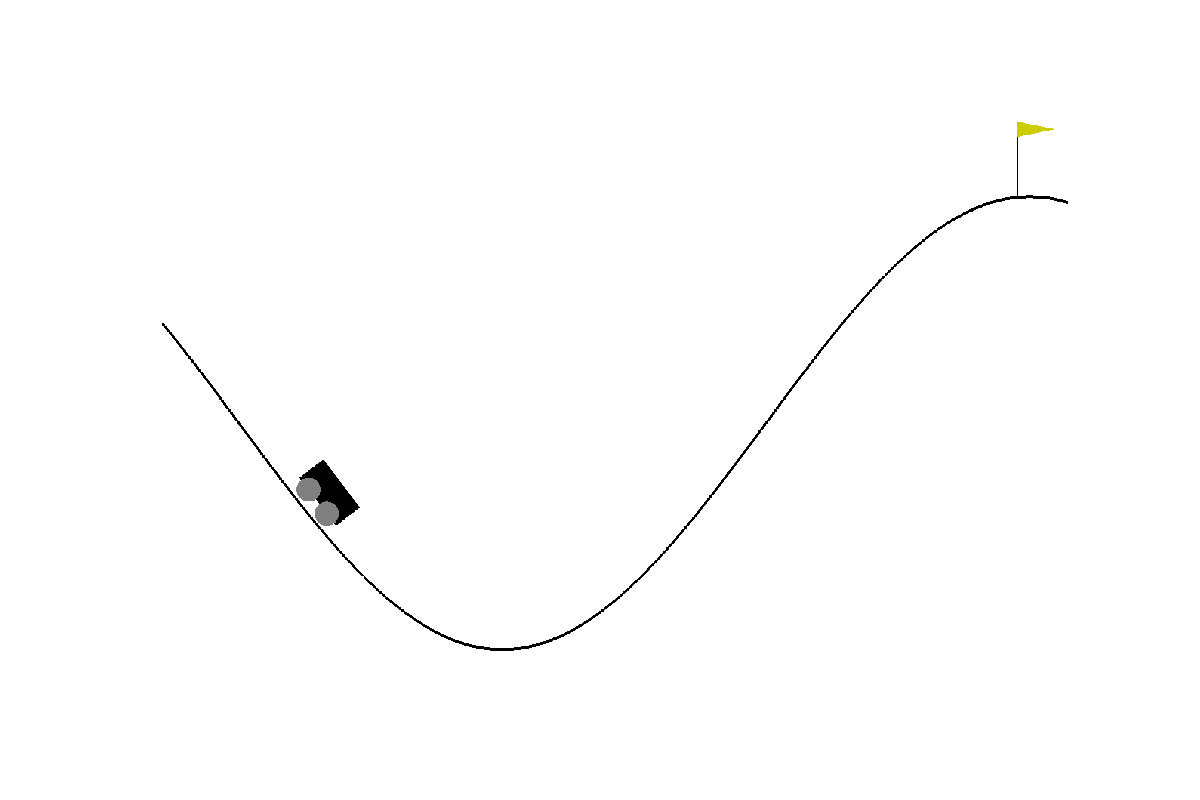
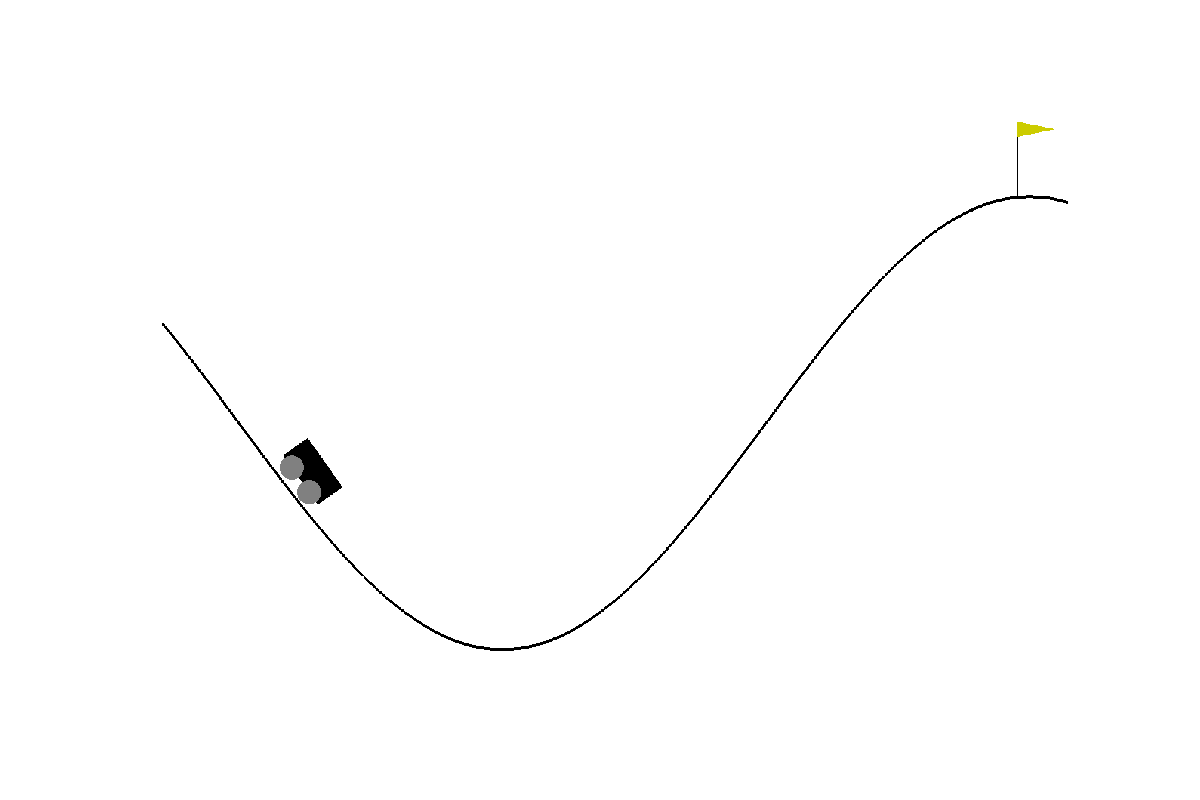
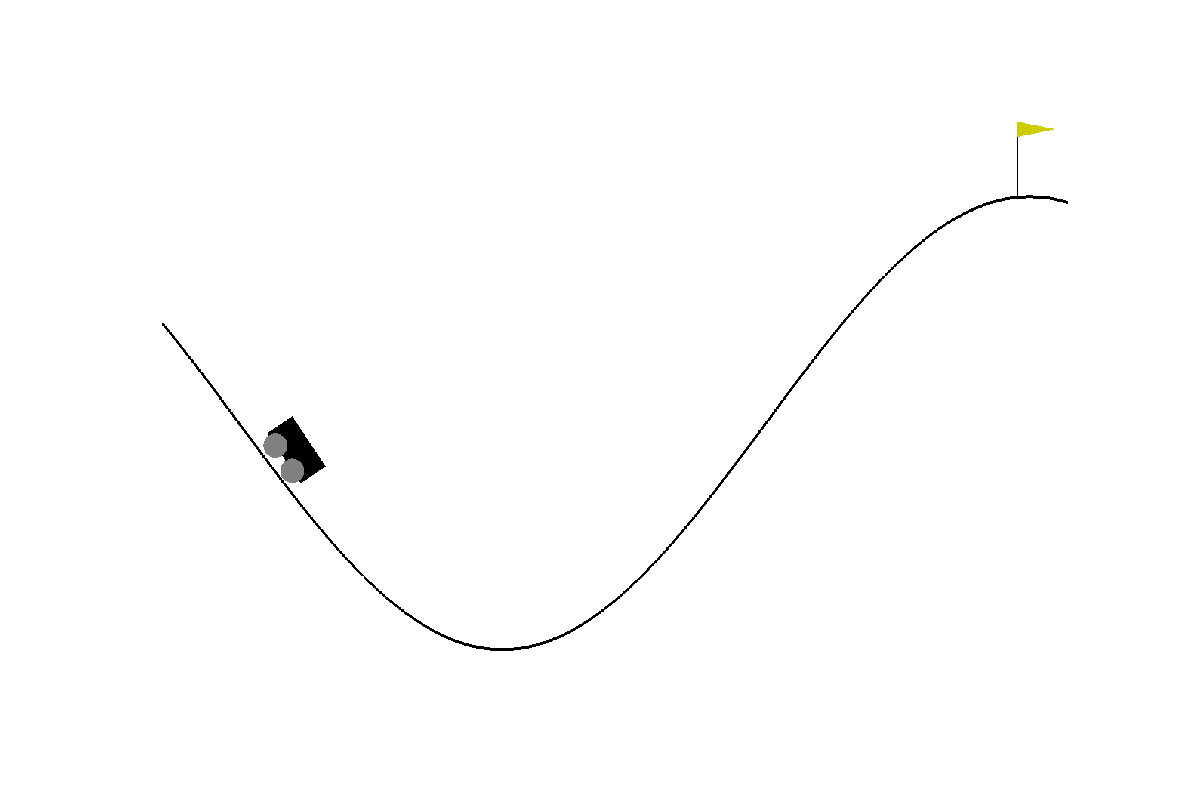
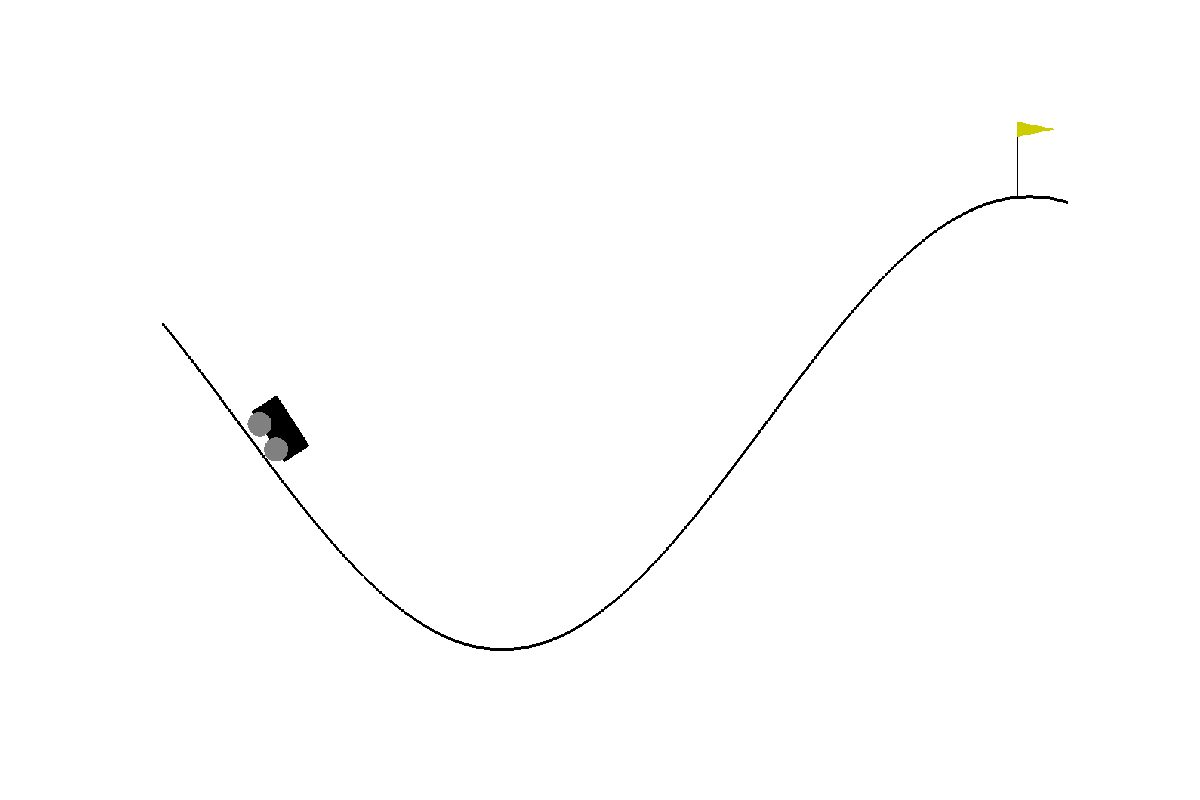
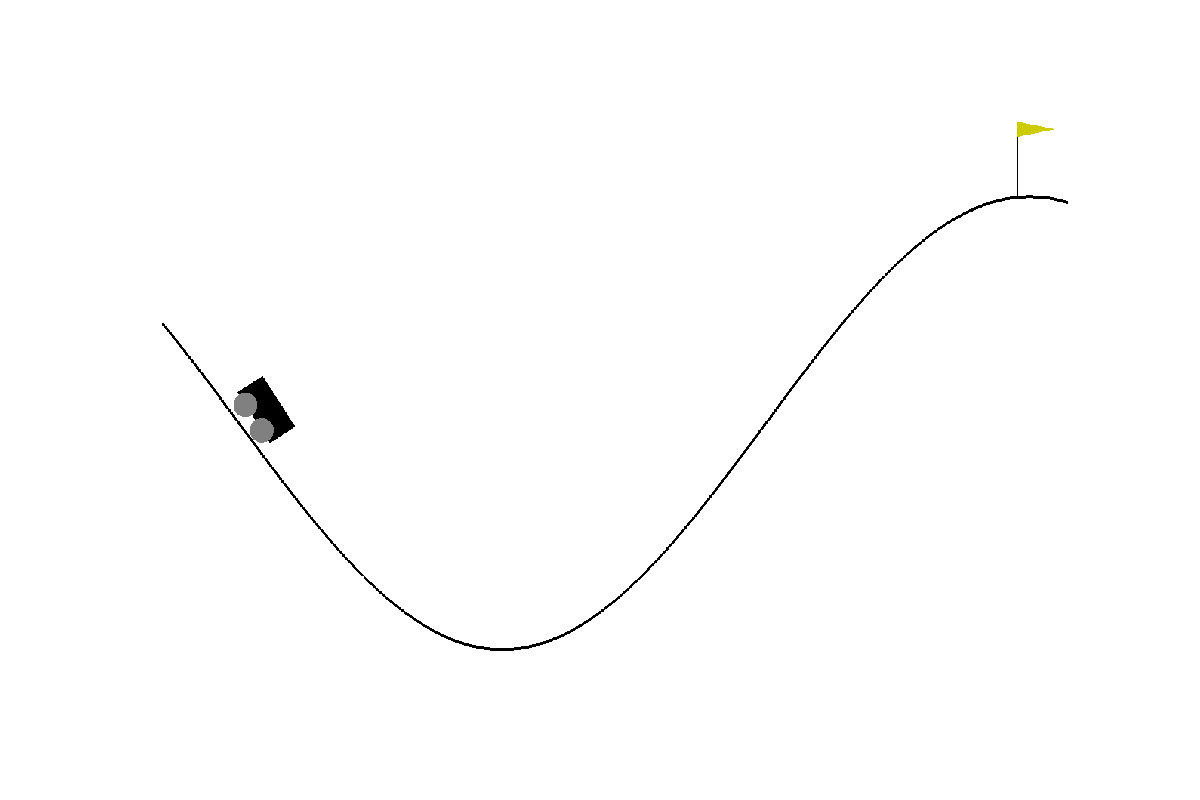
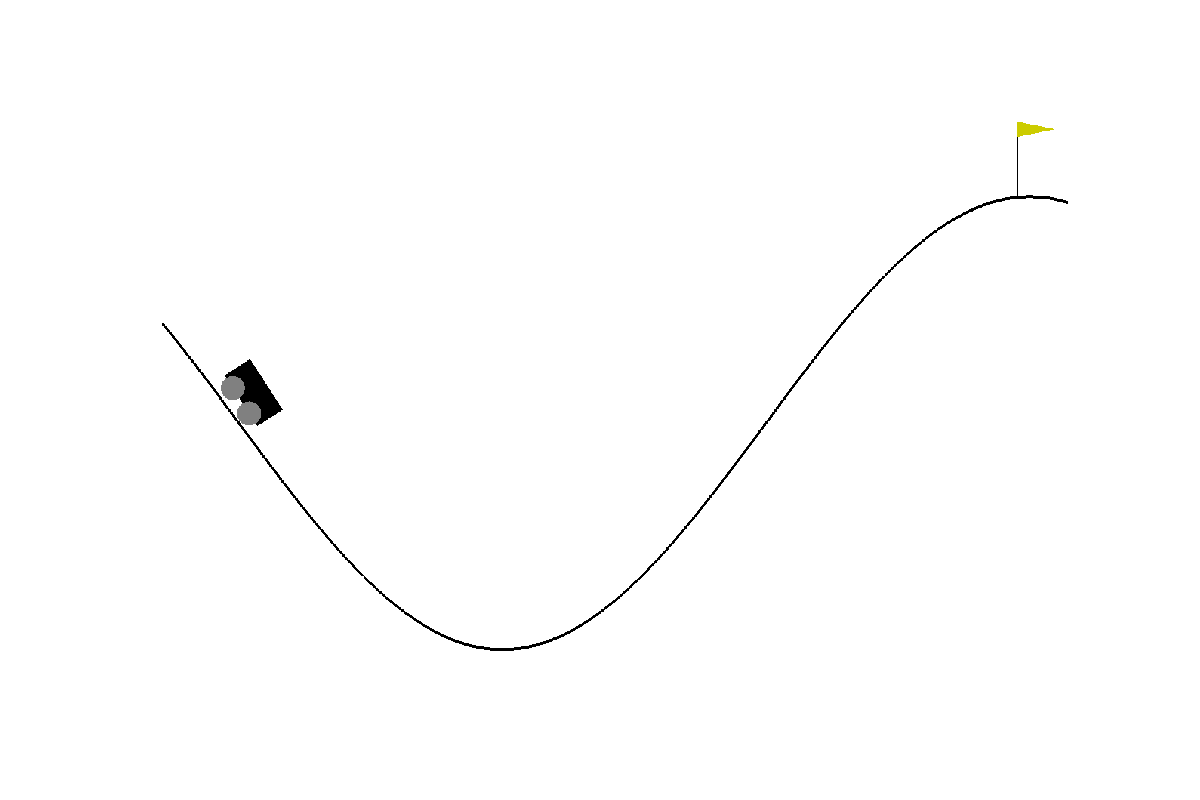
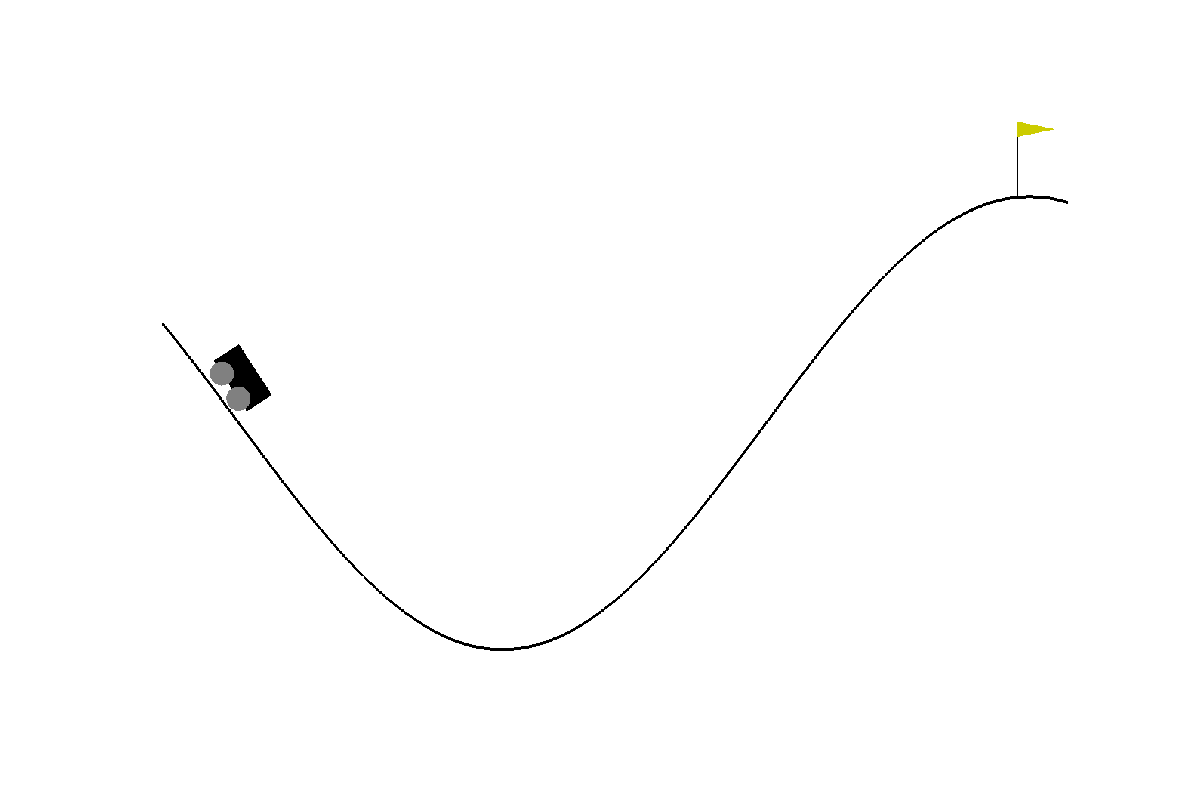
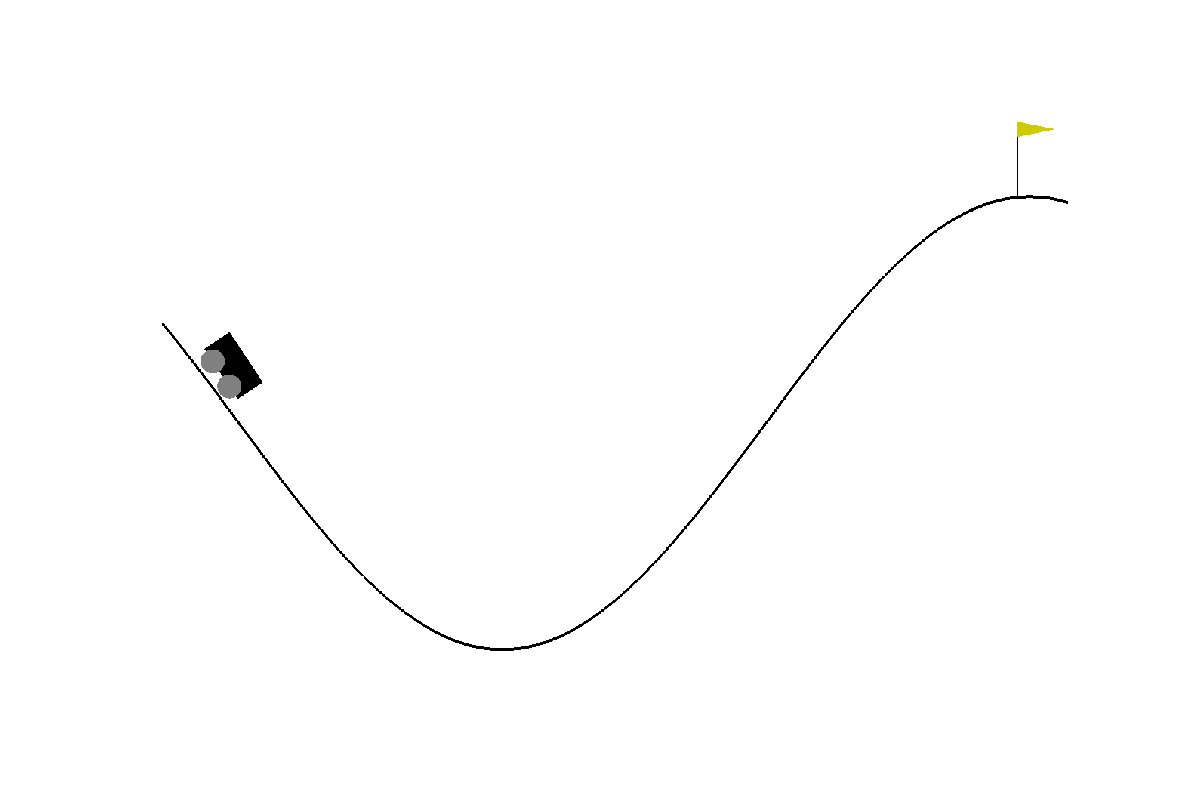
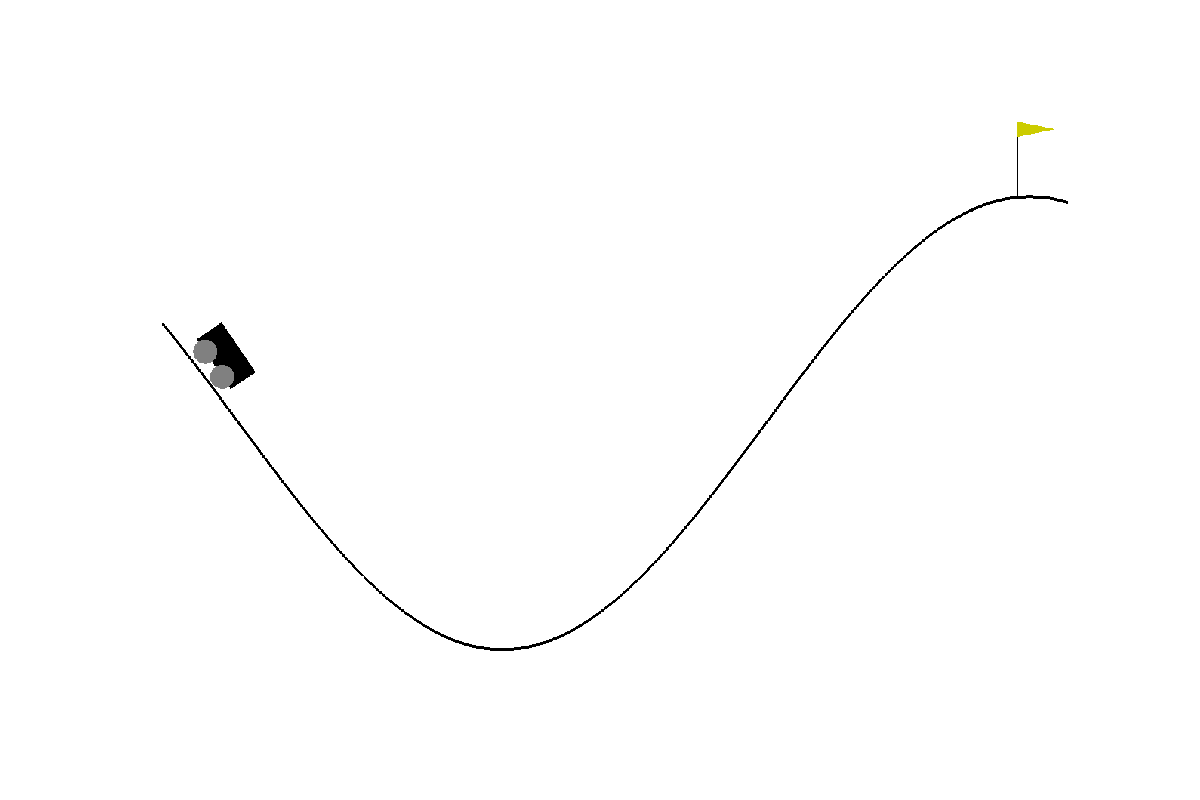
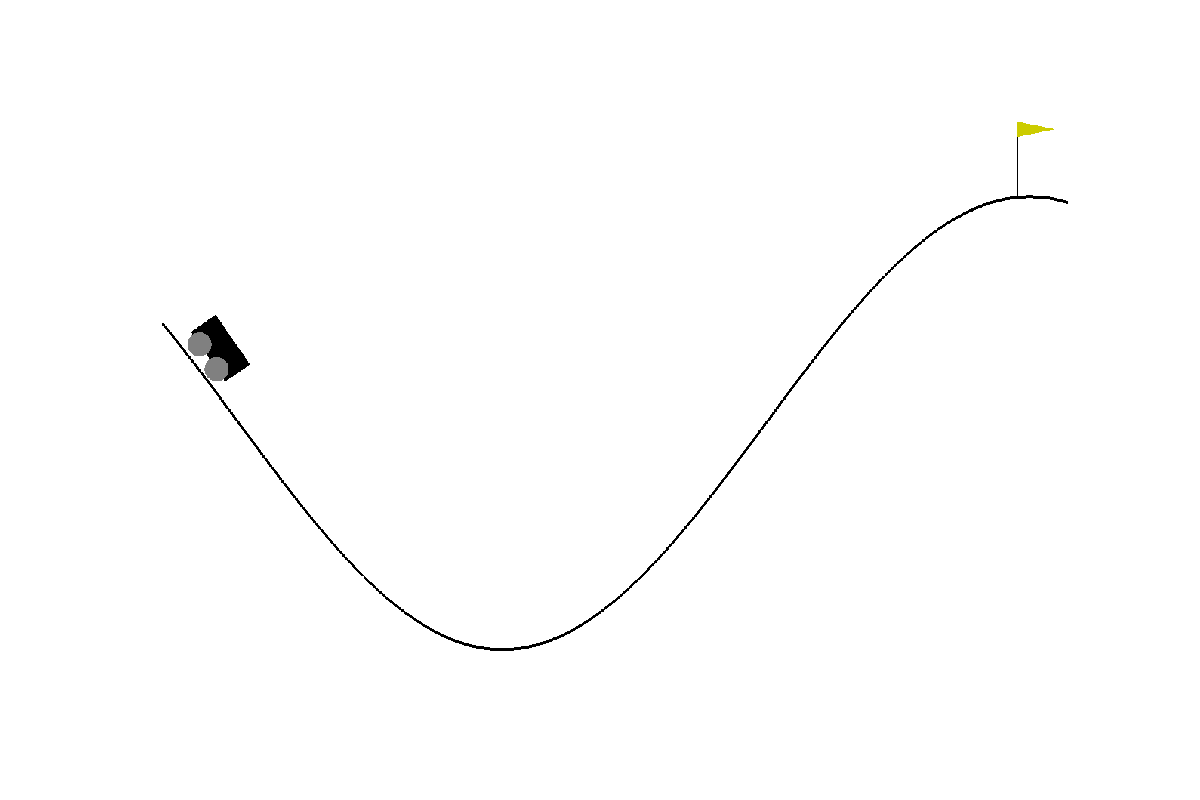
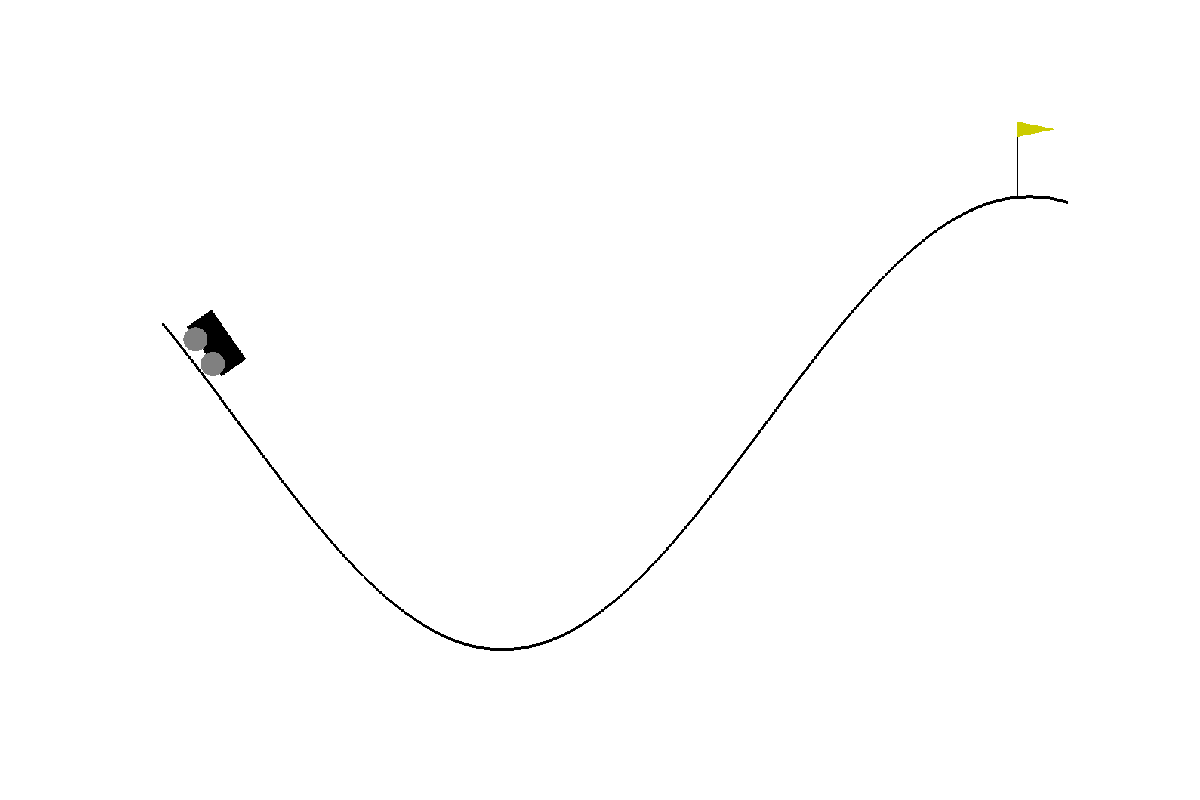
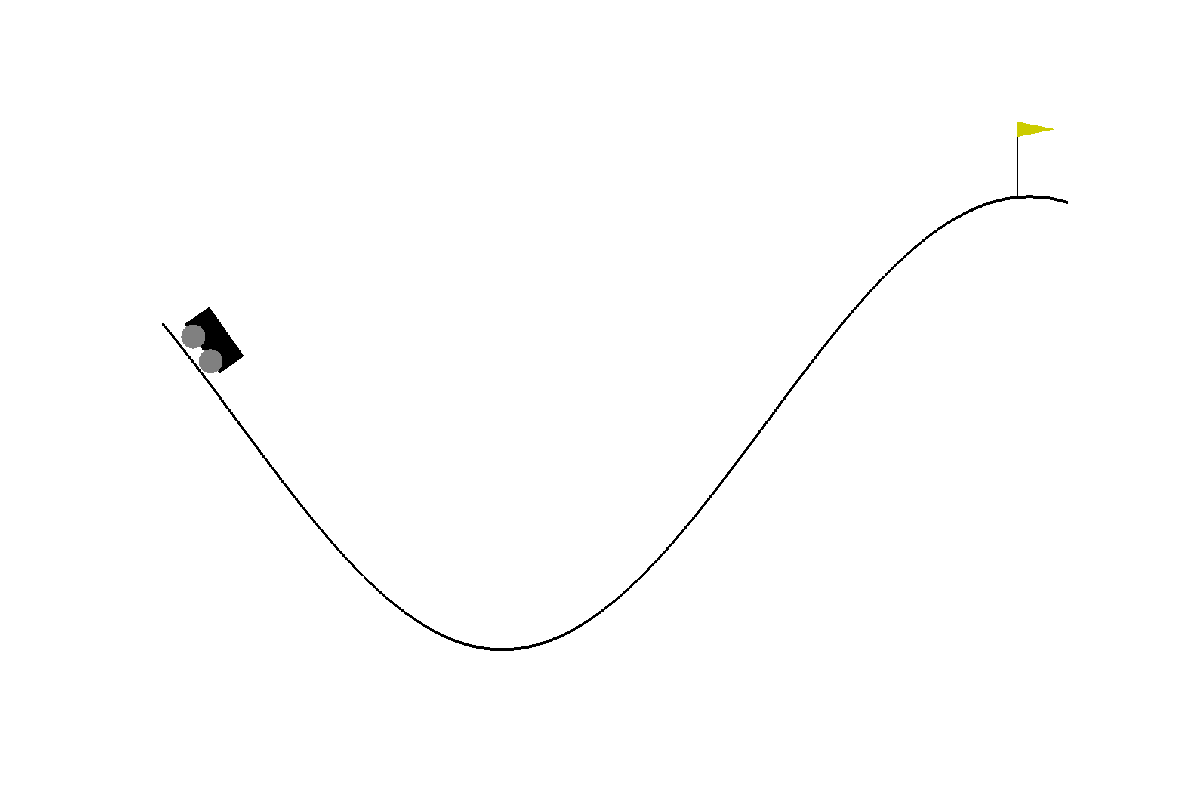
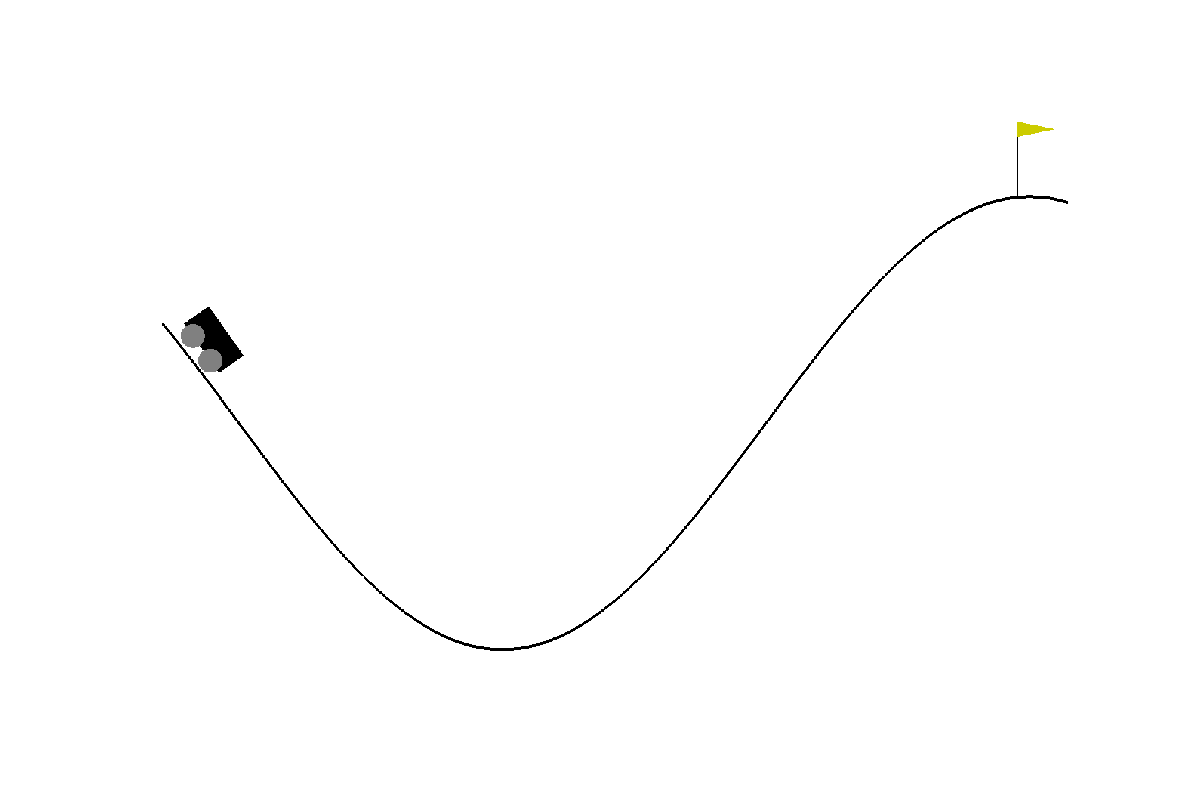
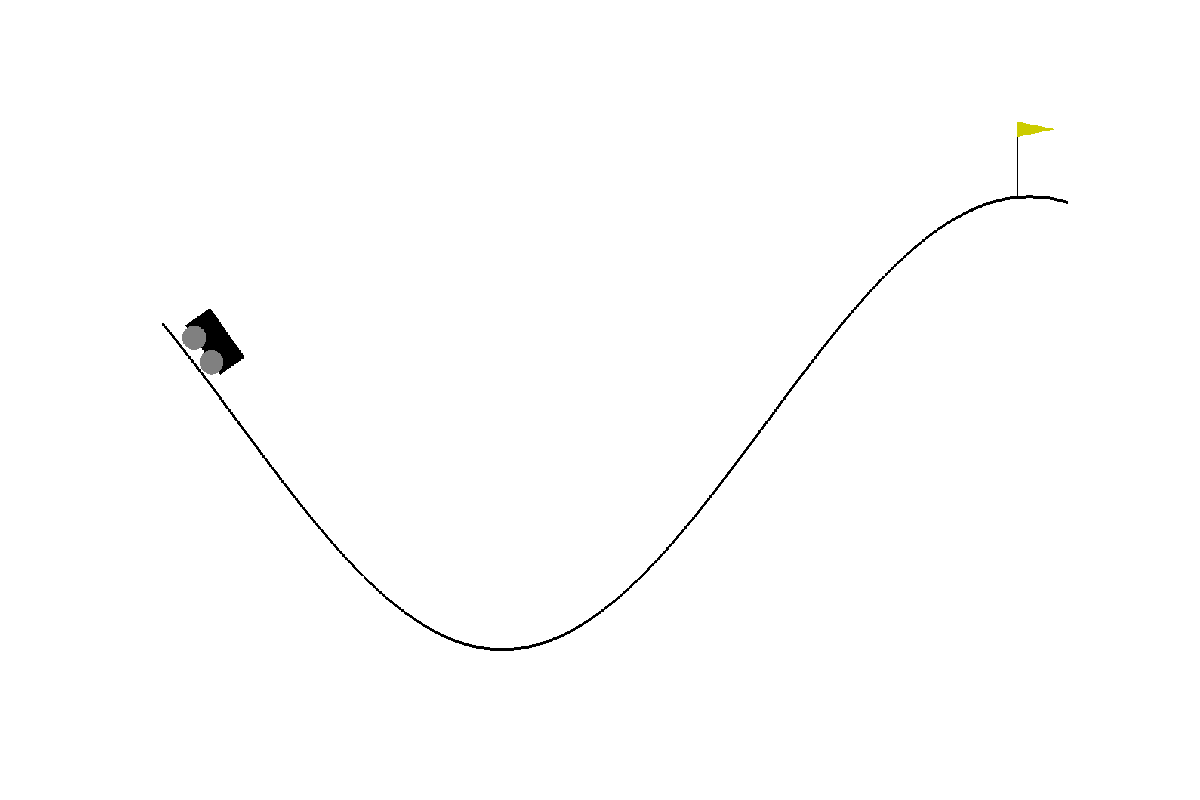
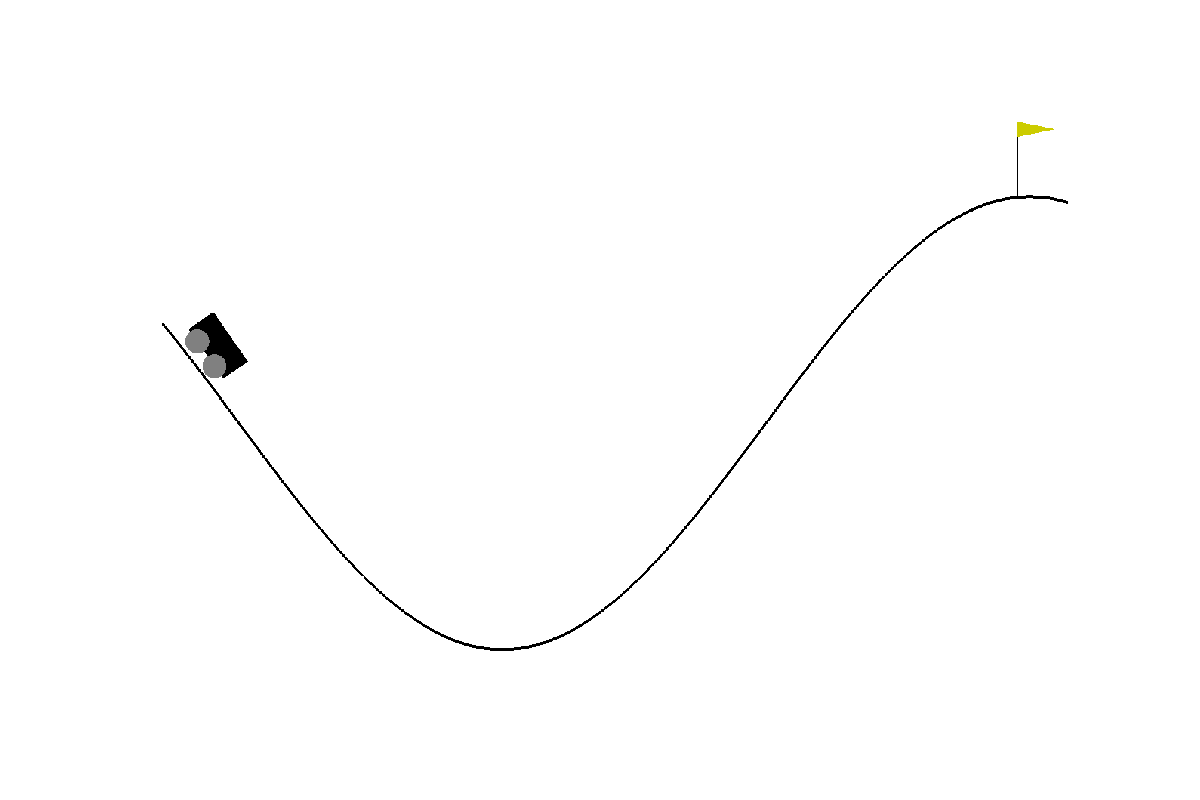
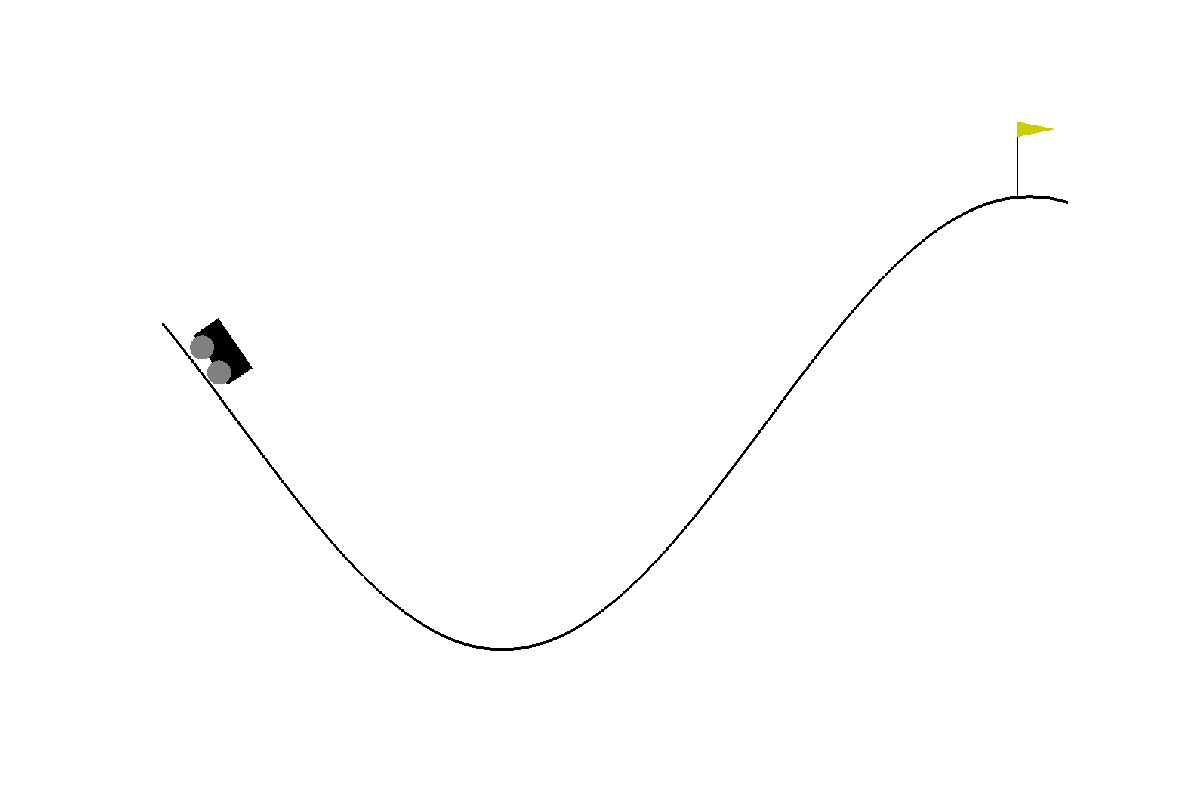
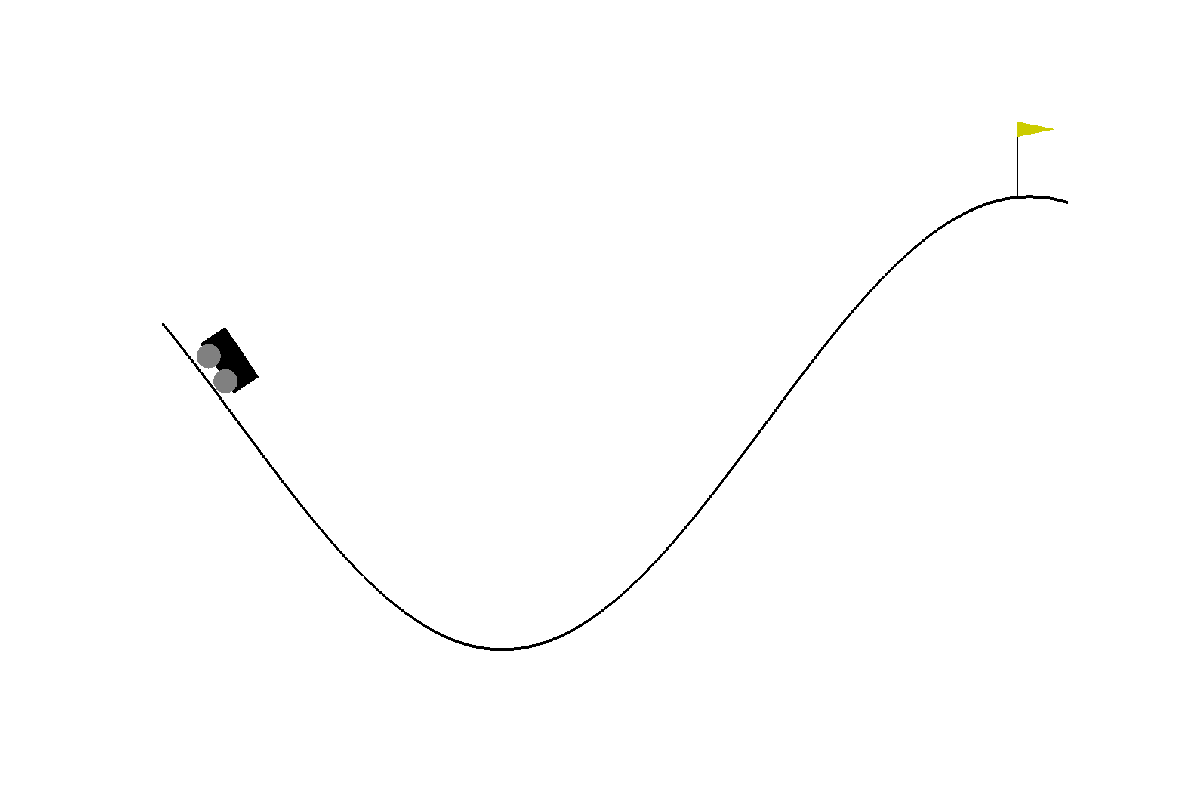
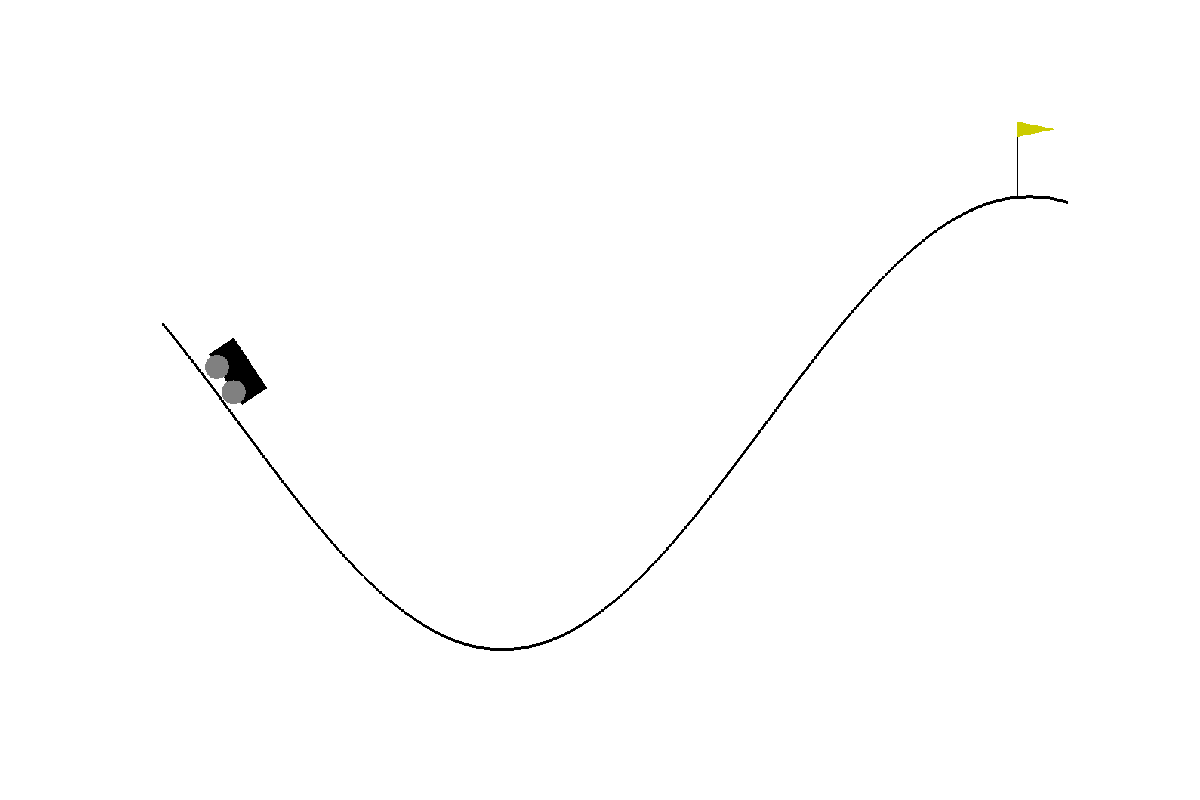
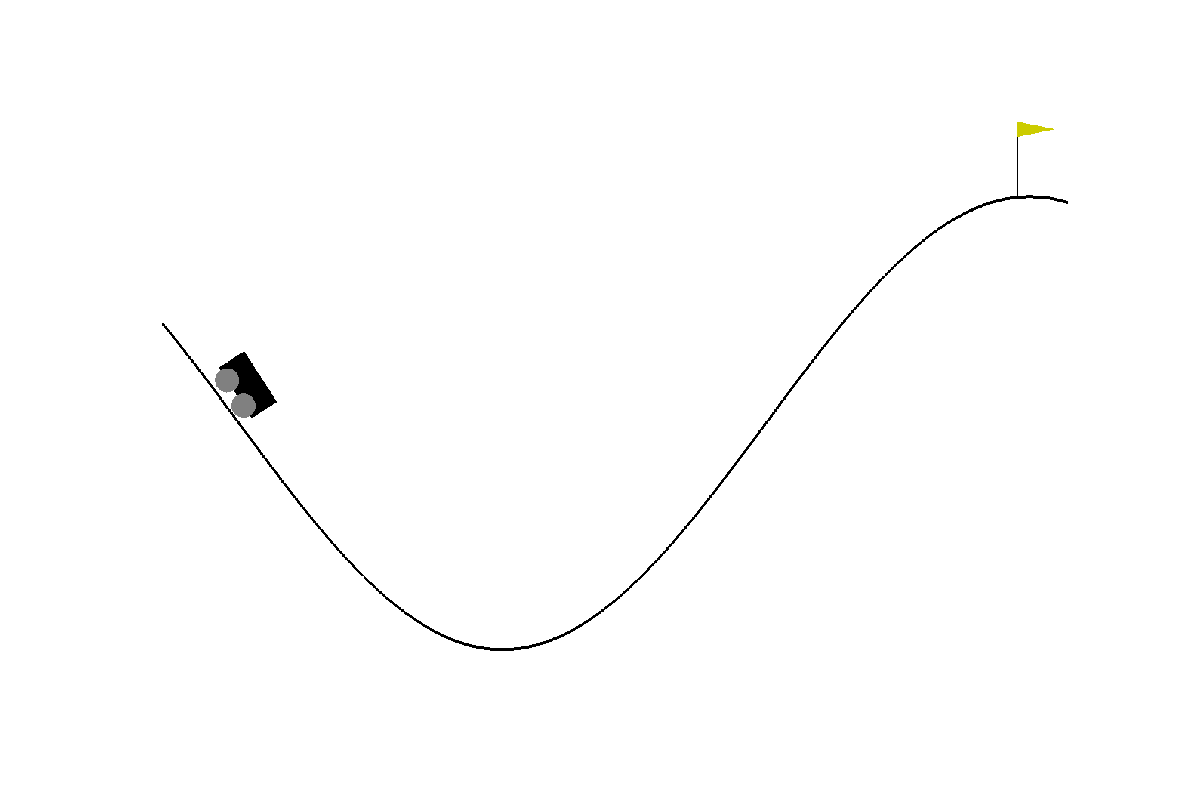
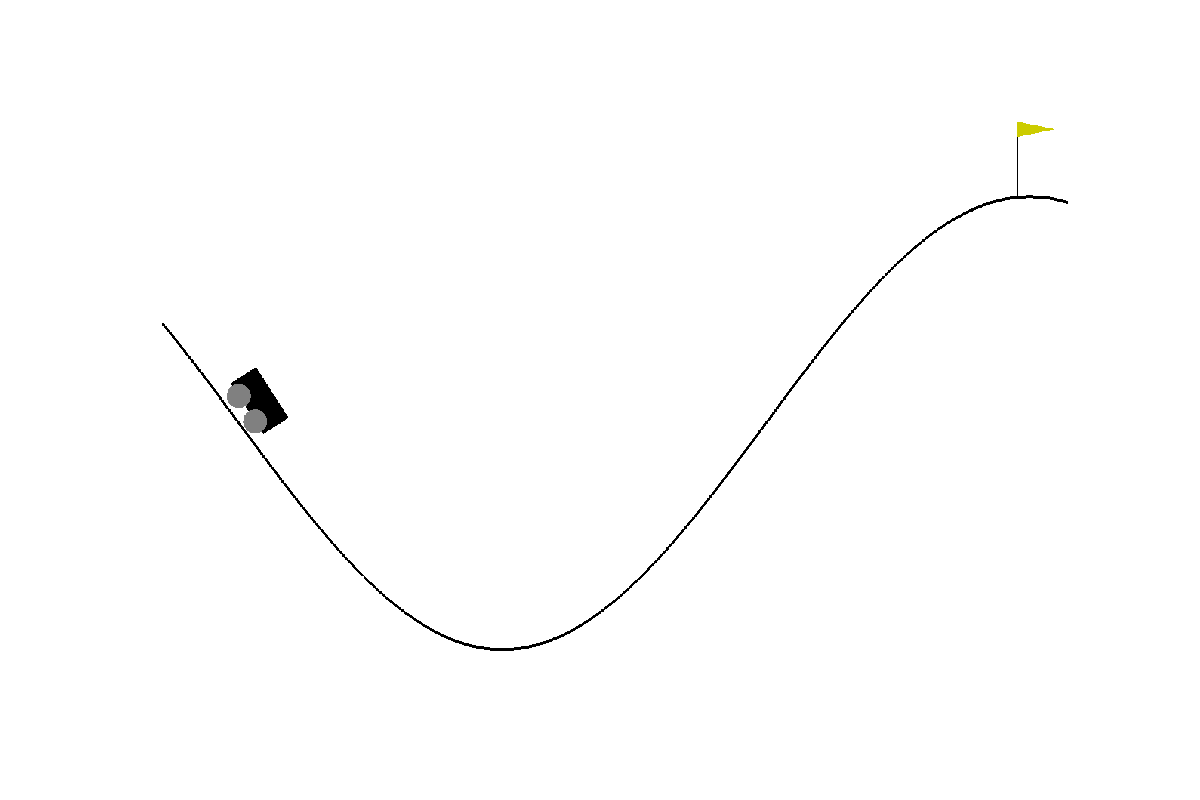
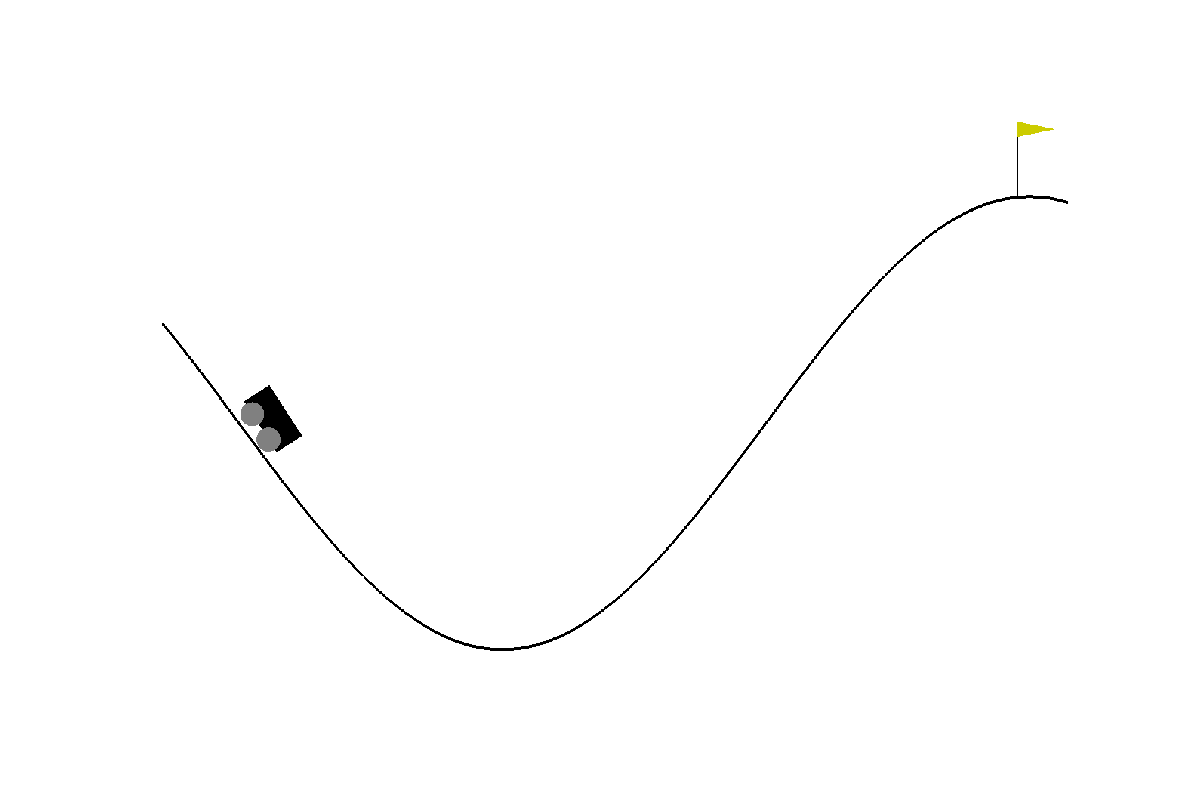
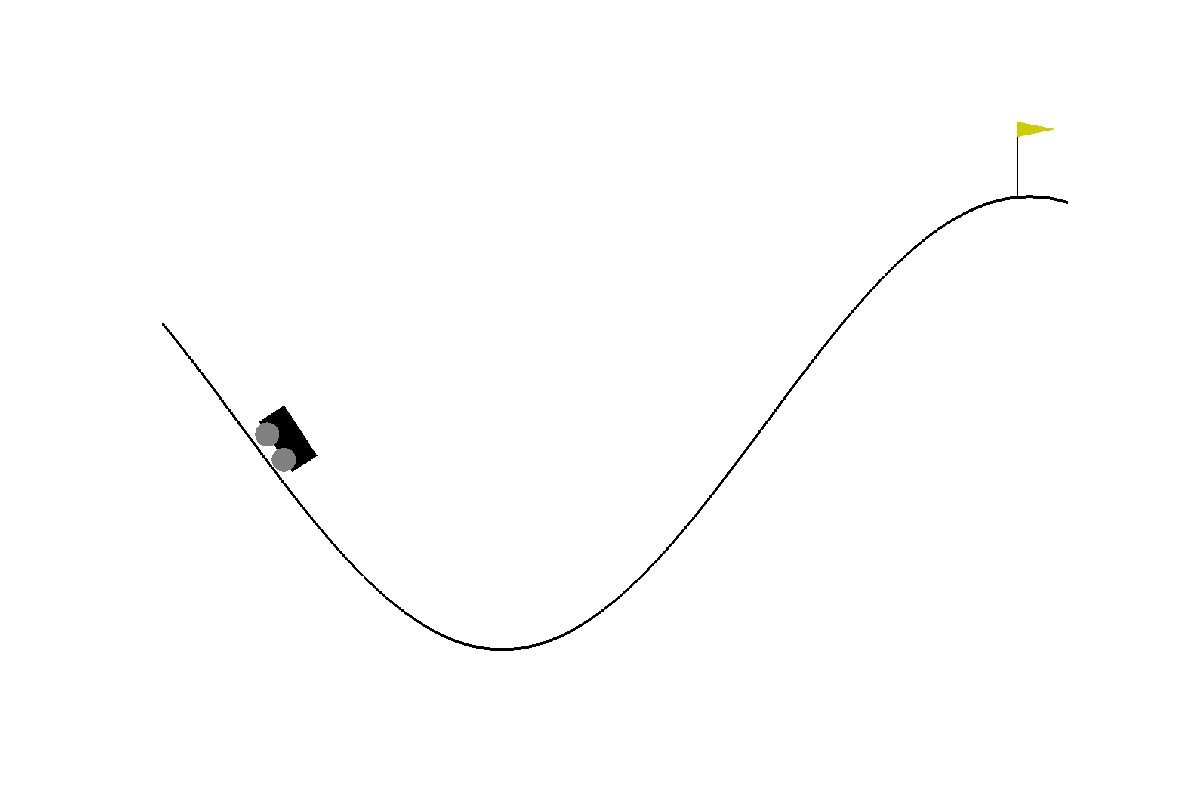
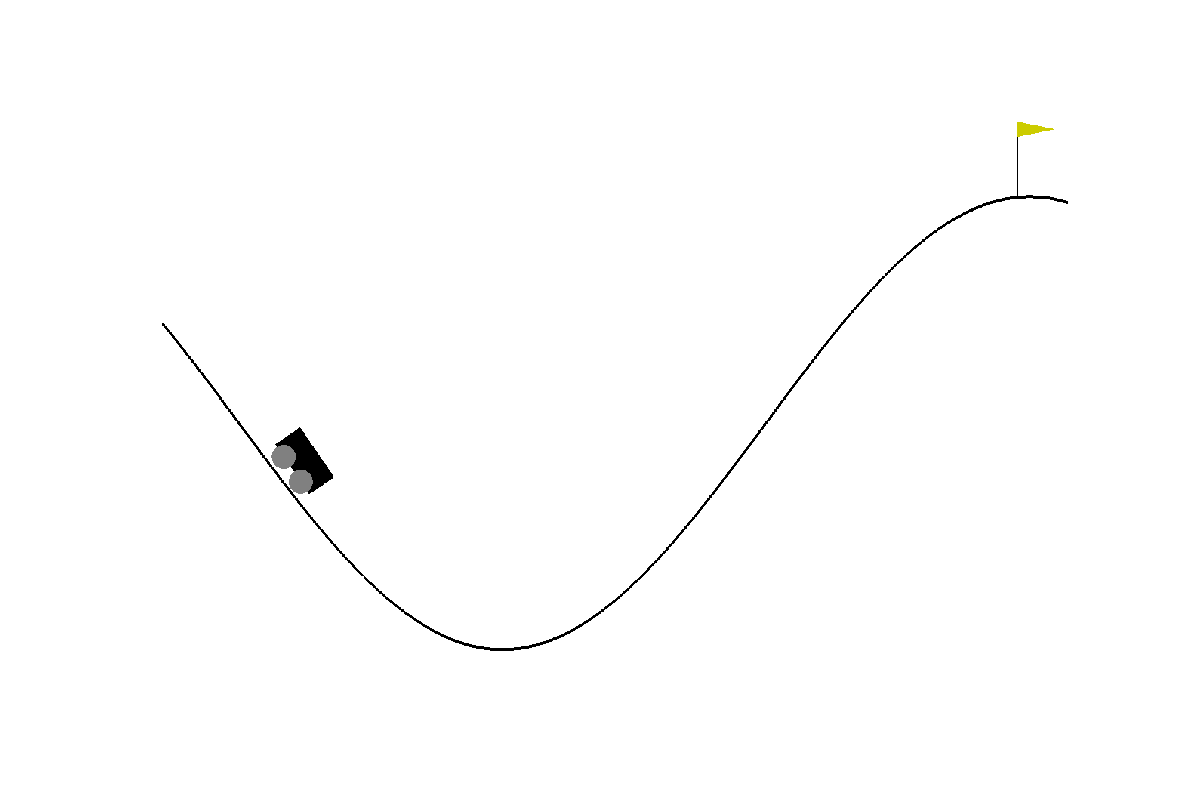
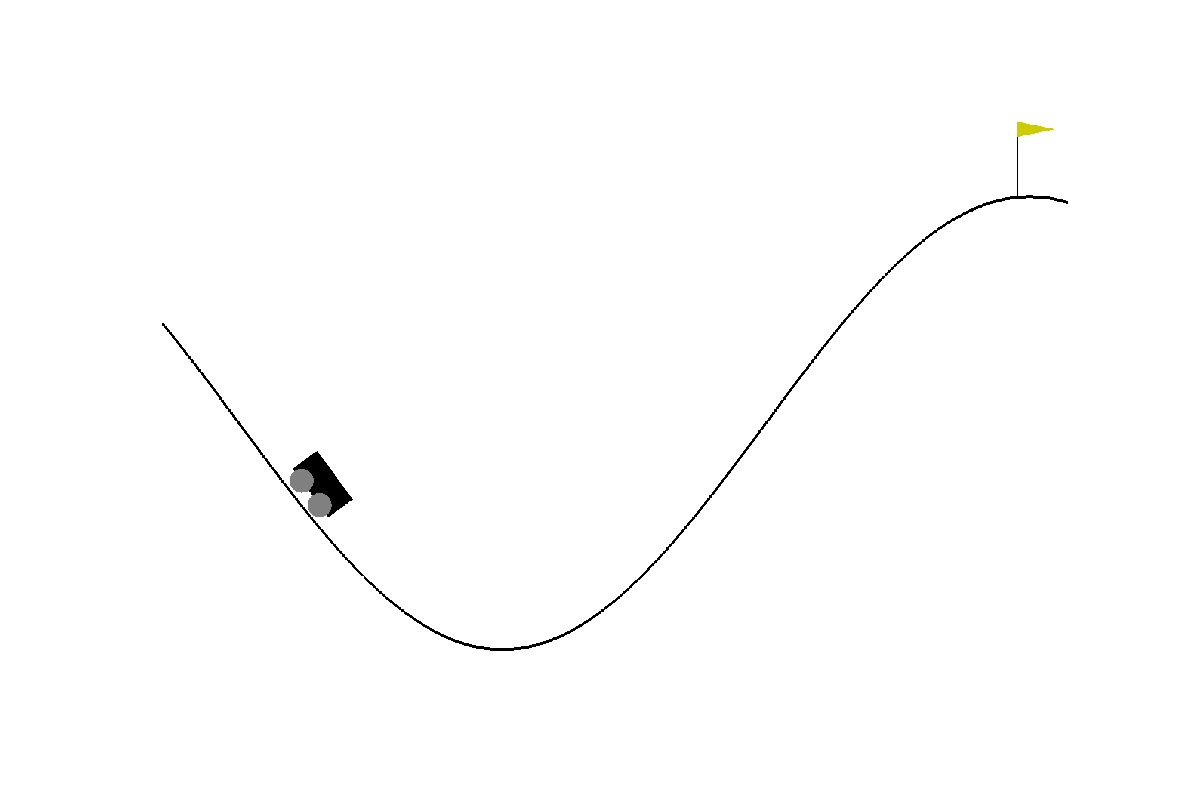
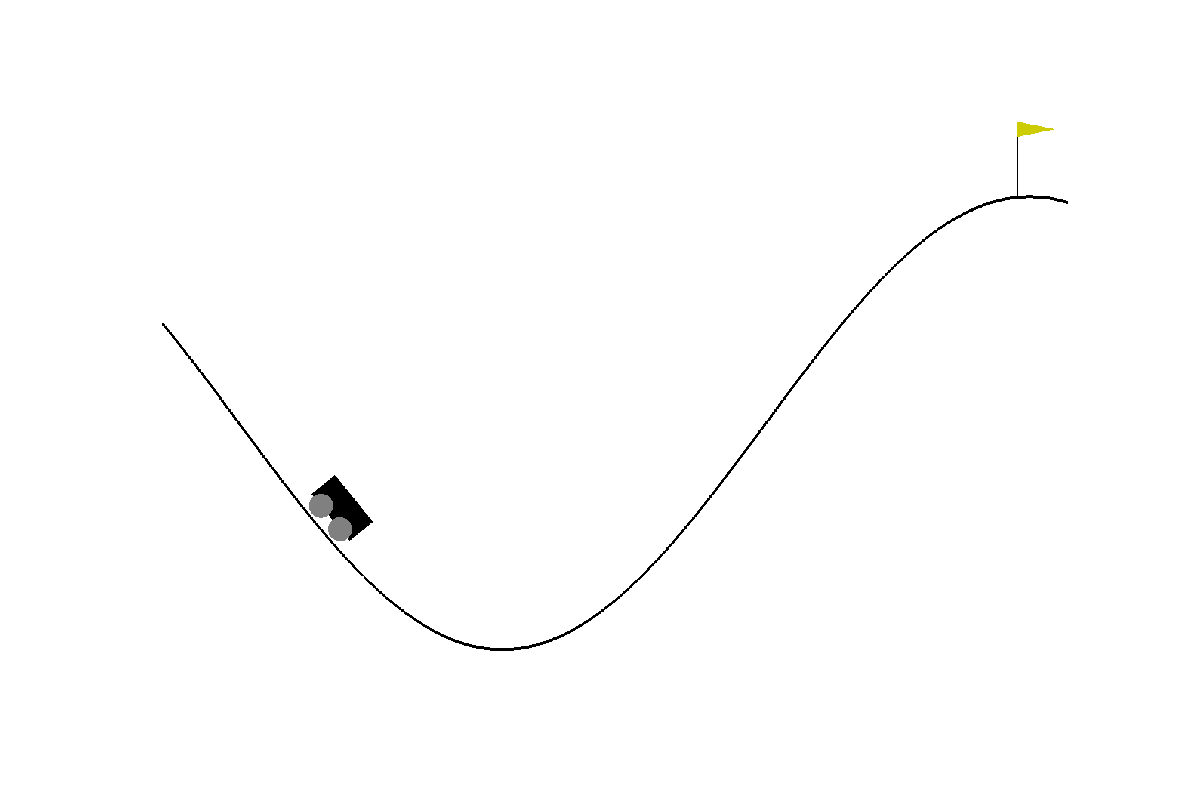
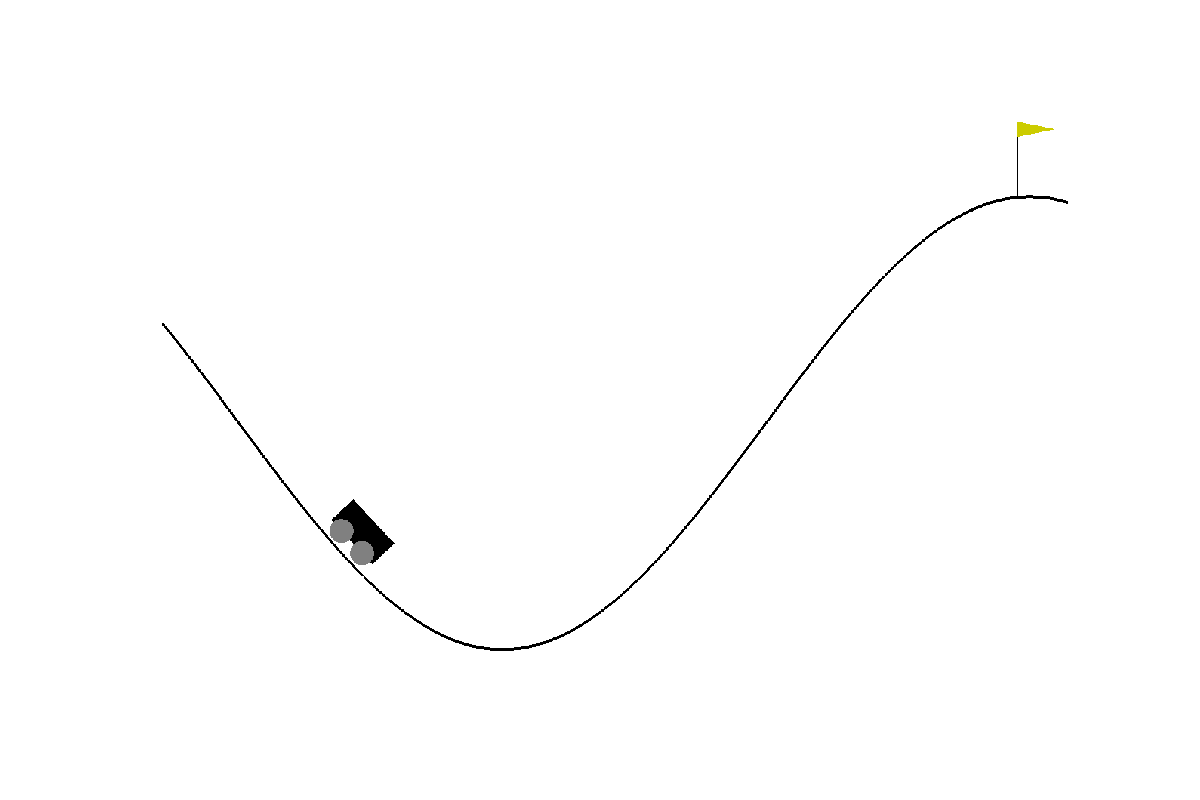
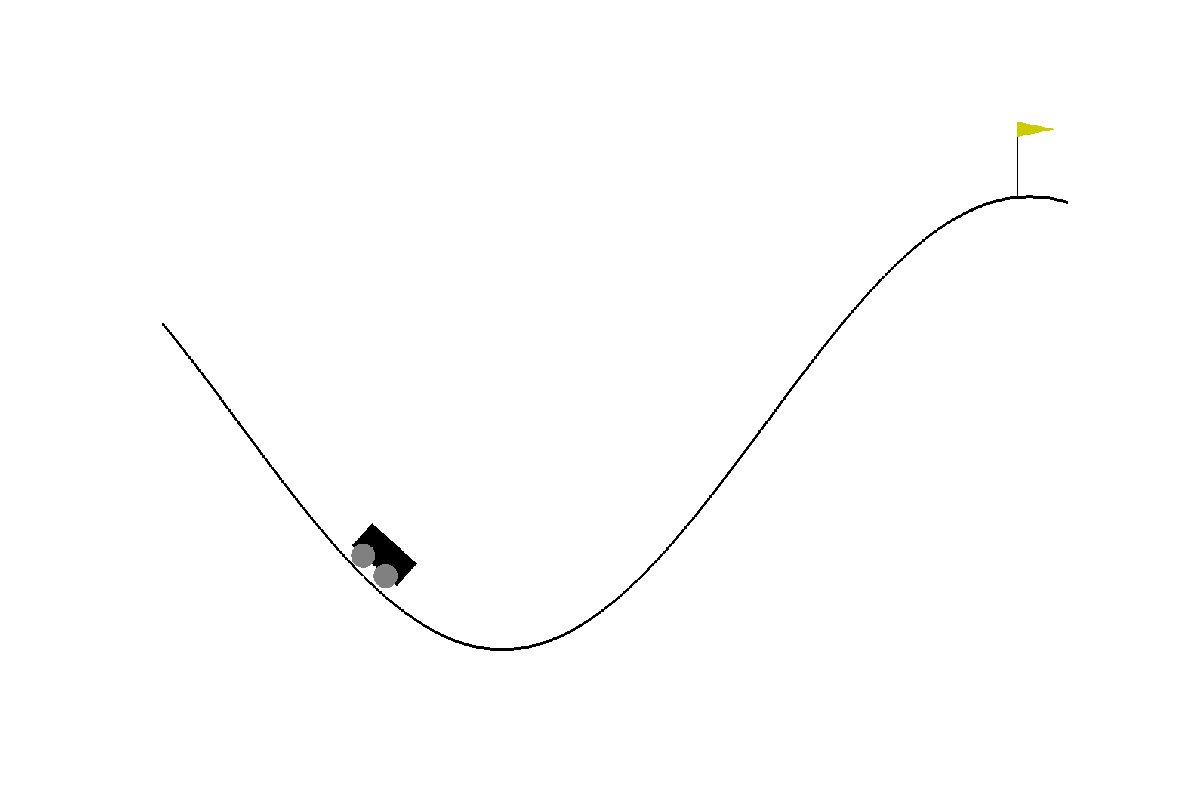
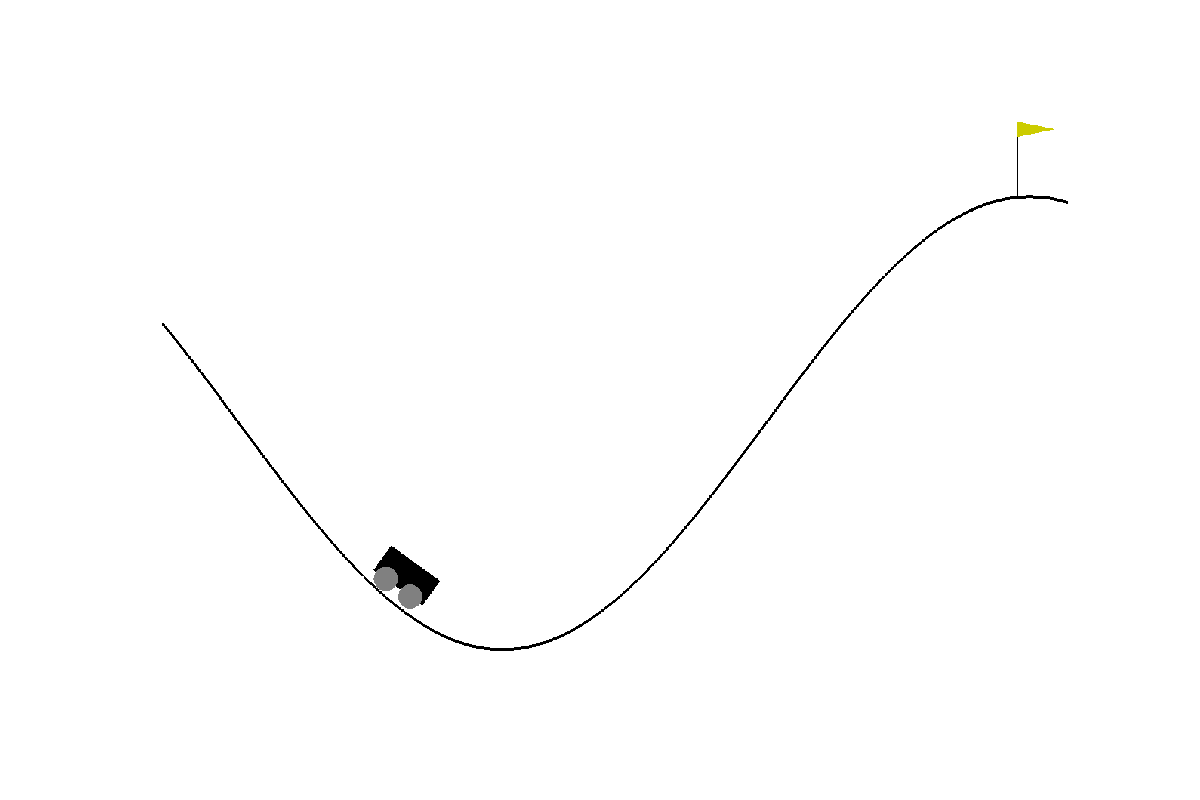
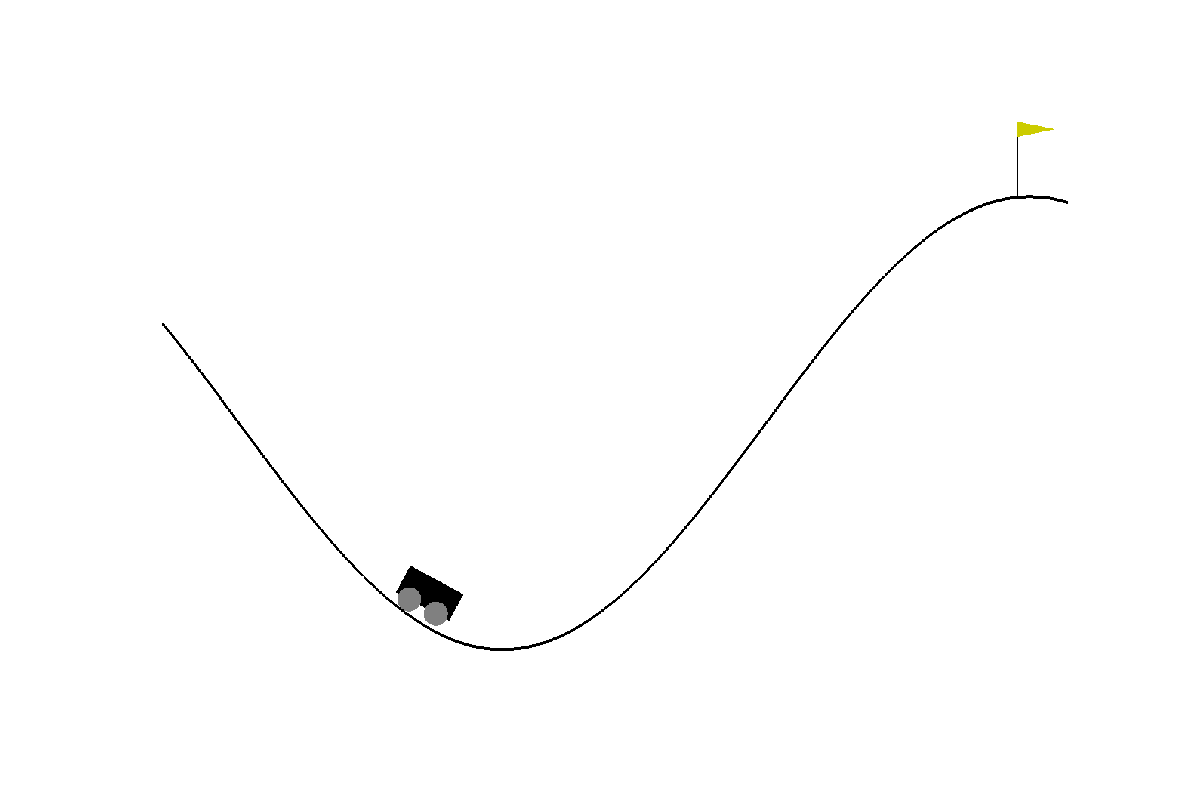
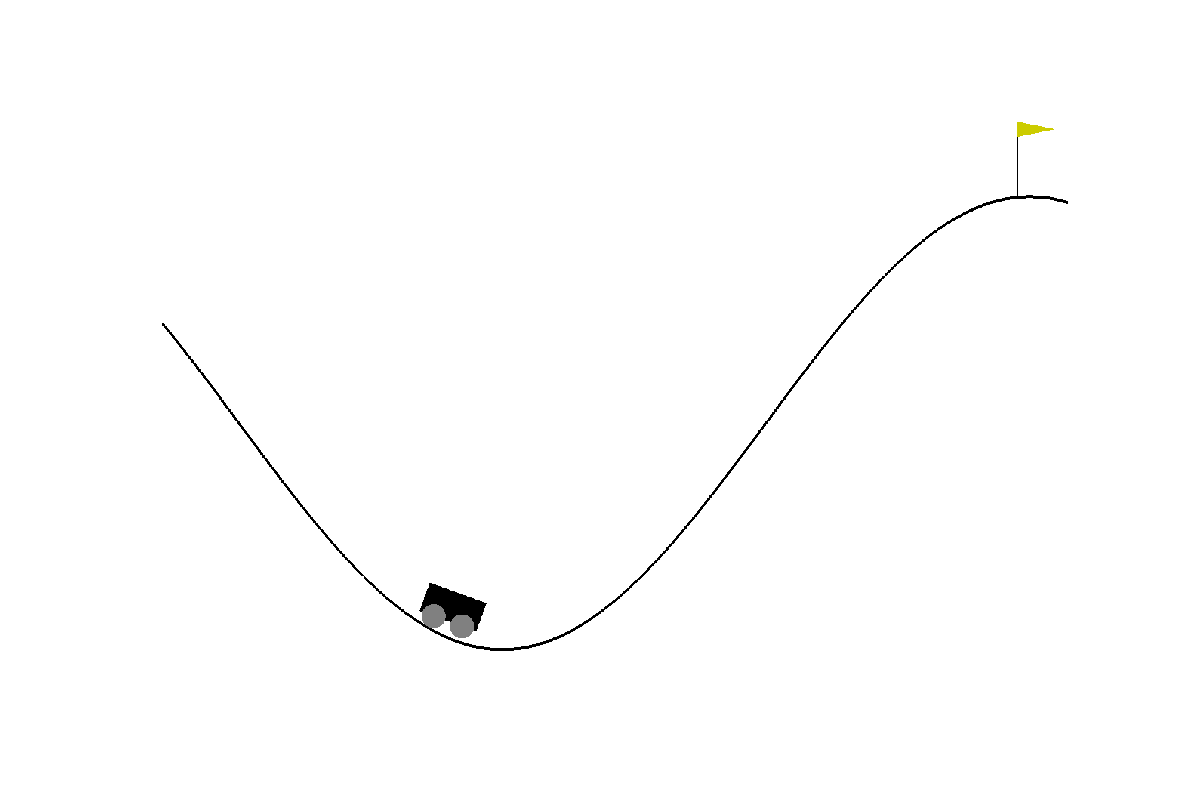
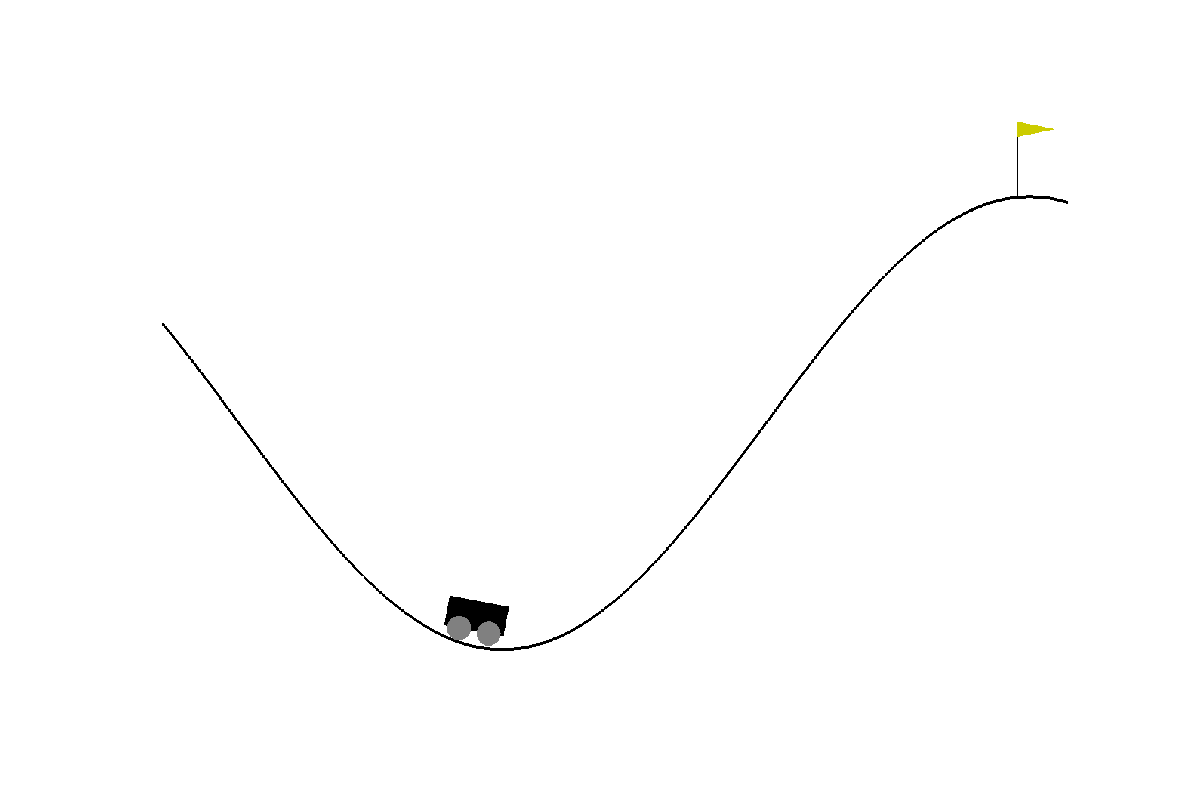
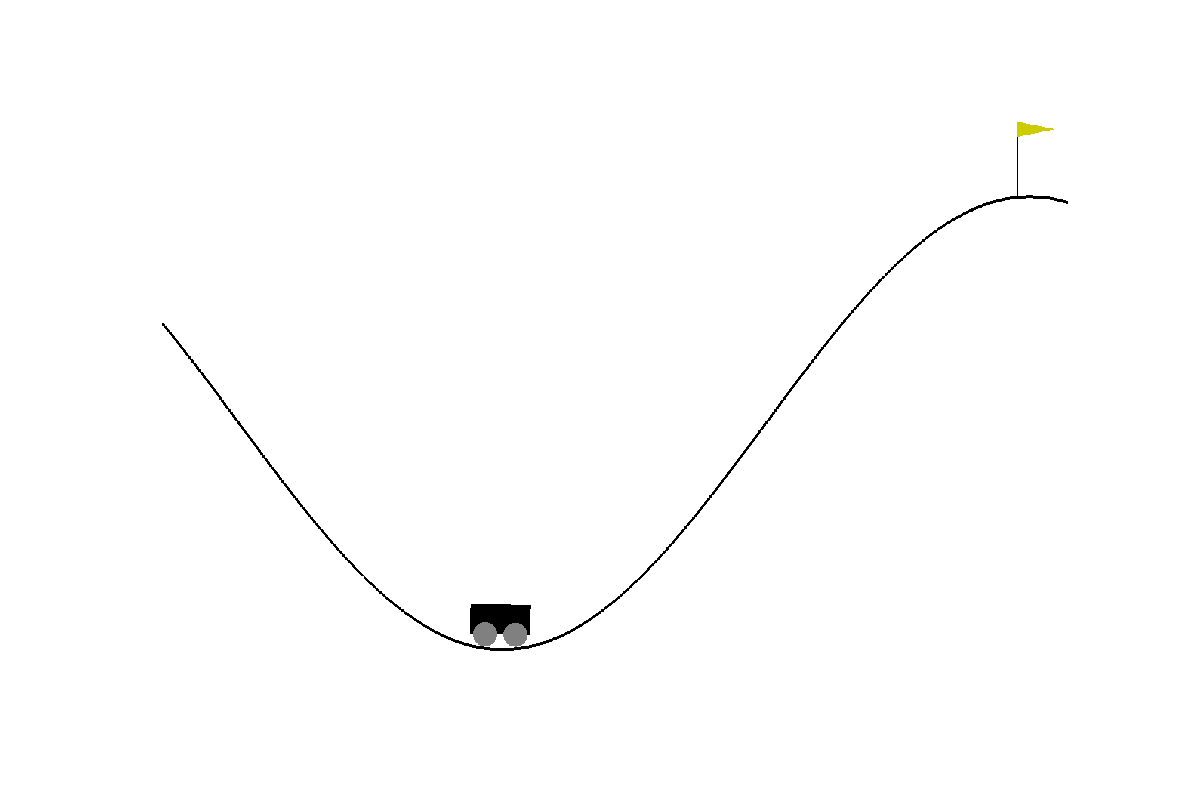
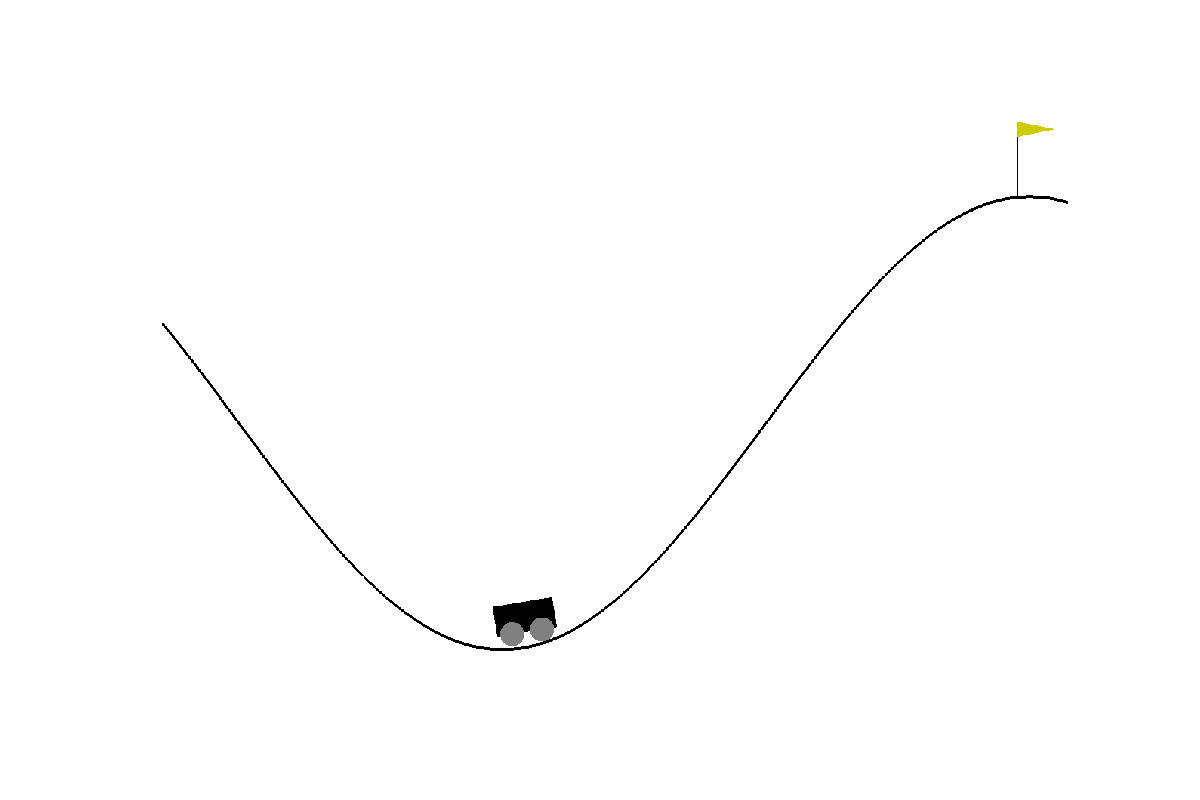
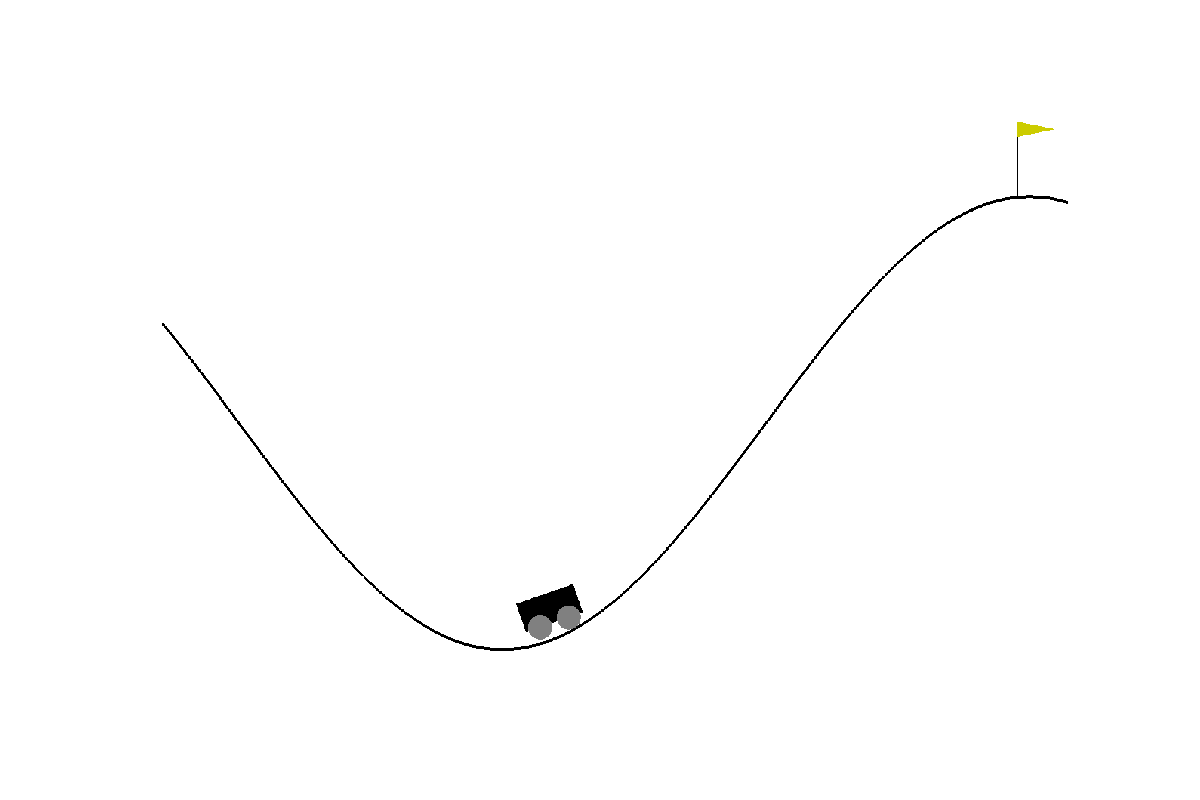
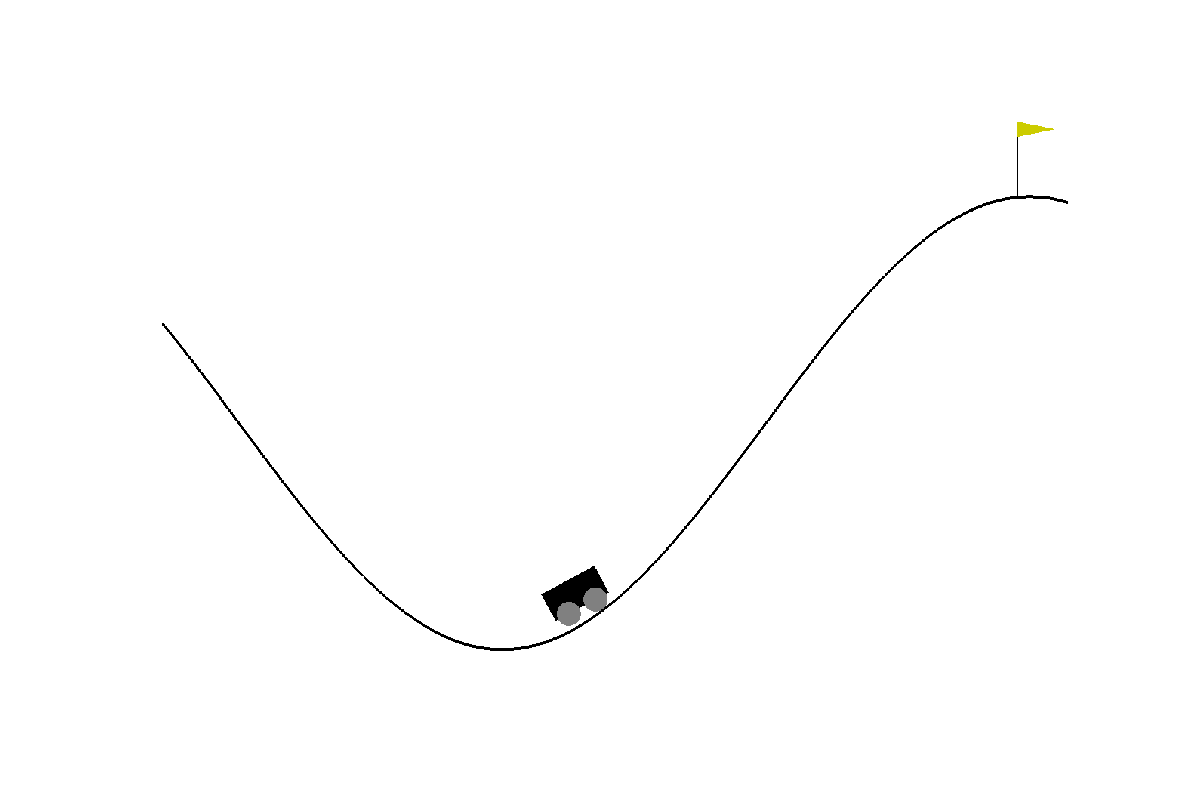
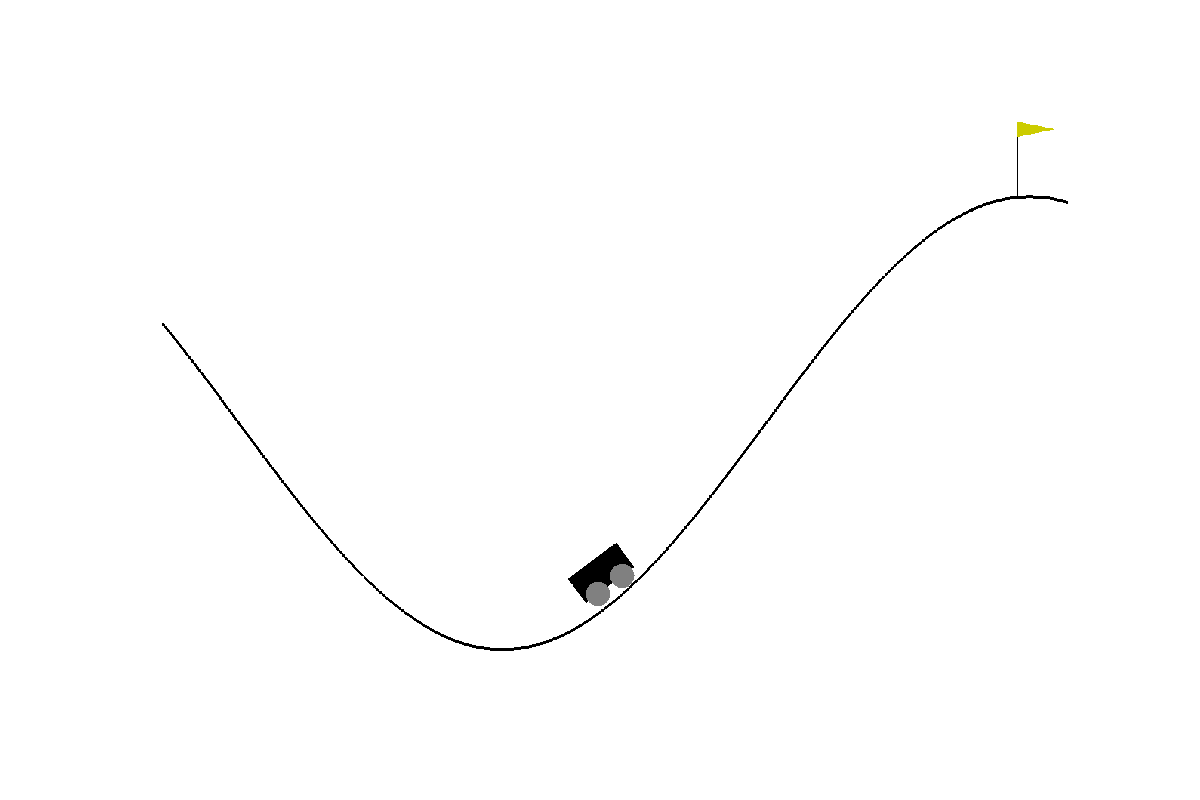
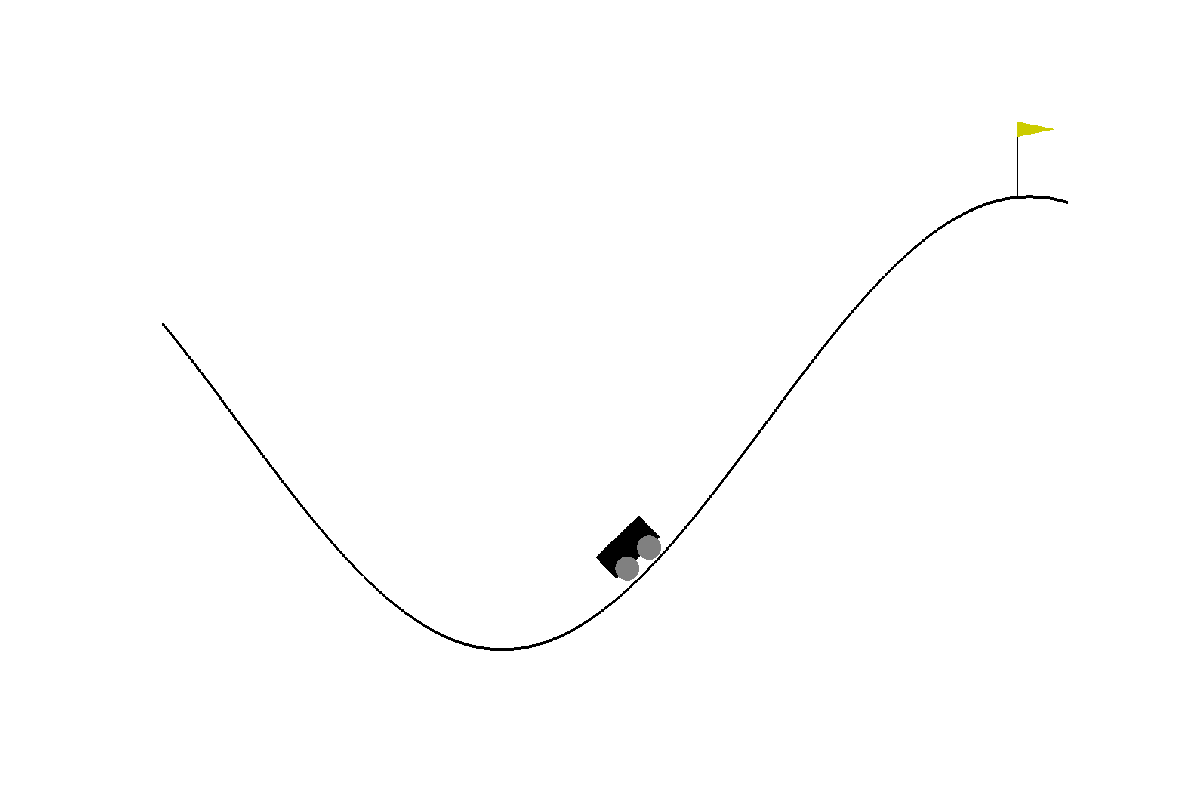
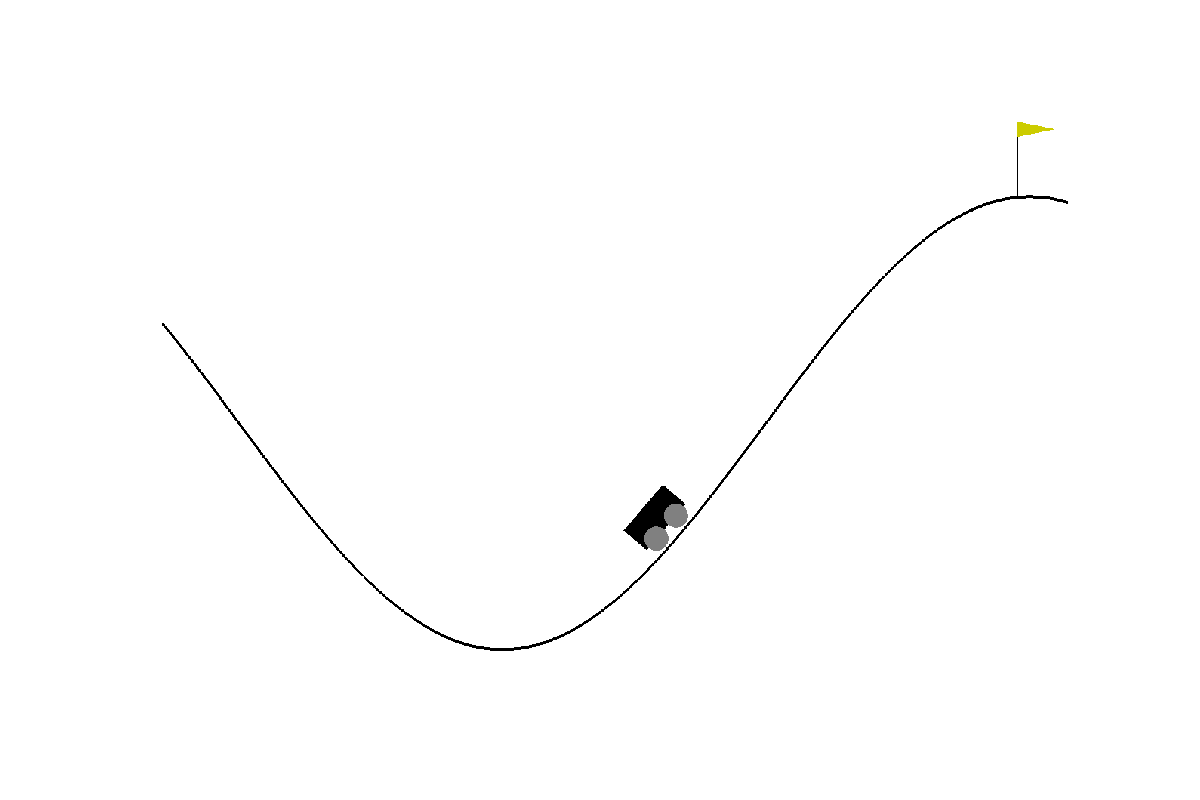
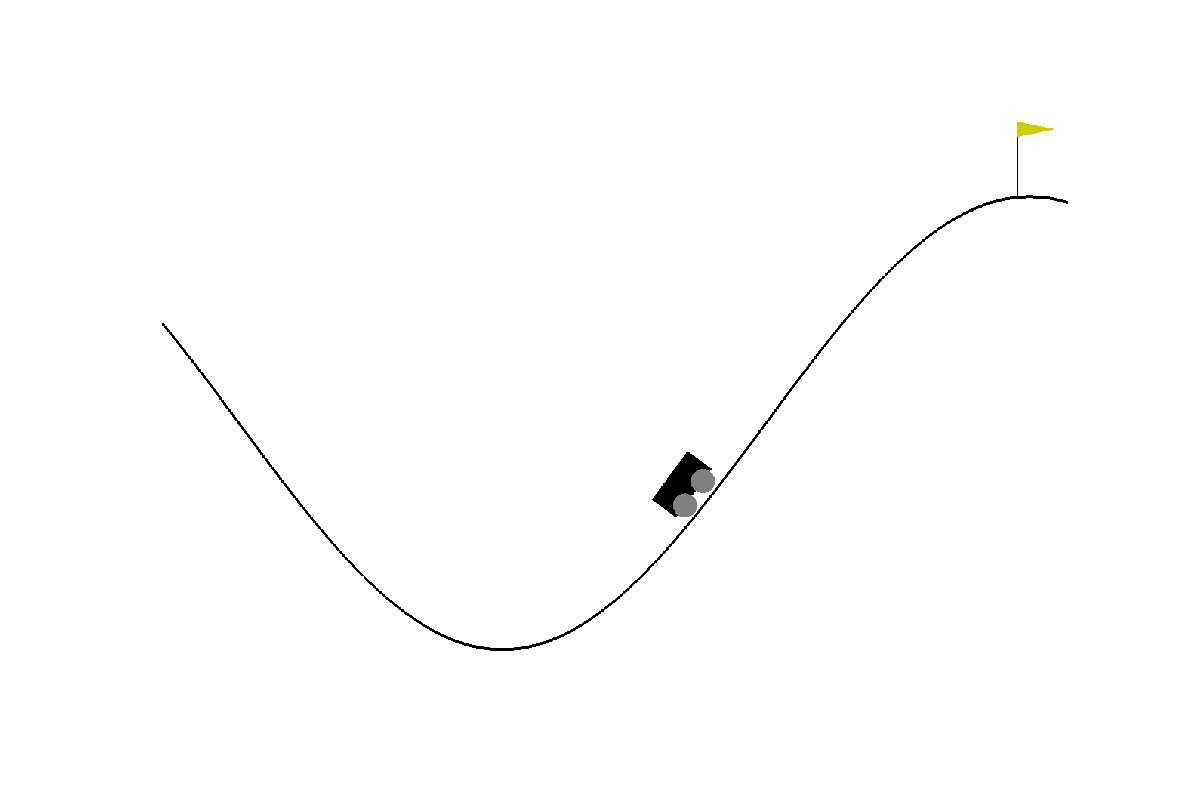
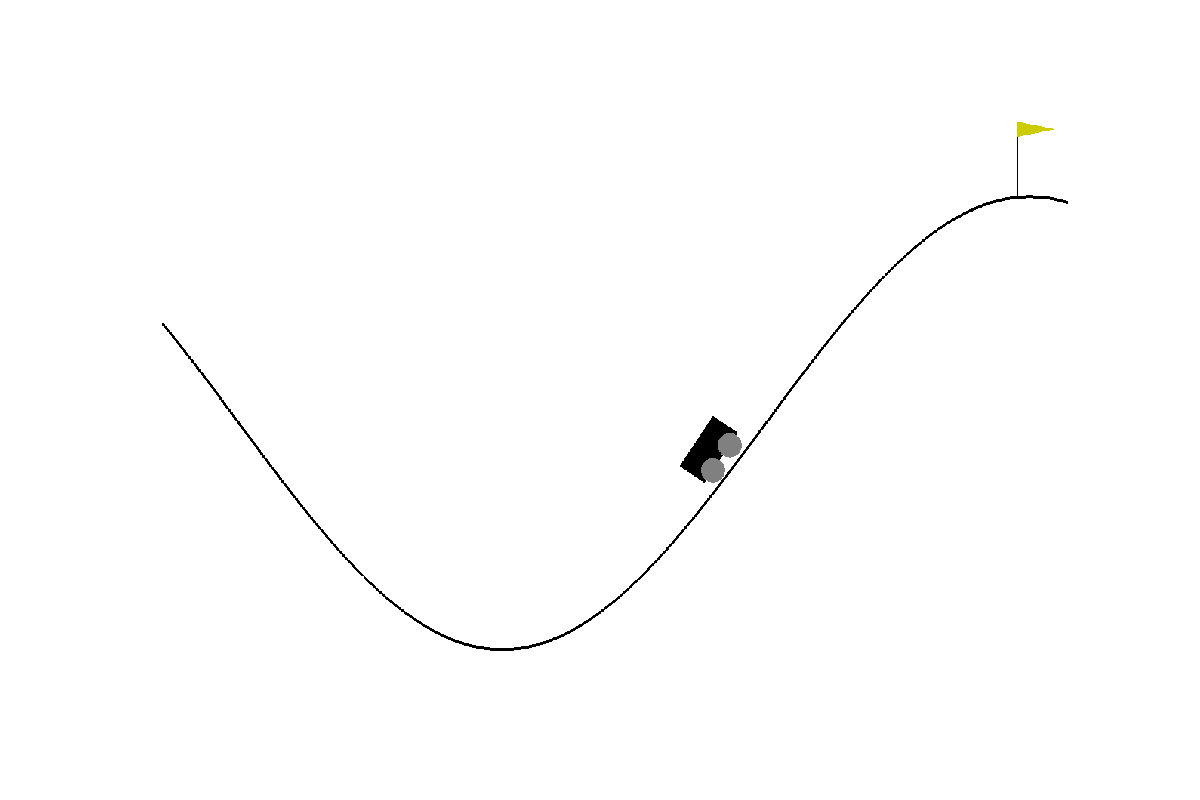
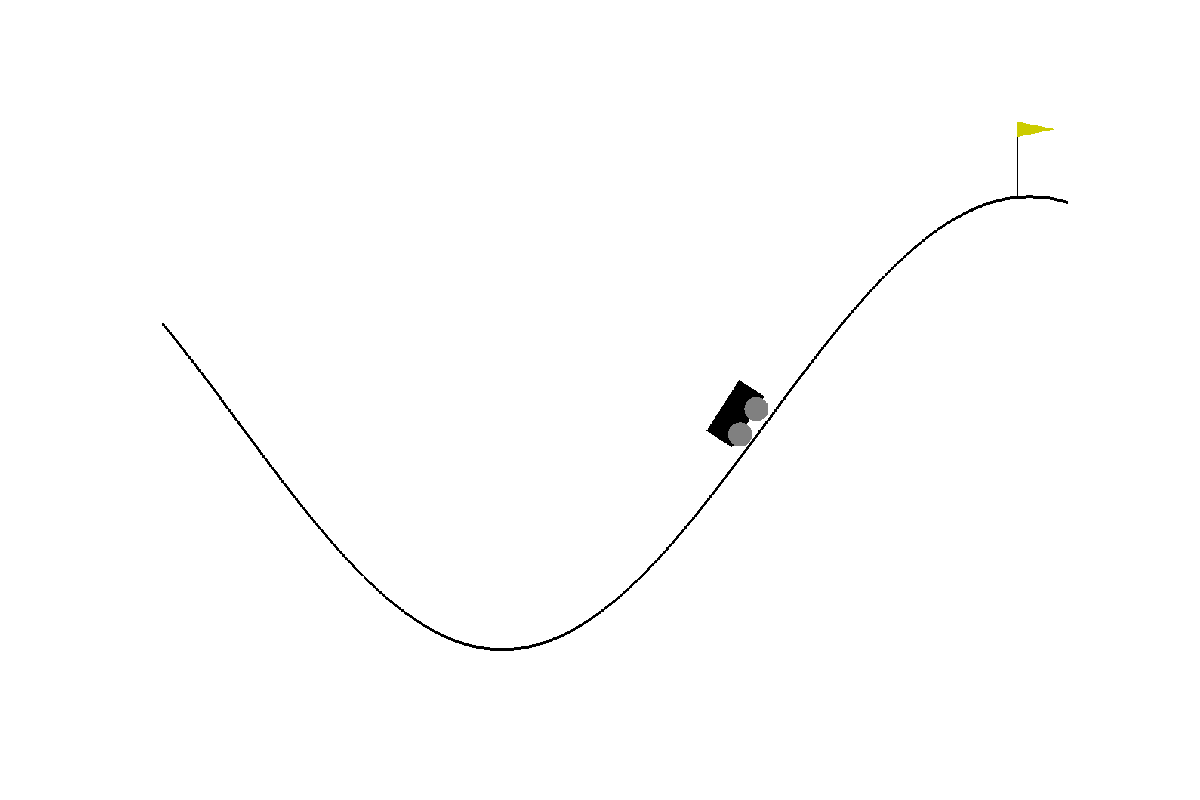
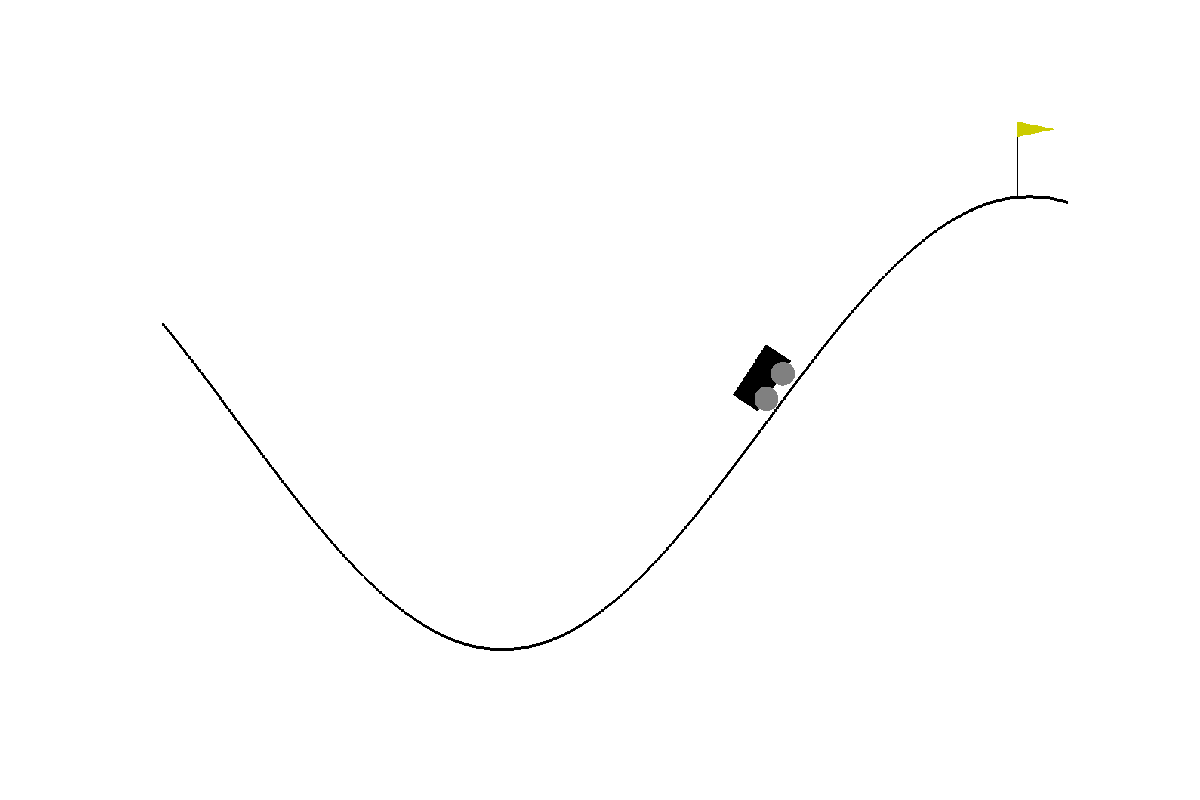
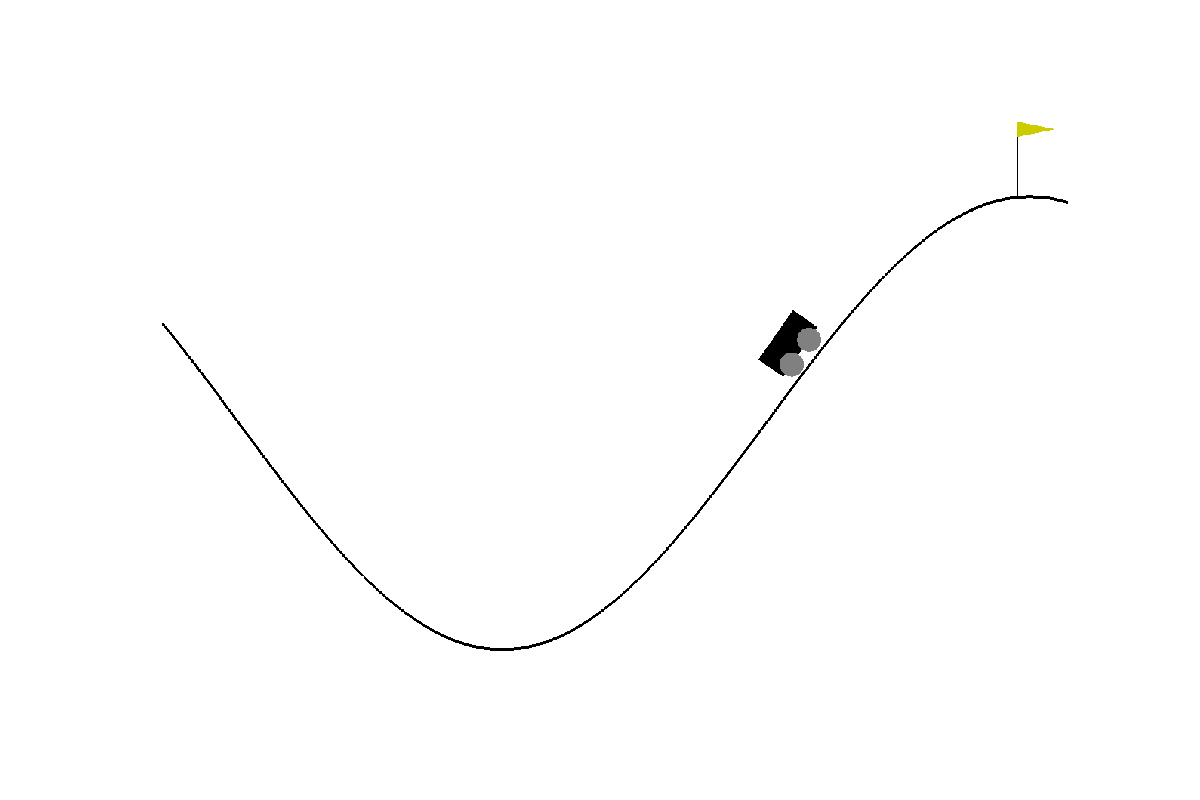
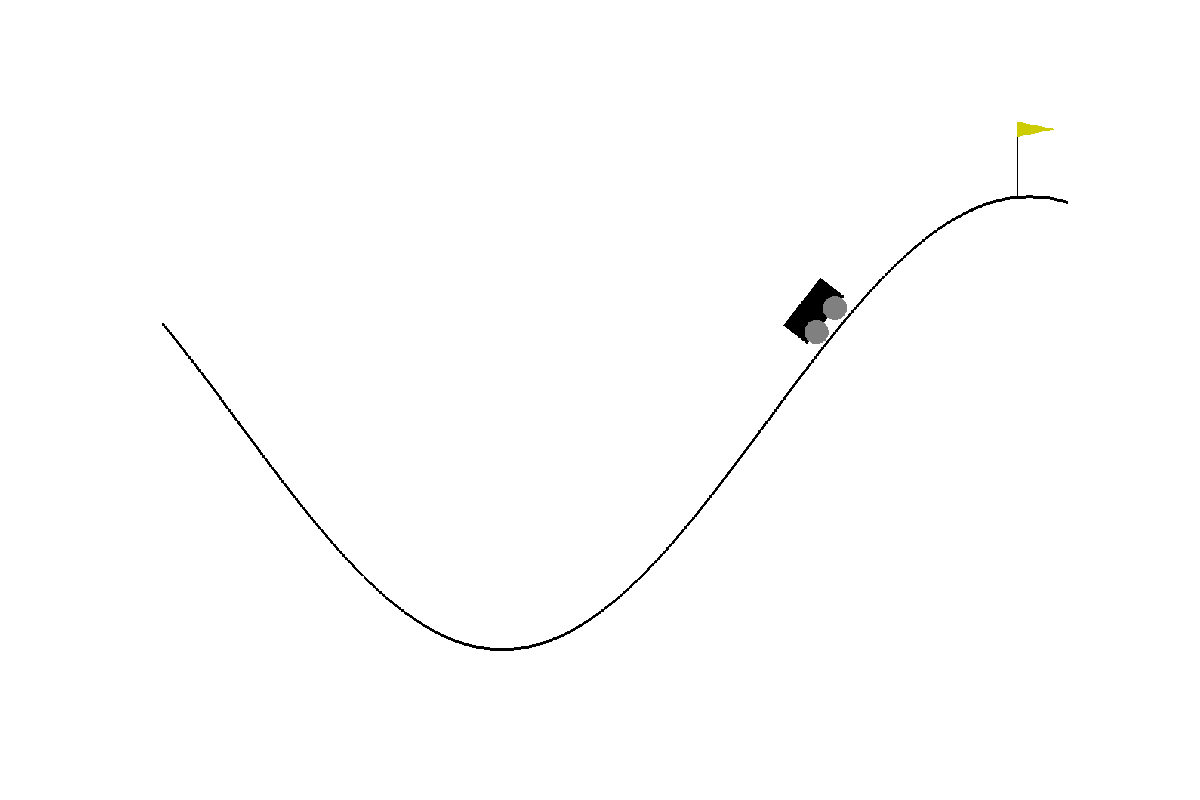
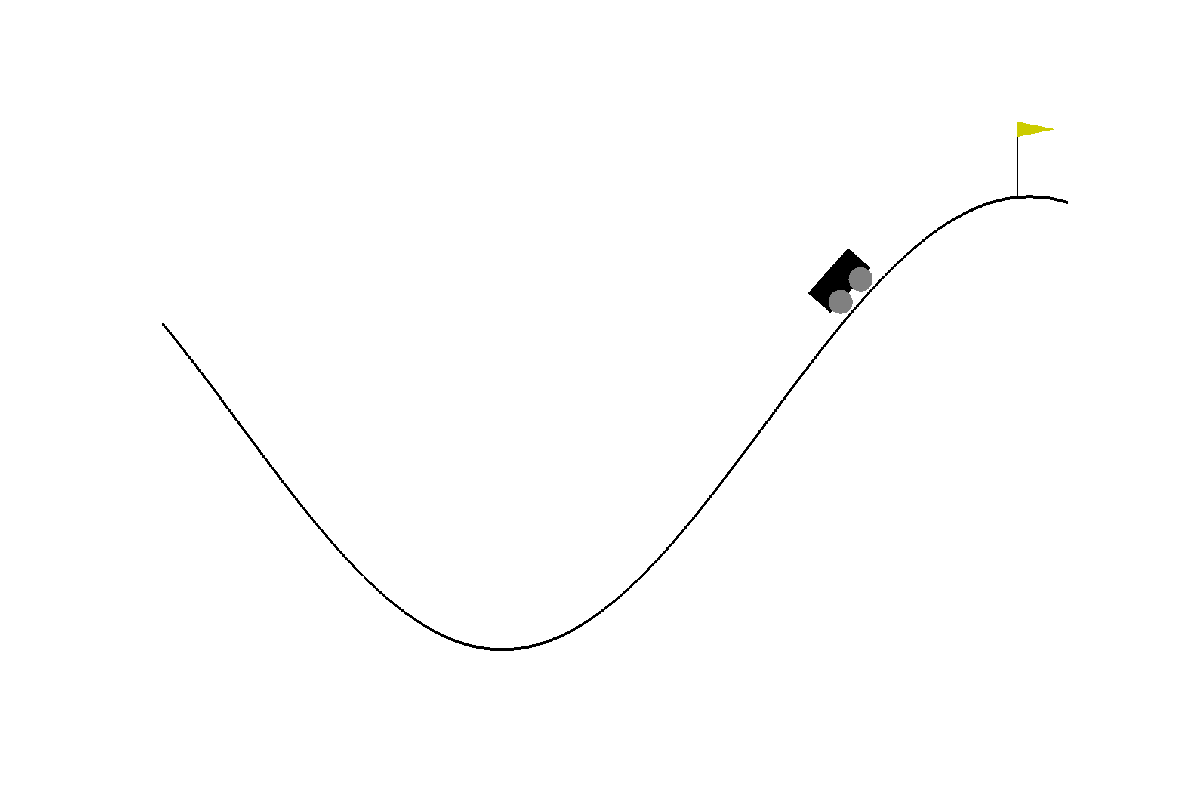
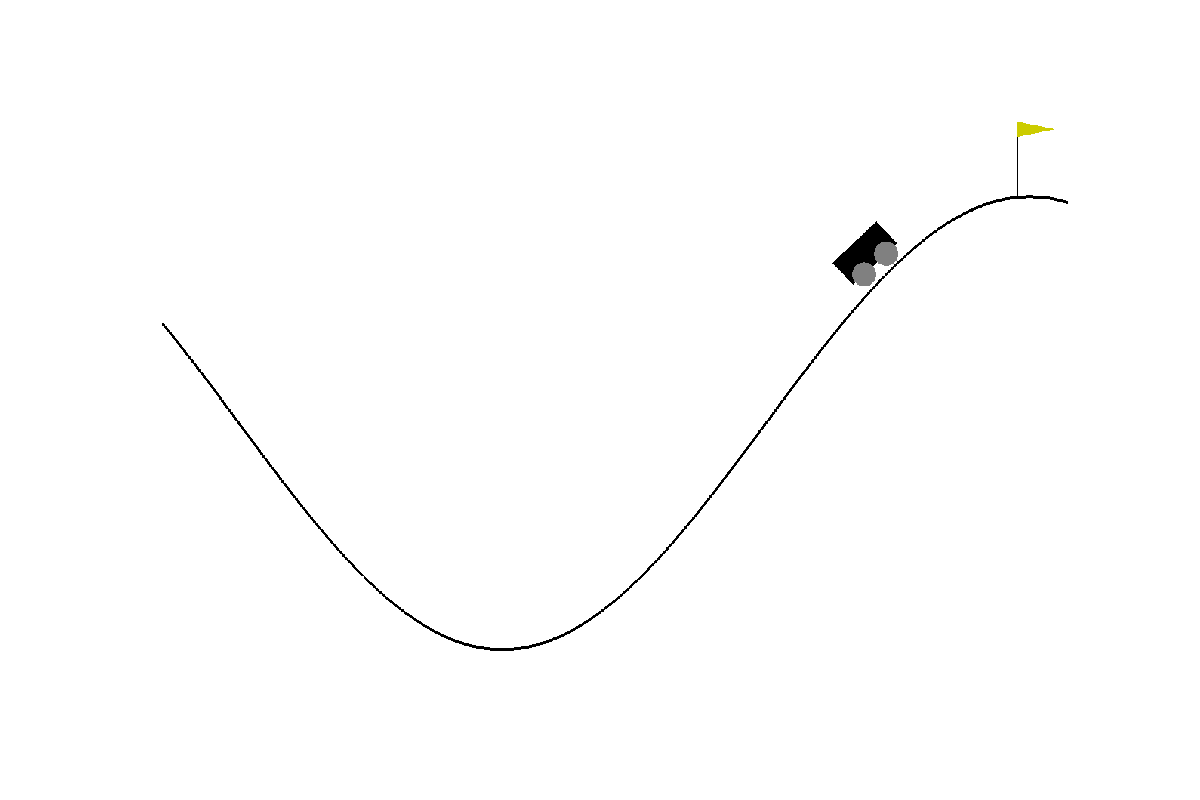
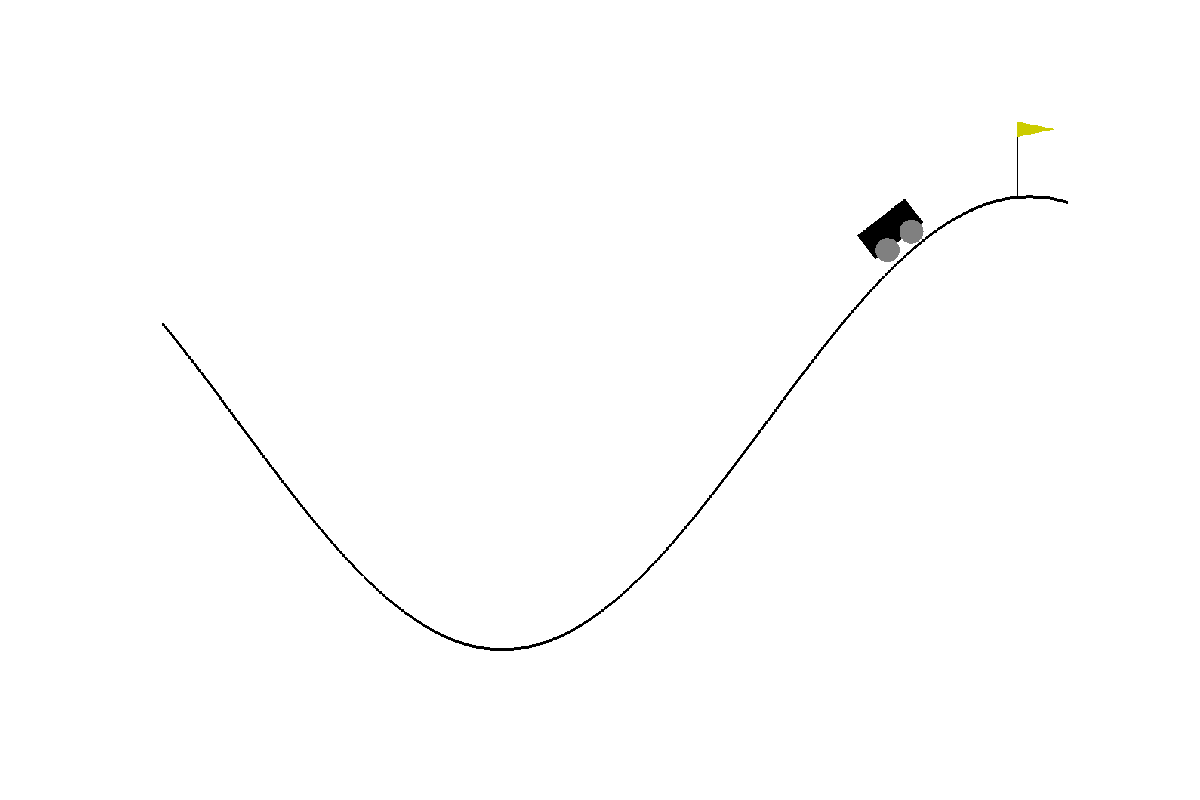
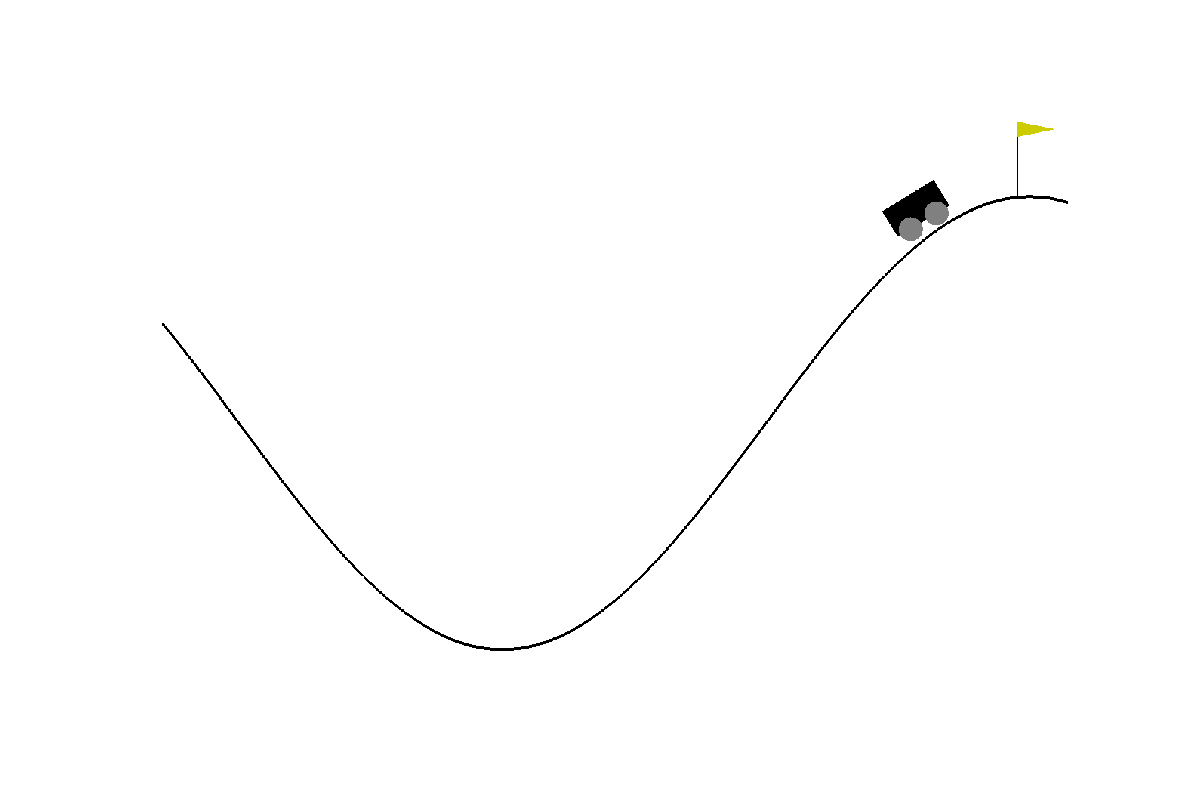
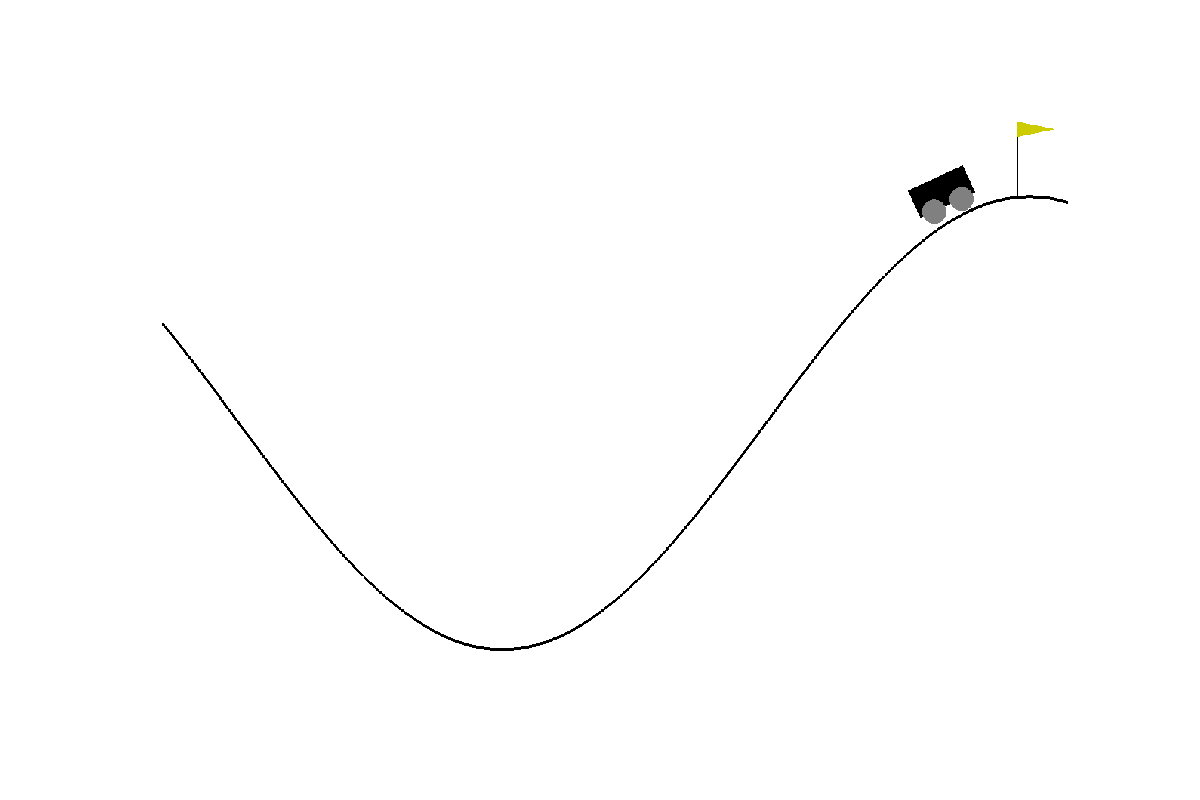
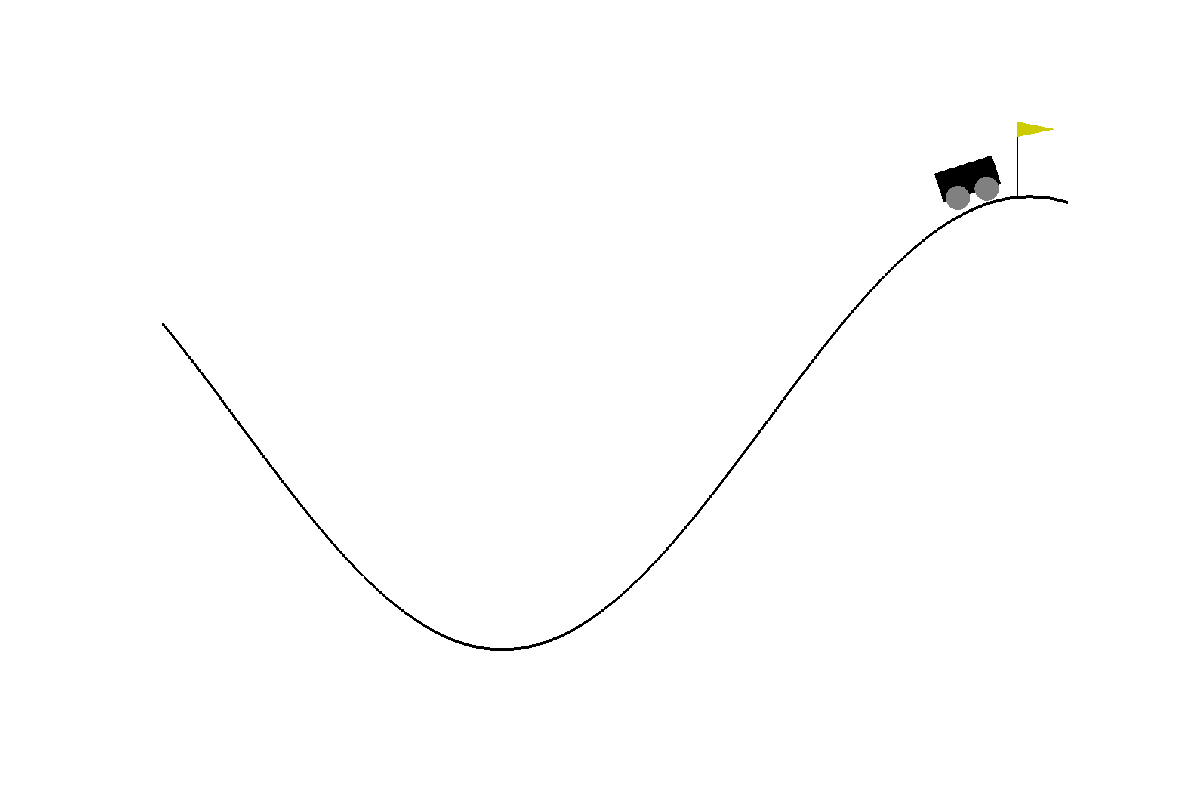
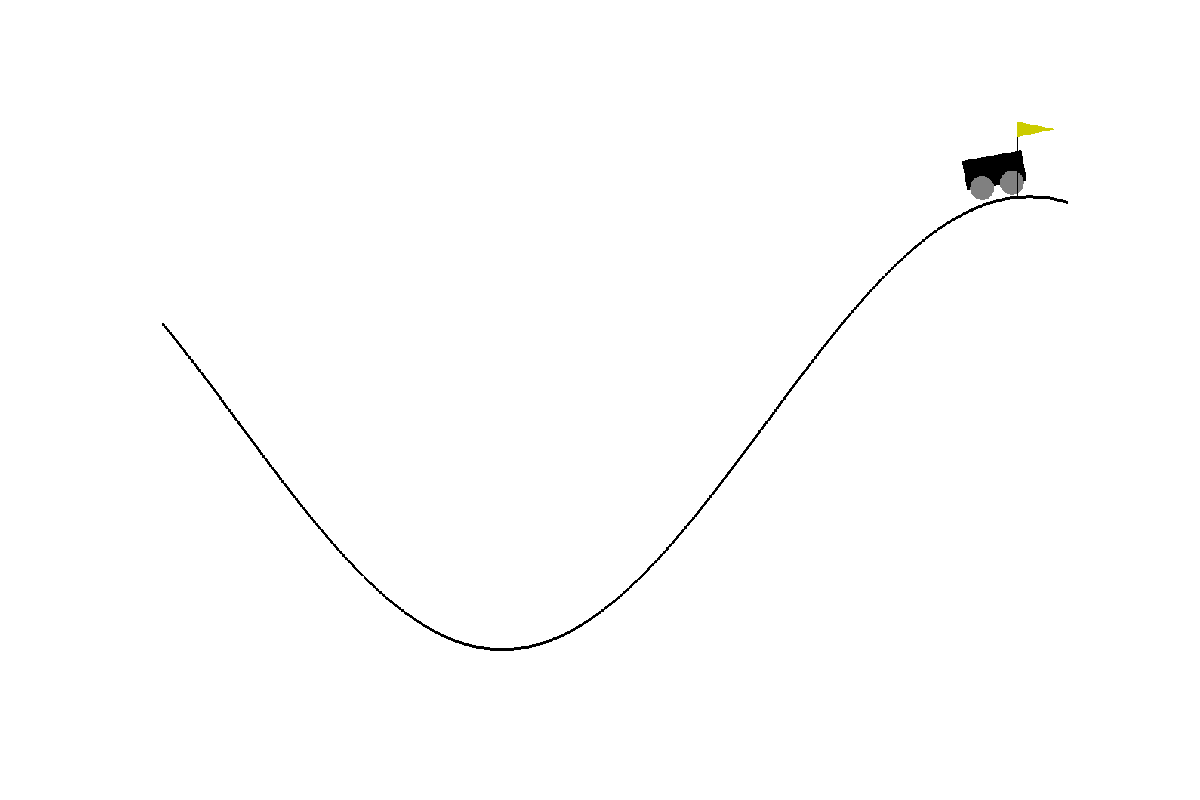
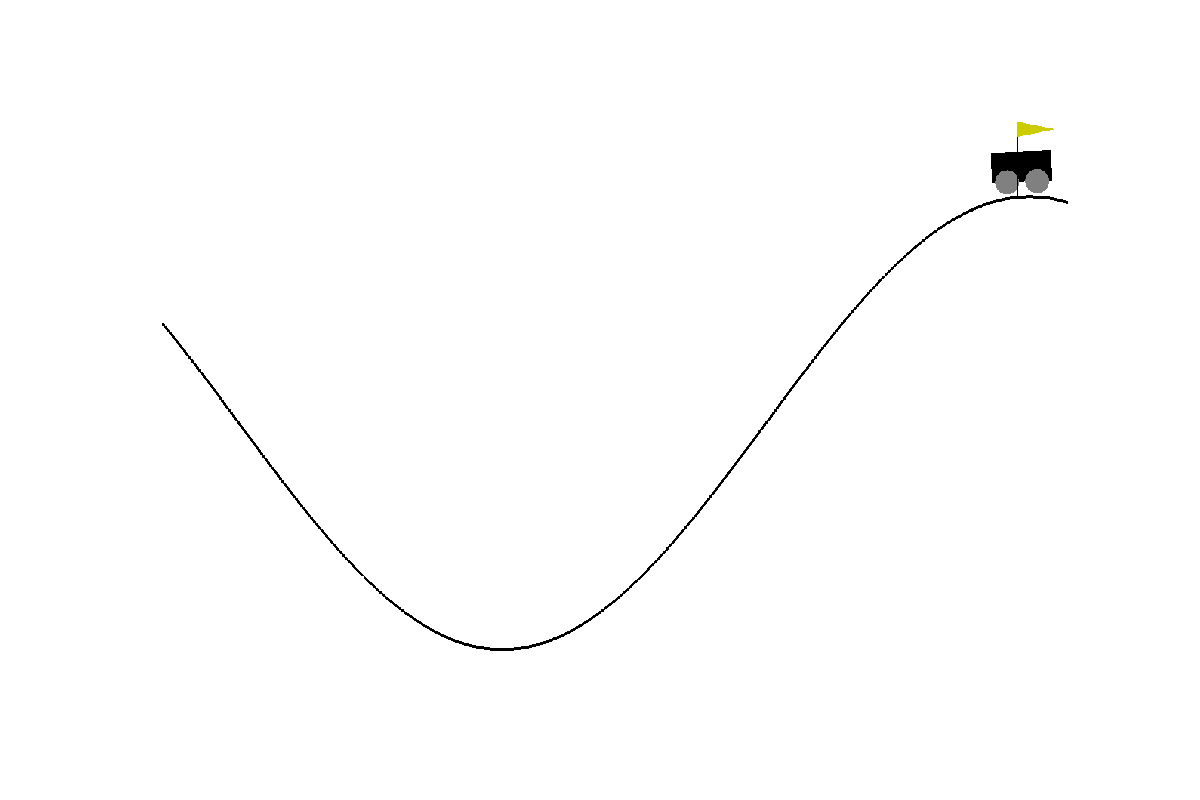

In [6]:
print('reward of one episode is ', agent.test(test_step=None))
env.animation.run()
q_network.save("ddqn_mountaincar.h5")